## Low Memory ResNet20 based on FHE

### Experiment 2, parameters:

- Ring dimension $N = 2^{16}$	
- Scaling factor $\Delta =2^{50}$
- Bits of intermediate primes $q_i= 2^{46}$
- Digits for HKS $d_{num} = 3$
- Moduli chain $\log(q) + log(p) = 1772$ bits
- Levels for $\texttt{CoeffToSlot}$ and $\texttt{SlotToCoeff}$: $\{4, 4\}$
- ReLU approximation: Chebyshev $d=200$
- Circuit depth $L = 26$
- Memory requirement: $15$GB 
- Bootstrapping precision: $\approx 10$ bits

In [2]:
import torch
from torchvision import transforms
import torchvision
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math

model = torch.hub.load("chenyaofo/pytorch-cifar-models", "cifar10_resnet20", pretrained=True)
model.eval()

Using cache found in /Users/narger/.cache/torch/hub/chenyaofo_pytorch-cifar-models_master


CifarResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias

In [6]:
img = Image.open("../inputs/luis.png")
convert_tensor = transforms.ToTensor()
img = convert_tensor(img)
img = img.unsqueeze(0)

In [7]:
in_tensor = model.relu(model.bn1(model.conv1(img)))

Precision between two vectors is computed as:
$$
\text{precision}(v, v_{he}) = \frac{\sum_i(|v - v_{he}|)}{|v - v_{he}|}
$$

In [8]:
def precision(corretto, approx):
    assoluto = sum(abs(corretto - approx))/len(corretto)
    relativo = assoluto / (sum(abs(corretto))/len(corretto))
    return 1 - relativo

## First Layer

tensor(0.9976, dtype=torch.float64)

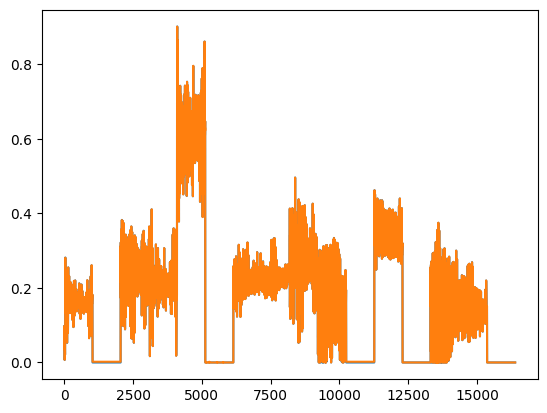

In [9]:
l0_he = np.array([  0.097,  0.043,  0.039,  0.047,  0.052,  0.038,  0.043,  0.046,  0.035,  0.052,  0.089,  0.095,  0.059,  0.024,  0.007,  0.009,  0.019,  0.032,  0.037,  0.033,  0.046,  0.065,  0.064,  0.053,  0.046,  0.045,  0.032,  0.021,  0.021,  0.022,  0.031,  0.058,  0.170,  0.159,  0.160,  0.159,  0.182,  0.208,  0.252,  0.281,  0.241,  0.169,  0.144,  0.188,  0.230,  0.219,  0.176,  0.150,  0.137,  0.132,  0.145,  0.149,  0.157,  0.188,  0.230,  0.247,  0.245,  0.231,  0.191,  0.170,  0.182,  0.177,  0.170,  0.142,  0.175,  0.163,  0.168,  0.172,  0.179,  0.166,  0.171,  0.199,  0.203,  0.175,  0.149,  0.148,  0.184,  0.226,  0.211,  0.166,  0.138,  0.134,  0.143,  0.146,  0.128,  0.130,  0.184,  0.205,  0.196,  0.198,  0.192,  0.168,  0.151,  0.150,  0.155,  0.144,  0.191,  0.172,  0.171,  0.170,  0.151,  0.102,  0.063,  0.053,  0.079,  0.114,  0.150,  0.151,  0.136,  0.181,  0.226,  0.217,  0.179,  0.165,  0.162,  0.171,  0.175,  0.168,  0.159,  0.142,  0.128,  0.140,  0.154,  0.157,  0.167,  0.167,  0.157,  0.137,  0.191,  0.162,  0.150,  0.137,  0.117,  0.094,  0.079,  0.081,  0.098,  0.111,  0.142,  0.170,  0.165,  0.167,  0.212,  0.254,  0.255,  0.230,  0.214,  0.223,  0.221,  0.185,  0.142,  0.140,  0.154,  0.166,  0.148,  0.134,  0.157,  0.166,  0.162,  0.133,  0.180,  0.147,  0.137,  0.142,  0.145,  0.148,  0.150,  0.155,  0.153,  0.141,  0.151,  0.177,  0.182,  0.166,  0.161,  0.188,  0.219,  0.232,  0.230,  0.210,  0.178,  0.164,  0.167,  0.169,  0.162,  0.164,  0.146,  0.141,  0.149,  0.159,  0.158,  0.134,  0.191,  0.160,  0.161,  0.181,  0.186,  0.170,  0.160,  0.161,  0.158,  0.151,  0.154,  0.165,  0.154,  0.144,  0.135,  0.133,  0.139,  0.148,  0.145,  0.135,  0.138,  0.161,  0.190,  0.181,  0.161,  0.154,  0.159,  0.177,  0.172,  0.159,  0.150,  0.134,  0.216,  0.194,  0.184,  0.183,  0.177,  0.159,  0.155,  0.156,  0.158,  0.150,  0.148,  0.151,  0.150,  0.158,  0.159,  0.152,  0.146,  0.145,  0.147,  0.146,  0.144,  0.150,  0.166,  0.172,  0.174,  0.170,  0.173,  0.175,  0.165,  0.152,  0.152,  0.135,  0.181,  0.150,  0.132,  0.139,  0.154,  0.152,  0.151,  0.154,  0.159,  0.149,  0.155,  0.162,  0.165,  0.171,  0.178,  0.176,  0.167,  0.165,  0.167,  0.166,  0.160,  0.151,  0.149,  0.160,  0.184,  0.185,  0.167,  0.160,  0.152,  0.152,  0.156,  0.136,  0.146,  0.115,  0.123,  0.149,  0.163,  0.157,  0.153,  0.156,  0.155,  0.150,  0.166,  0.166,  0.147,  0.138,  0.160,  0.171,  0.163,  0.161,  0.173,  0.178,  0.170,  0.156,  0.141,  0.149,  0.189,  0.188,  0.158,  0.153,  0.151,  0.155,  0.157,  0.138,  0.209,  0.206,  0.196,  0.180,  0.170,  0.163,  0.157,  0.156,  0.150,  0.147,  0.156,  0.154,  0.126,  0.095,  0.110,  0.140,  0.156,  0.155,  0.163,  0.165,  0.160,  0.161,  0.150,  0.150,  0.177,  0.174,  0.153,  0.151,  0.153,  0.157,  0.160,  0.143,  0.209,  0.219,  0.209,  0.182,  0.163,  0.160,  0.154,  0.156,  0.151,  0.146,  0.149,  0.176,  0.187,  0.155,  0.125,  0.139,  0.158,  0.155,  0.146,  0.133,  0.127,  0.146,  0.165,  0.163,  0.159,  0.153,  0.153,  0.155,  0.156,  0.159,  0.165,  0.151,  0.153,  0.153,  0.173,  0.167,  0.158,  0.154,  0.154,  0.155,  0.149,  0.149,  0.154,  0.173,  0.212,  0.220,  0.185,  0.163,  0.153,  0.148,  0.150,  0.155,  0.155,  0.156,  0.166,  0.173,  0.172,  0.157,  0.154,  0.156,  0.161,  0.167,  0.171,  0.154,  0.154,  0.147,  0.162,  0.162,  0.162,  0.156,  0.158,  0.154,  0.140,  0.146,  0.162,  0.151,  0.146,  0.154,  0.167,  0.166,  0.152,  0.141,  0.159,  0.191,  0.197,  0.175,  0.158,  0.166,  0.174,  0.159,  0.151,  0.158,  0.166,  0.172,  0.171,  0.151,  0.146,  0.148,  0.162,  0.161,  0.162,  0.158,  0.162,  0.157,  0.137,  0.140,  0.159,  0.157,  0.145,  0.141,  0.145,  0.152,  0.159,  0.150,  0.144,  0.145,  0.150,  0.155,  0.157,  0.171,  0.179,  0.163,  0.155,  0.167,  0.174,  0.171,  0.164,  0.147,  0.153,  0.158,  0.162,  0.158,  0.153,  0.154,  0.158,  0.159,  0.146,  0.146,  0.157,  0.164,  0.172,  0.178,  0.167,  0.160,  0.163,  0.166,  0.164,  0.151,  0.147,  0.157,  0.164,  0.175,  0.188,  0.179,  0.173,  0.177,  0.176,  0.168,  0.163,  0.148,  0.187,  0.186,  0.170,  0.158,  0.149,  0.150,  0.153,  0.158,  0.151,  0.153,  0.164,  0.165,  0.161,  0.162,  0.172,  0.175,  0.171,  0.171,  0.175,  0.170,  0.158,  0.157,  0.161,  0.175,  0.198,  0.201,  0.192,  0.182,  0.173,  0.167,  0.165,  0.149,  0.212,  0.210,  0.181,  0.157,  0.153,  0.151,  0.157,  0.159,  0.152,  0.158,  0.165,  0.168,  0.162,  0.147,  0.135,  0.131,  0.136,  0.153,  0.163,  0.164,  0.160,  0.157,  0.155,  0.169,  0.188,  0.189,  0.182,  0.175,  0.167,  0.165,  0.163,  0.150,  0.186,  0.189,  0.171,  0.156,  0.155,  0.153,  0.158,  0.156,  0.147,  0.159,  0.162,  0.167,  0.174,  0.170,  0.144,  0.117,  0.119,  0.147,  0.164,  0.165,  0.164,  0.159,  0.155,  0.164,  0.174,  0.168,  0.162,  0.164,  0.163,  0.163,  0.162,  0.150,  0.167,  0.165,  0.156,  0.155,  0.156,  0.155,  0.157,  0.150,  0.143,  0.155,  0.159,  0.157,  0.162,  0.176,  0.206,  0.209,  0.180,  0.163,  0.164,  0.166,  0.162,  0.159,  0.155,  0.160,  0.171,  0.168,  0.162,  0.161,  0.161,  0.162,  0.161,  0.149,  0.164,  0.159,  0.151,  0.153,  0.161,  0.160,  0.159,  0.145,  0.138,  0.153,  0.158,  0.155,  0.154,  0.160,  0.182,  0.192,  0.179,  0.162,  0.156,  0.159,  0.159,  0.159,  0.156,  0.159,  0.169,  0.169,  0.165,  0.163,  0.162,  0.161,  0.162,  0.151,  0.172,  0.174,  0.168,  0.161,  0.167,  0.167,  0.165,  0.144,  0.134,  0.150,  0.157,  0.155,  0.156,  0.157,  0.155,  0.156,  0.159,  0.158,  0.155,  0.156,  0.157,  0.155,  0.153,  0.158,  0.168,  0.167,  0.164,  0.163,  0.163,  0.161,  0.161,  0.151,  0.172,  0.175,  0.176,  0.173,  0.174,  0.173,  0.168,  0.145,  0.131,  0.150,  0.158,  0.154,  0.153,  0.153,  0.153,  0.154,  0.156,  0.156,  0.156,  0.156,  0.153,  0.151,  0.152,  0.163,  0.174,  0.169,  0.162,  0.162,  0.162,  0.162,  0.160,  0.149,  0.175,  0.171,  0.171,  0.172,  0.175,  0.166,  0.166,  0.156,  0.148,  0.152,  0.154,  0.158,  0.156,  0.153,  0.150,  0.151,  0.153,  0.154,  0.152,  0.149,  0.148,  0.151,  0.156,  0.165,  0.174,  0.170,  0.163,  0.162,  0.162,  0.162,  0.161,  0.152,  0.165,  0.159,  0.167,  0.172,  0.165,  0.157,  0.169,  0.170,  0.165,  0.150,  0.149,  0.156,  0.157,  0.156,  0.153,  0.151,  0.152,  0.151,  0.149,  0.149,  0.152,  0.156,  0.158,  0.160,  0.167,  0.167,  0.163,  0.163,  0.161,  0.161,  0.160,  0.152,  0.154,  0.135,  0.154,  0.184,  0.187,  0.188,  0.184,  0.178,  0.171,  0.156,  0.152,  0.152,  0.152,  0.154,  0.157,  0.157,  0.154,  0.150,  0.151,  0.157,  0.159,  0.159,  0.156,  0.157,  0.163,  0.165,  0.163,  0.162,  0.162,  0.162,  0.160,  0.151,  0.190,  0.153,  0.137,  0.149,  0.190,  0.221,  0.200,  0.176,  0.167,  0.165,  0.160,  0.156,  0.157,  0.157,  0.154,  0.154,  0.155,  0.155,  0.156,  0.160,  0.161,  0.159,  0.156,  0.157,  0.162,  0.163,  0.162,  0.162,  0.162,  0.161,  0.158,  0.148,  0.179,  0.165,  0.153,  0.107,  0.098,  0.131,  0.159,  0.163,  0.161,  0.164,  0.163,  0.163,  0.164,  0.162,  0.155,  0.152,  0.154,  0.158,  0.159,  0.157,  0.156,  0.156,  0.156,  0.156,  0.160,  0.162,  0.161,  0.163,  0.164,  0.159,  0.154,  0.145,  0.141,  0.103,  0.132,  0.147,  0.111,  0.065,  0.072,  0.114,  0.143,  0.157,  0.164,  0.162,  0.161,  0.159,  0.159,  0.161,  0.163,  0.162,  0.160,  0.157,  0.154,  0.154,  0.154,  0.154,  0.158,  0.161,  0.160,  0.160,  0.161,  0.158,  0.157,  0.146,  0.195,  0.138,  0.104,  0.126,  0.165,  0.147,  0.095,  0.073,  0.086,  0.110,  0.142,  0.160,  0.160,  0.160,  0.161,  0.164,  0.165,  0.164,  0.164,  0.162,  0.158,  0.154,  0.153,  0.152,  0.155,  0.160,  0.159,  0.157,  0.157,  0.157,  0.161,  0.152,  0.231,  0.230,  0.200,  0.147,  0.137,  0.160,  0.157,  0.129,  0.095,  0.072,  0.082,  0.126,  0.153,  0.163,  0.165,  0.162,  0.159,  0.158,  0.159,  0.161,  0.160,  0.157,  0.156,  0.156,  0.157,  0.159,  0.158,  0.159,  0.161,  0.162,  0.167,  0.157,  0.214,  0.235,  0.261,  0.260,  0.225,  0.203,  0.203,  0.213,  0.212,  0.178,  0.132,  0.126,  0.145,  0.157,  0.161,  0.160,  0.158,  0.158,  0.157,  0.159,  0.161,  0.162,  0.162,  0.163,  0.165,  0.167,  0.169,  0.172,  0.176,  0.178,  0.182,  0.170,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.158,  0.310,  0.152,  0.307,  0.301,  0.244,  0.322,  0.270,  0.173,  0.214,  0.308,  0.314,  0.295,  0.195,  0.233,  0.238,  0.213,  0.292,  0.253,  0.205,  0.239,  0.304,  0.291,  0.183,  0.275,  0.265,  0.222,  0.271,  0.206,  0.232,  0.243,  0.184,  0.109,  0.303,  0.213,  0.275,  0.265,  0.282,  0.358,  0.301,  0.275,  0.193,  0.248,  0.266,  0.382,  0.310,  0.194,  0.256,  0.248,  0.257,  0.253,  0.251,  0.198,  0.298,  0.332,  0.207,  0.288,  0.330,  0.209,  0.253,  0.205,  0.259,  0.262,  0.231,  0.099,  0.264,  0.263,  0.274,  0.258,  0.275,  0.286,  0.267,  0.273,  0.195,  0.290,  0.233,  0.273,  0.380,  0.283,  0.204,  0.260,  0.236,  0.258,  0.271,  0.193,  0.272,  0.303,  0.250,  0.214,  0.325,  0.231,  0.269,  0.251,  0.193,  0.315,  0.202,  0.103,  0.241,  0.291,  0.303,  0.273,  0.258,  0.235,  0.267,  0.214,  0.191,  0.298,  0.266,  0.249,  0.274,  0.374,  0.276,  0.233,  0.252,  0.255,  0.244,  0.252,  0.294,  0.253,  0.227,  0.248,  0.300,  0.201,  0.273,  0.290,  0.231,  0.288,  0.179,  0.097,  0.232,  0.314,  0.337,  0.261,  0.256,  0.245,  0.255,  0.238,  0.185,  0.260,  0.286,  0.285,  0.248,  0.288,  0.321,  0.274,  0.282,  0.260,  0.236,  0.300,  0.280,  0.224,  0.186,  0.331,  0.279,  0.188,  0.250,  0.271,  0.308,  0.238,  0.185,  0.089,  0.238,  0.323,  0.303,  0.281,  0.271,  0.267,  0.259,  0.254,  0.184,  0.262,  0.291,  0.274,  0.268,  0.242,  0.255,  0.280,  0.265,  0.265,  0.263,  0.281,  0.261,  0.241,  0.216,  0.343,  0.229,  0.221,  0.243,  0.288,  0.277,  0.239,  0.189,  0.122,  0.248,  0.298,  0.289,  0.275,  0.305,  0.304,  0.267,  0.242,  0.187,  0.296,  0.267,  0.264,  0.262,  0.260,  0.241,  0.255,  0.256,  0.266,  0.255,  0.247,  0.262,  0.247,  0.276,  0.313,  0.189,  0.226,  0.291,  0.293,  0.229,  0.257,  0.187,  0.179,  0.269,  0.252,  0.266,  0.236,  0.324,  0.332,  0.277,  0.217,  0.224,  0.300,  0.243,  0.269,  0.265,  0.274,  0.254,  0.255,  0.260,  0.255,  0.261,  0.258,  0.246,  0.247,  0.307,  0.286,  0.163,  0.255,  0.323,  0.245,  0.241,  0.260,  0.188,  0.171,  0.288,  0.211,  0.208,  0.247,  0.324,  0.316,  0.279,  0.198,  0.261,  0.286,  0.259,  0.258,  0.264,  0.286,  0.265,  0.252,  0.252,  0.268,  0.266,  0.259,  0.253,  0.230,  0.320,  0.273,  0.152,  0.314,  0.276,  0.230,  0.261,  0.254,  0.194,  0.206,  0.277,  0.189,  0.201,  0.271,  0.338,  0.292,  0.259,  0.205,  0.259,  0.280,  0.299,  0.180,  0.251,  0.292,  0.288,  0.239,  0.240,  0.284,  0.276,  0.254,  0.266,  0.225,  0.292,  0.287,  0.182,  0.305,  0.241,  0.248,  0.261,  0.252,  0.203,  0.261,  0.276,  0.152,  0.172,  0.309,  0.344,  0.281,  0.245,  0.211,  0.259,  0.285,  0.314,  0.177,  0.199,  0.276,  0.331,  0.222,  0.259,  0.271,  0.260,  0.241,  0.256,  0.284,  0.254,  0.267,  0.224,  0.274,  0.239,  0.259,  0.252,  0.255,  0.216,  0.260,  0.257,  0.097,  0.158,  0.355,  0.323,  0.279,  0.235,  0.214,  0.285,  0.265,  0.277,  0.277,  0.222,  0.264,  0.299,  0.243,  0.269,  0.263,  0.225,  0.227,  0.257,  0.328,  0.277,  0.229,  0.237,  0.260,  0.252,  0.258,  0.246,  0.261,  0.226,  0.276,  0.226,  0.065,  0.216,  0.365,  0.301,  0.270,  0.233,  0.208,  0.308,  0.258,  0.247,  0.268,  0.267,  0.278,  0.263,  0.261,  0.242,  0.277,  0.239,  0.251,  0.281,  0.281,  0.298,  0.232,  0.233,  0.255,  0.256,  0.250,  0.252,  0.270,  0.222,  0.277,  0.189,  0.064,  0.285,  0.350,  0.288,  0.261,  0.247,  0.191,  0.302,  0.277,  0.270,  0.231,  0.247,  0.259,  0.286,  0.259,  0.241,  0.249,  0.238,  0.286,  0.277,  0.246,  0.303,  0.251,  0.216,  0.260,  0.251,  0.250,  0.261,  0.271,  0.214,  0.236,  0.126,  0.123,  0.327,  0.325,  0.278,  0.261,  0.255,  0.192,  0.297,  0.286,  0.259,  0.257,  0.261,  0.239,  0.269,  0.263,  0.277,  0.251,  0.225,  0.271,  0.268,  0.247,  0.306,  0.259,  0.212,  0.254,  0.251,  0.261,  0.265,  0.259,  0.222,  0.223,  0.053,  0.217,  0.339,  0.295,  0.268,  0.268,  0.234,  0.220,  0.302,  0.285,  0.239,  0.255,  0.289,  0.264,  0.248,  0.262,  0.280,  0.267,  0.248,  0.240,  0.275,  0.253,  0.302,  0.257,  0.232,  0.252,  0.255,  0.266,  0.266,  0.251,  0.234,  0.245,  0.080,  0.253,  0.341,  0.274,  0.260,  0.271,  0.208,  0.252,  0.310,  0.256,  0.271,  0.241,  0.254,  0.270,  0.270,  0.259,  0.260,  0.273,  0.262,  0.240,  0.267,  0.261,  0.281,  0.252,  0.243,  0.269,  0.259,  0.261,  0.264,  0.251,  0.236,  0.224,  0.179,  0.244,  0.336,  0.267,  0.254,  0.268,  0.199,  0.270,  0.311,  0.246,  0.272,  0.275,  0.245,  0.235,  0.208,  0.281,  0.297,  0.260,  0.257,  0.261,  0.257,  0.261,  0.274,  0.243,  0.230,  0.276,  0.265,  0.263,  0.255,  0.256,  0.238,  0.211,  0.197,  0.264,  0.318,  0.265,  0.254,  0.259,  0.200,  0.287,  0.292,  0.256,  0.255,  0.281,  0.272,  0.268,  0.192,  0.277,  0.311,  0.253,  0.260,  0.263,  0.258,  0.255,  0.277,  0.243,  0.221,  0.268,  0.267,  0.266,  0.253,  0.260,  0.237,  0.225,  0.177,  0.288,  0.308,  0.259,  0.259,  0.253,  0.199,  0.294,  0.284,  0.258,  0.260,  0.259,  0.266,  0.257,  0.259,  0.270,  0.259,  0.264,  0.267,  0.255,  0.262,  0.258,  0.266,  0.249,  0.226,  0.268,  0.266,  0.257,  0.257,  0.263,  0.234,  0.213,  0.221,  0.271,  0.304,  0.254,  0.264,  0.252,  0.200,  0.295,  0.282,  0.256,  0.265,  0.257,  0.256,  0.252,  0.274,  0.265,  0.249,  0.263,  0.260,  0.261,  0.261,  0.257,  0.265,  0.243,  0.238,  0.268,  0.265,  0.254,  0.257,  0.262,  0.237,  0.189,  0.268,  0.265,  0.295,  0.254,  0.262,  0.271,  0.195,  0.279,  0.298,  0.251,  0.260,  0.263,  0.257,  0.259,  0.262,  0.261,  0.258,  0.262,  0.257,  0.264,  0.258,  0.251,  0.273,  0.242,  0.243,  0.268,  0.259,  0.255,  0.260,  0.258,  0.239,  0.188,  0.258,  0.286,  0.290,  0.254,  0.265,  0.285,  0.197,  0.275,  0.290,  0.257,  0.259,  0.261,  0.255,  0.258,  0.262,  0.261,  0.257,  0.261,  0.262,  0.259,  0.252,  0.253,  0.273,  0.256,  0.240,  0.266,  0.256,  0.255,  0.264,  0.255,  0.239,  0.181,  0.265,  0.292,  0.283,  0.247,  0.299,  0.241,  0.237,  0.293,  0.248,  0.269,  0.263,  0.262,  0.257,  0.254,  0.260,  0.263,  0.258,  0.260,  0.263,  0.251,  0.254,  0.258,  0.270,  0.263,  0.240,  0.261,  0.255,  0.259,  0.257,  0.256,  0.245,  0.126,  0.266,  0.327,  0.269,  0.258,  0.290,  0.208,  0.312,  0.273,  0.235,  0.269,  0.262,  0.259,  0.261,  0.255,  0.265,  0.259,  0.254,  0.264,  0.259,  0.250,  0.262,  0.257,  0.267,  0.262,  0.244,  0.258,  0.255,  0.262,  0.253,  0.258,  0.246,  0.137,  0.200,  0.282,  0.311,  0.345,  0.237,  0.227,  0.318,  0.262,  0.254,  0.259,  0.260,  0.258,  0.254,  0.262,  0.270,  0.259,  0.253,  0.260,  0.262,  0.257,  0.260,  0.258,  0.264,  0.262,  0.247,  0.255,  0.257,  0.258,  0.253,  0.269,  0.235,  0.158,  0.274,  0.185,  0.230,  0.353,  0.298,  0.274,  0.260,  0.263,  0.269,  0.257,  0.259,  0.262,  0.256,  0.261,  0.261,  0.260,  0.261,  0.257,  0.261,  0.263,  0.259,  0.258,  0.263,  0.262,  0.247,  0.253,  0.262,  0.256,  0.249,  0.276,  0.227,  0.091,  0.303,  0.287,  0.203,  0.184,  0.279,  0.320,  0.274,  0.267,  0.261,  0.258,  0.258,  0.263,  0.261,  0.259,  0.260,  0.258,  0.261,  0.262,  0.258,  0.259,  0.263,  0.258,  0.262,  0.264,  0.245,  0.251,  0.264,  0.258,  0.251,  0.274,  0.220,  0.100,  0.229,  0.270,  0.302,  0.238,  0.180,  0.263,  0.279,  0.254,  0.294,  0.261,  0.257,  0.256,  0.259,  0.257,  0.268,  0.265,  0.259,  0.265,  0.261,  0.250,  0.264,  0.261,  0.257,  0.265,  0.248,  0.253,  0.263,  0.251,  0.255,  0.279,  0.218,  0.181,  0.254,  0.232,  0.227,  0.287,  0.273,  0.217,  0.256,  0.196,  0.249,  0.311,  0.273,  0.262,  0.253,  0.260,  0.266,  0.261,  0.260,  0.262,  0.265,  0.251,  0.260,  0.263,  0.256,  0.260,  0.252,  0.255,  0.260,  0.249,  0.256,  0.278,  0.229,  0.198,  0.269,  0.274,  0.241,  0.207,  0.274,  0.267,  0.248,  0.265,  0.153,  0.262,  0.295,  0.265,  0.274,  0.263,  0.260,  0.257,  0.259,  0.260,  0.262,  0.257,  0.260,  0.262,  0.260,  0.258,  0.253,  0.257,  0.253,  0.253,  0.260,  0.270,  0.242,  0.257,  0.277,  0.264,  0.281,  0.275,  0.261,  0.300,  0.261,  0.303,  0.249,  0.252,  0.279,  0.254,  0.273,  0.260,  0.259,  0.260,  0.259,  0.260,  0.260,  0.260,  0.261,  0.261,  0.262,  0.261,  0.260,  0.263,  0.261,  0.262,  0.265,  0.269,  0.261,  0.301,  0.329,  0.331,  0.312,  0.307,  0.286,  0.238,  0.238,  0.284,  0.306,  0.283,  0.249,  0.260,  0.320,  0.362,  0.365,  0.360,  0.351,  0.346,  0.342,  0.302,  0.252,  0.248,  0.262,  0.254,  0.277,  0.329,  0.343,  0.322,  0.311,  0.317,  0.305,  0.250,  0.222,  0.207,  0.212,  0.186,  0.120,  0.054,  0.017,  0.054,  0.162,  0.234,  0.192,  0.099,  0.095,  0.167,  0.215,  0.237,  0.251,  0.233,  0.219,  0.229,  0.195,  0.118,  0.074,  0.064,  0.097,  0.157,  0.193,  0.201,  0.204,  0.207,  0.217,  0.225,  0.198,  0.183,  0.187,  0.195,  0.216,  0.249,  0.254,  0.242,  0.238,  0.227,  0.240,  0.208,  0.126,  0.121,  0.186,  0.237,  0.240,  0.221,  0.221,  0.241,  0.219,  0.166,  0.172,  0.213,  0.212,  0.199,  0.195,  0.215,  0.227,  0.216,  0.221,  0.200,  0.190,  0.194,  0.223,  0.271,  0.337,  0.394,  0.411,  0.377,  0.306,  0.236,  0.222,  0.240,  0.192,  0.097,  0.077,  0.121,  0.160,  0.181,  0.162,  0.124,  0.149,  0.228,  0.266,  0.260,  0.251,  0.246,  0.223,  0.197,  0.197,  0.209,  0.233,  0.214,  0.222,  0.242,  0.274,  0.300,  0.303,  0.307,  0.299,  0.276,  0.261,  0.230,  0.191,  0.183,  0.192,  0.149,  0.079,  0.044,  0.051,  0.067,  0.069,  0.101,  0.186,  0.255,  0.244,  0.217,  0.231,  0.263,  0.261,  0.225,  0.197,  0.210,  0.233,  0.233,  0.251,  0.259,  0.237,  0.203,  0.196,  0.207,  0.204,  0.205,  0.215,  0.204,  0.188,  0.195,  0.221,  0.240,  0.213,  0.169,  0.146,  0.146,  0.174,  0.209,  0.216,  0.194,  0.192,  0.223,  0.257,  0.251,  0.216,  0.198,  0.204,  0.222,  0.232,  0.186,  0.191,  0.183,  0.155,  0.151,  0.175,  0.190,  0.199,  0.204,  0.203,  0.204,  0.222,  0.237,  0.239,  0.245,  0.255,  0.254,  0.247,  0.245,  0.253,  0.251,  0.225,  0.186,  0.188,  0.233,  0.254,  0.203,  0.159,  0.181,  0.224,  0.228,  0.231,  0.161,  0.175,  0.209,  0.222,  0.222,  0.211,  0.203,  0.208,  0.201,  0.197,  0.213,  0.233,  0.221,  0.203,  0.202,  0.214,  0.225,  0.228,  0.226,  0.224,  0.229,  0.231,  0.215,  0.207,  0.222,  0.215,  0.174,  0.176,  0.217,  0.230,  0.219,  0.229,  0.263,  0.305,  0.317,  0.282,  0.243,  0.226,  0.219,  0.209,  0.197,  0.193,  0.197,  0.202,  0.201,  0.196,  0.181,  0.186,  0.205,  0.206,  0.193,  0.192,  0.208,  0.230,  0.237,  0.226,  0.209,  0.188,  0.183,  0.216,  0.234,  0.222,  0.215,  0.226,  0.249,  0.257,  0.241,  0.221,  0.211,  0.210,  0.213,  0.208,  0.202,  0.200,  0.195,  0.223,  0.275,  0.281,  0.237,  0.218,  0.223,  0.213,  0.187,  0.184,  0.198,  0.216,  0.243,  0.238,  0.196,  0.181,  0.208,  0.233,  0.228,  0.217,  0.212,  0.221,  0.153,  0.123,  0.146,  0.186,  0.200,  0.200,  0.209,  0.208,  0.206,  0.207,  0.215,  0.226,  0.268,  0.307,  0.296,  0.254,  0.225,  0.212,  0.216,  0.234,  0.243,  0.224,  0.217,  0.235,  0.228,  0.217,  0.225,  0.229,  0.222,  0.215,  0.204,  0.210,  0.191,  0.174,  0.186,  0.205,  0.211,  0.216,  0.215,  0.208,  0.202,  0.207,  0.228,  0.197,  0.145,  0.161,  0.219,  0.233,  0.218,  0.215,  0.247,  0.277,  0.276,  0.234,  0.196,  0.212,  0.230,  0.229,  0.224,  0.220,  0.214,  0.205,  0.191,  0.201,  0.222,  0.232,  0.232,  0.220,  0.219,  0.222,  0.213,  0.210,  0.208,  0.205,  0.217,  0.213,  0.179,  0.160,  0.179,  0.203,  0.224,  0.240,  0.226,  0.196,  0.177,  0.189,  0.208,  0.213,  0.217,  0.225,  0.225,  0.219,  0.206,  0.187,  0.180,  0.204,  0.235,  0.248,  0.235,  0.216,  0.214,  0.212,  0.202,  0.209,  0.225,  0.219,  0.210,  0.231,  0.259,  0.255,  0.226,  0.212,  0.223,  0.241,  0.236,  0.207,  0.186,  0.206,  0.229,  0.215,  0.211,  0.225,  0.226,  0.210,  0.189,  0.179,  0.192,  0.220,  0.259,  0.249,  0.221,  0.216,  0.221,  0.208,  0.200,  0.205,  0.220,  0.218,  0.219,  0.225,  0.220,  0.216,  0.230,  0.232,  0.218,  0.216,  0.236,  0.248,  0.237,  0.226,  0.217,  0.205,  0.205,  0.217,  0.210,  0.188,  0.174,  0.188,  0.208,  0.224,  0.234,  0.226,  0.211,  0.223,  0.233,  0.216,  0.212,  0.208,  0.204,  0.208,  0.219,  0.217,  0.198,  0.182,  0.191,  0.203,  0.199,  0.193,  0.195,  0.211,  0.224,  0.218,  0.210,  0.200,  0.183,  0.172,  0.167,  0.167,  0.177,  0.198,  0.211,  0.220,  0.155,  0.157,  0.195,  0.228,  0.230,  0.220,  0.217,  0.206,  0.193,  0.202,  0.214,  0.210,  0.220,  0.230,  0.215,  0.197,  0.200,  0.203,  0.198,  0.201,  0.217,  0.220,  0.219,  0.206,  0.174,  0.148,  0.148,  0.169,  0.193,  0.206,  0.211,  0.221,  0.154,  0.155,  0.205,  0.228,  0.219,  0.216,  0.213,  0.202,  0.195,  0.203,  0.214,  0.203,  0.204,  0.231,  0.280,  0.307,  0.276,  0.230,  0.215,  0.211,  0.210,  0.219,  0.225,  0.214,  0.198,  0.188,  0.186,  0.193,  0.206,  0.214,  0.214,  0.220,  0.203,  0.208,  0.228,  0.223,  0.215,  0.214,  0.212,  0.204,  0.203,  0.211,  0.219,  0.213,  0.198,  0.194,  0.209,  0.229,  0.226,  0.216,  0.211,  0.205,  0.209,  0.220,  0.226,  0.221,  0.214,  0.214,  0.213,  0.212,  0.215,  0.217,  0.217,  0.224,  0.232,  0.251,  0.248,  0.225,  0.209,  0.210,  0.212,  0.213,  0.216,  0.221,  0.222,  0.224,  0.222,  0.205,  0.162,  0.139,  0.172,  0.211,  0.215,  0.211,  0.217,  0.220,  0.225,  0.225,  0.215,  0.210,  0.211,  0.215,  0.219,  0.218,  0.216,  0.224,  0.233,  0.239,  0.236,  0.216,  0.200,  0.202,  0.206,  0.216,  0.221,  0.224,  0.225,  0.225,  0.226,  0.221,  0.202,  0.188,  0.199,  0.217,  0.224,  0.224,  0.221,  0.222,  0.227,  0.228,  0.219,  0.210,  0.209,  0.214,  0.217,  0.218,  0.216,  0.222,  0.229,  0.214,  0.202,  0.191,  0.190,  0.189,  0.194,  0.223,  0.238,  0.228,  0.224,  0.227,  0.226,  0.226,  0.226,  0.224,  0.221,  0.222,  0.224,  0.224,  0.225,  0.230,  0.232,  0.223,  0.213,  0.209,  0.212,  0.217,  0.217,  0.217,  0.218,  0.225,  0.227,  0.211,  0.187,  0.176,  0.180,  0.186,  0.197,  0.221,  0.230,  0.225,  0.225,  0.225,  0.229,  0.231,  0.231,  0.228,  0.226,  0.225,  0.225,  0.229,  0.236,  0.237,  0.229,  0.213,  0.203,  0.207,  0.215,  0.218,  0.217,  0.215,  0.218,  0.225,  0.222,  0.208,  0.194,  0.192,  0.192,  0.205,  0.207,  0.194,  0.200,  0.230,  0.231,  0.221,  0.223,  0.227,  0.233,  0.234,  0.230,  0.229,  0.234,  0.240,  0.241,  0.231,  0.220,  0.213,  0.207,  0.210,  0.216,  0.217,  0.218,  0.219,  0.218,  0.221,  0.269,  0.243,  0.195,  0.182,  0.207,  0.221,  0.189,  0.156,  0.191,  0.235,  0.233,  0.229,  0.229,  0.227,  0.226,  0.226,  0.231,  0.236,  0.236,  0.235,  0.229,  0.220,  0.220,  0.221,  0.216,  0.214,  0.216,  0.217,  0.217,  0.218,  0.218,  0.223,  0.256,  0.271,  0.231,  0.160,  0.131,  0.140,  0.145,  0.158,  0.196,  0.214,  0.225,  0.232,  0.232,  0.228,  0.222,  0.221,  0.227,  0.233,  0.230,  0.220,  0.214,  0.217,  0.223,  0.224,  0.220,  0.217,  0.218,  0.219,  0.219,  0.216,  0.217,  0.227,  0.192,  0.199,  0.249,  0.275,  0.213,  0.133,  0.130,  0.188,  0.214,  0.210,  0.216,  0.220,  0.218,  0.219,  0.226,  0.233,  0.230,  0.224,  0.220,  0.217,  0.216,  0.220,  0.223,  0.225,  0.222,  0.221,  0.219,  0.216,  0.217,  0.220,  0.225,  0.234,  0.255,  0.237,  0.226,  0.286,  0.343,  0.318,  0.258,  0.223,  0.210,  0.211,  0.215,  0.214,  0.212,  0.215,  0.222,  0.226,  0.223,  0.219,  0.220,  0.224,  0.226,  0.225,  0.225,  0.226,  0.224,  0.223,  0.220,  0.216,  0.216,  0.222,  0.230,  0.237,  0.276,  0.319,  0.302,  0.252,  0.260,  0.327,  0.360,  0.328,  0.274,  0.230,  0.211,  0.217,  0.223,  0.224,  0.220,  0.212,  0.208,  0.211,  0.214,  0.220,  0.227,  0.227,  0.229,  0.232,  0.228,  0.223,  0.221,  0.223,  0.226,  0.226,  0.225,  0.231,  0.165,  0.190,  0.254,  0.280,  0.242,  0.227,  0.272,  0.326,  0.354,  0.328,  0.264,  0.218,  0.211,  0.213,  0.212,  0.211,  0.213,  0.214,  0.215,  0.215,  0.220,  0.225,  0.229,  0.231,  0.229,  0.224,  0.223,  0.226,  0.226,  0.223,  0.215,  0.219,  0.157,  0.123,  0.125,  0.178,  0.228,  0.230,  0.231,  0.240,  0.280,  0.344,  0.356,  0.308,  0.252,  0.221,  0.212,  0.218,  0.222,  0.224,  0.224,  0.222,  0.220,  0.221,  0.222,  0.223,  0.223,  0.222,  0.223,  0.224,  0.220,  0.214,  0.206,  0.210,  0.102,  0.055,  0.037,  0.018,  0.025,  0.041,  0.046,  0.059,  0.059,  0.084,  0.136,  0.182,  0.206,  0.213,  0.218,  0.219,  0.219,  0.220,  0.221,  0.218,  0.214,  0.213,  0.213,  0.211,  0.206,  0.199,  0.191,  0.184,  0.177,  0.174,  0.168,  0.183,  0.682,  0.713,  0.816,  0.569,  0.710,  0.824,  0.790,  0.826,  0.901,  0.721,  0.500,  0.657,  0.854,  0.816,  0.718,  0.771,  0.739,  0.645,  0.714,  0.760,  0.673,  0.735,  0.781,  0.789,  0.790,  0.791,  0.739,  0.692,  0.782,  0.804,  0.688,  0.864,  0.656,  0.596,  0.645,  0.511,  0.663,  0.691,  0.504,  0.525,  0.666,  0.621,  0.604,  0.601,  0.470,  0.692,  0.673,  0.561,  0.631,  0.572,  0.597,  0.606,  0.610,  0.487,  0.498,  0.677,  0.499,  0.562,  0.687,  0.604,  0.584,  0.445,  0.646,  0.678,  0.696,  0.599,  0.627,  0.540,  0.697,  0.619,  0.479,  0.475,  0.378,  0.578,  0.584,  0.677,  0.554,  0.440,  0.707,  0.653,  0.558,  0.622,  0.622,  0.548,  0.644,  0.666,  0.579,  0.499,  0.524,  0.453,  0.597,  0.606,  0.597,  0.630,  0.614,  0.656,  0.663,  0.596,  0.570,  0.587,  0.594,  0.570,  0.614,  0.551,  0.642,  0.624,  0.493,  0.626,  0.690,  0.566,  0.504,  0.723,  0.679,  0.670,  0.587,  0.580,  0.742,  0.624,  0.507,  0.522,  0.658,  0.600,  0.628,  0.605,  0.551,  0.685,  0.556,  0.684,  0.640,  0.560,  0.605,  0.585,  0.658,  0.637,  0.674,  0.684,  0.705,  0.641,  0.523,  0.609,  0.630,  0.695,  0.548,  0.498,  0.647,  0.611,  0.665,  0.717,  0.531,  0.481,  0.614,  0.659,  0.574,  0.567,  0.663,  0.597,  0.615,  0.555,  0.599,  0.681,  0.633,  0.589,  0.596,  0.644,  0.699,  0.631,  0.613,  0.620,  0.598,  0.623,  0.565,  0.578,  0.611,  0.561,  0.602,  0.560,  0.503,  0.536,  0.541,  0.506,  0.497,  0.612,  0.611,  0.689,  0.501,  0.592,  0.633,  0.664,  0.672,  0.531,  0.614,  0.668,  0.689,  0.609,  0.659,  0.655,  0.556,  0.635,  0.623,  0.587,  0.600,  0.638,  0.526,  0.569,  0.592,  0.606,  0.622,  0.621,  0.591,  0.591,  0.583,  0.617,  0.622,  0.566,  0.581,  0.573,  0.545,  0.667,  0.646,  0.660,  0.515,  0.606,  0.603,  0.674,  0.588,  0.631,  0.610,  0.451,  0.583,  0.655,  0.629,  0.599,  0.608,  0.639,  0.498,  0.603,  0.634,  0.616,  0.603,  0.631,  0.612,  0.620,  0.629,  0.615,  0.613,  0.613,  0.584,  0.543,  0.562,  0.683,  0.676,  0.513,  0.560,  0.631,  0.598,  0.675,  0.560,  0.539,  0.577,  0.539,  0.622,  0.669,  0.645,  0.587,  0.653,  0.562,  0.545,  0.660,  0.589,  0.591,  0.593,  0.613,  0.615,  0.589,  0.612,  0.616,  0.597,  0.610,  0.612,  0.522,  0.564,  0.721,  0.575,  0.540,  0.629,  0.597,  0.599,  0.673,  0.688,  0.743,  0.661,  0.544,  0.609,  0.675,  0.639,  0.592,  0.639,  0.551,  0.581,  0.559,  0.578,  0.560,  0.529,  0.577,  0.602,  0.619,  0.579,  0.588,  0.611,  0.601,  0.653,  0.529,  0.569,  0.709,  0.529,  0.604,  0.617,  0.591,  0.609,  0.666,  0.684,  0.689,  0.554,  0.509,  0.648,  0.645,  0.627,  0.592,  0.628,  0.575,  0.557,  0.505,  0.733,  0.622,  0.565,  0.560,  0.645,  0.626,  0.560,  0.558,  0.574,  0.562,  0.640,  0.619,  0.525,  0.618,  0.577,  0.621,  0.598,  0.597,  0.610,  0.660,  0.639,  0.468,  0.447,  0.569,  0.630,  0.654,  0.609,  0.604,  0.627,  0.562,  0.575,  0.562,  0.614,  0.753,  0.717,  0.575,  0.651,  0.564,  0.574,  0.580,  0.597,  0.638,  0.548,  0.604,  0.626,  0.623,  0.590,  0.612,  0.595,  0.616,  0.607,  0.638,  0.744,  0.514,  0.483,  0.568,  0.657,  0.670,  0.589,  0.622,  0.618,  0.521,  0.622,  0.632,  0.501,  0.536,  0.605,  0.663,  0.592,  0.574,  0.552,  0.663,  0.726,  0.660,  0.554,  0.552,  0.630,  0.607,  0.602,  0.593,  0.605,  0.619,  0.587,  0.629,  0.667,  0.520,  0.545,  0.560,  0.681,  0.650,  0.582,  0.624,  0.630,  0.515,  0.592,  0.609,  0.607,  0.563,  0.567,  0.574,  0.614,  0.652,  0.562,  0.565,  0.566,  0.561,  0.617,  0.562,  0.618,  0.628,  0.594,  0.607,  0.621,  0.595,  0.559,  0.645,  0.683,  0.499,  0.568,  0.571,  0.677,  0.619,  0.587,  0.594,  0.659,  0.553,  0.572,  0.572,  0.660,  0.663,  0.620,  0.559,  0.629,  0.603,  0.614,  0.628,  0.549,  0.609,  0.625,  0.560,  0.595,  0.655,  0.601,  0.616,  0.602,  0.574,  0.577,  0.663,  0.710,  0.516,  0.537,  0.630,  0.669,  0.598,  0.581,  0.601,  0.650,  0.543,  0.563,  0.653,  0.591,  0.564,  0.626,  0.637,  0.619,  0.594,  0.615,  0.643,  0.614,  0.585,  0.612,  0.546,  0.614,  0.667,  0.632,  0.605,  0.572,  0.581,  0.609,  0.646,  0.663,  0.592,  0.526,  0.674,  0.663,  0.584,  0.583,  0.645,  0.608,  0.552,  0.592,  0.608,  0.628,  0.565,  0.558,  0.606,  0.604,  0.586,  0.593,  0.583,  0.620,  0.586,  0.600,  0.558,  0.603,  0.623,  0.607,  0.586,  0.580,  0.588,  0.608,  0.640,  0.584,  0.476,  0.600,  0.672,  0.645,  0.584,  0.584,  0.657,  0.584,  0.530,  0.636,  0.577,  0.615,  0.645,  0.603,  0.519,  0.550,  0.614,  0.582,  0.604,  0.617,  0.599,  0.597,  0.584,  0.582,  0.602,  0.568,  0.588,  0.595,  0.590,  0.604,  0.646,  0.598,  0.446,  0.666,  0.658,  0.622,  0.587,  0.589,  0.652,  0.564,  0.560,  0.607,  0.608,  0.573,  0.589,  0.584,  0.796,  0.706,  0.549,  0.620,  0.618,  0.581,  0.606,  0.612,  0.565,  0.587,  0.625,  0.599,  0.595,  0.586,  0.609,  0.603,  0.635,  0.547,  0.542,  0.637,  0.659,  0.606,  0.589,  0.604,  0.646,  0.545,  0.572,  0.611,  0.609,  0.593,  0.577,  0.566,  0.625,  0.614,  0.599,  0.600,  0.582,  0.608,  0.601,  0.608,  0.580,  0.583,  0.625,  0.603,  0.598,  0.599,  0.603,  0.600,  0.647,  0.543,  0.610,  0.692,  0.630,  0.595,  0.595,  0.607,  0.648,  0.553,  0.581,  0.607,  0.595,  0.616,  0.607,  0.607,  0.535,  0.573,  0.624,  0.591,  0.597,  0.605,  0.600,  0.596,  0.592,  0.584,  0.617,  0.598,  0.592,  0.608,  0.604,  0.598,  0.642,  0.588,  0.562,  0.718,  0.611,  0.594,  0.592,  0.614,  0.649,  0.542,  0.575,  0.613,  0.602,  0.595,  0.606,  0.600,  0.605,  0.598,  0.598,  0.606,  0.610,  0.598,  0.595,  0.605,  0.582,  0.612,  0.610,  0.598,  0.595,  0.600,  0.607,  0.600,  0.632,  0.603,  0.581,  0.674,  0.592,  0.595,  0.614,  0.566,  0.660,  0.610,  0.549,  0.611,  0.610,  0.603,  0.600,  0.607,  0.598,  0.599,  0.609,  0.597,  0.600,  0.589,  0.600,  0.618,  0.588,  0.597,  0.614,  0.594,  0.600,  0.607,  0.596,  0.604,  0.640,  0.570,  0.647,  0.641,  0.575,  0.596,  0.581,  0.595,  0.690,  0.560,  0.583,  0.597,  0.603,  0.604,  0.617,  0.603,  0.598,  0.602,  0.600,  0.601,  0.591,  0.604,  0.617,  0.610,  0.589,  0.578,  0.611,  0.597,  0.604,  0.603,  0.593,  0.604,  0.637,  0.582,  0.578,  0.646,  0.605,  0.618,  0.545,  0.717,  0.601,  0.540,  0.632,  0.592,  0.594,  0.599,  0.591,  0.616,  0.614,  0.597,  0.602,  0.596,  0.608,  0.624,  0.603,  0.604,  0.590,  0.587,  0.603,  0.599,  0.606,  0.594,  0.608,  0.607,  0.624,  0.700,  0.675,  0.513,  0.589,  0.638,  0.707,  0.700,  0.487,  0.615,  0.627,  0.598,  0.603,  0.603,  0.610,  0.606,  0.588,  0.610,  0.613,  0.598,  0.610,  0.615,  0.595,  0.606,  0.596,  0.590,  0.604,  0.599,  0.602,  0.596,  0.603,  0.604,  0.632,  0.612,  0.669,  0.689,  0.506,  0.431,  0.648,  0.594,  0.582,  0.599,  0.585,  0.610,  0.605,  0.611,  0.617,  0.600,  0.594,  0.594,  0.610,  0.613,  0.599,  0.595,  0.603,  0.604,  0.598,  0.591,  0.599,  0.601,  0.601,  0.606,  0.607,  0.581,  0.646,  0.674,  0.453,  0.570,  0.724,  0.639,  0.458,  0.467,  0.607,  0.621,  0.599,  0.598,  0.608,  0.598,  0.600,  0.605,  0.615,  0.617,  0.600,  0.600,  0.602,  0.598,  0.602,  0.605,  0.597,  0.592,  0.604,  0.606,  0.595,  0.595,  0.606,  0.598,  0.652,  0.730,  0.696,  0.489,  0.456,  0.739,  0.762,  0.583,  0.518,  0.526,  0.589,  0.608,  0.603,  0.595,  0.591,  0.607,  0.608,  0.607,  0.610,  0.603,  0.607,  0.611,  0.599,  0.602,  0.600,  0.587,  0.605,  0.606,  0.594,  0.589,  0.598,  0.599,  0.668,  0.709,  0.681,  0.790,  0.610,  0.390,  0.654,  0.749,  0.622,  0.619,  0.496,  0.552,  0.600,  0.615,  0.613,  0.619,  0.600,  0.593,  0.599,  0.596,  0.595,  0.618,  0.604,  0.597,  0.609,  0.596,  0.601,  0.600,  0.591,  0.609,  0.606,  0.600,  0.660,  0.589,  0.547,  0.575,  0.744,  0.725,  0.451,  0.602,  0.601,  0.648,  0.731,  0.521,  0.526,  0.549,  0.603,  0.596,  0.598,  0.603,  0.598,  0.600,  0.593,  0.601,  0.607,  0.605,  0.606,  0.602,  0.602,  0.598,  0.599,  0.601,  0.605,  0.607,  0.641,  0.758,  0.624,  0.601,  0.568,  0.701,  0.812,  0.666,  0.754,  0.563,  0.756,  0.861,  0.694,  0.672,  0.590,  0.597,  0.603,  0.605,  0.606,  0.604,  0.607,  0.610,  0.604,  0.603,  0.603,  0.606,  0.613,  0.612,  0.626,  0.630,  0.623,  0.622,  0.647, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000,  0.001, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.002,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.001, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.001, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.258,  0.220,  0.240,  0.241,  0.237,  0.224,  0.209,  0.222,  0.230,  0.201,  0.183,  0.199,  0.201,  0.172,  0.148,  0.159,  0.160,  0.144,  0.145,  0.163,  0.178,  0.196,  0.186,  0.194,  0.214,  0.208,  0.186,  0.177,  0.216,  0.249,  0.231,  0.242,  0.240,  0.229,  0.223,  0.236,  0.263,  0.262,  0.221,  0.245,  0.277,  0.241,  0.221,  0.228,  0.217,  0.235,  0.202,  0.172,  0.178,  0.170,  0.187,  0.207,  0.213,  0.188,  0.196,  0.247,  0.227,  0.226,  0.237,  0.220,  0.236,  0.216,  0.215,  0.208,  0.255,  0.257,  0.242,  0.233,  0.254,  0.237,  0.187,  0.193,  0.183,  0.209,  0.200,  0.210,  0.203,  0.205,  0.228,  0.190,  0.167,  0.181,  0.192,  0.190,  0.203,  0.214,  0.220,  0.221,  0.219,  0.212,  0.249,  0.231,  0.222,  0.214,  0.197,  0.202,  0.275,  0.285,  0.248,  0.210,  0.167,  0.156,  0.150,  0.137,  0.141,  0.165,  0.173,  0.203,  0.204,  0.206,  0.215,  0.238,  0.213,  0.204,  0.190,  0.203,  0.251,  0.223,  0.187,  0.192,  0.223,  0.211,  0.241,  0.232,  0.202,  0.217,  0.187,  0.214,  0.263,  0.260,  0.218,  0.154,  0.127,  0.123,  0.136,  0.146,  0.161,  0.165,  0.172,  0.203,  0.194,  0.206,  0.206,  0.223,  0.247,  0.234,  0.237,  0.250,  0.220,  0.180,  0.192,  0.210,  0.202,  0.189,  0.217,  0.206,  0.199,  0.202,  0.202,  0.219,  0.243,  0.222,  0.180,  0.192,  0.224,  0.192,  0.165,  0.169,  0.173,  0.182,  0.184,  0.187,  0.185,  0.174,  0.181,  0.193,  0.206,  0.216,  0.214,  0.193,  0.173,  0.187,  0.200,  0.216,  0.173,  0.185,  0.196,  0.200,  0.212,  0.198,  0.210,  0.217,  0.269,  0.246,  0.248,  0.297,  0.316,  0.266,  0.196,  0.171,  0.174,  0.185,  0.170,  0.172,  0.176,  0.181,  0.182,  0.182,  0.182,  0.184,  0.178,  0.177,  0.180,  0.180,  0.188,  0.188,  0.171,  0.203,  0.214,  0.221,  0.198,  0.206,  0.207,  0.217,  0.252,  0.240,  0.223,  0.236,  0.295,  0.264,  0.194,  0.171,  0.179,  0.192,  0.170,  0.184,  0.191,  0.194,  0.195,  0.197,  0.186,  0.184,  0.185,  0.185,  0.188,  0.186,  0.180,  0.176,  0.186,  0.228,  0.235,  0.201,  0.199,  0.210,  0.205,  0.218,  0.203,  0.122,  0.127,  0.194,  0.245,  0.212,  0.171,  0.168,  0.194,  0.193,  0.192,  0.210,  0.195,  0.193,  0.198,  0.204,  0.196,  0.191,  0.199,  0.201,  0.195,  0.191,  0.183,  0.171,  0.199,  0.244,  0.210,  0.191,  0.207,  0.206,  0.206,  0.218,  0.204,  0.154,  0.186,  0.244,  0.251,  0.198,  0.163,  0.171,  0.192,  0.190,  0.199,  0.198,  0.203,  0.195,  0.189,  0.193,  0.193,  0.197,  0.197,  0.197,  0.197,  0.193,  0.195,  0.172,  0.199,  0.237,  0.189,  0.199,  0.207,  0.204,  0.209,  0.218,  0.203,  0.196,  0.236,  0.279,  0.265,  0.198,  0.169,  0.176,  0.190,  0.193,  0.187,  0.185,  0.262,  0.252,  0.208,  0.181,  0.197,  0.200,  0.192,  0.192,  0.195,  0.195,  0.200,  0.186,  0.184,  0.213,  0.192,  0.205,  0.203,  0.203,  0.209,  0.219,  0.211,  0.203,  0.258,  0.304,  0.244,  0.184,  0.169,  0.183,  0.194,  0.194,  0.186,  0.186,  0.252,  0.283,  0.233,  0.181,  0.202,  0.188,  0.202,  0.226,  0.233,  0.223,  0.193,  0.190,  0.198,  0.210,  0.199,  0.207,  0.203,  0.207,  0.212,  0.219,  0.265,  0.248,  0.280,  0.292,  0.218,  0.172,  0.171,  0.186,  0.194,  0.189,  0.204,  0.196,  0.185,  0.196,  0.198,  0.204,  0.192,  0.175,  0.193,  0.250,  0.263,  0.226,  0.190,  0.191,  0.207,  0.206,  0.203,  0.205,  0.208,  0.216,  0.215,  0.220,  0.247,  0.248,  0.288,  0.271,  0.208,  0.175,  0.181,  0.187,  0.190,  0.183,  0.205,  0.199,  0.180,  0.176,  0.190,  0.201,  0.195,  0.185,  0.170,  0.187,  0.196,  0.187,  0.194,  0.195,  0.211,  0.209,  0.200,  0.207,  0.217,  0.219,  0.211,  0.220,  0.227,  0.260,  0.302,  0.251,  0.199,  0.185,  0.192,  0.188,  0.197,  0.187,  0.198,  0.197,  0.210,  0.210,  0.203,  0.196,  0.207,  0.191,  0.179,  0.180,  0.179,  0.194,  0.203,  0.196,  0.209,  0.215,  0.205,  0.218,  0.222,  0.215,  0.208,  0.221,  0.241,  0.287,  0.297,  0.230,  0.185,  0.187,  0.191,  0.193,  0.207,  0.191,  0.196,  0.212,  0.210,  0.209,  0.210,  0.207,  0.209,  0.202,  0.204,  0.203,  0.198,  0.199,  0.205,  0.197,  0.221,  0.234,  0.226,  0.226,  0.218,  0.212,  0.214,  0.220,  0.283,  0.322,  0.278,  0.213,  0.180,  0.183,  0.186,  0.202,  0.206,  0.196,  0.201,  0.207,  0.207,  0.198,  0.199,  0.205,  0.203,  0.201,  0.207,  0.201,  0.202,  0.199,  0.202,  0.200,  0.232,  0.248,  0.238,  0.223,  0.213,  0.214,  0.219,  0.222,  0.273,  0.288,  0.260,  0.202,  0.183,  0.185,  0.186,  0.205,  0.201,  0.193,  0.208,  0.201,  0.205,  0.205,  0.199,  0.179,  0.182,  0.198,  0.197,  0.201,  0.205,  0.202,  0.200,  0.201,  0.221,  0.236,  0.223,  0.217,  0.213,  0.215,  0.219,  0.222,  0.240,  0.244,  0.247,  0.197,  0.188,  0.191,  0.190,  0.205,  0.195,  0.195,  0.201,  0.201,  0.202,  0.205,  0.194,  0.214,  0.200,  0.188,  0.206,  0.209,  0.203,  0.203,  0.202,  0.195,  0.209,  0.221,  0.211,  0.211,  0.210,  0.217,  0.215,  0.217,  0.229,  0.244,  0.222,  0.189,  0.191,  0.193,  0.193,  0.205,  0.190,  0.194,  0.199,  0.198,  0.202,  0.200,  0.189,  0.197,  0.191,  0.195,  0.205,  0.204,  0.205,  0.201,  0.201,  0.197,  0.208,  0.220,  0.211,  0.211,  0.213,  0.215,  0.213,  0.219,  0.228,  0.249,  0.217,  0.184,  0.196,  0.197,  0.197,  0.208,  0.191,  0.195,  0.198,  0.196,  0.200,  0.200,  0.201,  0.195,  0.198,  0.204,  0.199,  0.201,  0.203,  0.202,  0.200,  0.198,  0.207,  0.219,  0.211,  0.211,  0.215,  0.213,  0.210,  0.217,  0.228,  0.242,  0.228,  0.196,  0.207,  0.206,  0.207,  0.208,  0.185,  0.194,  0.202,  0.198,  0.197,  0.199,  0.201,  0.203,  0.204,  0.201,  0.200,  0.203,  0.203,  0.201,  0.201,  0.198,  0.211,  0.216,  0.209,  0.209,  0.213,  0.213,  0.210,  0.215,  0.241,  0.256,  0.239,  0.211,  0.218,  0.217,  0.198,  0.205,  0.196,  0.192,  0.203,  0.201,  0.200,  0.198,  0.199,  0.197,  0.199,  0.201,  0.199,  0.201,  0.199,  0.199,  0.203,  0.199,  0.209,  0.214,  0.206,  0.209,  0.213,  0.211,  0.211,  0.216,  0.257,  0.273,  0.232,  0.208,  0.218,  0.204,  0.193,  0.217,  0.197,  0.195,  0.198,  0.199,  0.198,  0.201,  0.199,  0.197,  0.199,  0.200,  0.199,  0.195,  0.196,  0.201,  0.204,  0.201,  0.203,  0.211,  0.208,  0.211,  0.211,  0.210,  0.212,  0.217,  0.252,  0.244,  0.221,  0.213,  0.212,  0.182,  0.219,  0.219,  0.196,  0.201,  0.196,  0.196,  0.196,  0.196,  0.201,  0.200,  0.197,  0.198,  0.198,  0.197,  0.199,  0.201,  0.203,  0.202,  0.203,  0.208,  0.209,  0.211,  0.210,  0.213,  0.213,  0.214,  0.245,  0.238,  0.209,  0.224,  0.216,  0.219,  0.235,  0.202,  0.208,  0.206,  0.197,  0.197,  0.198,  0.200,  0.201,  0.197,  0.199,  0.200,  0.200,  0.203,  0.203,  0.200,  0.202,  0.203,  0.203,  0.206,  0.207,  0.210,  0.210,  0.213,  0.210,  0.212,  0.267,  0.262,  0.250,  0.212,  0.189,  0.228,  0.219,  0.200,  0.201,  0.200,  0.200,  0.199,  0.201,  0.202,  0.199,  0.196,  0.197,  0.201,  0.204,  0.203,  0.201,  0.201,  0.202,  0.203,  0.202,  0.204,  0.207,  0.209,  0.212,  0.215,  0.205,  0.210,  0.296,  0.234,  0.229,  0.244,  0.237,  0.203,  0.189,  0.198,  0.204,  0.200,  0.199,  0.201,  0.200,  0.200,  0.199,  0.201,  0.203,  0.201,  0.201,  0.200,  0.198,  0.199,  0.200,  0.202,  0.202,  0.205,  0.207,  0.207,  0.210,  0.214,  0.204,  0.208,  0.256,  0.235,  0.196,  0.196,  0.250,  0.246,  0.202,  0.192,  0.196,  0.203,  0.205,  0.201,  0.198,  0.196,  0.198,  0.201,  0.203,  0.203,  0.201,  0.200,  0.200,  0.197,  0.199,  0.200,  0.199,  0.203,  0.206,  0.205,  0.209,  0.211,  0.203,  0.209,  0.229,  0.222,  0.244,  0.215,  0.181,  0.230,  0.240,  0.222,  0.223,  0.193,  0.201,  0.206,  0.205,  0.200,  0.200,  0.199,  0.200,  0.202,  0.202,  0.202,  0.204,  0.199,  0.198,  0.201,  0.199,  0.202,  0.204,  0.205,  0.213,  0.214,  0.207,  0.213,  0.230,  0.213,  0.223,  0.256,  0.249,  0.215,  0.246,  0.236,  0.245,  0.244,  0.201,  0.201,  0.201,  0.203,  0.202,  0.202,  0.203,  0.204,  0.206,  0.202,  0.202,  0.201,  0.200,  0.202,  0.202,  0.204,  0.204,  0.206,  0.212,  0.216,  0.215,  0.217,  0.293,  0.277,  0.266,  0.255,  0.278,  0.289,  0.275,  0.285,  0.248,  0.275,  0.273,  0.241,  0.230,  0.208,  0.209,  0.209,  0.209,  0.210,  0.209,  0.208,  0.208,  0.207,  0.206,  0.207,  0.208,  0.211,  0.211,  0.215,  0.217,  0.218,  0.220,  0.222,  0.213,  0.224,  0.222,  0.194,  0.227,  0.246,  0.240,  0.231,  0.230,  0.228,  0.233,  0.255,  0.249,  0.242,  0.251,  0.250,  0.245,  0.253,  0.263,  0.259,  0.255,  0.251,  0.247,  0.242,  0.225,  0.220,  0.233,  0.248,  0.242,  0.213,  0.206,  0.222,  0.201,  0.209,  0.215,  0.189,  0.208,  0.227,  0.241,  0.239,  0.230,  0.226,  0.218,  0.220,  0.242,  0.246,  0.242,  0.249,  0.252,  0.254,  0.257,  0.248,  0.242,  0.256,  0.271,  0.241,  0.221,  0.233,  0.233,  0.238,  0.225,  0.214,  0.222,  0.231,  0.205,  0.199,  0.204,  0.191,  0.200,  0.219,  0.252,  0.249,  0.250,  0.247,  0.219,  0.216,  0.233,  0.247,  0.250,  0.243,  0.251,  0.257,  0.247,  0.243,  0.252,  0.256,  0.243,  0.227,  0.229,  0.235,  0.234,  0.240,  0.230,  0.215,  0.221,  0.242,  0.196,  0.182,  0.189,  0.195,  0.216,  0.238,  0.252,  0.256,  0.258,  0.239,  0.221,  0.221,  0.229,  0.235,  0.246,  0.246,  0.239,  0.239,  0.243,  0.252,  0.237,  0.227,  0.236,  0.237,  0.220,  0.216,  0.213,  0.224,  0.238,  0.228,  0.232,  0.246,  0.189,  0.172,  0.183,  0.215,  0.248,  0.251,  0.249,  0.251,  0.249,  0.242,  0.226,  0.216,  0.231,  0.233,  0.234,  0.244,  0.244,  0.239,  0.241,  0.228,  0.224,  0.248,  0.241,  0.218,  0.207,  0.222,  0.216,  0.219,  0.239,  0.237,  0.242,  0.241,  0.191,  0.174,  0.198,  0.234,  0.238,  0.244,  0.251,  0.251,  0.252,  0.251,  0.227,  0.219,  0.235,  0.245,  0.250,  0.243,  0.241,  0.244,  0.241,  0.246,  0.258,  0.251,  0.226,  0.206,  0.215,  0.234,  0.226,  0.231,  0.229,  0.235,  0.240,  0.240,  0.185,  0.174,  0.202,  0.202,  0.199,  0.231,  0.251,  0.254,  0.254,  0.250,  0.234,  0.235,  0.247,  0.250,  0.247,  0.246,  0.243,  0.241,  0.246,  0.250,  0.248,  0.243,  0.232,  0.219,  0.233,  0.232,  0.227,  0.229,  0.234,  0.244,  0.236,  0.241,  0.182,  0.180,  0.196,  0.194,  0.186,  0.208,  0.246,  0.255,  0.255,  0.248,  0.243,  0.247,  0.245,  0.241,  0.242,  0.245,  0.245,  0.243,  0.243,  0.245,  0.246,  0.243,  0.239,  0.235,  0.236,  0.227,  0.222,  0.232,  0.245,  0.237,  0.234,  0.241,  0.189,  0.227,  0.243,  0.207,  0.181,  0.209,  0.246,  0.253,  0.251,  0.245,  0.248,  0.239,  0.237,  0.244,  0.243,  0.242,  0.246,  0.247,  0.244,  0.241,  0.243,  0.243,  0.245,  0.245,  0.235,  0.220,  0.227,  0.243,  0.240,  0.233,  0.236,  0.242,  0.212,  0.242,  0.232,  0.189,  0.186,  0.223,  0.250,  0.249,  0.248,  0.246,  0.243,  0.236,  0.247,  0.257,  0.252,  0.249,  0.251,  0.250,  0.243,  0.243,  0.243,  0.241,  0.242,  0.249,  0.235,  0.219,  0.237,  0.244,  0.234,  0.234,  0.237,  0.241,  0.258,  0.269,  0.227,  0.180,  0.192,  0.230,  0.253,  0.248,  0.248,  0.245,  0.242,  0.247,  0.240,  0.239,  0.249,  0.254,  0.251,  0.245,  0.245,  0.250,  0.250,  0.249,  0.244,  0.242,  0.236,  0.235,  0.244,  0.237,  0.234,  0.237,  0.237,  0.239,  0.316,  0.329,  0.254,  0.176,  0.194,  0.241,  0.251,  0.249,  0.248,  0.243,  0.246,  0.249,  0.231,  0.218,  0.221,  0.245,  0.248,  0.246,  0.248,  0.246,  0.249,  0.246,  0.243,  0.246,  0.239,  0.233,  0.240,  0.236,  0.237,  0.238,  0.234,  0.237,  0.329,  0.325,  0.236,  0.167,  0.208,  0.247,  0.246,  0.246,  0.247,  0.246,  0.245,  0.241,  0.235,  0.235,  0.244,  0.248,  0.244,  0.255,  0.248,  0.233,  0.224,  0.228,  0.245,  0.247,  0.240,  0.237,  0.240,  0.238,  0.240,  0.236,  0.231,  0.236,  0.327,  0.312,  0.215,  0.171,  0.224,  0.250,  0.245,  0.244,  0.247,  0.248,  0.244,  0.244,  0.249,  0.248,  0.250,  0.247,  0.252,  0.252,  0.242,  0.238,  0.239,  0.250,  0.254,  0.243,  0.237,  0.239,  0.241,  0.241,  0.238,  0.232,  0.231,  0.238,  0.333,  0.285,  0.190,  0.185,  0.235,  0.248,  0.244,  0.244,  0.247,  0.246,  0.242,  0.249,  0.252,  0.243,  0.241,  0.244,  0.250,  0.251,  0.251,  0.248,  0.249,  0.251,  0.246,  0.241,  0.238,  0.241,  0.242,  0.239,  0.232,  0.230,  0.232,  0.236,  0.333,  0.252,  0.172,  0.202,  0.241,  0.243,  0.241,  0.244,  0.243,  0.245,  0.247,  0.244,  0.242,  0.247,  0.247,  0.243,  0.242,  0.248,  0.250,  0.247,  0.247,  0.246,  0.246,  0.244,  0.238,  0.235,  0.236,  0.231,  0.229,  0.230,  0.230,  0.234,  0.309,  0.214,  0.166,  0.218,  0.244,  0.240,  0.240,  0.241,  0.240,  0.245,  0.247,  0.244,  0.242,  0.246,  0.250,  0.248,  0.245,  0.248,  0.247,  0.247,  0.249,  0.247,  0.248,  0.246,  0.233,  0.228,  0.231,  0.230,  0.230,  0.230,  0.230,  0.236,  0.275,  0.195,  0.185,  0.228,  0.246,  0.241,  0.241,  0.239,  0.241,  0.248,  0.246,  0.244,  0.246,  0.245,  0.230,  0.234,  0.255,  0.252,  0.246,  0.249,  0.246,  0.247,  0.249,  0.246,  0.229,  0.224,  0.229,  0.231,  0.231,  0.231,  0.231,  0.236,  0.257,  0.194,  0.198,  0.234,  0.246,  0.242,  0.241,  0.240,  0.243,  0.247,  0.245,  0.245,  0.247,  0.248,  0.230,  0.207,  0.214,  0.241,  0.251,  0.245,  0.247,  0.250,  0.248,  0.247,  0.234,  0.225,  0.228,  0.230,  0.233,  0.232,  0.231,  0.237,  0.248,  0.195,  0.209,  0.243,  0.243,  0.241,  0.241,  0.241,  0.246,  0.248,  0.245,  0.245,  0.247,  0.247,  0.238,  0.222,  0.237,  0.250,  0.248,  0.249,  0.250,  0.248,  0.248,  0.247,  0.236,  0.227,  0.230,  0.232,  0.233,  0.232,  0.233,  0.238,  0.238,  0.194,  0.216,  0.243,  0.240,  0.239,  0.240,  0.241,  0.248,  0.247,  0.245,  0.247,  0.248,  0.246,  0.244,  0.245,  0.255,  0.251,  0.248,  0.250,  0.249,  0.249,  0.249,  0.247,  0.236,  0.230,  0.233,  0.234,  0.233,  0.233,  0.233,  0.237,  0.226,  0.200,  0.228,  0.239,  0.236,  0.238,  0.235,  0.238,  0.251,  0.249,  0.245,  0.247,  0.248,  0.248,  0.248,  0.250,  0.248,  0.248,  0.250,  0.249,  0.249,  0.249,  0.249,  0.247,  0.237,  0.231,  0.235,  0.235,  0.234,  0.234,  0.233,  0.238,  0.214,  0.204,  0.228,  0.234,  0.232,  0.230,  0.234,  0.248,  0.249,  0.245,  0.247,  0.246,  0.246,  0.247,  0.248,  0.249,  0.249,  0.248,  0.249,  0.250,  0.251,  0.250,  0.248,  0.247,  0.238,  0.233,  0.236,  0.236,  0.235,  0.234,  0.234,  0.238,  0.206,  0.203,  0.220,  0.230,  0.227,  0.225,  0.245,  0.249,  0.243,  0.248,  0.246,  0.245,  0.245,  0.245,  0.246,  0.249,  0.249,  0.249,  0.249,  0.250,  0.252,  0.248,  0.247,  0.249,  0.243,  0.237,  0.237,  0.236,  0.235,  0.235,  0.235,  0.239,  0.202,  0.210,  0.225,  0.221,  0.217,  0.233,  0.248,  0.235,  0.247,  0.249,  0.244,  0.245,  0.245,  0.246,  0.247,  0.246,  0.247,  0.250,  0.250,  0.250,  0.248,  0.246,  0.248,  0.251,  0.245,  0.238,  0.238,  0.236,  0.236,  0.235,  0.234,  0.240,  0.212,  0.202,  0.217,  0.223,  0.215,  0.229,  0.224,  0.236,  0.252,  0.242,  0.243,  0.245,  0.244,  0.245,  0.245,  0.247,  0.248,  0.248,  0.250,  0.248,  0.246,  0.247,  0.249,  0.251,  0.246,  0.239,  0.238,  0.237,  0.237,  0.236,  0.235,  0.241,  0.227,  0.226,  0.201,  0.199,  0.238,  0.248,  0.228,  0.240,  0.246,  0.245,  0.245,  0.243,  0.243,  0.242,  0.244,  0.247,  0.248,  0.248,  0.247,  0.246,  0.247,  0.248,  0.249,  0.250,  0.246,  0.240,  0.239,  0.238,  0.236,  0.234,  0.236,  0.244,  0.210,  0.240,  0.249,  0.213,  0.207,  0.240,  0.263,  0.258,  0.246,  0.244,  0.245,  0.244,  0.243,  0.243,  0.244,  0.246,  0.245,  0.245,  0.247,  0.246,  0.247,  0.249,  0.249,  0.251,  0.248,  0.241,  0.239,  0.239,  0.237,  0.235,  0.237,  0.245,  0.199,  0.213,  0.244,  0.262,  0.229,  0.205,  0.240,  0.261,  0.258,  0.257,  0.246,  0.245,  0.245,  0.243,  0.243,  0.245,  0.245,  0.246,  0.246,  0.246,  0.246,  0.248,  0.249,  0.250,  0.248,  0.242,  0.239,  0.240,  0.238,  0.236,  0.238,  0.245,  0.216,  0.207,  0.212,  0.229,  0.252,  0.247,  0.241,  0.249,  0.241,  0.251,  0.262,  0.252,  0.245,  0.242,  0.241,  0.245,  0.248,  0.248,  0.249,  0.249,  0.247,  0.248,  0.249,  0.249,  0.247,  0.243,  0.241,  0.240,  0.238,  0.235,  0.238,  0.244,  0.251,  0.255,  0.240,  0.230,  0.222,  0.237,  0.257,  0.260,  0.241,  0.221,  0.243,  0.264,  0.257,  0.252,  0.247,  0.250,  0.250,  0.250,  0.251,  0.250,  0.248,  0.249,  0.248,  0.248,  0.247,  0.244,  0.242,  0.240,  0.237,  0.236,  0.237,  0.242,  0.258,  0.255,  0.255,  0.243,  0.233,  0.223,  0.218,  0.232,  0.233,  0.221,  0.217,  0.226,  0.236,  0.244,  0.251,  0.251,  0.250,  0.250,  0.250,  0.250,  0.248,  0.249,  0.249,  0.249,  0.248,  0.245,  0.243,  0.240,  0.237,  0.236,  0.237,  0.238,  0.364,  0.260,  0.253,  0.413,  0.263,  0.161,  0.148,  0.169,  0.178,  0.264,  0.342,  0.223,  0.124,  0.139,  0.149,  0.144,  0.173,  0.175,  0.135,  0.154,  0.201,  0.164,  0.117,  0.164,  0.211,  0.205,  0.201,  0.179,  0.193,  0.269,  0.311,  0.249,  0.292,  0.319,  0.250,  0.373,  0.317,  0.291,  0.302,  0.320,  0.296,  0.330,  0.368,  0.368,  0.334,  0.242,  0.251,  0.252,  0.226,  0.260,  0.272,  0.291,  0.315,  0.295,  0.251,  0.294,  0.357,  0.281,  0.273,  0.280,  0.318,  0.352,  0.240,  0.206,  0.290,  0.359,  0.299,  0.343,  0.275,  0.323,  0.345,  0.339,  0.317,  0.264,  0.294,  0.295,  0.351,  0.330,  0.233,  0.254,  0.250,  0.251,  0.265,  0.272,  0.238,  0.268,  0.360,  0.380,  0.396,  0.361,  0.328,  0.285,  0.240,  0.271,  0.222,  0.232,  0.346,  0.414,  0.357,  0.290,  0.186,  0.206,  0.232,  0.211,  0.166,  0.197,  0.307,  0.279,  0.271,  0.341,  0.303,  0.241,  0.261,  0.254,  0.263,  0.255,  0.251,  0.320,  0.357,  0.325,  0.307,  0.300,  0.316,  0.320,  0.228,  0.203,  0.256,  0.251,  0.332,  0.384,  0.298,  0.186,  0.104,  0.129,  0.143,  0.161,  0.174,  0.215,  0.306,  0.289,  0.245,  0.265,  0.342,  0.334,  0.302,  0.299,  0.284,  0.298,  0.327,  0.302,  0.290,  0.309,  0.284,  0.254,  0.249,  0.281,  0.247,  0.247,  0.271,  0.254,  0.305,  0.309,  0.223,  0.226,  0.277,  0.264,  0.224,  0.241,  0.250,  0.245,  0.302,  0.289,  0.257,  0.263,  0.278,  0.319,  0.346,  0.348,  0.340,  0.315,  0.281,  0.259,  0.284,  0.288,  0.285,  0.245,  0.214,  0.200,  0.243,  0.297,  0.271,  0.255,  0.323,  0.328,  0.296,  0.406,  0.496,  0.373,  0.258,  0.254,  0.257,  0.242,  0.283,  0.269,  0.254,  0.262,  0.259,  0.259,  0.276,  0.282,  0.265,  0.248,  0.270,  0.285,  0.278,  0.271,  0.261,  0.242,  0.249,  0.241,  0.286,  0.275,  0.267,  0.254,  0.331,  0.279,  0.282,  0.370,  0.403,  0.333,  0.250,  0.248,  0.262,  0.256,  0.295,  0.263,  0.262,  0.281,  0.281,  0.265,  0.256,  0.252,  0.261,  0.266,  0.270,  0.278,  0.271,  0.263,  0.271,  0.268,  0.275,  0.289,  0.281,  0.263,  0.270,  0.252,  0.324,  0.129,  0.116,  0.267,  0.279,  0.214,  0.208,  0.261,  0.268,  0.294,  0.305,  0.276,  0.299,  0.286,  0.283,  0.279,  0.267,  0.273,  0.281,  0.289,  0.286,  0.280,  0.273,  0.271,  0.286,  0.275,  0.264,  0.274,  0.266,  0.270,  0.268,  0.250,  0.214,  0.115,  0.226,  0.368,  0.292,  0.193,  0.202,  0.272,  0.265,  0.296,  0.300,  0.300,  0.315,  0.289,  0.299,  0.275,  0.268,  0.273,  0.286,  0.282,  0.281,  0.281,  0.273,  0.286,  0.277,  0.250,  0.266,  0.267,  0.267,  0.270,  0.265,  0.253,  0.053,  0.101,  0.320,  0.438,  0.293,  0.220,  0.225,  0.275,  0.260,  0.291,  0.292,  0.274,  0.269,  0.328,  0.317,  0.253,  0.255,  0.276,  0.299,  0.293,  0.288,  0.289,  0.253,  0.280,  0.293,  0.248,  0.263,  0.267,  0.265,  0.265,  0.266,  0.261,  0.055,  0.114,  0.325,  0.430,  0.263,  0.200,  0.247,  0.270,  0.260,  0.290,  0.285,  0.260,  0.240,  0.263,  0.274,  0.267,  0.257,  0.283,  0.302,  0.328,  0.308,  0.287,  0.276,  0.261,  0.269,  0.260,  0.269,  0.262,  0.262,  0.262,  0.278,  0.279,  0.132,  0.227,  0.382,  0.384,  0.205,  0.184,  0.269,  0.266,  0.268,  0.294,  0.279,  0.283,  0.271,  0.234,  0.234,  0.266,  0.275,  0.261,  0.272,  0.276,  0.264,  0.267,  0.294,  0.282,  0.267,  0.262,  0.263,  0.262,  0.261,  0.274,  0.298,  0.289,  0.136,  0.265,  0.392,  0.334,  0.183,  0.209,  0.280,  0.262,  0.265,  0.297,  0.282,  0.275,  0.257,  0.252,  0.269,  0.287,  0.261,  0.244,  0.268,  0.245,  0.243,  0.256,  0.269,  0.288,  0.268,  0.256,  0.256,  0.258,  0.272,  0.297,  0.305,  0.277,  0.083,  0.337,  0.419,  0.289,  0.191,  0.249,  0.285,  0.271,  0.254,  0.292,  0.284,  0.273,  0.247,  0.262,  0.278,  0.292,  0.273,  0.264,  0.248,  0.238,  0.269,  0.265,  0.275,  0.292,  0.271,  0.246,  0.260,  0.272,  0.298,  0.306,  0.294,  0.267,  0.092,  0.397,  0.420,  0.231,  0.193,  0.274,  0.285,  0.280,  0.265,  0.297,  0.277,  0.272,  0.293,  0.288,  0.259,  0.264,  0.281,  0.286,  0.274,  0.265,  0.283,  0.284,  0.278,  0.294,  0.282,  0.264,  0.279,  0.301,  0.313,  0.299,  0.288,  0.274,  0.211,  0.415,  0.378,  0.195,  0.200,  0.273,  0.273,  0.272,  0.275,  0.291,  0.281,  0.270,  0.278,  0.294,  0.285,  0.272,  0.279,  0.291,  0.294,  0.286,  0.274,  0.283,  0.273,  0.293,  0.314,  0.319,  0.312,  0.309,  0.299,  0.290,  0.285,  0.275,  0.286,  0.422,  0.304,  0.192,  0.217,  0.272,  0.268,  0.264,  0.281,  0.291,  0.272,  0.282,  0.256,  0.258,  0.336,  0.386,  0.295,  0.261,  0.284,  0.275,  0.272,  0.280,  0.272,  0.281,  0.312,  0.324,  0.314,  0.297,  0.285,  0.285,  0.277,  0.269,  0.262,  0.390,  0.257,  0.202,  0.238,  0.274,  0.271,  0.261,  0.283,  0.292,  0.276,  0.282,  0.278,  0.263,  0.283,  0.298,  0.289,  0.284,  0.272,  0.280,  0.282,  0.273,  0.274,  0.278,  0.282,  0.285,  0.282,  0.284,  0.281,  0.277,  0.277,  0.271,  0.282,  0.371,  0.233,  0.195,  0.261,  0.274,  0.268,  0.261,  0.284,  0.285,  0.275,  0.276,  0.289,  0.283,  0.256,  0.228,  0.243,  0.273,  0.280,  0.280,  0.273,  0.272,  0.274,  0.280,  0.283,  0.280,  0.275,  0.278,  0.281,  0.277,  0.276,  0.270,  0.292,  0.322,  0.210,  0.217,  0.278,  0.274,  0.269,  0.263,  0.284,  0.283,  0.277,  0.272,  0.271,  0.279,  0.278,  0.272,  0.262,  0.270,  0.278,  0.274,  0.272,  0.276,  0.275,  0.277,  0.287,  0.277,  0.274,  0.277,  0.278,  0.278,  0.278,  0.271,  0.306,  0.304,  0.213,  0.263,  0.295,  0.287,  0.281,  0.265,  0.281,  0.277,  0.278,  0.277,  0.274,  0.274,  0.278,  0.280,  0.282,  0.276,  0.271,  0.272,  0.276,  0.278,  0.275,  0.274,  0.280,  0.278,  0.273,  0.277,  0.277,  0.277,  0.281,  0.273,  0.333,  0.332,  0.255,  0.297,  0.309,  0.303,  0.284,  0.224,  0.265,  0.291,  0.272,  0.278,  0.279,  0.278,  0.273,  0.275,  0.274,  0.274,  0.277,  0.274,  0.274,  0.272,  0.272,  0.273,  0.275,  0.280,  0.277,  0.278,  0.276,  0.279,  0.279,  0.272,  0.360,  0.320,  0.275,  0.304,  0.313,  0.297,  0.249,  0.219,  0.285,  0.289,  0.275,  0.276,  0.276,  0.275,  0.278,  0.276,  0.274,  0.276,  0.275,  0.272,  0.267,  0.270,  0.275,  0.274,  0.275,  0.277,  0.279,  0.279,  0.278,  0.282,  0.278,  0.271,  0.344,  0.301,  0.251,  0.304,  0.303,  0.266,  0.236,  0.290,  0.292,  0.269,  0.280,  0.280,  0.280,  0.277,  0.270,  0.272,  0.276,  0.270,  0.269,  0.267,  0.268,  0.277,  0.275,  0.275,  0.278,  0.280,  0.278,  0.278,  0.279,  0.280,  0.280,  0.272,  0.211,  0.281,  0.355,  0.329,  0.266,  0.244,  0.300,  0.335,  0.273,  0.272,  0.280,  0.278,  0.278,  0.279,  0.277,  0.276,  0.270,  0.270,  0.273,  0.274,  0.276,  0.279,  0.272,  0.274,  0.279,  0.281,  0.280,  0.280,  0.281,  0.280,  0.277,  0.267,  0.259,  0.196,  0.329,  0.426,  0.338,  0.255,  0.300,  0.297,  0.277,  0.280,  0.278,  0.278,  0.275,  0.279,  0.281,  0.280,  0.277,  0.271,  0.276,  0.284,  0.279,  0.275,  0.273,  0.274,  0.278,  0.282,  0.280,  0.276,  0.280,  0.285,  0.281,  0.258,  0.372,  0.266,  0.136,  0.231,  0.397,  0.375,  0.275,  0.250,  0.266,  0.276,  0.277,  0.276,  0.278,  0.280,  0.278,  0.273,  0.275,  0.280,  0.278,  0.280,  0.278,  0.273,  0.273,  0.272,  0.273,  0.279,  0.278,  0.275,  0.279,  0.280,  0.275,  0.253,  0.273,  0.305,  0.248,  0.132,  0.168,  0.313,  0.291,  0.277,  0.306,  0.261,  0.273,  0.277,  0.281,  0.285,  0.282,  0.274,  0.274,  0.277,  0.274,  0.273,  0.277,  0.275,  0.274,  0.274,  0.275,  0.275,  0.278,  0.279,  0.284,  0.279,  0.270,  0.247,  0.156,  0.218,  0.278,  0.293,  0.197,  0.138,  0.208,  0.242,  0.326,  0.345,  0.271,  0.268,  0.272,  0.277,  0.273,  0.275,  0.277,  0.275,  0.275,  0.272,  0.274,  0.276,  0.274,  0.272,  0.276,  0.277,  0.278,  0.280,  0.279,  0.281,  0.280,  0.256,  0.173,  0.145,  0.175,  0.237,  0.296,  0.278,  0.222,  0.219,  0.223,  0.335,  0.337,  0.279,  0.286,  0.262,  0.271,  0.271,  0.273,  0.274,  0.276,  0.277,  0.273,  0.272,  0.273,  0.273,  0.276,  0.277,  0.277,  0.280,  0.278,  0.278,  0.288,  0.272,  0.218,  0.244,  0.223,  0.217,  0.226,  0.241,  0.260,  0.235,  0.219,  0.193,  0.211,  0.255,  0.275,  0.280,  0.274,  0.274,  0.274,  0.273,  0.274,  0.275,  0.275,  0.276,  0.276,  0.275,  0.273,  0.269,  0.265,  0.261,  0.259,  0.260,  0.268,  0.264,  0.022,  0.081,  0.168,  0.199,  0.067,  0.131,  0.181,  0.118,  0.164,  0.270,  0.198,  0.070,  0.062,  0.102,  0.142,  0.150,  0.182,  0.164,  0.109,  0.154,  0.196,  0.167,  0.115,  0.132,  0.176,  0.131,  0.123,  0.122,  0.131,  0.183,  0.164,  0.254, -0.000,  0.114,  0.195,  0.215,  0.096,  0.222,  0.255,  0.137,  0.145,  0.227,  0.204,  0.129,  0.102,  0.063,  0.113,  0.166,  0.188,  0.171,  0.136,  0.176,  0.226,  0.229,  0.152,  0.171,  0.207,  0.101,  0.085,  0.138,  0.166,  0.193,  0.172,  0.302, -0.000,  0.167,  0.204,  0.194,  0.137,  0.245,  0.240,  0.132,  0.084,  0.152,  0.197,  0.162,  0.166,  0.073,  0.049,  0.125,  0.163,  0.165,  0.177,  0.167,  0.210,  0.289,  0.213,  0.156,  0.160,  0.071,  0.041,  0.133,  0.158,  0.180,  0.192,  0.292,  0.002,  0.200,  0.200,  0.155,  0.117,  0.179,  0.175,  0.118,  0.091,  0.194,  0.219,  0.146,  0.189,  0.151,  0.074,  0.080,  0.140,  0.174,  0.188,  0.181,  0.248,  0.295,  0.189,  0.121,  0.139,  0.075,  0.045,  0.145,  0.152,  0.184,  0.198,  0.277,  0.007,  0.203,  0.176,  0.101,  0.083,  0.143,  0.148,  0.133,  0.146,  0.256,  0.264,  0.163,  0.179,  0.201,  0.153,  0.097,  0.129,  0.171,  0.186,  0.229,  0.260,  0.197,  0.117,  0.143,  0.164,  0.045,  0.050,  0.161,  0.184,  0.192,  0.165,  0.278,  0.002,  0.192,  0.151,  0.094,  0.100,  0.139,  0.151,  0.155,  0.169,  0.268,  0.301,  0.189,  0.166,  0.182,  0.173,  0.146,  0.141,  0.154,  0.173,  0.209,  0.203,  0.137,  0.112,  0.178,  0.144,  0.001,  0.063,  0.189,  0.230,  0.178,  0.141,  0.285,  0.006,  0.179,  0.163,  0.138,  0.107,  0.118,  0.149,  0.155,  0.168,  0.278,  0.312,  0.176,  0.150,  0.161,  0.161,  0.164,  0.160,  0.151,  0.158,  0.175,  0.179,  0.155,  0.149,  0.170,  0.070, -0.000,  0.125,  0.236,  0.209,  0.142,  0.148,  0.289,  0.035,  0.153,  0.167,  0.149,  0.090,  0.111,  0.144,  0.147,  0.176,  0.298,  0.284,  0.153,  0.162,  0.168,  0.158,  0.156,  0.164,  0.158,  0.160,  0.174,  0.182,  0.175,  0.182,  0.152,  0.007,  0.007,  0.207,  0.232,  0.144,  0.132,  0.162,  0.290,  0.016,  0.097,  0.150,  0.159,  0.103,  0.123,  0.148,  0.145,  0.199,  0.311,  0.250,  0.159,  0.176,  0.182,  0.166,  0.143,  0.153,  0.165,  0.175,  0.175,  0.169,  0.168,  0.194,  0.150, -0.000,  0.051,  0.240,  0.174,  0.119,  0.149,  0.166,  0.291,  0.000,  0.083,  0.178,  0.188,  0.122,  0.131,  0.151,  0.153,  0.220,  0.315,  0.243,  0.142,  0.131,  0.199,  0.186,  0.131,  0.133,  0.185,  0.199,  0.165,  0.152,  0.151,  0.182,  0.160,  0.012,  0.079,  0.211,  0.130,  0.135,  0.161,  0.169,  0.294,  0.004,  0.122,  0.185,  0.177,  0.129,  0.128,  0.144,  0.160,  0.236,  0.315,  0.237,  0.103,  0.079,  0.199,  0.216,  0.145,  0.134,  0.212,  0.199,  0.143,  0.136,  0.152,  0.173,  0.150,  0.046,  0.084,  0.169,  0.126,  0.152,  0.165,  0.183,  0.295,  0.047,  0.140,  0.135,  0.148,  0.127,  0.120,  0.143,  0.163,  0.257,  0.307,  0.213,  0.121,  0.095,  0.176,  0.223,  0.171,  0.163,  0.213,  0.164,  0.112,  0.137,  0.195,  0.186,  0.110,  0.055,  0.097,  0.150,  0.138,  0.159,  0.176,  0.204,  0.287,  0.056,  0.130,  0.113,  0.147,  0.115,  0.121,  0.150,  0.166,  0.278,  0.298,  0.188,  0.161,  0.141,  0.152,  0.183,  0.172,  0.170,  0.194,  0.157,  0.119,  0.173,  0.225,  0.185,  0.084,  0.044,  0.105,  0.148,  0.148,  0.168,  0.201,  0.215,  0.265,  0.041,  0.113,  0.132,  0.162,  0.102,  0.133,  0.156,  0.164,  0.281,  0.302,  0.179,  0.152,  0.142,  0.154,  0.171,  0.160,  0.147,  0.184,  0.176,  0.157,  0.191,  0.188,  0.166,  0.095,  0.031,  0.096,  0.155,  0.163,  0.193,  0.219,  0.200,  0.241,  0.014,  0.123,  0.161,  0.158,  0.100,  0.148,  0.157,  0.158,  0.275,  0.316,  0.175,  0.125,  0.142,  0.171,  0.178,  0.159,  0.146,  0.177,  0.168,  0.178,  0.196,  0.163,  0.165,  0.111,  0.018,  0.085,  0.172,  0.190,  0.214,  0.209,  0.175,  0.231,  0.000,  0.156,  0.184,  0.126,  0.111,  0.164,  0.152,  0.160,  0.284,  0.312,  0.163,  0.126,  0.166,  0.178,  0.164,  0.163,  0.168,  0.173,  0.154,  0.175,  0.199,  0.177,  0.172,  0.116,  0.022,  0.093,  0.189,  0.211,  0.211,  0.182,  0.162,  0.232,  0.012,  0.171,  0.168,  0.094,  0.128,  0.176,  0.145,  0.179,  0.309,  0.287,  0.153,  0.140,  0.168,  0.177,  0.161,  0.166,  0.173,  0.171,  0.158,  0.160,  0.189,  0.190,  0.173,  0.122,  0.052,  0.113,  0.191,  0.202,  0.191,  0.164,  0.158,  0.231,  0.064,  0.144,  0.105,  0.089,  0.140,  0.179,  0.145,  0.206,  0.329,  0.255,  0.151,  0.156,  0.154,  0.158,  0.142,  0.142,  0.186,  0.188,  0.158,  0.157,  0.182,  0.185,  0.173,  0.134,  0.079,  0.126,  0.183,  0.181,  0.173,  0.157,  0.160,  0.228,  0.098,  0.102,  0.059,  0.101,  0.149,  0.175,  0.150,  0.232,  0.334,  0.229,  0.150,  0.168,  0.156,  0.138,  0.108,  0.140,  0.239,  0.210,  0.159,  0.169,  0.175,  0.172,  0.173,  0.141,  0.089,  0.130,  0.182,  0.173,  0.161,  0.154,  0.163,  0.223,  0.088,  0.065,  0.058,  0.121,  0.159,  0.167,  0.155,  0.251,  0.329,  0.211,  0.153,  0.170,  0.163,  0.146,  0.124,  0.162,  0.230,  0.201,  0.170,  0.170,  0.165,  0.167,  0.169,  0.142,  0.097,  0.133,  0.184,  0.169,  0.156,  0.157,  0.164,  0.218,  0.068,  0.047,  0.075,  0.152,  0.166,  0.160,  0.156,  0.259,  0.322,  0.202,  0.156,  0.167,  0.165,  0.161,  0.158,  0.170,  0.180,  0.179,  0.175,  0.166,  0.164,  0.164,  0.162,  0.141,  0.108,  0.141,  0.181,  0.163,  0.153,  0.160,  0.164,  0.216,  0.063,  0.053,  0.090,  0.179,  0.165,  0.160,  0.155,  0.244,  0.316,  0.207,  0.154,  0.167,  0.164,  0.165,  0.170,  0.171,  0.165,  0.169,  0.173,  0.168,  0.165,  0.156,  0.159,  0.146,  0.120,  0.150,  0.175,  0.157,  0.153,  0.161,  0.164,  0.213,  0.059,  0.070,  0.115,  0.185,  0.161,  0.162,  0.141,  0.221,  0.321,  0.213,  0.151,  0.165,  0.163,  0.163,  0.172,  0.173,  0.166,  0.168,  0.171,  0.166,  0.157,  0.152,  0.167,  0.160,  0.129,  0.148,  0.168,  0.154,  0.156,  0.161,  0.161,  0.213,  0.054,  0.093,  0.141,  0.178,  0.160,  0.150,  0.127,  0.245,  0.304,  0.197,  0.163,  0.164,  0.160,  0.161,  0.169,  0.174,  0.169,  0.167,  0.168,  0.157,  0.151,  0.162,  0.180,  0.171,  0.134,  0.141,  0.160,  0.153,  0.159,  0.159,  0.161,  0.212,  0.033,  0.130,  0.172,  0.167,  0.151,  0.123,  0.166,  0.291,  0.238,  0.177,  0.179,  0.162,  0.158,  0.158,  0.169,  0.176,  0.166,  0.165,  0.164,  0.152,  0.160,  0.176,  0.182,  0.173,  0.137,  0.137,  0.155,  0.155,  0.158,  0.157,  0.165,  0.210,  0.007,  0.165,  0.216,  0.198,  0.145,  0.115,  0.232,  0.279,  0.178,  0.171,  0.178,  0.161,  0.157,  0.162,  0.175,  0.173,  0.159,  0.163,  0.166,  0.160,  0.170,  0.178,  0.178,  0.172,  0.142,  0.137,  0.153,  0.155,  0.156,  0.160,  0.165,  0.203,  0.007,  0.177,  0.215,  0.226,  0.170,  0.150,  0.233,  0.216,  0.163,  0.168,  0.166,  0.162,  0.160,  0.166,  0.174,  0.166,  0.157,  0.165,  0.171,  0.169,  0.171,  0.173,  0.175,  0.171,  0.145,  0.137,  0.153,  0.156,  0.155,  0.162,  0.158,  0.196,  0.004,  0.183,  0.184,  0.190,  0.181,  0.202,  0.216,  0.184,  0.172,  0.165,  0.160,  0.164,  0.164,  0.163,  0.164,  0.164,  0.165,  0.170,  0.171,  0.169,  0.169,  0.171,  0.173,  0.170,  0.146,  0.138,  0.157,  0.160,  0.152,  0.157,  0.147,  0.194,  0.000,  0.181,  0.186,  0.168,  0.158,  0.199,  0.232,  0.205,  0.187,  0.180,  0.160,  0.161,  0.162,  0.158,  0.162,  0.171,  0.171,  0.172,  0.170,  0.163,  0.166,  0.173,  0.170,  0.166,  0.149,  0.141,  0.160,  0.159,  0.148,  0.152,  0.141,  0.197,  0.000,  0.160,  0.181,  0.187,  0.164,  0.166,  0.212,  0.217,  0.193,  0.206,  0.190,  0.165,  0.160,  0.159,  0.171,  0.176,  0.170,  0.170,  0.168,  0.158,  0.162,  0.173,  0.166,  0.163,  0.153,  0.146,  0.159,  0.154,  0.147,  0.155,  0.143,  0.200,  0.005,  0.158,  0.155,  0.168,  0.180,  0.168,  0.174,  0.193,  0.177,  0.194,  0.230,  0.195,  0.171,  0.171,  0.172,  0.171,  0.167,  0.168,  0.167,  0.158,  0.159,  0.170,  0.166,  0.162,  0.156,  0.151,  0.156,  0.151,  0.153,  0.161,  0.152,  0.200,  0.085,  0.186,  0.166,  0.159,  0.177,  0.202,  0.196,  0.200,  0.179,  0.177,  0.248,  0.232,  0.195,  0.183,  0.168,  0.166,  0.166,  0.168,  0.167,  0.162,  0.163,  0.169,  0.167,  0.164,  0.161,  0.160,  0.162,  0.161,  0.167,  0.172,  0.166,  0.195,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.364,  0.387,  0.433,  0.343,  0.394,  0.451,  0.436,  0.449,  0.462,  0.385,  0.314,  0.371,  0.429,  0.454,  0.431,  0.426,  0.414,  0.375,  0.403,  0.420,  0.403,  0.396,  0.414,  0.453,  0.426,  0.421,  0.421,  0.413,  0.451,  0.429,  0.404,  0.403,  0.385,  0.373,  0.420,  0.322,  0.385,  0.395,  0.326,  0.347,  0.391,  0.380,  0.315,  0.333,  0.344,  0.402,  0.431,  0.410,  0.402,  0.376,  0.395,  0.393,  0.364,  0.317,  0.330,  0.384,  0.344,  0.353,  0.410,  0.391,  0.393,  0.362,  0.375,  0.397,  0.417,  0.380,  0.399,  0.335,  0.375,  0.344,  0.264,  0.249,  0.284,  0.342,  0.323,  0.347,  0.308,  0.329,  0.408,  0.425,  0.405,  0.403,  0.400,  0.383,  0.406,  0.351,  0.304,  0.311,  0.288,  0.288,  0.379,  0.388,  0.396,  0.390,  0.375,  0.390,  0.418,  0.367,  0.362,  0.321,  0.356,  0.339,  0.318,  0.314,  0.348,  0.375,  0.313,  0.356,  0.342,  0.317,  0.357,  0.425,  0.440,  0.424,  0.402,  0.402,  0.415,  0.339,  0.289,  0.314,  0.333,  0.321,  0.391,  0.380,  0.385,  0.398,  0.368,  0.391,  0.404,  0.356,  0.340,  0.341,  0.398,  0.405,  0.413,  0.411,  0.426,  0.412,  0.324,  0.344,  0.355,  0.332,  0.305,  0.341,  0.384,  0.400,  0.404,  0.388,  0.332,  0.294,  0.318,  0.357,  0.320,  0.333,  0.402,  0.388,  0.381,  0.371,  0.369,  0.395,  0.407,  0.360,  0.359,  0.390,  0.431,  0.427,  0.421,  0.414,  0.418,  0.416,  0.326,  0.320,  0.323,  0.314,  0.297,  0.293,  0.301,  0.307,  0.310,  0.304,  0.285,  0.306,  0.345,  0.358,  0.293,  0.352,  0.421,  0.425,  0.392,  0.361,  0.372,  0.394,  0.416,  0.389,  0.392,  0.387,  0.392,  0.405,  0.412,  0.407,  0.411,  0.413,  0.309,  0.307,  0.321,  0.323,  0.326,  0.323,  0.312,  0.315,  0.318,  0.322,  0.309,  0.307,  0.318,  0.324,  0.299,  0.398,  0.435,  0.404,  0.362,  0.364,  0.378,  0.395,  0.374,  0.354,  0.352,  0.323,  0.353,  0.391,  0.402,  0.401,  0.419,  0.398,  0.300,  0.324,  0.332,  0.331,  0.328,  0.336,  0.330,  0.332,  0.336,  0.334,  0.323,  0.315,  0.312,  0.295,  0.314,  0.430,  0.415,  0.357,  0.353,  0.380,  0.379,  0.395,  0.330,  0.337,  0.367,  0.346,  0.377,  0.396,  0.403,  0.401,  0.423,  0.372,  0.307,  0.330,  0.324,  0.317,  0.311,  0.324,  0.326,  0.329,  0.330,  0.327,  0.322,  0.317,  0.316,  0.278,  0.322,  0.435,  0.376,  0.346,  0.374,  0.382,  0.378,  0.394,  0.381,  0.427,  0.433,  0.373,  0.384,  0.401,  0.410,  0.400,  0.420,  0.349,  0.301,  0.295,  0.317,  0.299,  0.282,  0.297,  0.324,  0.326,  0.308,  0.309,  0.318,  0.319,  0.328,  0.286,  0.321,  0.421,  0.353,  0.362,  0.384,  0.378,  0.380,  0.389,  0.377,  0.410,  0.404,  0.363,  0.377,  0.396,  0.407,  0.401,  0.414,  0.337,  0.295,  0.294,  0.362,  0.341,  0.298,  0.292,  0.340,  0.322,  0.289,  0.287,  0.304,  0.314,  0.327,  0.303,  0.312,  0.390,  0.354,  0.379,  0.382,  0.379,  0.380,  0.381,  0.332,  0.318,  0.350,  0.355,  0.367,  0.394,  0.401,  0.406,  0.407,  0.324,  0.301,  0.303,  0.362,  0.379,  0.344,  0.314,  0.336,  0.309,  0.287,  0.303,  0.323,  0.320,  0.302,  0.313,  0.342,  0.386,  0.367,  0.383,  0.382,  0.385,  0.374,  0.368,  0.341,  0.308,  0.346,  0.348,  0.371,  0.405,  0.397,  0.408,  0.397,  0.307,  0.311,  0.301,  0.294,  0.312,  0.324,  0.320,  0.324,  0.308,  0.300,  0.338,  0.353,  0.323,  0.287,  0.297,  0.351,  0.381,  0.371,  0.380,  0.383,  0.381,  0.357,  0.355,  0.337,  0.320,  0.366,  0.342,  0.382,  0.408,  0.394,  0.406,  0.396,  0.295,  0.304,  0.305,  0.306,  0.307,  0.309,  0.305,  0.327,  0.325,  0.293,  0.303,  0.295,  0.293,  0.295,  0.294,  0.351,  0.387,  0.376,  0.383,  0.382,  0.363,  0.336,  0.350,  0.353,  0.342,  0.367,  0.338,  0.387,  0.399,  0.388,  0.401,  0.406,  0.299,  0.292,  0.312,  0.338,  0.336,  0.323,  0.304,  0.326,  0.326,  0.314,  0.321,  0.296,  0.299,  0.310,  0.288,  0.345,  0.396,  0.383,  0.382,  0.367,  0.343,  0.332,  0.352,  0.381,  0.368,  0.349,  0.350,  0.397,  0.389,  0.381,  0.400,  0.397,  0.295,  0.291,  0.317,  0.322,  0.310,  0.322,  0.321,  0.325,  0.316,  0.324,  0.333,  0.310,  0.296,  0.304,  0.283,  0.347,  0.402,  0.386,  0.369,  0.345,  0.333,  0.337,  0.348,  0.387,  0.374,  0.340,  0.369,  0.407,  0.386,  0.382,  0.409,  0.377,  0.286,  0.297,  0.313,  0.314,  0.294,  0.299,  0.306,  0.309,  0.302,  0.302,  0.313,  0.310,  0.291,  0.294,  0.280,  0.332,  0.375,  0.361,  0.347,  0.331,  0.328,  0.336,  0.341,  0.340,  0.322,  0.341,  0.382,  0.409,  0.386,  0.384,  0.413,  0.348,  0.278,  0.303,  0.305,  0.315,  0.314,  0.297,  0.302,  0.297,  0.292,  0.300,  0.308,  0.309,  0.293,  0.293,  0.281,  0.315,  0.343,  0.330,  0.329,  0.324,  0.325,  0.331,  0.337,  0.317,  0.301,  0.356,  0.390,  0.402,  0.385,  0.384,  0.410,  0.327,  0.276,  0.302,  0.297,  0.297,  0.313,  0.340,  0.392,  0.349,  0.296,  0.301,  0.303,  0.297,  0.293,  0.293,  0.282,  0.311,  0.344,  0.327,  0.323,  0.321,  0.326,  0.327,  0.334,  0.306,  0.310,  0.370,  0.392,  0.397,  0.385,  0.387,  0.403,  0.309,  0.280,  0.301,  0.297,  0.290,  0.294,  0.311,  0.352,  0.325,  0.292,  0.293,  0.290,  0.292,  0.293,  0.294,  0.285,  0.309,  0.342,  0.325,  0.320,  0.321,  0.326,  0.325,  0.335,  0.310,  0.336,  0.396,  0.394,  0.391,  0.384,  0.390,  0.400,  0.304,  0.284,  0.300,  0.297,  0.297,  0.296,  0.293,  0.296,  0.294,  0.294,  0.290,  0.287,  0.291,  0.290,  0.293,  0.288,  0.308,  0.333,  0.319,  0.316,  0.321,  0.324,  0.323,  0.333,  0.319,  0.337,  0.410,  0.389,  0.384,  0.383,  0.383,  0.395,  0.303,  0.280,  0.301,  0.296,  0.296,  0.297,  0.296,  0.292,  0.291,  0.295,  0.291,  0.291,  0.288,  0.289,  0.295,  0.291,  0.312,  0.327,  0.314,  0.313,  0.320,  0.322,  0.321,  0.329,  0.328,  0.340,  0.398,  0.372,  0.377,  0.372,  0.367,  0.402,  0.314,  0.281,  0.299,  0.299,  0.296,  0.299,  0.297,  0.293,  0.292,  0.294,  0.290,  0.287,  0.286,  0.294,  0.300,  0.291,  0.306,  0.321,  0.311,  0.315,  0.320,  0.319,  0.322,  0.329,  0.332,  0.347,  0.379,  0.354,  0.365,  0.349,  0.378,  0.394,  0.308,  0.288,  0.295,  0.298,  0.300,  0.302,  0.300,  0.294,  0.292,  0.293,  0.288,  0.288,  0.295,  0.301,  0.300,  0.285,  0.294,  0.315,  0.310,  0.315,  0.316,  0.316,  0.321,  0.326,  0.332,  0.344,  0.361,  0.358,  0.356,  0.352,  0.402,  0.353,  0.298,  0.304,  0.295,  0.295,  0.297,  0.301,  0.305,  0.298,  0.294,  0.295,  0.292,  0.298,  0.306,  0.300,  0.295,  0.283,  0.289,  0.310,  0.308,  0.314,  0.314,  0.318,  0.319,  0.321,  0.374,  0.369,  0.346,  0.344,  0.354,  0.390,  0.392,  0.303,  0.300,  0.313,  0.300,  0.299,  0.302,  0.304,  0.302,  0.295,  0.298,  0.301,  0.297,  0.301,  0.305,  0.296,  0.294,  0.284,  0.288,  0.307,  0.307,  0.311,  0.312,  0.318,  0.314,  0.323,  0.389,  0.383,  0.359,  0.308,  0.285,  0.341,  0.338,  0.290,  0.298,  0.299,  0.301,  0.304,  0.305,  0.307,  0.300,  0.293,  0.298,  0.303,  0.300,  0.297,  0.297,  0.294,  0.293,  0.285,  0.287,  0.304,  0.307,  0.310,  0.312,  0.315,  0.307,  0.328,  0.369,  0.330,  0.350,  0.355,  0.321,  0.293,  0.271,  0.289,  0.299,  0.296,  0.298,  0.300,  0.300,  0.302,  0.303,  0.303,  0.304,  0.301,  0.297,  0.295,  0.294,  0.292,  0.292,  0.286,  0.287,  0.304,  0.307,  0.305,  0.309,  0.315,  0.308,  0.336,  0.419,  0.363,  0.331,  0.339,  0.378,  0.374,  0.307,  0.274,  0.280,  0.282,  0.294,  0.296,  0.294,  0.297,  0.303,  0.301,  0.301,  0.300,  0.296,  0.296,  0.299,  0.293,  0.291,  0.287,  0.287,  0.303,  0.306,  0.301,  0.306,  0.312,  0.312,  0.344,  0.440,  0.432,  0.410,  0.358,  0.342,  0.377,  0.382,  0.329,  0.306,  0.281,  0.272,  0.291,  0.298,  0.304,  0.303,  0.295,  0.292,  0.292,  0.290,  0.292,  0.300,  0.294,  0.292,  0.293,  0.291,  0.302,  0.304,  0.303,  0.311,  0.315,  0.315,  0.344,  0.381,  0.370,  0.401,  0.412,  0.381,  0.351,  0.358,  0.358,  0.353,  0.351,  0.289,  0.265,  0.280,  0.290,  0.293,  0.290,  0.289,  0.289,  0.286,  0.287,  0.296,  0.294,  0.293,  0.295,  0.295,  0.301,  0.303,  0.305,  0.312,  0.313,  0.314,  0.334,  0.373,  0.351,  0.353,  0.379,  0.411,  0.407,  0.393,  0.382,  0.367,  0.414,  0.392,  0.339,  0.311,  0.291,  0.287,  0.288,  0.289,  0.289,  0.288,  0.290,  0.294,  0.293,  0.292,  0.294,  0.297,  0.303,  0.307,  0.312,  0.316,  0.314,  0.314,  0.320, -0.000, -0.000, -0.000,  0.000,  0.0000000000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.0000000000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.0000000000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.0000000000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.0000000000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.0000000000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.0000000000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.0000000000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.0000000000, -0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.0000000000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.0000000000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.0000000000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.256,  0.227,  0.087,  0.154,  0.236,  0.150,  0.157,  0.199,  0.097,  0.029,  0.160,  0.262,  0.248,  0.173,  0.158,  0.147,  0.107,  0.164,  0.195,  0.135,  0.121,  0.168,  0.208,  0.154,  0.150,  0.177,  0.165,  0.193,  0.158,  0.120,  0.139,  0.002,  0.271,  0.214,  0.069,  0.151,  0.205,  0.068,  0.114,  0.218,  0.157,  0.055,  0.136,  0.193,  0.259,  0.253,  0.166,  0.139,  0.108,  0.150,  0.172,  0.124,  0.065,  0.109,  0.209,  0.133,  0.142,  0.248,  0.198,  0.178,  0.127,  0.127,  0.137, -0.000,  0.257,  0.157,  0.087,  0.160,  0.155,  0.038,  0.099,  0.211,  0.240,  0.135,  0.147,  0.132,  0.175,  0.293,  0.252,  0.158,  0.139,  0.139,  0.133,  0.149,  0.059,  0.035,  0.146,  0.157,  0.160,  0.292,  0.244,  0.177,  0.147,  0.121,  0.128, -0.000,  0.246,  0.115,  0.108,  0.183,  0.170,  0.109,  0.127,  0.202,  0.215,  0.091,  0.142,  0.157,  0.119,  0.199,  0.284,  0.225,  0.160,  0.130,  0.122,  0.140,  0.046,  0.030,  0.146,  0.198,  0.177,  0.280,  0.234,  0.163,  0.169,  0.111,  0.127,  0.000,  0.241,  0.107,  0.141,  0.227,  0.205,  0.164,  0.154,  0.181,  0.149,  0.020,  0.095,  0.164,  0.133,  0.120,  0.203,  0.246,  0.190,  0.151,  0.133,  0.084,  0.061,  0.137,  0.208,  0.158,  0.184,  0.298,  0.223,  0.137,  0.129,  0.130,  0.149,  0.000,  0.248,  0.120,  0.171,  0.232,  0.202,  0.164,  0.155,  0.157,  0.129,  0.004,  0.050,  0.147,  0.152,  0.134,  0.153,  0.188,  0.188,  0.171,  0.146,  0.099,  0.133,  0.205,  0.215,  0.117,  0.222,  0.323,  0.218,  0.105,  0.087,  0.149,  0.165, -0.000,  0.256,  0.132,  0.158,  0.191,  0.198,  0.177,  0.155,  0.154,  0.132, -0.000,  0.045,  0.155,  0.167,  0.161,  0.158,  0.152,  0.166,  0.169,  0.159,  0.138,  0.147,  0.180,  0.183,  0.150,  0.298,  0.309,  0.161,  0.075,  0.118,  0.170,  0.160, -0.000,  0.255,  0.159,  0.134,  0.189,  0.218,  0.183,  0.159,  0.165,  0.114, -0.000,  0.077,  0.167,  0.161,  0.156,  0.170,  0.159,  0.158,  0.165,  0.159,  0.143,  0.140,  0.149,  0.143,  0.199,  0.356,  0.260,  0.085,  0.098,  0.177,  0.173,  0.149, -0.000,  0.270,  0.206,  0.146,  0.187,  0.209,  0.175,  0.157,  0.171,  0.077,  0.000,  0.106,  0.161,  0.144,  0.143,  0.174,  0.179,  0.165,  0.156,  0.152,  0.148,  0.152,  0.151,  0.114,  0.219,  0.375,  0.197,  0.075,  0.157,  0.189,  0.160,  0.144, -0.000,  0.313,  0.212,  0.118,  0.151,  0.188,  0.174,  0.152,  0.163,  0.050,  0.005,  0.106,  0.195,  0.155,  0.116,  0.160,  0.204,  0.176,  0.130,  0.139,  0.167,  0.170,  0.174,  0.114,  0.202,  0.354,  0.170,  0.120,  0.188,  0.170,  0.152,  0.138, -0.000,  0.306,  0.196,  0.121,  0.148,  0.181,  0.178,  0.159,  0.150,  0.036,  0.009,  0.105,  0.259,  0.198,  0.086,  0.112,  0.205,  0.167,  0.106,  0.138,  0.187,  0.182,  0.175,  0.144,  0.188,  0.306,  0.187,  0.162,  0.182,  0.157,  0.146,  0.126,  0.000,  0.249,  0.207,  0.186,  0.165,  0.186,  0.182,  0.166,  0.138,  0.020,  0.028,  0.119,  0.241,  0.229,  0.116,  0.085,  0.170,  0.142,  0.112,  0.172,  0.205,  0.168,  0.124,  0.161,  0.227,  0.272,  0.193,  0.173,  0.169,  0.153,  0.131,  0.110, -0.000,  0.224,  0.215,  0.201,  0.171,  0.199,  0.176,  0.167,  0.127,  0.002,  0.056,  0.138,  0.172,  0.201,  0.170,  0.135,  0.156,  0.139,  0.126,  0.193,  0.204,  0.134,  0.091,  0.159,  0.267,  0.269,  0.191,  0.168,  0.161,  0.142,  0.108,  0.107,  0.011,  0.240,  0.227,  0.168,  0.172,  0.206,  0.165,  0.163,  0.130, -0.000,  0.059,  0.153,  0.171,  0.175,  0.167,  0.154,  0.174,  0.165,  0.128,  0.166,  0.167,  0.136,  0.136,  0.162,  0.267,  0.284,  0.194,  0.160,  0.147,  0.117,  0.096,  0.128,  0.034,  0.262,  0.210,  0.138,  0.178,  0.201,  0.157,  0.161,  0.143, -0.000,  0.043,  0.166,  0.199,  0.175,  0.150,  0.137,  0.175,  0.171,  0.142,  0.159,  0.131,  0.139,  0.169,  0.155,  0.256,  0.304,  0.198,  0.141,  0.122,  0.101,  0.112,  0.150,  0.045,  0.282,  0.156,  0.136,  0.197,  0.183,  0.147,  0.166,  0.137, -0.000,  0.043,  0.182,  0.193,  0.151,  0.157,  0.158,  0.163,  0.151,  0.158,  0.172,  0.134,  0.124,  0.159,  0.148,  0.252,  0.306,  0.196,  0.122,  0.102,  0.111,  0.142,  0.157,  0.048,  0.286,  0.135,  0.161,  0.218,  0.163,  0.139,  0.175,  0.104, -0.000,  0.072,  0.181,  0.185,  0.144,  0.151,  0.167,  0.163,  0.149,  0.157,  0.174,  0.159,  0.126,  0.145,  0.151,  0.239,  0.280,  0.186,  0.124,  0.114,  0.132,  0.162,  0.158,  0.054,  0.249,  0.188,  0.208,  0.220,  0.153,  0.136,  0.176,  0.064, -0.000,  0.107,  0.172,  0.176,  0.170,  0.161,  0.176,  0.154,  0.135,  0.151,  0.170,  0.166,  0.138,  0.144,  0.153,  0.220,  0.250,  0.175,  0.139,  0.139,  0.151,  0.167,  0.158,  0.060,  0.221,  0.246,  0.244,  0.204,  0.150,  0.140,  0.167,  0.033,  0.000,  0.128,  0.169,  0.160,  0.180,  0.192,  0.228,  0.140,  0.072,  0.134,  0.168,  0.157,  0.150,  0.155,  0.151,  0.209,  0.242,  0.170,  0.141,  0.150,  0.164,  0.166,  0.157,  0.067,  0.240,  0.267,  0.240,  0.185,  0.147,  0.147,  0.157,  0.012,  0.009,  0.138,  0.169,  0.154,  0.167,  0.190,  0.225,  0.147,  0.086,  0.133,  0.158,  0.159,  0.161,  0.161,  0.155,  0.202,  0.237,  0.169,  0.140,  0.156,  0.168,  0.163,  0.158,  0.071,  0.266,  0.280,  0.210,  0.160,  0.145,  0.156,  0.152,  0.005,  0.022,  0.143,  0.166,  0.160,  0.162,  0.168,  0.174,  0.157,  0.146,  0.146,  0.153,  0.164,  0.163,  0.164,  0.163,  0.199,  0.222,  0.166,  0.144,  0.164,  0.169,  0.160,  0.159,  0.076,  0.262,  0.284,  0.188,  0.140,  0.148,  0.156,  0.160,  0.014,  0.021,  0.145,  0.166,  0.160,  0.163,  0.160,  0.154,  0.157,  0.163,  0.154,  0.156,  0.159,  0.164,  0.171,  0.164,  0.195,  0.208,  0.162,  0.152,  0.169,  0.169,  0.160,  0.158,  0.080,  0.257,  0.259,  0.171,  0.140,  0.153,  0.154,  0.180,  0.035,  0.014,  0.138,  0.171,  0.159,  0.164,  0.160,  0.153,  0.155,  0.162,  0.156,  0.157,  0.162,  0.172,  0.173,  0.154,  0.182,  0.202,  0.165,  0.160,  0.171,  0.165,  0.163,  0.160,  0.082,  0.258,  0.225,  0.153,  0.149,  0.151,  0.177,  0.177,  0.033,  0.037,  0.136,  0.166,  0.163,  0.167,  0.162,  0.151,  0.152,  0.160,  0.157,  0.160,  0.171,  0.173,  0.163,  0.143,  0.169,  0.202,  0.175,  0.167,  0.170,  0.164,  0.165,  0.160,  0.085,  0.254,  0.180,  0.147,  0.158,  0.160,  0.204,  0.116,  0.030,  0.099,  0.141,  0.152,  0.165,  0.168,  0.166,  0.153,  0.151,  0.160,  0.158,  0.165,  0.175,  0.161,  0.150,  0.140,  0.164,  0.200,  0.182,  0.172,  0.168,  0.167,  0.165,  0.156,  0.090,  0.268,  0.121,  0.104,  0.143,  0.199,  0.194,  0.049,  0.067,  0.154,  0.147,  0.150,  0.166,  0.168,  0.161,  0.149,  0.157,  0.167,  0.158,  0.162,  0.169,  0.152,  0.149,  0.145,  0.162,  0.195,  0.184,  0.173,  0.168,  0.169,  0.162,  0.160,  0.093,  0.270,  0.132,  0.076,  0.081,  0.188,  0.172,  0.076,  0.119,  0.163,  0.158,  0.160,  0.165,  0.166,  0.156,  0.150,  0.162,  0.168,  0.159,  0.155,  0.158,  0.155,  0.154,  0.149,  0.161,  0.191,  0.185,  0.172,  0.170,  0.170,  0.157,  0.172,  0.095,  0.239,  0.140,  0.138,  0.108,  0.112,  0.104,  0.123,  0.151,  0.157,  0.164,  0.166,  0.162,  0.164,  0.162,  0.160,  0.162,  0.160,  0.155,  0.155,  0.157,  0.156,  0.157,  0.152,  0.161,  0.190,  0.184,  0.166,  0.169,  0.175,  0.162,  0.183,  0.089,  0.262,  0.109,  0.128,  0.170,  0.149,  0.068,  0.075,  0.125,  0.138,  0.161,  0.169,  0.164,  0.165,  0.169,  0.161,  0.157,  0.156,  0.154,  0.159,  0.164,  0.155,  0.155,  0.156,  0.161,  0.187,  0.182,  0.163,  0.170,  0.177,  0.169,  0.191,  0.083,  0.300,  0.139,  0.105,  0.118,  0.173,  0.144,  0.071,  0.099,  0.104,  0.111,  0.154,  0.167,  0.170,  0.166,  0.154,  0.153,  0.158,  0.157,  0.162,  0.172,  0.159,  0.154,  0.161,  0.163,  0.180,  0.178,  0.165,  0.175,  0.176,  0.167,  0.189,  0.083,  0.277,  0.178,  0.165,  0.131,  0.121,  0.155,  0.131,  0.119,  0.140,  0.075,  0.084,  0.142,  0.160,  0.161,  0.155,  0.157,  0.160,  0.159,  0.162,  0.173,  0.164,  0.157,  0.163,  0.165,  0.175,  0.174,  0.170,  0.176,  0.171,  0.163,  0.178,  0.091,  0.220,  0.156,  0.180,  0.182,  0.144,  0.124,  0.137,  0.121,  0.176,  0.126,  0.058,  0.098,  0.129,  0.148,  0.160,  0.162,  0.161,  0.160,  0.162,  0.168,  0.163,  0.159,  0.162,  0.165,  0.171,  0.169,  0.170,  0.169,  0.162,  0.158,  0.166,  0.113,  0.085,  0.131,  0.135,  0.106,  0.131,  0.186,  0.216,  0.209,  0.199,  0.173,  0.143,  0.167,  0.206,  0.209,  0.204,  0.199,  0.191,  0.190,  0.199,  0.202,  0.197,  0.203,  0.212,  0.204,  0.193,  0.181,  0.176,  0.183,  0.181,  0.158,  0.136,  0.145,  0.100,  0.137,  0.140,  0.084,  0.130,  0.188,  0.204,  0.199,  0.192,  0.149,  0.115,  0.150,  0.203,  0.221,  0.221,  0.220,  0.207,  0.202,  0.215,  0.205,  0.176,  0.189,  0.214,  0.203,  0.180,  0.176,  0.181,  0.190,  0.169,  0.132,  0.134,  0.161,  0.118,  0.125,  0.129,  0.089,  0.119,  0.139,  0.129,  0.126,  0.132,  0.122,  0.119,  0.127,  0.151,  0.199,  0.217,  0.220,  0.216,  0.209,  0.214,  0.196,  0.182,  0.188,  0.186,  0.148,  0.106,  0.130,  0.152,  0.173,  0.165,  0.139,  0.165,  0.166,  0.113,  0.088,  0.094,  0.087,  0.124,  0.124,  0.121,  0.136,  0.155,  0.162,  0.133,  0.131,  0.138,  0.165,  0.217,  0.230,  0.234,  0.229,  0.215,  0.208,  0.212,  0.180,  0.132,  0.112,  0.109,  0.122,  0.138,  0.157,  0.174,  0.170,  0.174,  0.163,  0.097,  0.060,  0.073,  0.118,  0.175,  0.194,  0.197,  0.209,  0.223,  0.195,  0.142,  0.142,  0.157,  0.156,  0.176,  0.204,  0.213,  0.223,  0.218,  0.209,  0.185,  0.139,  0.120,  0.124,  0.127,  0.126,  0.137,  0.148,  0.175,  0.185,  0.167,  0.166,  0.094,  0.063,  0.098,  0.158,  0.209,  0.224,  0.230,  0.231,  0.232,  0.200,  0.150,  0.143,  0.152,  0.153,  0.145,  0.156,  0.164,  0.161,  0.163,  0.154,  0.141,  0.145,  0.149,  0.132,  0.123,  0.134,  0.165,  0.180,  0.190,  0.176,  0.167,  0.167,  0.105,  0.086,  0.121,  0.141,  0.141,  0.176,  0.223,  0.231,  0.226,  0.205,  0.156,  0.140,  0.152,  0.157,  0.158,  0.154,  0.150,  0.149,  0.152,  0.154,  0.152,  0.155,  0.147,  0.135,  0.127,  0.157,  0.192,  0.200,  0.178,  0.159,  0.173,  0.166,  0.103,  0.089,  0.103,  0.078,  0.067,  0.140,  0.208,  0.226,  0.226,  0.205,  0.156,  0.149,  0.164,  0.166,  0.165,  0.164,  0.162,  0.162,  0.165,  0.167,  0.160,  0.153,  0.149,  0.142,  0.141,  0.172,  0.191,  0.181,  0.158,  0.169,  0.174,  0.167,  0.083,  0.114,  0.128,  0.089,  0.087,  0.148,  0.209,  0.225,  0.220,  0.194,  0.155,  0.160,  0.160,  0.158,  0.162,  0.163,  0.164,  0.166,  0.167,  0.164,  0.158,  0.151,  0.147,  0.147,  0.150,  0.174,  0.180,  0.160,  0.166,  0.175,  0.172,  0.168,  0.128,  0.196,  0.189,  0.108,  0.104,  0.172,  0.218,  0.221,  0.213,  0.178,  0.152,  0.144,  0.125,  0.138,  0.145,  0.152,  0.159,  0.164,  0.164,  0.157,  0.154,  0.153,  0.148,  0.148,  0.159,  0.175,  0.168,  0.162,  0.174,  0.173,  0.174,  0.168,  0.215,  0.259,  0.178,  0.078,  0.107,  0.184,  0.218,  0.216,  0.207,  0.169,  0.147,  0.142,  0.130,  0.126,  0.132,  0.155,  0.165,  0.165,  0.148,  0.141,  0.142,  0.149,  0.158,  0.146,  0.154,  0.170,  0.165,  0.171,  0.176,  0.174,  0.176,  0.167,  0.257,  0.263,  0.143,  0.055,  0.111,  0.187,  0.217,  0.213,  0.203,  0.165,  0.145,  0.155,  0.165,  0.142,  0.144,  0.164,  0.171,  0.158,  0.132,  0.123,  0.131,  0.148,  0.162,  0.153,  0.158,  0.175,  0.170,  0.176,  0.178,  0.179,  0.176,  0.161,  0.265,  0.247,  0.122,  0.056,  0.128,  0.202,  0.214,  0.210,  0.195,  0.161,  0.147,  0.152,  0.153,  0.144,  0.149,  0.160,  0.166,  0.152,  0.143,  0.139,  0.151,  0.154,  0.148,  0.154,  0.162,  0.173,  0.173,  0.178,  0.180,  0.180,  0.166,  0.150,  0.257,  0.219,  0.106,  0.071,  0.152,  0.212,  0.210,  0.208,  0.187,  0.155,  0.148,  0.146,  0.143,  0.149,  0.153,  0.154,  0.161,  0.163,  0.149,  0.143,  0.145,  0.142,  0.141,  0.155,  0.166,  0.174,  0.179,  0.182,  0.182,  0.171,  0.150,  0.142,  0.259,  0.194,  0.088,  0.086,  0.169,  0.208,  0.202,  0.204,  0.187,  0.156,  0.145,  0.148,  0.163,  0.167,  0.155,  0.149,  0.162,  0.170,  0.158,  0.155,  0.150,  0.148,  0.150,  0.152,  0.165,  0.179,  0.185,  0.184,  0.174,  0.153,  0.140,  0.144,  0.269,  0.163,  0.073,  0.105,  0.183,  0.198,  0.193,  0.196,  0.187,  0.152,  0.144,  0.150,  0.162,  0.160,  0.157,  0.156,  0.165,  0.166,  0.168,  0.166,  0.152,  0.151,  0.148,  0.147,  0.166,  0.188,  0.187,  0.175,  0.155,  0.140,  0.138,  0.144,  0.257,  0.132,  0.067,  0.131,  0.195,  0.194,  0.190,  0.193,  0.183,  0.147,  0.144,  0.154,  0.147,  0.144,  0.150,  0.154,  0.154,  0.153,  0.157,  0.157,  0.148,  0.146,  0.145,  0.142,  0.156,  0.170,  0.167,  0.154,  0.140,  0.136,  0.137,  0.141,  0.201,  0.094,  0.067,  0.158,  0.202,  0.193,  0.191,  0.192,  0.172,  0.143,  0.144,  0.153,  0.154,  0.146,  0.126,  0.113,  0.133,  0.149,  0.150,  0.153,  0.152,  0.144,  0.145,  0.141,  0.140,  0.139,  0.141,  0.138,  0.135,  0.134,  0.136,  0.140,  0.157,  0.074,  0.091,  0.175,  0.202,  0.192,  0.191,  0.189,  0.162,  0.139,  0.145,  0.145,  0.154,  0.155,  0.141,  0.133,  0.152,  0.154,  0.149,  0.153,  0.148,  0.142,  0.144,  0.141,  0.135,  0.132,  0.134,  0.135,  0.134,  0.134,  0.137,  0.139,  0.131,  0.066,  0.120,  0.186,  0.200,  0.191,  0.190,  0.185,  0.155,  0.138,  0.144,  0.144,  0.144,  0.150,  0.153,  0.159,  0.149,  0.143,  0.148,  0.145,  0.143,  0.145,  0.144,  0.140,  0.137,  0.135,  0.135,  0.134,  0.133,  0.136,  0.137,  0.140,  0.117,  0.087,  0.146,  0.199,  0.195,  0.190,  0.190,  0.181,  0.152,  0.140,  0.143,  0.144,  0.144,  0.146,  0.150,  0.154,  0.145,  0.143,  0.144,  0.142,  0.145,  0.144,  0.143,  0.140,  0.137,  0.137,  0.136,  0.135,  0.134,  0.137,  0.138,  0.140,  0.109,  0.107,  0.167,  0.197,  0.186,  0.186,  0.186,  0.173,  0.149,  0.142,  0.142,  0.144,  0.145,  0.144,  0.145,  0.145,  0.145,  0.145,  0.143,  0.144,  0.144,  0.141,  0.142,  0.143,  0.139,  0.139,  0.136,  0.135,  0.136,  0.137,  0.137,  0.140,  0.100,  0.108,  0.168,  0.179,  0.173,  0.172,  0.177,  0.177,  0.156,  0.144,  0.142,  0.143,  0.144,  0.144,  0.144,  0.144,  0.144,  0.144,  0.144,  0.142,  0.140,  0.142,  0.146,  0.147,  0.143,  0.138,  0.137,  0.136,  0.137,  0.138,  0.136,  0.140,  0.089,  0.104,  0.155,  0.158,  0.155,  0.158,  0.176,  0.194,  0.160,  0.136,  0.143,  0.144,  0.144,  0.144,  0.144,  0.143,  0.144,  0.143,  0.141,  0.141,  0.143,  0.147,  0.147,  0.145,  0.142,  0.138,  0.136,  0.137,  0.137,  0.136,  0.137,  0.140,  0.070,  0.099,  0.148,  0.150,  0.144,  0.158,  0.188,  0.193,  0.147,  0.139,  0.144,  0.141,  0.142,  0.144,  0.145,  0.146,  0.144,  0.143,  0.144,  0.146,  0.150,  0.149,  0.145,  0.142,  0.141,  0.139,  0.136,  0.137,  0.137,  0.136,  0.137,  0.139,  0.103,  0.108,  0.127,  0.138,  0.159,  0.179,  0.190,  0.158,  0.141,  0.150,  0.142,  0.141,  0.142,  0.144,  0.146,  0.145,  0.145,  0.146,  0.147,  0.150,  0.151,  0.146,  0.144,  0.142,  0.141,  0.139,  0.136,  0.136,  0.135,  0.136,  0.137,  0.139,  0.138,  0.141,  0.102,  0.085,  0.123,  0.170,  0.163,  0.132,  0.145,  0.146,  0.142,  0.144,  0.145,  0.145,  0.143,  0.141,  0.145,  0.148,  0.147,  0.148,  0.146,  0.144,  0.144,  0.142,  0.140,  0.138,  0.136,  0.138,  0.136,  0.134,  0.135,  0.141,  0.103,  0.130,  0.130,  0.094,  0.083,  0.115,  0.126,  0.137,  0.148,  0.146,  0.144,  0.144,  0.145,  0.143,  0.142,  0.145,  0.147,  0.148,  0.145,  0.143,  0.143,  0.144,  0.143,  0.142,  0.141,  0.138,  0.137,  0.138,  0.135,  0.133,  0.136,  0.146,  0.106,  0.114,  0.140,  0.146,  0.122,  0.104,  0.120,  0.130,  0.130,  0.142,  0.145,  0.143,  0.141,  0.140,  0.142,  0.147,  0.148,  0.147,  0.146,  0.144,  0.143,  0.144,  0.143,  0.141,  0.141,  0.140,  0.138,  0.136,  0.133,  0.133,  0.141,  0.152,  0.170,  0.159,  0.152,  0.155,  0.159,  0.148,  0.147,  0.142,  0.114,  0.116,  0.135,  0.144,  0.144,  0.144,  0.145,  0.146,  0.145,  0.144,  0.145,  0.145,  0.144,  0.144,  0.143,  0.142,  0.142,  0.142,  0.138,  0.135,  0.134,  0.135,  0.145,  0.155,  0.195,  0.195,  0.188,  0.172,  0.163,  0.166,  0.158,  0.158,  0.139,  0.104,  0.113,  0.126,  0.134,  0.143,  0.145,  0.143,  0.143,  0.143,  0.142,  0.143,  0.145,  0.144,  0.145,  0.145,  0.143,  0.142,  0.139,  0.136,  0.136,  0.137,  0.143,  0.151,  0.212,  0.220,  0.214,  0.207,  0.198,  0.199,  0.205,  0.197,  0.192,  0.171,  0.164,  0.164,  0.151,  0.147,  0.142,  0.143,  0.143,  0.143,  0.143,  0.144,  0.146,  0.146,  0.145,  0.146,  0.147,  0.148,  0.148,  0.148,  0.149,  0.148,  0.151,  0.151,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.0000000000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.0000000000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.0000000000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.0000000000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.0000000000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.0000000000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.0000000000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.0000000000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.0000000000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000,  0.0000000000,  0.000, -0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000,  0.000 ])
l0 = model.relu(model.bn1(model.conv1(img))).reshape(-1).detach()

plt.plot(l0)
plt.plot(l0_he)

precision(l0, l0_he)

## Layer 1

tensor(0.9870, dtype=torch.float64)

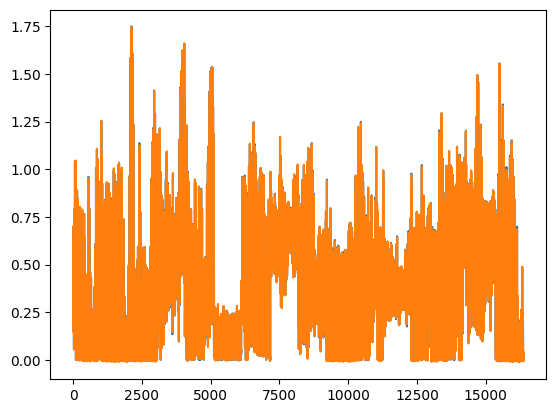

In [10]:
l1_he = np.array([  0.216,  0.284,  0.336,  0.179,  0.249,  0.458,  0.449,  0.472,  0.440,  0.333,  0.389,  0.469,  0.553,  0.388,  0.237,  0.304,  0.310,  0.268,  0.326,  0.311,  0.504,  0.703,  0.597,  0.409,  0.427,  0.342,  0.143,  0.335,  0.623,  0.584,  0.315,  0.178,  0.123,  0.190,  0.165,  0.056,  0.202,  0.541,  0.773,  0.792,  0.659,  0.363,  0.246,  0.533,  0.438,  0.424,  0.357,  0.189,  0.140,  0.294,  0.243,  0.211,  0.491,  0.687,  0.587,  0.448,  0.650,  0.412,  0.268,  0.357,  0.500,  0.461,  0.157,  0.086,  0.187,  0.387,  0.209,  0.099,  0.289,  0.724,  0.938,  1.043,  0.902,  0.217,  0.080,  0.355,  0.671,  0.358,  0.247,  0.356,  0.254,  0.260,  0.216,  0.109,  0.370,  0.603,  0.636,  0.588,  0.721,  0.626,  0.419,  0.227,  0.313,  0.283,  0.145,  0.152,  0.217,  0.307,  0.206,  0.167,  0.377,  0.584,  0.864,  1.046,  0.868,  0.293, -0.001,  0.170,  0.276,  0.336,  0.256,  0.459,  0.422,  0.348,  0.214,  0.448,  0.671,  0.536,  0.487,  0.340,  0.369,  0.358,  0.249,  0.219,  0.115,  0.163,  0.132,  0.077,  0.217,  0.171,  0.182,  0.381,  0.528,  0.457,  0.436,  0.523,  0.409,  0.111,  0.007,  0.097,  0.339,  0.416,  0.462,  0.478,  0.519,  0.627,  0.816,  0.886,  0.749,  0.434,  0.218,  0.299,  0.212,  0.008,  0.077,  0.214,  0.297,  0.142,  0.021,  0.000,  0.234,  0.192,  0.318,  0.592,  0.505,  0.331,  0.089,  0.166,  0.110,  0.057,  0.007,  0.087,  0.358,  0.409,  0.373,  0.612,  0.662,  0.672,  0.780,  0.846,  0.643,  0.347,  0.228,  0.241,  0.262,  0.107,  0.107,  0.376,  0.383,  0.128, -0.000,  0.016,  0.285,  0.323,  0.594,  0.698,  0.579,  0.273,  0.136,  0.062,  0.076,  0.069,  0.113,  0.214,  0.386,  0.285,  0.160,  0.229,  0.350,  0.455,  0.518,  0.451,  0.353,  0.224,  0.097,  0.099,  0.083,  0.072,  0.268,  0.344,  0.274,  0.011, -0.004,  0.005,  0.439,  0.486,  0.596,  0.528,  0.255,  0.101,  0.009,  0.031,  0.105,  0.100,  0.160,  0.171,  0.188,  0.116,  0.019,  0.068,  0.088,  0.148,  0.166,  0.101,  0.125,  0.117,  0.136,  0.121,  0.042,  0.126,  0.192,  0.303,  0.121,  0.010,  0.002,  0.000,  0.678,  0.804,  0.608,  0.334,  0.217,  0.069,  0.011,  0.027,  0.128,  0.024,  0.153,  0.277,  0.239,  0.112,  0.097,  0.064,  0.056,  0.038,  0.074,  0.075,  0.009,  0.051,  0.119,  0.079,  0.065,  0.156,  0.211,  0.166,  0.019,  0.011,  0.003, -0.001,  0.545,  0.710,  0.467,  0.182,  0.086,  0.033,  0.017,  0.001,  0.044,  0.003,  0.102,  0.313,  0.564,  0.486,  0.231,  0.060,  0.063,  0.108,  0.116,  0.089,  0.084,  0.077,  0.082,  0.146,  0.235,  0.250,  0.227,  0.041,  0.006, -0.003,  0.008,  0.003,  0.583,  0.660,  0.320,  0.005,  0.036,  0.028,  0.020,  0.013,  0.028,  0.015,  0.085,  0.224,  0.475,  0.789,  0.451,  0.139,  0.152,  0.119,  0.249,  0.305,  0.265,  0.104,  0.175,  0.177,  0.201,  0.181,  0.098,  0.030, -0.002, -0.007,  0.017, -0.001,  0.685,  0.695,  0.335,  0.007, -0.003,  0.037,  0.011,  0.010,  0.052,  0.017,  0.096,  0.332,  0.631,  0.714,  0.463,  0.096,  0.108,  0.100,  0.242,  0.585,  0.558,  0.252,  0.069,  0.116,  0.163,  0.097,  0.020, -0.005,  0.004,  0.027,  0.019, -0.001,  0.404,  0.563,  0.076,  0.001,  0.000,  0.004,  0.005,  0.026,  0.066,  0.017,  0.110,  0.326,  0.541,  0.490,  0.290,  0.172,  0.203,  0.222,  0.409,  0.757,  0.764,  0.369,  0.053,  0.022,  0.055,  0.008,  0.002, -0.000,  0.020,  0.070,  0.049,  0.023,  0.206,  0.103,  0.039, -0.006, -0.005, -0.002,  0.000,  0.032,  0.080,  0.043,  0.052,  0.207,  0.589,  0.639,  0.393,  0.100,  0.146,  0.178,  0.301,  0.427,  0.442,  0.295,  0.005,  0.002,  0.063,  0.008,  0.000,  0.035,  0.080,  0.032, -0.004,  0.059,  0.207,  0.127,  0.033,  0.000,  0.035,  0.056,  0.007,  0.018,  0.081,  0.022,  0.035,  0.206,  0.406,  0.436,  0.247,  0.083,  0.082,  0.112,  0.185,  0.378,  0.359,  0.167,  0.042, -0.000,  0.045,  0.022,  0.023,  0.080,  0.058,  0.008, -0.004,  0.019,  0.226,  0.222,  0.038,  0.008,  0.077,  0.079,  0.038,  0.061,  0.067,  0.028,  0.090,  0.227,  0.254,  0.199,  0.259,  0.185,  0.130,  0.119,  0.184,  0.203,  0.080,  0.005,  0.008, -0.002,  0.109,  0.128,  0.098,  0.054,  0.005,  0.014,  0.007,  0.053,  0.372,  0.302,  0.003, -0.004,  0.061,  0.006,  0.008,  0.082,  0.048,  0.016,  0.003,  0.136,  0.225,  0.336,  0.450,  0.424,  0.327,  0.190,  0.127,  0.071,  0.025,  0.029, -0.008,  0.012,  0.121,  0.137,  0.153,  0.107,  0.025, -0.005,  0.008,  0.053,  0.373,  0.191,  0.045,  0.035,  0.055, -0.003,  0.003,  0.064,  0.035,  0.042,  0.015,  0.016,  0.132,  0.219,  0.690,  0.954,  0.566,  0.254,  0.153,  0.117,  0.104,  0.029,  0.002,  0.001,  0.044,  0.148,  0.173,  0.064,  0.026,  0.006,  0.002,  0.031,  0.329,  0.147,  0.035,  0.064, -0.003, -0.007, -0.005,  0.074,  0.063,  0.003,  0.001,  0.049,  0.059,  0.151,  0.511,  0.791,  0.562,  0.068,  0.121,  0.123,  0.008,  0.010,  0.020,  0.002,  0.039,  0.087,  0.072,  0.024,  0.002,  0.000,  0.007,  0.041,  0.188,  0.083,  0.066,  0.028, -0.001,  0.002,  0.008,  0.040,  0.056,  0.002,  0.001,  0.061,  0.161,  0.115,  0.296,  0.461,  0.240,  0.088,  0.022,  0.022,  0.014,  0.000,  0.005, -0.009,  0.005,  0.034,  0.002, -0.002,  0.000,  0.000,  0.001,  0.045,  0.081,  0.089,  0.110,  0.010, -0.003,  0.004,  0.038,  0.093,  0.077,  0.004,  0.002,  0.024,  0.054,  0.097,  0.317,  0.431,  0.199,  0.013,  0.028,  0.012,  0.005,  0.013,  0.003,  0.002,  0.007,  0.007,  0.006, -0.002, -0.001,  0.002, -0.002,  0.030,  0.052,  0.056,  0.075,  0.012, -0.000,  0.025,  0.083,  0.138,  0.131,  0.030,  0.022,  0.017,  0.016,  0.026,  0.121,  0.192,  0.109,  0.000,  0.001,  0.016,  0.015,  0.027,  0.001,  0.002,  0.036, -0.000,  0.000,  0.000,  0.008,  0.005,  0.003,  0.060,  0.087,  0.130,  0.137,  0.022,  0.026,  0.081,  0.049,  0.152,  0.140, -0.003,  0.012,  0.005,  0.008,  0.034,  0.021,  0.015,  0.010,  0.007,  0.004,  0.020,  0.042,  0.015,  0.006,  0.004,  0.012,  0.009, -0.001,  0.001,  0.001, -0.003,  0.000,  0.037,  0.226,  0.269,  0.184,  0.087,  0.031,  0.128,  0.171,  0.166,  0.122,  0.003,  0.008,  0.010,  0.013,  0.048,  0.039,  0.022,  0.019,  0.006,  0.031,  0.034,  0.030,  0.036, -0.001, -0.001,  0.003,  0.001,  0.005,  0.002,  0.002,  0.002,  0.006,  0.034,  0.380,  0.338,  0.348,  0.237,  0.180,  0.239,  0.320,  0.249,  0.179, -0.007,  0.053,  0.006,  0.019,  0.016,  0.055,  0.066,  0.024,  0.008,  0.007,  0.026,  0.037,  0.007,  0.001, -0.003, -0.003,  0.006, -0.002, -0.001, -0.003,  0.004,  0.001,  0.047,  0.340,  0.518,  0.592,  0.600,  0.563,  0.428,  0.234,  0.280,  0.168,  0.092,  0.000, -0.003,  0.014,  0.024,  0.013,  0.024,  0.058,  0.028,  0.002,  0.046,  0.027,  0.001, -0.004, -0.008, -0.002, -0.002,  0.002, -0.001, -0.000,  0.009,  0.015,  0.053,  0.402,  0.634,  0.694,  1.005,  0.888,  0.506,  0.401,  0.259,  0.154,  0.059,  0.003,  0.004,  0.016,  0.016,  0.045,  0.074,  0.045,  0.044,  0.031,  0.013,  0.002, -0.004,  0.001, -0.002,  0.003, -0.005,  0.002,  0.001,  0.005,  0.010,  0.001,  0.061,  0.594,  0.734,  0.665,  0.736,  1.081,  1.108,  0.726,  0.367,  0.305,  0.126,  0.007,  0.020,  0.023,  0.022,  0.012,  0.030,  0.043,  0.010,  0.004,  0.010, -0.006, -0.000,  0.012, -0.005, -0.002,  0.009,  0.002,  0.002,  0.012,  0.013,  0.004,  0.062,  0.484,  0.955,  1.052,  0.643,  0.776,  0.920,  0.769,  0.668,  0.483,  0.298,  0.160,  0.079,  0.174,  0.092,  0.032,  0.022,  0.023,  0.024, -0.003,  0.023,  0.047,  0.009,  0.032,  0.050,  0.010,  0.027,  0.012,  0.054,  0.099,  0.033,  0.023,  0.069,  0.458,  0.584,  0.747,  0.934,  0.750,  0.585,  0.440,  0.536,  0.723,  0.773,  0.438,  0.370,  0.314,  0.171,  0.053,  0.012,  0.017,  0.033,  0.045,  0.067,  0.081,  0.033,  0.008,  0.022,  0.019,  0.020,  0.019,  0.061,  0.096,  0.080,  0.058,  0.092,  0.535,  0.255,  0.545,  0.805,  0.773,  0.433,  0.229,  0.327,  0.542,  0.797,  0.708,  0.423,  0.326,  0.180,  0.085,  0.070,  0.094,  0.090,  0.101,  0.091,  0.090,  0.076,  0.065,  0.075,  0.060,  0.070,  0.071,  0.084,  0.099,  0.104,  0.104,  0.035,  0.386,  0.446,  0.438,  0.313,  0.390,  0.450,  0.302,  0.329,  0.147,  0.428,  0.587,  0.551,  0.454,  0.224,  0.188,  0.240,  0.244,  0.263,  0.265,  0.277,  0.268,  0.227,  0.208,  0.222,  0.228,  0.245,  0.257,  0.272,  0.278,  0.248,  0.256,  0.167,  0.143,  0.021,  0.003,  1.255,  0.467,  0.000,  0.399,  0.340,  0.002,  0.416,  1.072,  0.546, -0.004, -0.002,  0.002,  0.007, -0.005,  0.518,  0.025,  0.007,  0.291,  0.279,  0.035,  0.004,  0.357,  0.404, -0.003,  0.015, -0.000,  0.001,  0.457, -0.005,  0.033, -0.008, -0.004,  0.927,  0.011, -0.001,  0.543,  0.289,  0.001,  0.086,  0.316,  0.104,  0.373,  0.002, -0.006,  0.006,  0.002,  0.135, -0.004, -0.004, -0.000,  0.180,  0.219,  0.006,  0.616,  0.539,  0.003,  0.007, -0.000,  0.144, -0.001, -0.004, -0.003, -0.000,  0.033,  0.653,  0.002, -0.005,  0.473,  0.175,  0.001, -0.007,  0.430,  0.006,  0.142,  0.815, -0.004,  0.007, -0.001,  0.004, -0.001,  0.152,  0.002,  0.292,  0.579,  0.156,  0.220,  0.561, -0.007, -0.004, -0.002, -0.001,  0.207, -0.007,  0.003,  0.003,  0.317,  0.559,  0.001, -0.002,  0.059,  0.257,  0.003, -0.005,  0.599,  0.039,  0.000,  0.390,  0.596, -0.001,  0.005, -0.004,  0.003,  0.008,  0.006,  0.761,  0.274, -0.004,  0.000,  0.570, -0.002,  0.002,  0.012, -0.003,  0.299, -0.004, -0.003, -0.002,  0.513,  0.574,  0.005,  0.000,  0.073,  0.188,  0.007, -0.004,  0.837,  0.387, -0.002,  0.003,  0.348,  0.177, -0.003, -0.004, -0.001,  0.003,  0.204,  0.543, -0.002,  0.004,  0.621,  0.628, -0.003, -0.003, -0.002,  0.324, -0.003,  0.002, -0.006,  0.086,  0.393,  0.159,  0.025,  0.022, -0.001,  0.073,  0.004, -0.001,  0.779,  0.628,  0.002,  0.002, -0.006,  0.001,  0.057,  0.003, -0.000, -0.001,  0.182,  0.259,  0.000, -0.004,  0.921,  0.244,  0.001, -0.009,  0.367,  0.462,  0.005, -0.001, -0.000, -0.002,  0.107,  0.166,  0.408, -0.001,  0.008, -0.002, -0.003,  0.001,  0.932,  0.512, -0.007, -0.000,  0.059, -0.001, -0.001, -0.001,  0.005, -0.004,  0.068,  0.077, -0.004,  0.295,  0.717, -0.005,  0.005,  0.064,  0.559, -0.001, -0.001, -0.002,  0.005,  0.001,  0.002,  0.266,  0.260,  0.005,  0.097,  0.001, -0.006,  0.000,  0.924,  0.196, -0.004,  0.183,  0.224,  0.004, -0.003,  0.007,  0.005, -0.002,  0.040,  0.005,  0.001,  0.696,  0.774, -0.005, -0.000,  0.702,  0.190, -0.007, -0.010, -0.002,  0.167,  0.000,  0.004,  0.331,  0.459, -0.002,  0.220,  0.087,  0.002,  0.509,  0.662,  0.002, -0.001,  0.002,  0.307,  0.086, -0.002,  0.007,  0.047,  0.141,  0.080, -0.001, -0.003,  0.926,  0.689, -0.000,  0.321,  0.534,  0.003,  0.003,  0.002, -0.001,  0.292,  0.001, -0.002,  0.683,  0.395,  0.011,  0.119, -0.002, -0.004,  0.606,  0.699,  0.325,  0.002,  0.002,  0.430,  0.129,  0.004, -0.003,  0.441,  0.231,  0.004, -0.001, -0.002,  0.876,  0.538,  0.003,  0.453,  0.222,  0.001,  0.003,  0.002, -0.003,  0.304,  0.001,  0.035,  0.537,  0.369,  0.107, -0.004, -0.006,  0.004,  0.625,  0.840,  0.656, -0.003,  0.000,  0.326,  0.505, -0.003, -0.004,  0.449,  0.166, -0.001, -0.004, -0.003,  0.661,  0.293, -0.003,  0.296,  0.003, -0.001,  0.007, -0.001,  0.003,  0.185, -0.002,  0.081,  0.170,  0.492, -0.003,  0.023,  0.008,  0.007,  0.752,  0.800,  0.131, -0.001, -0.010,  0.266,  0.316, -0.001,  0.317,  0.445,  0.027, -0.000, -0.002,  0.641,  0.572,  0.016,  0.000,  0.137, -0.004,  0.001,  0.004,  0.060,  0.056,  0.149,  0.196,  0.009,  0.272,  0.469, -0.003,  0.266, -0.000, -0.000,  0.814,  0.446, -0.008,  0.001, -0.006,  0.003, -0.002,  0.008,  0.085,  0.381, -0.002, -0.003,  0.111,  0.644,  0.663,  0.003,  0.003,  0.001,  0.006,  0.002,  0.002,  0.300,  0.001,  0.156,  0.127, -0.004,  0.680,  0.255,  0.003,  0.377, -0.001,  0.003,  0.847,  0.463,  0.039, -0.007,  0.005,  0.004,  0.195,  0.006, -0.005,  0.239, -0.000,  0.001,  0.005,  0.288,  0.699,  0.223,  0.006, -0.001, -0.001, -0.002,  0.183,  0.325,  0.000,  0.002,  0.001, -0.001,  0.858, -0.005,  0.001,  0.335, -0.004,  0.001,  1.005,  0.708,  0.004, -0.006, -0.012,  0.079,  0.175, -0.001,  0.063,  0.106,  0.005,  0.235, -0.002,  0.263,  0.745,  0.568,  0.001, -0.004, -0.003,  0.104,  0.292,  0.211, -0.000, -0.005, -0.002,  0.585,  0.663,  0.003,  0.175,  0.288,  0.002, -0.002,  0.975,  0.716,  0.009, -0.004,  0.109, -0.003, -0.002,  0.002,  0.239,  0.022,  0.008,  0.087,  0.082,  0.235,  0.733,  0.454,  0.004, -0.008,  0.073,  0.257,  0.246,  0.012,  0.005,  0.001,  0.001,  0.801,  0.289, -0.000,  0.345,  0.264, -0.003,  0.164,  0.866,  0.314,  0.003,  0.003,  0.011, -0.002, -0.000,  0.002,  0.000,  0.151, -0.001, -0.005,  0.130,  0.313,  0.499,  0.265, -0.000,  0.002,  0.079,  0.166,  0.132, -0.009,  0.001,  0.001,  0.393,  0.458, -0.003,  0.002,  0.355,  0.129, -0.007,  0.612,  0.742,  0.004,  0.005,  0.005, -0.008, -0.010, -0.005,  0.004,  0.276,  0.057,  0.000, -0.003,  0.003,  0.257,  0.414,  0.233, -0.005,  0.004,  0.068,  0.049,  0.018, -0.001, -0.001,  0.129,  0.573,  0.133, -0.005, -0.001,  0.312, -0.001,  0.002,  0.928,  0.595, -0.001,  0.005,  0.164,  0.065,  0.084,  0.002,  0.163,  0.431, -0.004,  0.001, -0.003, -0.004,  0.142,  0.485,  0.227, -0.001,  0.004,  0.125,  0.021, -0.007, -0.001,  0.006,  0.447,  0.211,  0.003, -0.003,  0.105,  0.229, -0.001,  0.005,  1.023,  0.565,  0.001, -0.002,  0.059,  0.224, -0.001,  0.007,  0.001,  0.138, -0.002, -0.009,  0.002, -0.006,  0.074,  0.426,  0.238, -0.001,  0.036,  0.193, -0.002,  0.002,  0.035, -0.006,  0.532,  0.183, -0.001, -0.007,  0.171,  0.188, -0.006, -0.001,  1.035,  0.509,  0.005,  0.007,  0.009,  0.022,  0.006, -0.001, -0.002,  0.000,  0.001, -0.010,  0.000, -0.002,  0.106,  0.348,  0.143,  0.001,  0.109,  0.171,  0.001, -0.002,  0.093, -0.000,  0.317,  0.353,  0.000,  0.137,  0.209,  0.164,  0.009,  0.002,  0.908,  0.579,  0.006, -0.001,  0.019, -0.005, -0.003,  0.003,  0.007,  0.000,  0.003,  0.003,  0.034, -0.004, -0.001,  0.374,  0.028,  0.002,  0.090,  0.119, -0.001, -0.006,  0.085,  0.001,  0.284,  0.136, -0.003,  0.129,  0.134,  0.003,  0.068, -0.001,  0.806,  0.619,  0.003,  0.006,  0.032,  0.005,  0.005, -0.007,  0.005,  0.005,  0.019,  0.001,  0.027,  0.006,  0.004,  0.392,  0.176, -0.001,  0.067,  0.034, -0.002,  0.075,  0.019, -0.002,  0.064,  0.004,  0.002,  0.218,  0.062,  0.078, -0.003, -0.001,  1.009,  0.228,  0.005,  0.002, -0.002,  0.001, -0.001, -0.004,  0.066, -0.005,  0.001,  0.054, -0.003, -0.001,  0.044,  0.381,  0.254,  0.001,  0.001, -0.001,  0.003,  0.052,  0.011,  0.001, -0.003, -0.001,  0.002,  0.195,  0.084,  0.066,  0.002,  0.430,  0.551, -0.001,  0.052,  0.050, -0.003,  0.006,  0.004,  0.092,  0.049, -0.002,  0.075, -0.004,  0.003, -0.001,  0.005,  0.348,  0.220, -0.000, -0.002, -0.000, -0.005,  0.001, -0.002,  0.001,  0.004,  0.004,  0.005,  0.232,  0.382,  0.001, -0.004,  0.738,  0.172,  0.003, -0.000,  0.044, -0.002, -0.003, -0.004,  0.088, -0.001, -0.004,  0.050, -0.004,  0.000,  0.027, -0.005,  0.283,  0.198, -0.004,  0.002,  0.003, -0.004,  0.001,  0.100, -0.003,  0.003, -0.003, -0.002, -0.001,  0.325,  0.000, -0.001,  0.333, -0.002, -0.006, -0.006,  0.001, -0.002, -0.003,  0.007,  0.050,  0.007,  0.005, -0.009,  0.000,  0.006,  0.000, -0.003,  0.229,  0.166,  0.000, -0.001,  0.033, -0.001,  0.004,  0.195, -0.003, -0.002, -0.005,  0.003, -0.001,  0.003, -0.002,  0.001,  0.002, -0.003, -0.001,  0.030, -0.003,  0.029, -0.002,  0.002, -0.002, -0.001, -0.006,  0.012, -0.003, -0.005, -0.002, -0.004,  0.198,  0.172, -0.001, -0.000,  0.070, -0.004,  0.000,  0.226,  0.007,  0.002,  0.001, -0.001,  0.098, -0.003,  0.003,  0.091, -0.006,  0.010, -0.007, -0.002, -0.006,  0.003,  0.006,  0.002, -0.005,  0.007,  0.001,  0.076,  0.001, -0.000,  0.003,  0.003,  0.094,  0.135, -0.007,  0.009,  0.104, -0.001, -0.005,  0.225,  0.004, -0.004,  0.001,  0.003,  0.004,  0.054, -0.000, -0.012,  0.195, -0.009, -0.000,  0.068, -0.006, -0.001, -0.007, -0.001,  0.018, -0.001, -0.004,  0.055,  0.055,  0.004, -0.000,  0.045,  0.006,  0.092, -0.000, -0.002,  0.093,  0.001,  0.001,  0.174,  0.007,  0.005,  0.002,  0.073,  0.002, -0.008,  0.070,  0.001,  0.170,  0.177,  0.001,  0.016,  0.100,  0.039,  0.037,  0.068,  0.006,  0.008,  0.003,  0.088,  0.056, -0.001,  0.020,  0.067,  0.054,  0.094,  0.000,  0.052,  0.045, -0.004,  0.009,  0.032, -0.004, -0.002,  0.219,  0.200,  0.056,  0.002, -0.003,  0.306,  0.088,  0.498, -0.001, -0.004,  0.361,  0.059,  0.217,  0.153,  0.009,  0.035,  0.020,  0.102,  0.054, -0.002,  0.085,  0.078,  0.107,  0.076,  0.036,  0.077,  0.020, -0.003,  0.050,  0.019,  0.006, -0.002,  0.255,  0.033,  0.174,  0.252,  0.091,  0.347,  0.316,  0.001, -0.006,  0.329,  0.960,  0.846,  0.242,  0.003,  0.056,  0.090,  0.156,  0.179,  0.007,  0.057,  0.570,  0.449,  0.145,  0.336,  0.015, -0.003,  0.141, -0.006,  0.026,  0.148,  0.005,  0.001,  0.461,  0.012, -0.002,  0.009, -0.003,  0.478,  0.867,  0.713,  0.005, -0.000,  0.173,  1.580,  1.135,  0.272,  0.340,  0.017, -0.004,  0.230,  0.077, -0.000,  0.296,  0.863,  0.002,  0.554,  1.000,  0.177,  0.044, -0.005,  0.306,  0.175,  0.212,  0.000,  0.081, -0.001, -0.001,  0.015,  0.003,  0.000,  0.175,  0.657,  0.565,  0.637,  0.002,  0.116,  1.745,  0.869,  0.179,  0.114,  0.004, -0.004,  0.198,  0.005,  0.011, -0.000,  0.263, -0.003,  0.787,  0.453,  0.341,  0.183, -0.000,  0.300, -0.003,  0.107, -0.003, -0.003, -0.002,  0.102, -0.002, -0.003, -0.004, -0.002, -0.001,  0.418,  0.480,  0.003,  0.142,  1.609,  0.707,  0.061,  0.002,  0.002,  0.212,  0.057, -0.006, -0.007,  0.300,  0.034,  0.010, -0.003,  0.038,  0.783,  0.005, -0.002,  0.002,  0.001,  0.012, -0.001, -0.001,  0.002, -0.002,  0.002, -0.003,  0.005,  0.002,  0.002,  0.247,  0.310, -0.001,  0.134,  1.236,  0.580,  0.456,  0.159, -0.005,  0.074, -0.004,  0.004,  0.021,  0.280,  0.233,  0.058, -0.000,  0.158,  0.386,  0.003,  0.043, -0.003, -0.005,  0.003, -0.005,  0.097,  0.043,  0.067, -0.001,  0.090,  0.002,  0.000,  0.043,  0.003,  0.154, -0.003,  0.000,  0.449,  0.182,  0.183,  0.026,  0.006,  0.245,  0.482,  0.004, -0.001,  0.046,  0.374, -0.003,  0.009,  0.002,  0.001, -0.004,  0.180,  0.003,  0.097,  0.075,  0.372,  0.338,  0.126, -0.008,  0.068, -0.003, -0.002,  0.004, -0.005, -0.006,  0.005, -0.003,  0.000, -0.001,  0.000, -0.003,  0.006,  0.246,  0.405,  0.180, -0.007, -0.008,  0.116, -0.007,  0.017,  0.006,  0.103,  0.006,  0.283,  0.303,  0.003,  0.451,  0.435,  0.355,  0.139,  0.084,  0.086, -0.002, -0.001,  0.003,  0.085,  0.081,  0.153,  0.016,  0.017,  0.163, -0.000,  0.091,  0.009, -0.004,  0.088,  0.197,  0.040,  0.025,  0.009, -0.006,  0.001,  0.020,  0.002, -0.005, -0.001,  0.108, -0.002, -0.006, -0.000,  0.000, -0.005,  0.089,  0.002, -0.005, -0.003,  0.000,  0.151,  0.368,  0.395,  0.145,  0.003,  0.265,  0.263, -0.004,  0.055,  0.003,  0.000,  0.308,  0.306, -0.004, -0.003,  0.006,  0.003,  0.025,  0.051,  0.024, -0.004,  0.003, -0.001,  0.002, -0.003,  0.001,  0.002, -0.002, -0.003, -0.001,  0.004,  0.235,  0.001,  0.344,  0.524,  0.407,  0.103, -0.005,  0.201,  0.276,  0.166,  0.415,  0.002, -0.002,  0.592, -0.001, -0.002,  0.002,  0.040, -0.006,  0.052, -0.000,  0.135,  0.202, -0.000, -0.000,  0.004,  0.004,  0.001, -0.005,  0.009, -0.002,  0.003,  0.579,  0.004,  0.003,  0.166,  0.574,  0.001,  0.004, -0.001,  0.149,  0.201,  0.529,  0.480, -0.004,  0.308,  0.122,  0.006,  0.007,  0.008,  0.009,  0.053, -0.002, -0.008,  0.322,  0.090, -0.003, -0.004,  0.001,  0.007,  0.000,  0.033, -0.004,  0.000,  0.476,  1.127,  0.291,  0.001,  0.149,  0.003,  0.040,  0.007,  0.007, -0.002,  0.005,  0.481,  0.059, -0.001,  0.005,  0.004,  0.039,  0.009,  0.009,  0.000,  0.004, -0.005, -0.001,  0.002,  0.000,  0.001,  0.001,  0.010,  0.000, -0.002,  0.202,  0.005, -0.001,  0.472,  0.775,  0.447, -0.001,  0.005,  0.003,  0.408,  0.334,  0.118,  0.002,  0.001,  0.325, -0.003,  0.044, -0.006,  0.040,  0.029,  0.017,  0.001, -0.006,  0.005,  0.004, -0.010, -0.000, -0.001, -0.008, -0.003,  0.073,  0.002,  0.151,  0.186,  0.039, -0.002, -0.000,  0.215,  0.286,  0.057, -0.000, -0.001,  0.303,  0.391,  0.122,  0.099,  0.249,  0.131,  0.002,  0.066,  0.054, -0.001, -0.000,  0.008, -0.005, -0.004,  0.067,  0.004,  0.007, -0.007,  0.002,  0.002,  0.289, -0.004,  0.004,  0.042,  0.119,  0.289,  0.056, -0.000,  0.116,  0.122,  0.022, -0.004,  0.006,  0.001,  0.005,  0.000,  0.184,  0.212, -0.002,  0.004,  0.006, -0.005, -0.007,  0.001,  0.032,  0.095, -0.001, -0.000, -0.003, -0.005, -0.001, -0.006,  0.142,  0.053, -0.002,  0.263,  0.001,  0.157,  0.541,  0.374,  0.017,  0.072,  0.056,  0.115,  0.065,  0.001,  0.155,  0.040,  0.209,  0.314,  0.156,  0.002, -0.002, -0.002, -0.000,  0.001,  0.059,  0.591, -0.005,  0.000,  0.004, -0.000, -0.000,  0.075,  0.003,  0.029, -0.006,  0.114,  0.375,  0.000,  0.002,  0.279,  0.478,  0.351,  0.158,  0.202,  0.293,  0.001,  0.010,  0.051,  0.040,  0.292,  0.211,  0.091,  0.002, -0.000,  0.046, -0.003,  0.003,  0.291,  0.332, -0.001,  0.138,  0.004, -0.001,  0.086,  0.004, -0.004,  0.056, -0.006,  0.323,  0.353, -0.003,  0.003,  0.004,  0.586,  0.265,  0.029,  0.132,  0.050,  0.004,  0.015,  0.050,  0.136,  0.080,  0.192,  0.087,  0.025, -0.007,  0.048,  0.006,  0.004,  0.091,  0.003,  0.021, -0.004, -0.001,  0.004, -0.001,  0.003, -0.003,  0.135,  0.002,  0.344,  0.390,  0.498,  0.000, -0.003,  0.276,  0.059,  0.009,  0.071,  0.036,  0.009,  0.093,  0.152,  0.002,  0.001,  0.007,  0.038, -0.001, -0.006,  0.006,  0.091, -0.001,  0.094,  0.002, -0.000,  0.000, -0.002,  0.002,  0.001, -0.005,  0.078, -0.007, -0.007,  0.055,  0.373,  0.479,  0.005,  0.000,  0.029,  0.005,  0.019,  0.061, -0.005,  0.005,  0.242,  0.071,  0.042,  0.007,  0.001,  0.006,  0.003, -0.007,  0.103, -0.003, -0.005,  0.042,  0.001,  0.090,  0.004, -0.001,  0.055,  0.015,  0.059,  0.115,  0.001, -0.005, -0.003,  0.025,  0.094,  0.002, -0.001, -0.002,  0.015, -0.002,  0.064, -0.000,  0.075,  0.094, -0.003,  0.065,  0.001,  0.001,  0.020,  0.006,  0.036,  0.470, -0.000,  0.002, -0.003,  0.049,  0.218,  0.007,  0.032,  0.290,  0.046,  0.004,  0.091,  0.025, -0.000,  0.001, -0.002,  0.009,  0.033,  0.001,  0.003,  0.011,  0.020,  0.141,  0.006,  0.021,  0.001, -0.003,  0.057,  0.012, -0.001,  0.008,  0.002,  0.171,  0.124, -0.001,  0.118, -0.001,  0.428,  0.004, -0.003,  0.211,  0.177,  0.003, -0.006,  0.004, -0.004,  0.051,  0.008,  0.008,  0.009, -0.001, -0.000,  0.041,  0.006,  0.111,  0.185, -0.003,  0.029,  0.000,  0.009,  0.052, -0.002,  0.001,  0.190,  0.236,  0.150,  0.060,  0.001,  0.147,  0.135,  0.090, -0.004, -0.001,  0.237,  0.026,  0.053,  0.024,  0.006, -0.000,  0.014,  0.016, -0.001,  0.000, -0.002,  0.018,  0.000,  0.034,  0.196,  0.074,  0.000,  0.000,  0.009, -0.005,  0.021, -0.002, -0.007,  0.519,  0.594,  0.233, -0.002, -0.001,  0.000,  0.057, -0.004, -0.006,  0.003,  0.056,  0.011,  0.115,  0.044,  0.008,  0.005,  0.021,  0.051,  0.009, -0.003,  0.019, -0.006,  0.011,  0.073,  0.076, -0.005, -0.002,  0.015,  0.001,  0.000,  0.006,  0.108, -0.002,  0.267,  0.850,  0.954,  0.114,  0.003, -0.001,  0.117,  0.075,  0.001,  0.014,  0.005,  0.001,  0.004,  0.063,  0.105,  0.001,  0.004,  0.062, -0.008,  0.003,  0.001,  0.003,  0.038,  0.048,  0.007,  0.019,  0.004,  0.017,  0.023,  0.003,  0.520,  0.918,  0.006,  0.166,  1.138,  0.953,  0.395, -0.005,  0.198,  0.121,  0.061,  0.043,  0.061,  0.001,  0.002, -0.004,  0.095,  0.091,  0.005,  0.000,  0.059,  0.001, -0.000, -0.003,  0.005,  0.034,  0.015,  0.069,  0.007, -0.004,  0.014,  0.004,  0.005,  0.936,  1.208,  0.337,  0.194,  0.265,  0.791,  0.336,  0.360,  0.185,  0.072,  0.002,  0.076,  0.086,  0.022,  0.008,  0.004,  0.017,  0.012,  0.001,  0.017,  0.037, -0.002,  0.013,  0.055,  0.017,  0.001,  0.041,  0.086, -0.001,  0.007, -0.002, -0.003,  0.003,  0.294,  1.411,  1.051,  0.151,  0.001,  0.183,  0.342,  0.842,  0.384,  0.142, -0.000,  0.051,  0.002,  0.089,  0.071,  0.000,  0.053,  0.035, -0.002,  0.040,  0.007,  0.003,  0.078,  0.065,  0.006, -0.002, -0.009,  0.006,  0.024, -0.003,  0.679,  0.571, -0.001,  0.004,  1.284,  1.135,  0.021,  0.017, -0.004,  0.248,  0.877,  0.305,  0.254,  0.046, -0.007,  0.008,  0.014,  0.020,  0.027,  0.138,  0.006,  0.003,  0.021, -0.002,  0.001,  0.008,  0.002,  0.002,  0.001, -0.009,  0.062,  0.070,  0.115,  0.886,  1.020,  0.277, -0.005,  0.583,  0.319,  0.404,  0.840, -0.003,  0.023,  0.162,  0.328,  0.287,  0.040,  0.017, -0.002,  0.003,  0.001,  0.029,  0.069, -0.004,  0.001,  0.016,  0.009, -0.004,  0.004, -0.004,  0.041,  0.002,  0.044,  0.022,  0.217,  0.168,  0.357,  1.180,  0.628,  0.014,  0.534,  0.001,  1.138,  0.723,  0.000,  0.002, -0.002,  0.233,  0.217,  0.251,  0.228,  0.198,  0.196,  0.168,  0.218,  0.228,  0.240,  0.242,  0.243,  0.257,  0.250,  0.240,  0.236,  0.259,  0.190,  0.063,  0.715,  0.660,  0.766,  0.531,  0.403,  0.552,  0.366,  0.576,  0.858,  0.832,  0.635,  0.413,  0.769,  1.116,  0.866,  0.728,  0.796,  0.621,  0.585,  0.716,  0.631,  0.546,  0.618,  0.583,  0.447,  0.761,  0.807,  0.697,  0.525,  0.607,  0.657,  0.751,  0.750,  0.543,  0.454,  0.679,  0.275,  0.156,  0.150,  0.318,  0.504,  0.680,  0.859,  0.868,  0.792,  0.856,  1.179,  0.853,  0.830,  0.803,  0.547,  0.433,  0.921,  0.728,  0.223,  0.211,  0.226,  0.468,  0.705,  0.742,  0.700,  0.496,  0.414,  0.595,  0.690,  0.547,  0.356,  0.463,  0.399,  0.638,  0.754,  0.658,  0.308,  0.415,  0.568,  0.913,  1.119,  0.822,  0.879,  1.214,  0.907,  0.639,  0.558,  0.574,  0.635,  0.440,  0.386,  0.295,  0.506,  0.348,  0.313,  0.547,  0.696,  0.768,  0.394,  0.693,  0.545,  0.550,  0.427,  0.544,  0.598,  0.744,  0.828,  0.752,  0.651,  0.682,  0.684,  0.552,  0.908,  0.987,  0.765,  0.758,  0.835,  0.607,  0.642,  0.358,  0.002,  0.236,  0.496,  0.361,  0.354,  0.482,  0.553,  0.627,  0.517,  0.616,  0.478,  0.600,  0.685,  0.575,  0.570,  0.478,  0.646,  0.602,  0.649,  0.589,  0.524,  0.778,  0.825,  0.442,  0.332,  0.700,  0.864,  0.687,  0.529,  0.341,  0.191,  0.180,  0.070,  0.059,  0.443,  0.553,  0.263,  0.262,  0.633,  0.740,  0.672,  0.416,  0.547,  0.638,  0.674,  0.707,  0.521,  0.381,  0.301,  0.630,  0.409,  0.339,  0.338,  0.558,  0.737,  0.532,  0.457,  0.424,  0.721,  0.841,  0.482,  0.307,  0.201,  0.253,  0.323,  0.280,  0.280,  0.399,  0.383,  0.350,  0.553,  0.496,  0.325,  0.462,  0.414,  0.676,  0.595,  0.610,  0.327,  0.142,  0.171,  0.363,  0.544,  0.600,  0.532,  0.557,  0.624,  0.569,  0.514,  0.534,  0.559,  0.722,  0.658,  0.502,  0.438,  0.525,  0.685,  0.645,  0.482,  0.365,  0.401,  0.541,  0.422,  0.079,  0.208,  0.316,  0.400,  0.726,  0.375,  0.474,  0.634,  0.435,  0.310,  0.395,  0.519,  0.646,  0.532,  0.468,  0.536,  0.450,  0.373,  0.475,  0.485,  0.584,  0.663,  0.650,  0.635,  0.533,  0.616,  0.776,  0.678,  0.479,  0.402,  0.377,  0.247,  0.220,  0.193,  0.371,  0.465,  0.734,  0.662,  0.500,  0.763,  0.686,  0.515,  0.465,  0.510,  0.484,  0.505,  0.481,  0.366,  0.376,  0.533,  0.505,  0.397,  0.499,  0.621,  0.580,  0.455,  0.501,  0.578,  0.680,  0.776,  0.627,  0.294,  0.276,  0.258,  0.257,  0.364,  0.407,  0.512,  0.752,  0.476,  0.456,  0.501,  0.667,  0.530,  0.404,  0.506,  0.470,  0.542,  0.648,  0.532,  0.534,  0.740,  0.943,  0.715,  0.572,  0.554,  0.599,  0.343,  0.394,  0.605,  0.657,  0.847,  0.768,  0.344,  0.268,  0.464,  0.297,  0.444,  0.501,  0.535,  0.730,  0.222,  0.201,  0.261,  0.452,  0.426,  0.411,  0.465,  0.533,  0.534,  0.631,  0.644,  0.444,  0.752,  1.094,  1.002,  0.674,  0.508,  0.419,  0.540,  0.549,  0.689,  0.614,  0.545,  0.837,  0.590,  0.375,  0.463,  0.450,  0.505,  0.532,  0.483,  0.657,  0.497,  0.403,  0.314,  0.550,  0.413,  0.492,  0.448,  0.530,  0.489,  0.601,  0.647,  0.669,  0.537,  0.640,  0.920,  0.691,  0.515,  0.508,  0.559,  0.604,  0.598,  0.542,  0.415,  0.553,  0.537,  0.467,  0.487,  0.493,  0.547,  0.518,  0.400,  0.616,  0.630,  0.744,  0.488,  0.457,  0.428,  0.521,  0.491,  0.536,  0.584,  0.614,  0.549,  0.790,  0.734,  0.490,  0.450,  0.671,  0.662,  0.678,  0.592,  0.409,  0.259,  0.475,  0.617,  0.428,  0.487,  0.522,  0.602,  0.583,  0.539,  0.382,  0.332,  0.609,  0.641,  0.616,  0.547,  0.390,  0.378,  0.450,  0.511,  0.573,  0.775,  0.735,  0.572,  0.642,  0.832,  0.721,  0.615,  0.559,  0.559,  0.681,  0.756,  0.607,  0.281,  0.319,  0.493,  0.555,  0.462,  0.601,  0.649,  0.580,  0.438,  0.364,  0.399,  0.643,  0.865,  0.638,  0.449,  0.414,  0.404,  0.383,  0.527,  0.564,  0.763,  0.775,  0.627,  0.494,  0.501,  0.615,  0.773,  0.682,  0.494,  0.513,  0.651,  0.749,  0.599,  0.422,  0.441,  0.552,  0.421,  0.584,  0.622,  0.455,  0.350,  0.452,  0.433,  0.662,  0.748,  0.734,  0.389,  0.415,  0.468,  0.447,  0.539,  0.524,  0.518,  0.729,  0.604,  0.562,  0.476,  0.446,  0.558,  0.635,  0.532,  0.504,  0.422,  0.610,  0.787,  0.590,  0.499,  0.511,  0.331,  0.365,  0.516,  0.399,  0.389,  0.435,  0.493,  0.677,  0.393,  0.548,  0.514,  0.362,  0.501,  0.514,  0.514,  0.579,  0.447,  0.553,  0.632,  0.589,  0.788,  0.723,  0.683,  0.602,  0.645,  0.531,  0.407,  0.405,  0.609,  0.627,  0.584,  0.520,  0.266,  0.144,  0.304,  0.405,  0.480,  0.489,  0.498,  0.707,  0.394,  0.374,  0.509,  0.429,  0.499,  0.557,  0.506,  0.556,  0.478,  0.360,  0.555,  0.617,  0.644,  0.804,  0.980,  0.846,  0.675,  0.559,  0.489,  0.414,  0.454,  0.639,  0.589,  0.560,  0.436,  0.366,  0.429,  0.459,  0.556,  0.536,  0.489,  0.673,  0.514,  0.446,  0.394,  0.476,  0.461,  0.536,  0.497,  0.516,  0.547,  0.461,  0.491,  0.652,  0.591,  0.588,  0.563,  0.520,  0.563,  0.589,  0.431,  0.432,  0.475,  0.546,  0.610,  0.569,  0.427,  0.466,  0.563,  0.563,  0.567,  0.534,  0.501,  0.672,  0.581,  0.646,  0.448,  0.455,  0.448,  0.534,  0.519,  0.563,  0.642,  0.505,  0.507,  0.620,  0.674,  0.584,  0.354,  0.233,  0.400,  0.499,  0.471,  0.440,  0.505,  0.517,  0.599,  0.629,  0.460,  0.465,  0.553,  0.565,  0.575,  0.539,  0.489,  0.681,  0.573,  0.494,  0.554,  0.475,  0.475,  0.573,  0.525,  0.644,  0.765,  0.579,  0.535,  0.579,  0.614,  0.598,  0.608,  0.434,  0.343,  0.530,  0.564,  0.518,  0.504,  0.555,  0.581,  0.607,  0.475,  0.430,  0.520,  0.537,  0.573,  0.551,  0.494,  0.677,  0.671,  0.393,  0.444,  0.429,  0.476,  0.538,  0.451,  0.789,  0.848,  0.612,  0.617,  0.603,  0.576,  0.592,  0.571,  0.537,  0.484,  0.526,  0.574,  0.556,  0.530,  0.559,  0.607,  0.577,  0.509,  0.472,  0.547,  0.553,  0.553,  0.526,  0.522,  0.701,  0.597,  0.432,  0.318,  0.364,  0.376,  0.543,  0.530,  0.625,  0.706,  0.662,  0.584,  0.602,  0.621,  0.592,  0.569,  0.559,  0.547,  0.576,  0.565,  0.578,  0.573,  0.550,  0.544,  0.573,  0.484,  0.508,  0.537,  0.535,  0.538,  0.518,  0.524,  0.706,  0.704,  0.541,  0.542,  0.451,  0.442,  0.489,  0.486,  0.258,  0.469,  0.611,  0.571,  0.559,  0.584,  0.615,  0.622,  0.591,  0.560,  0.596,  0.612,  0.606,  0.572,  0.519,  0.518,  0.572,  0.485,  0.489,  0.552,  0.533,  0.534,  0.515,  0.502,  0.667,  0.880,  0.803,  0.560,  0.551,  0.689,  0.566,  0.372,  0.097,  0.319,  0.483,  0.582,  0.582,  0.595,  0.561,  0.570,  0.576,  0.585,  0.603,  0.616,  0.573,  0.539,  0.499,  0.571,  0.588,  0.522,  0.472,  0.523,  0.526,  0.553,  0.541,  0.518,  0.675,  0.808,  1.155,  0.962,  0.601,  0.519,  0.559,  0.298,  0.292,  0.292,  0.486,  0.586,  0.587,  0.604,  0.567,  0.509,  0.554,  0.574,  0.634,  0.595,  0.506,  0.492,  0.531,  0.567,  0.610,  0.536,  0.502,  0.531,  0.539,  0.559,  0.512,  0.482,  0.673,  0.600,  0.748,  1.424,  1.214,  0.899,  0.478,  0.441,  0.509,  0.438,  0.497,  0.519,  0.553,  0.539,  0.574,  0.588,  0.624,  0.589,  0.565,  0.577,  0.551,  0.522,  0.562,  0.567,  0.589,  0.547,  0.506,  0.542,  0.537,  0.562,  0.537,  0.473,  0.672,  0.928,  0.919,  0.859,  1.308,  1.519,  1.365,  0.809,  0.649,  0.607,  0.612,  0.531,  0.524,  0.498,  0.535,  0.578,  0.602,  0.600,  0.564,  0.568,  0.595,  0.595,  0.592,  0.600,  0.596,  0.553,  0.521,  0.531,  0.532,  0.529,  0.527,  0.500,  0.677,  0.868,  1.380,  1.224,  0.973,  0.987,  1.624,  1.365,  1.019,  1.023,  0.758,  0.714,  0.597,  0.598,  0.570,  0.556,  0.508,  0.542,  0.579,  0.588,  0.642,  0.653,  0.628,  0.641,  0.637,  0.586,  0.534,  0.563,  0.596,  0.567,  0.516,  0.494,  0.722,  0.453,  0.843,  1.240,  1.466,  1.000,  0.755,  1.192,  1.134,  1.419,  1.339,  0.943,  0.711,  0.629,  0.609,  0.512,  0.545,  0.533,  0.550,  0.573,  0.569,  0.584,  0.623,  0.602,  0.617,  0.612,  0.539,  0.563,  0.569,  0.555,  0.538,  0.498,  0.677,  0.429,  0.405,  0.470,  0.867,  1.354,  0.951,  0.722,  0.895,  1.037,  1.661,  1.393,  0.971,  0.730,  0.641,  0.629,  0.677,  0.708,  0.705,  0.717,  0.673,  0.649,  0.671,  0.689,  0.680,  0.683,  0.670,  0.680,  0.695,  0.648,  0.627,  0.624,  0.712,  0.123,  0.191,  0.168,  0.239,  0.333,  0.498,  0.225,  0.289,  0.163,  0.367,  0.696,  0.501,  0.501,  0.441,  0.419,  0.430,  0.428,  0.430,  0.441,  0.416,  0.409,  0.405,  0.412,  0.414,  0.400,  0.406,  0.380,  0.394,  0.377,  0.382,  0.343,  0.539,  0.536,  0.670,  0.803,  0.129,  0.521,  0.491,  0.562,  0.894,  0.968,  0.731,  0.415,  0.748,  1.127,  0.889,  0.521,  1.049,  0.735,  0.344,  0.629,  0.649,  0.743,  0.854,  0.923,  0.779,  0.912,  0.993,  0.613,  0.642,  0.848,  1.229,  0.823,  0.921,  0.255,  0.091,  0.313,  0.308,  0.021, -0.002,  0.147,  0.384,  0.706,  0.435,  0.381,  0.163,  0.056,  0.940,  0.598,  0.228,  0.495,  0.297,  0.021,  0.373,  0.536,  0.601,  0.489,  0.516,  0.506,  0.539,  0.230,  0.249,  0.252,  0.708,  0.555,  0.380,  0.386,  0.386,  0.492,  0.356,  0.110, -0.007,  0.182,  0.001,  0.390,  0.343,  0.050,  0.356,  0.266,  0.032,  0.979,  0.633,  0.254,  0.517,  0.346,  0.432,  0.557,  0.695,  0.528,  0.240,  0.305,  0.143,  0.089,  0.331,  0.781,  0.576,  0.256,  0.518,  0.441,  0.223,  0.258,  0.229,  0.067,  0.192,  0.079,  0.025,  0.338,  0.299,  0.002,  0.244,  0.675,  0.538,  0.115,  0.935,  0.662,  0.655,  0.540,  0.697,  0.758,  0.590,  0.436,  0.425,  0.477,  0.416,  0.260,  0.197,  0.386,  0.589,  0.218,  0.552,  0.429,  0.359,  0.199,  0.336,  0.437,  0.532,  0.286,  0.058,  0.031,  0.183,  0.019,  0.113,  0.374,  0.633,  0.480,  0.245,  0.501,  0.406,  0.546,  0.783,  0.114,  0.417,  0.589,  0.422,  0.012,  0.158,  0.114,  0.199,  0.369,  0.361,  0.424,  0.525,  0.701,  0.453,  0.449,  0.476,  0.790,  0.571,  0.235,  0.258,  0.276,  0.358,  0.208,  0.160,  0.426,  0.382,  0.486,  0.417,  0.170,  0.256,  0.249,  0.458,  0.491,  0.665,  0.294,  0.263, -0.001,  0.126,  0.162,  0.217,  0.695,  0.492,  0.191,  0.389,  0.784,  0.600,  0.564,  0.744,  0.335,  0.322,  0.235,  0.214,  0.368,  0.274,  0.126,  0.109,  0.330,  0.408,  0.372,  0.341,  0.360,  0.284,  0.331,  0.609,  0.686,  0.484,  0.228,  0.011,  0.143,  0.227,  0.022,  0.385,  0.391,  0.275,  0.174,  0.436,  0.500,  0.618,  0.612,  0.466,  0.259,  0.094,  0.091,  0.337,  0.398,  0.345,  0.304,  0.228,  0.469,  0.363,  0.199,  0.286,  0.361,  0.375,  0.320,  0.211,  0.484,  0.412,  0.383,  0.104,  0.078,  0.078,  0.002, -0.001,  0.269,  0.254,  0.149,  0.412,  0.196,  0.491,  0.629,  0.711,  0.192,  0.115,  0.257,  0.303,  0.256,  0.130,  0.264,  0.385,  0.375,  0.267,  0.289,  0.195,  0.345,  0.373,  0.334,  0.319,  0.298,  0.362,  0.275,  0.281,  0.188,  0.002, -0.001,  0.177,  0.127,  0.063,  0.203,  0.431,  0.625,  0.449,  0.655,  0.357,  0.246,  0.290,  0.332,  0.238,  0.218,  0.121,  0.225,  0.313,  0.464,  0.460,  0.248,  0.142,  0.185,  0.263,  0.219,  0.311,  0.409,  0.467,  0.418,  0.399,  0.296,  0.004,  0.002,  0.100,  0.016,  0.160,  0.213,  0.372,  0.403,  0.265,  0.389,  0.219,  0.432,  0.271,  0.328,  0.214,  0.202,  0.060,  0.109,  0.362,  0.947,  0.462,  0.570,  0.549,  0.328,  0.256,  0.191,  0.164,  0.261,  0.294,  0.380,  0.515,  0.168,  0.129,  0.109,  0.107,  0.100,  0.223,  0.093,  0.439,  0.420,  0.032,  0.501,  0.229,  0.352,  0.225,  0.372,  0.200,  0.196,  0.137,  0.309,  0.433,  0.395,  0.655,  0.930,  0.595,  0.369,  0.263,  0.288,  0.257,  0.345,  0.386,  0.140,  0.477,  0.250,  0.310,  0.184,  0.143,  0.145,  0.244,  0.103,  0.402,  0.684,  0.577,  0.301,  0.124,  0.244,  0.252,  0.248,  0.256,  0.204,  0.201,  0.231,  0.554,  0.193,  0.158,  0.513,  0.585,  0.472,  0.461,  0.478,  0.451,  0.299,  0.357,  0.444,  0.217,  0.027,  0.101,  0.188,  0.164,  0.183,  0.209,  0.152,  0.386,  0.462,  0.417,  0.108,  0.116,  0.201,  0.203,  0.270,  0.323,  0.309,  0.116,  0.148,  0.433,  0.532,  0.290,  0.345,  0.280,  0.422,  0.660,  0.577,  0.314,  0.137,  0.360,  0.563,  0.349,  0.130,  0.085,  0.159,  0.175,  0.122,  0.144,  0.070,  0.348,  0.571,  0.406,  0.055,  0.120,  0.121,  0.183,  0.179,  0.230,  0.329,  0.258,  0.127,  0.388,  0.508,  0.469,  0.448,  0.228,  0.251,  0.297,  0.492,  0.413,  0.255,  0.370,  0.323,  0.220,  0.002,  0.140,  0.168,  0.136,  0.104,  0.163,  0.129,  0.396,  0.910,  0.517,  0.230,  0.341,  0.140,  0.191,  0.151,  0.151,  0.171,  0.215,  0.308,  0.525,  0.377,  0.359,  0.556,  0.489,  0.344,  0.358,  0.434,  0.486,  0.433,  0.210,  0.280,  0.229,  0.091,  0.144,  0.139,  0.119,  0.143,  0.246,  0.196,  0.322,  0.704,  0.593,  0.203,  0.251,  0.186,  0.204,  0.218,  0.202,  0.005,  0.400,  0.405,  0.313,  0.420,  0.249,  0.499,  0.713,  0.667,  0.561,  0.392,  0.353,  0.385,  0.247,  0.317,  0.276,  0.098,  0.007,  0.160,  0.167,  0.209,  0.262,  0.177,  0.343,  0.573,  0.181,  0.245,  0.262,  0.196,  0.222,  0.189,  0.190,  0.022,  0.249,  0.391,  0.363,  0.443,  0.356,  0.795,  0.877,  0.895,  0.734,  0.618,  0.364,  0.427,  0.376,  0.248,  0.343,  0.023,  0.007,  0.078,  0.230,  0.342,  0.276,  0.198,  0.419,  0.563,  0.104,  0.256,  0.153,  0.210,  0.207,  0.181,  0.182,  0.082,  0.244,  0.281,  0.373,  0.209,  0.218,  0.640,  0.755,  0.784,  0.365,  0.438,  0.399,  0.334,  0.332,  0.318,  0.254,  0.241,  0.273,  0.256,  0.263,  0.263,  0.317,  0.187,  0.349,  0.493,  0.065,  0.155,  0.102,  0.249,  0.238,  0.234,  0.228,  0.087,  0.225,  0.296,  0.337,  0.314,  0.374,  0.401,  0.140,  0.381,  0.356,  0.262,  0.304,  0.341,  0.298,  0.330,  0.321,  0.177,  0.146,  0.167,  0.248,  0.291,  0.258,  0.198,  0.422,  0.315,  0.299,  0.066,  0.065,  0.260,  0.308,  0.333,  0.400,  0.367,  0.272,  0.224,  0.317,  0.370,  0.274,  0.248,  0.002,  0.333,  0.304,  0.242,  0.284,  0.231,  0.247,  0.249,  0.292,  0.184,  0.175,  0.183,  0.254,  0.326,  0.278,  0.193,  0.388,  0.531,  0.176,  0.139,  0.074,  0.236,  0.222,  0.417,  0.423,  0.337,  0.410,  0.340,  0.291,  0.290,  0.311,  0.374,  0.444,  0.406,  0.308,  0.371,  0.308,  0.219,  0.261,  0.275,  0.247,  0.236,  0.150,  0.238,  0.246,  0.248,  0.314,  0.195,  0.341,  0.474,  0.446,  0.114,  0.146,  0.209,  0.396,  0.258,  0.377,  0.536,  0.388,  0.302,  0.306,  0.317,  0.374,  0.398,  0.280,  0.320,  0.381,  0.307,  0.247,  0.191,  0.216,  0.281,  0.300,  0.170,  0.186,  0.176,  0.283,  0.303,  0.271,  0.231,  0.388,  0.301,  0.479,  0.419,  0.341,  0.244,  0.460,  0.381,  0.308,  0.359,  0.344,  0.276,  0.317,  0.353,  0.441,  0.362,  0.304,  0.370,  0.327,  0.282,  0.203,  0.249,  0.229,  0.190,  0.263,  0.135,  0.247,  0.194,  0.235,  0.255,  0.274,  0.196,  0.383,  0.459,  0.524,  0.789,  0.911,  0.381,  0.303,  0.315,  0.329,  0.487,  0.279,  0.237,  0.284,  0.276,  0.320,  0.335,  0.448,  0.337,  0.315,  0.310,  0.282,  0.242,  0.165,  0.240,  0.273,  0.231,  0.172,  0.218,  0.249,  0.258,  0.328,  0.209,  0.370,  0.836,  0.609,  0.740,  0.858,  1.032,  0.443,  0.168,  0.068,  0.356,  0.349,  0.377,  0.320,  0.303,  0.294,  0.226,  0.318,  0.378,  0.361,  0.278,  0.269,  0.249,  0.212,  0.281,  0.283,  0.251,  0.235,  0.217,  0.230,  0.227,  0.318,  0.252,  0.403,  0.728,  1.120,  1.069,  0.981,  0.492,  0.818,  0.288,  0.288,  0.322,  0.305,  0.416,  0.346,  0.320,  0.266,  0.213,  0.275,  0.316,  0.355,  0.347,  0.215,  0.258,  0.266,  0.260,  0.287,  0.240,  0.199,  0.269,  0.289,  0.298,  0.270,  0.117,  0.383,  0.480,  1.040,  1.176,  1.402,  0.753,  0.261,  0.448,  0.407,  0.439,  0.607,  0.253,  0.365,  0.274,  0.248,  0.281,  0.320,  0.352,  0.250,  0.261,  0.257,  0.294,  0.284,  0.271,  0.296,  0.278,  0.238,  0.229,  0.256,  0.273,  0.326,  0.184,  0.320,  0.721,  1.078,  1.246,  0.842,  1.513,  1.065,  0.269,  0.252,  0.577,  0.849,  0.601,  0.268,  0.368,  0.344,  0.336,  0.307,  0.338,  0.332,  0.338,  0.349,  0.322,  0.262,  0.331,  0.302,  0.260,  0.263,  0.243,  0.298,  0.279,  0.303,  0.189,  0.393,  0.772,  0.607,  1.275,  1.261,  1.321,  1.526,  0.756,  0.642,  0.708,  0.909,  0.869,  0.506,  0.556,  0.474,  0.355,  0.302,  0.280,  0.286,  0.330,  0.341,  0.388,  0.331,  0.322,  0.379,  0.336,  0.272,  0.292,  0.357,  0.373,  0.384,  0.256,  0.440,  0.956,  0.398,  0.614,  1.073,  1.536,  1.402,  0.740,  0.849,  0.909,  1.120,  1.038,  0.469,  0.623,  0.433,  0.301,  0.227,  0.266,  0.249,  0.286,  0.265,  0.234,  0.281,  0.267,  0.253,  0.260,  0.192,  0.241,  0.270,  0.237,  0.308,  0.230,  0.197,  1.333,  0.797,  0.632,  0.475,  1.059,  1.122,  0.939,  0.997,  0.683,  1.188,  1.001,  0.928,  0.779,  0.649,  0.630,  0.579,  0.578,  0.608,  0.607,  0.612,  0.590,  0.614,  0.582,  0.586,  0.582,  0.572,  0.593,  0.604,  0.599,  0.639,  0.493,  0.796,  0.043,  0.122,  0.129,  0.014,  0.099,  0.201,  0.093,  0.167,  0.208,  0.112,  0.062,  0.103,  0.179,  0.088,  0.071,  0.100,  0.091,  0.049,  0.105,  0.106,  0.059,  0.076,  0.155,  0.123,  0.082,  0.111,  0.097,  0.099,  0.126,  0.086,  0.038,  0.160,  0.016,  0.077,  0.073,  0.002,  0.153,  0.188,  0.071,  0.216,  0.277,  0.011,  0.013,  0.091,  0.070,  0.195,  0.029, -0.000, -0.004,  0.006,  0.037, -0.000,  0.028,  0.063,  0.113,  0.181,  0.042,  0.169,  0.131,  0.055,  0.036,  0.037,  0.012,  0.127,  0.108,  0.111,  0.117,  0.003,  0.267,  0.121,  0.140,  0.209,  0.125,  0.039,  0.042,  0.167,  0.111,  0.071,  0.154,  0.059,  0.035,  0.053,  0.057,  0.086,  0.192,  0.177,  0.228,  0.173,  0.078,  0.024,  0.096,  0.063,  0.127,  0.128,  0.047,  0.227,  0.075,  0.065,  0.077,  0.130,  0.167,  0.074,  0.045,  0.066,  0.135,  0.076, -0.001,  0.107,  0.108,  0.106,  0.072,  0.181,  0.119,  0.130,  0.131,  0.151,  0.212,  0.076,  0.040,  0.085,  0.104,  0.052,  0.095,  0.032,  0.064,  0.141,  0.005,  0.204,  0.076,  0.061,  0.058,  0.163,  0.114, -0.003,  0.003, -0.000,  0.049,  0.076,  0.016,  0.116,  0.160,  0.177,  0.134,  0.097,  0.130,  0.179,  0.244,  0.292,  0.160,  0.015,  0.046,  0.107, -0.003,  0.000,  0.055,  0.094,  0.115,  0.098,  0.002,  0.204,  0.039,  0.007,  0.025,  0.063,  0.128,  0.068,  0.040,  0.038,  0.104,  0.133,  0.026,  0.159,  0.158,  0.089,  0.077,  0.159,  0.083,  0.060,  0.098,  0.135,  0.044,  0.003,  0.092,  0.186,  0.051,  0.002,  0.076,  0.113,  0.111,  0.061,  0.031,  0.222,  0.094,  0.051,  0.065,  0.102,  0.044,  0.099,  0.151,  0.126,  0.147,  0.187,  0.044,  0.151,  0.096,  0.048,  0.035,  0.087,  0.106,  0.121,  0.107,  0.104,  0.029,  0.008,  0.093,  0.177,  0.008,  0.107,  0.133,  0.090,  0.066,  0.034,  0.028,  0.216,  0.191,  0.045,  0.072,  0.009,  0.038,  0.054,  0.089,  0.112,  0.159,  0.147,  0.021,  0.108,  0.058,  0.020,  0.041,  0.056,  0.023,  0.018,  0.007,  0.010,  0.040,  0.099,  0.160,  0.138,  0.013,  0.144,  0.104,  0.108,  0.032,  0.049,  0.046,  0.242,  0.183,  0.062,  0.058,  0.006,  0.110,  0.123,  0.078,  0.101,  0.180,  0.072,  0.022,  0.179,  0.115,  0.156,  0.155,  0.141,  0.092,  0.078,  0.082,  0.106,  0.083,  0.066,  0.106,  0.043,  0.074,  0.175,  0.019,  0.018,  0.051,  0.056,  0.053,  0.235,  0.162,  0.130,  0.100,  0.005,  0.098,  0.136,  0.085,  0.105,  0.142,  0.033,  0.057,  0.142,  0.060,  0.014,  0.074,  0.131,  0.120,  0.118,  0.093,  0.145,  0.127,  0.110,  0.109, -0.000,  0.066,  0.114,  0.017,  0.029,  0.051,  0.054,  0.071,  0.232,  0.196,  0.221,  0.185,  0.046,  0.130,  0.144,  0.103,  0.107,  0.141,  0.048,  0.109,  0.122,  0.118,  0.089,  0.007,  0.016,  0.109,  0.072,  0.073,  0.098,  0.063,  0.080,  0.116,  0.018,  0.029,  0.034,  0.006,  0.043,  0.049,  0.071,  0.074,  0.231,  0.282,  0.192,  0.133,  0.060,  0.110,  0.141,  0.079,  0.112,  0.149,  0.020,  0.078,  0.041,  0.140,  0.115,  0.071,  0.004,  0.088,  0.037,  0.030,  0.066,  0.110,  0.074,  0.023,  0.051,  0.074,  0.060,  0.010,  0.035,  0.055,  0.112,  0.067,  0.241,  0.252,  0.112,  0.085,  0.051,  0.115,  0.136,  0.057,  0.121,  0.138,  0.012,  0.125,  0.170,  0.065,  0.036,  0.050,  0.064,  0.097,  0.034, -0.001,  0.097,  0.168,  0.078,  0.034,  0.021,  0.051,  0.056,  0.037,  0.055,  0.085,  0.141,  0.051,  0.257,  0.134,  0.114,  0.085,  0.059,  0.147,  0.121,  0.057,  0.141,  0.128,  0.004,  0.108,  0.164,  0.116,  0.078,  0.012,  0.020,  0.087,  0.083,  0.027,  0.047,  0.047,  0.074,  0.038,  0.011,  0.063,  0.092,  0.068,  0.086,  0.129,  0.132,  0.047,  0.255,  0.129,  0.120,  0.088,  0.066,  0.166,  0.107,  0.073,  0.144,  0.148, -0.006,  0.096,  0.061,  0.062,  0.067,  0.062,  0.027,  0.045,  0.042,  0.095,  0.170,  0.045,  0.047,  0.090,  0.005,  0.061,  0.092,  0.075,  0.108,  0.123,  0.117,  0.048,  0.258,  0.157,  0.095,  0.029,  0.053,  0.134,  0.058,  0.062,  0.139,  0.147, -0.001,  0.071,  0.102,  0.020,  0.013,  0.116,  0.089,  0.074,  0.019,  0.051,  0.094,  0.016,  0.035,  0.085,  0.021,  0.080,  0.119,  0.092,  0.124,  0.097,  0.100,  0.062,  0.234,  0.244,  0.150,  0.017,  0.084,  0.132,  0.053,  0.068,  0.151,  0.117,  0.011,  0.064,  0.097,  0.077,  0.091,  0.088,  0.118,  0.115,  0.075,  0.045,  0.088,  0.051,  0.031,  0.077,  0.010,  0.090,  0.082,  0.090,  0.108,  0.080,  0.081,  0.065,  0.226,  0.211,  0.060,  0.003,  0.091,  0.099,  0.059,  0.086,  0.173,  0.090,  0.018,  0.135,  0.056,  0.067,  0.088,  0.092,  0.087,  0.008,  0.011,  0.063,  0.084,  0.053,  0.031,  0.074,  0.042,  0.082,  0.072,  0.049,  0.068,  0.064,  0.076,  0.060,  0.225,  0.203, -0.002,  0.025,  0.074,  0.069,  0.055,  0.108,  0.174,  0.056,  0.023,  0.125,  0.066,  0.043,  0.059,  0.132,  0.203,  0.073,  0.009,  0.079,  0.063,  0.031,  0.058,  0.071,  0.037,  0.083,  0.089,  0.059,  0.049,  0.063,  0.087,  0.052,  0.227,  0.099,  0.009,  0.048,  0.065,  0.054,  0.063,  0.115,  0.159,  0.021,  0.036,  0.140,  0.084,  0.062,  0.065,  0.060,  0.134,  0.042,  0.007,  0.058,  0.053,  0.071,  0.067,  0.068,  0.017,  0.058,  0.067,  0.031,  0.046,  0.061,  0.071,  0.053,  0.238,  0.029,  0.058,  0.105,  0.054,  0.070,  0.106,  0.138,  0.164,  0.002,  0.048,  0.127,  0.068,  0.064,  0.083,  0.142,  0.134,  0.044,  0.017,  0.060,  0.053,  0.061,  0.068,  0.064,  0.022,  0.060,  0.060,  0.038,  0.049,  0.062,  0.070,  0.045,  0.239,  0.019,  0.048,  0.104,  0.042,  0.118,  0.120,  0.169,  0.154,  0.000,  0.047,  0.107,  0.056,  0.050,  0.056,  0.063,  0.073,  0.061,  0.032,  0.049,  0.058,  0.056,  0.072,  0.071,  0.025,  0.071,  0.067,  0.031,  0.053,  0.072,  0.068,  0.052,  0.236,  0.081,  0.051,  0.068,  0.043,  0.154,  0.118,  0.137,  0.179,  0.003,  0.026,  0.095,  0.055,  0.057,  0.063,  0.042,  0.028,  0.052,  0.062,  0.057,  0.055,  0.064,  0.071,  0.061,  0.026,  0.080,  0.083,  0.048,  0.065,  0.072,  0.062,  0.059,  0.242,  0.076,  0.113,  0.072,  0.041,  0.120,  0.100,  0.148,  0.172,  0.002,  0.041,  0.065,  0.044,  0.064,  0.064,  0.056,  0.043,  0.048,  0.065,  0.055,  0.056,  0.068,  0.062,  0.068,  0.050,  0.082,  0.075,  0.054,  0.063,  0.061,  0.062,  0.061,  0.235,  0.072,  0.051,  0.054,  0.119,  0.110,  0.121,  0.229,  0.109,  0.019,  0.060,  0.044,  0.045,  0.053,  0.069,  0.074,  0.056,  0.049,  0.049,  0.045,  0.062,  0.071,  0.055,  0.063,  0.041,  0.063,  0.073,  0.054,  0.043,  0.051,  0.080,  0.057,  0.236,  0.131,  0.147,  0.004,  0.140,  0.250,  0.243,  0.217,  0.026,  0.044,  0.065,  0.039,  0.042,  0.063,  0.073,  0.056,  0.043,  0.058,  0.061,  0.053,  0.060,  0.068,  0.061,  0.070,  0.043,  0.058,  0.068,  0.050,  0.057,  0.058,  0.086,  0.045,  0.235,  0.159,  0.131,  0.107,  0.064,  0.080,  0.283,  0.280,  0.067,  0.045,  0.036,  0.045,  0.053,  0.061,  0.062,  0.061,  0.056,  0.059,  0.057,  0.060,  0.063,  0.069,  0.056,  0.067,  0.045,  0.063,  0.069,  0.053,  0.056,  0.070,  0.095,  0.036,  0.234,  0.108, -0.001,  0.096,  0.152,  0.113,  0.028,  0.070,  0.084,  0.175,  0.115,  0.075,  0.052,  0.056,  0.054,  0.067,  0.059,  0.067,  0.051,  0.051,  0.063,  0.062,  0.066,  0.069,  0.059,  0.055,  0.066,  0.064,  0.048,  0.065,  0.086,  0.045,  0.237,  0.095,  0.106,  0.033, -0.005,  0.088,  0.104,  0.043,  0.030,  0.080,  0.156,  0.149,  0.107,  0.053,  0.043,  0.056,  0.042,  0.059,  0.068,  0.063,  0.061,  0.064,  0.050,  0.051,  0.048,  0.046,  0.068,  0.059,  0.049,  0.063,  0.052,  0.036,  0.258,  0.138,  0.089,  0.150,  0.092, -0.002, -0.001,  0.010,  0.094,  0.122,  0.010,  0.026,  0.082,  0.124,  0.077,  0.069,  0.048,  0.057,  0.049,  0.046,  0.062,  0.076,  0.049,  0.056,  0.052,  0.043,  0.054,  0.045,  0.044,  0.066,  0.048,  0.037,  0.255,  0.116,  0.063,  0.106,  0.184,  0.156,  0.001,  0.010, -0.000,  0.090,  0.079,  0.017, -0.000,  0.017,  0.058,  0.052,  0.062,  0.059,  0.048,  0.045,  0.043,  0.057,  0.032,  0.049,  0.044,  0.033,  0.056,  0.032,  0.025,  0.036,  0.057,  0.052,  0.162,  0.415,  0.307,  0.344,  0.298,  0.298,  0.309,  0.283,  0.263,  0.224,  0.268,  0.182,  0.237,  0.335,  0.305,  0.305,  0.304,  0.310,  0.300,  0.309,  0.314,  0.313,  0.301,  0.302,  0.313,  0.306,  0.309,  0.302,  0.313,  0.310,  0.305,  0.321,  0.382,  0.382,  0.496,  0.957,  0.649,  0.629,  0.619,  0.319,  0.273,  0.602,  0.280,  0.375,  0.676,  0.562,  0.605,  0.209,  0.209,  0.445,  0.307,  0.230,  0.429,  0.284,  0.352,  0.374,  0.668,  0.475,  0.271,  0.420,  0.467,  0.615,  0.514,  0.392,  0.189,  0.310,  0.627,  0.917,  0.782,  0.875,  0.762,  0.340,  0.291,  0.542,  0.492,  0.577,  0.850,  0.626,  0.612,  0.604,  0.336,  0.232,  0.295,  0.207,  0.409,  0.578,  0.362,  0.398,  0.676,  0.419,  0.631,  0.634,  0.649,  0.578,  0.605,  0.449,  0.210,  0.372,  0.464,  0.615,  0.557,  0.890,  0.596,  0.219,  0.212,  0.380,  0.537,  0.758,  0.729,  0.648,  0.452,  0.721,  0.556,  0.356,  0.275,  0.280,  0.464,  0.844,  0.355,  0.152,  0.162,  0.522,  0.669,  0.908,  0.549,  0.503,  0.959,  0.428,  0.350,  0.268,  0.266,  0.334,  0.284,  0.473,  0.168,  0.112,  0.074,  0.519,  0.548,  0.672,  0.449,  0.386,  0.485,  0.340,  0.576,  0.291,  0.227,  0.206,  0.461,  0.734,  0.277,  0.182,  0.318,  0.471,  0.599,  0.917,  0.457,  0.396,  0.750,  0.342,  0.408,  0.147,  0.165,  0.285,  0.152,  0.335,  0.072,  0.006, -0.002,  0.402,  0.686,  0.567,  0.286,  0.229,  0.310,  0.176,  0.153,  0.282,  0.069,  0.196,  0.360,  0.245,  0.074,  0.452,  0.806,  0.640,  0.410,  0.739,  0.372,  0.438,  0.482,  0.306,  0.279,  0.136,  0.011,  0.018,  0.309,  0.403,  0.155,  0.066,  0.059,  0.488,  0.839,  0.532,  0.191,  0.222,  0.117,  0.066,  0.103,  0.099,  0.111,  0.177,  0.178,  0.069,  0.073,  0.442,  0.832,  0.541,  0.603,  0.414,  0.451,  0.356,  0.255,  0.273,  0.253,  0.142,  0.062,  0.220,  0.320,  0.421,  0.474,  0.116,  0.120,  0.501,  0.864,  0.546,  0.211,  0.084, -0.001,  0.116,  0.074,  0.129,  0.057,  0.126,  0.161,  0.049,  0.154,  0.251,  0.452,  0.469,  0.788,  0.567,  0.292,  0.199,  0.365,  0.138,  0.240,  0.126,  0.355,  0.399,  0.222,  0.705,  0.611,  0.292,  0.307,  0.708,  0.779,  0.507,  0.406,  0.267,  0.071,  0.170,  0.117,  0.097,  0.060,  0.101,  0.089,  0.071,  0.240,  0.278,  0.282,  0.508,  1.020,  0.626,  0.254,  0.238,  0.250,  0.107,  0.250,  0.240,  0.304,  0.296,  0.237,  0.488,  0.505,  0.317,  0.442,  0.822,  0.495,  0.392,  0.498,  0.301,  0.188,  0.141,  0.155,  0.202,  0.164,  0.149,  0.077,  0.101,  0.345,  0.630,  0.446,  0.641,  1.134,  0.654,  0.231,  0.261,  0.296,  0.198,  0.261,  0.198,  0.566,  0.362,  0.152,  0.531,  0.303,  0.334,  0.484,  0.796,  0.413,  0.273,  0.526,  0.865,  0.361,  0.136,  0.289,  0.431,  0.337,  0.158,  0.087,  0.185,  0.429,  0.626,  0.399,  0.695,  1.084,  0.645,  0.277,  0.235,  0.259,  0.223,  0.236,  0.275,  0.674,  0.533,  0.466,  0.542,  0.425,  0.353,  0.472,  0.720,  0.392,  0.204,  0.472,  0.889,  0.513,  0.311,  0.573,  0.741,  0.447,  0.068,  0.101,  0.271,  0.394,  0.389,  0.226,  0.561,  0.766,  0.575,  0.245,  0.238,  0.274,  0.224,  0.173,  0.540,  0.556,  0.767,  0.776,  0.348,  0.584,  0.207,  0.583,  0.677,  0.435,  0.240,  0.290,  0.314,  0.719,  0.320,  0.434,  0.546,  0.330,  0.196,  0.209,  0.393,  0.453,  0.293,  0.139,  0.388,  0.392,  0.361,  0.188,  0.203,  0.258,  0.155,  0.107,  0.521,  0.644,  1.001,  0.754,  0.425,  0.570,  0.170,  0.635,  0.764,  0.531,  0.275,  0.262,  0.133,  0.261,  0.198,  0.308,  0.284,  0.305,  0.290,  0.362,  0.513,  0.271,  0.250,  0.254,  0.423,  0.254,  0.188,  0.089,  0.199,  0.215,  0.108,  0.137,  0.408,  0.745,  1.242,  0.605,  0.609,  0.430,  0.142,  0.597,  0.918,  0.598,  0.272,  0.302,  0.212,  0.134,  0.185,  0.351,  0.411,  0.334,  0.321,  0.382,  0.391,  0.245,  0.304,  0.304,  0.487,  0.447,  0.259,  0.190,  0.200,  0.106,  0.039,  0.198,  0.408,  0.780,  1.121,  0.496,  0.663,  0.253,  0.068,  0.486,  0.927,  0.534,  0.174,  0.353,  0.251,  0.239,  0.216,  0.330,  0.309,  0.241,  0.288,  0.367,  0.288,  0.290,  0.415,  0.352,  0.428,  0.478,  0.326,  0.184,  0.147,  0.096,  0.045,  0.218,  0.397,  1.089,  0.591,  0.537,  0.577,  0.168,  0.176,  0.608,  0.756,  0.396,  0.168,  0.415,  0.318,  0.232,  0.181,  0.187,  0.170,  0.101,  0.146,  0.316,  0.246,  0.360,  0.408,  0.333,  0.445,  0.476,  0.276,  0.047,  0.047,  0.185,  0.165,  0.231,  0.375,  0.948,  0.474,  0.454,  0.506,  0.144,  0.337,  0.728,  0.540,  0.367,  0.342,  0.400,  0.318,  0.196,  0.111,  0.162,  0.161,  0.113,  0.142,  0.177,  0.194,  0.282,  0.232,  0.272,  0.435,  0.470,  0.269,  0.030,  0.059,  0.211,  0.181,  0.226,  0.397,  0.554,  0.880,  0.398,  0.452,  0.111,  0.422,  0.796,  0.467,  0.367,  0.380,  0.316,  0.222,  0.345,  0.401,  0.635,  0.263,  0.205,  0.126,  0.167,  0.124,  0.163,  0.163,  0.222,  0.343,  0.421,  0.249,  0.028,  0.100,  0.214,  0.154,  0.206,  0.241,  0.362,  0.791,  0.503,  0.340,  0.053,  0.452,  0.848,  0.466,  0.265,  0.234,  0.217,  0.112,  0.168,  0.471,  0.802,  0.315,  0.147,  0.241,  0.203,  0.061,  0.155,  0.182,  0.211,  0.355,  0.435,  0.282,  0.028,  0.092,  0.186,  0.099,  0.188,  0.156,  0.590,  0.662,  0.510,  0.211,  0.021,  0.445,  0.850,  0.428,  0.164,  0.147,  0.165,  0.099,  0.127,  0.311,  0.453,  0.264,  0.161,  0.124,  0.128,  0.084,  0.161,  0.121,  0.182,  0.315,  0.422,  0.257,  0.053,  0.070,  0.131,  0.060,  0.193,  0.121,  0.590,  0.963,  0.430,  0.235,  0.105,  0.420,  0.885,  0.461,  0.146,  0.152,  0.158,  0.081,  0.130,  0.114,  0.046,  0.099,  0.060,  0.083,  0.077,  0.058,  0.143,  0.115,  0.166,  0.293,  0.326,  0.184,  0.065,  0.051,  0.152,  0.047,  0.184,  0.118,  0.555,  1.005,  0.481,  0.206,  0.196,  0.476,  0.974,  0.500,  0.288,  0.221,  0.164,  0.054,  0.102,  0.083,  0.058,  0.065,  0.033,  0.086,  0.020,  0.058,  0.136,  0.170,  0.203,  0.288,  0.232,  0.166,  0.075,  0.061,  0.164,  0.061,  0.197,  0.090,  0.581,  0.817,  0.460,  0.276,  0.374,  0.474,  0.985,  0.446,  0.221,  0.263,  0.117,  0.078,  0.088,  0.076,  0.057,  0.066,  0.046,  0.065,  0.050,  0.034,  0.135,  0.176,  0.200,  0.232,  0.282,  0.216,  0.074,  0.094,  0.183,  0.085,  0.209,  0.129,  0.533,  0.572,  0.390,  0.476,  0.551,  0.840,  0.780,  0.383,  0.227,  0.208,  0.064,  0.084,  0.116,  0.070,  0.054,  0.067,  0.029,  0.042,  0.078,  0.071,  0.175,  0.120,  0.138,  0.221,  0.259,  0.225,  0.067,  0.116,  0.171,  0.107,  0.188,  0.375,  0.534,  0.437,  0.297,  0.409,  0.627,  0.967,  0.587,  0.273,  0.233,  0.158,  0.015,  0.061,  0.116,  0.121,  0.107,  0.062,  0.041,  0.064,  0.085,  0.126,  0.184,  0.096,  0.115,  0.189,  0.188,  0.202,  0.055,  0.116,  0.156,  0.096,  0.161,  0.274,  0.574,  0.294,  0.319,  0.354,  0.726,  0.769,  0.336,  0.265,  0.172,  0.102,  0.046,  0.077,  0.095,  0.083,  0.072,  0.072,  0.068,  0.085,  0.102,  0.098,  0.144,  0.071,  0.090,  0.162,  0.146,  0.145,  0.027,  0.115,  0.184,  0.124,  0.240,  0.309,  0.413,  0.543,  0.438,  0.289,  0.502,  0.365,  0.211,  0.083,  0.065,  0.024,  0.060,  0.091,  0.070,  0.058,  0.057,  0.070,  0.069,  0.045,  0.066,  0.032,  0.090,  0.033,  0.068,  0.137,  0.126,  0.114,  0.048,  0.113,  0.202,  0.094,  0.275,  0.544,  0.238,  0.357,  0.483,  0.521,  0.413,  0.215,  0.125,  0.104,  0.069,  0.019,  0.003,  0.045,  0.051,  0.035,  0.073,  0.043,  0.060,  0.024,  0.063,  0.036,  0.076,  0.038,  0.067,  0.153,  0.139,  0.107,  0.047,  0.080,  0.187,  0.064,  0.298,  0.526,  0.341,  0.341,  0.224,  0.606,  0.749,  0.259,  0.186,  0.326,  0.338,  0.128,  0.054,  0.046,  0.086,  0.077,  0.091,  0.062,  0.062,  0.068,  0.135,  0.139,  0.117,  0.057,  0.067,  0.193,  0.158,  0.139,  0.088,  0.071,  0.160,  0.055,  0.316,  0.232,  0.368,  0.317,  0.277,  0.284,  0.560,  0.669,  0.489,  0.519,  0.559,  0.304,  0.226,  0.127,  0.144,  0.079,  0.063,  0.060,  0.076,  0.068,  0.166,  0.169,  0.118,  0.076,  0.088,  0.174,  0.127,  0.128,  0.101,  0.108,  0.180,  0.025,  0.305,  0.455,  0.376,  0.275,  0.456,  0.340,  0.371,  0.492,  0.602,  0.840,  0.836,  0.365,  0.160,  0.225,  0.258,  0.021,  0.058,  0.031,  0.032,  0.030,  0.105,  0.009,  0.064,  0.019,  0.025,  0.105,  0.020,  0.075,  0.045,  0.032,  0.104,  0.023,  0.128,  0.177,  0.100,  0.016,  0.236,  0.164,  0.161,  0.200,  0.252,  0.545,  0.411,  0.153,  0.104, -0.001,  0.113, -0.006,  0.018, -0.004, -0.001,  0.001,  0.006, -0.001,  0.003,  0.006,  0.005,  0.005, -0.000,  0.018,  0.002, -0.004,  0.022, -0.001,  0.021,  0.530,  0.783,  0.748,  0.568,  0.689,  0.874,  0.950,  0.986,  0.936,  0.828,  0.679,  0.757,  0.905,  0.848,  0.864,  0.878,  0.788,  0.804,  0.885,  0.876,  0.858,  0.848,  0.869,  0.851,  0.859,  0.840,  0.819,  0.893,  0.889,  0.745,  0.751,  0.851,  0.436,  0.554,  0.599,  0.474,  0.568,  0.722,  0.851,  0.826,  0.753,  0.633,  0.552,  0.507,  0.626,  0.648,  0.596,  0.628,  0.598,  0.603,  0.621,  0.614,  0.659,  0.713,  0.779,  0.746,  0.662,  0.604,  0.568,  0.691,  0.701,  0.485,  0.533,  0.788,  0.588,  0.621,  0.635,  0.624,  0.726,  0.676,  0.715,  0.717,  0.669,  0.686,  0.574,  0.553,  0.526,  0.637,  0.700,  0.670,  0.674,  0.699,  0.691,  0.681,  0.700,  0.703,  0.813,  0.738,  0.560,  0.507,  0.558,  0.656,  0.757,  0.545,  0.593,  0.779,  0.636,  0.607,  0.498,  0.589,  0.762,  0.739,  0.677,  0.728,  0.779,  0.723,  0.527,  0.590,  0.680,  0.600,  0.639,  0.748,  0.761,  0.809,  0.802,  0.773,  0.800,  0.782,  0.750,  0.656,  0.550,  0.547,  0.544,  0.557,  0.738,  0.719,  0.654,  0.761,  0.632,  0.502,  0.453,  0.675,  0.808,  0.811,  0.741,  0.724,  0.743,  0.683,  0.529,  0.582,  0.769,  0.790,  0.700,  0.730,  0.756,  0.750,  0.809,  0.791,  0.792,  0.751,  0.710,  0.541,  0.488,  0.571,  0.576,  0.535,  0.636,  0.691,  0.671,  0.716,  0.588,  0.567,  0.621,  0.768,  0.809,  0.846,  0.869,  0.793,  0.679,  0.658,  0.584,  0.660,  0.792,  0.827,  0.782,  0.748,  0.702,  0.724,  0.785,  0.767,  0.736,  0.794,  0.682,  0.539,  0.447,  0.593,  0.668,  0.692,  0.724,  0.665,  0.657,  0.708,  0.585,  0.637,  0.769,  0.714,  0.556,  0.612,  0.755,  0.728,  0.671,  0.640,  0.630,  0.735,  0.745,  0.762,  0.778,  0.790,  0.737,  0.709,  0.733,  0.759,  0.785,  0.779,  0.710,  0.554,  0.492,  0.609,  0.640,  0.763,  0.757,  0.695,  0.661,  0.743,  0.564,  0.650,  0.729,  0.562,  0.406,  0.446,  0.652,  0.699,  0.638,  0.643,  0.706,  0.785,  0.735,  0.746,  0.739,  0.754,  0.752,  0.732,  0.686,  0.746,  0.774,  0.759,  0.719,  0.611,  0.550,  0.587,  0.621,  0.692,  0.779,  0.694,  0.660,  0.744,  0.451,  0.582,  0.716,  0.583,  0.513,  0.583,  0.667,  0.639,  0.597,  0.635,  0.753,  0.749,  0.723,  0.718,  0.702,  0.721,  0.753,  0.754,  0.731,  0.742,  0.769,  0.727,  0.674,  0.651,  0.534,  0.512,  0.622,  0.726,  0.746,  0.639,  0.652,  0.721,  0.473,  0.629,  0.645,  0.579,  0.535,  0.709,  0.698,  0.615,  0.595,  0.646,  0.726,  0.675,  0.662,  0.727,  0.702,  0.669,  0.698,  0.706,  0.735,  0.742,  0.733,  0.710,  0.637,  0.638,  0.570,  0.527,  0.611,  0.723,  0.691,  0.652,  0.660,  0.726,  0.745,  0.968,  0.654,  0.437,  0.506,  0.710,  0.685,  0.628,  0.611,  0.680,  0.730,  0.749,  0.770,  0.666,  0.628,  0.709,  0.671,  0.691,  0.740,  0.770,  0.742,  0.673,  0.658,  0.656,  0.607,  0.562,  0.659,  0.683,  0.659,  0.672,  0.660,  0.718,  0.833,  1.171,  0.717,  0.354,  0.490,  0.690,  0.647,  0.624,  0.632,  0.702,  0.729,  0.732,  0.790,  0.739,  0.614,  0.652,  0.688,  0.690,  0.759,  0.747,  0.702,  0.690,  0.749,  0.718,  0.620,  0.624,  0.665,  0.688,  0.698,  0.696,  0.658,  0.730,  0.761,  1.069,  0.614,  0.278,  0.542,  0.710,  0.654,  0.625,  0.626,  0.694,  0.771,  0.748,  0.809,  0.841,  0.700,  0.659,  0.681,  0.724,  0.771,  0.764,  0.712,  0.709,  0.714,  0.665,  0.618,  0.642,  0.674,  0.698,  0.729,  0.710,  0.685,  0.753,  0.691,  0.946,  0.436,  0.271,  0.618,  0.724,  0.662,  0.634,  0.607,  0.677,  0.759,  0.750,  0.743,  0.756,  0.751,  0.692,  0.674,  0.718,  0.737,  0.811,  0.811,  0.721,  0.717,  0.610,  0.546,  0.620,  0.692,  0.722,  0.728,  0.710,  0.708,  0.760,  0.714,  0.898,  0.335,  0.382,  0.697,  0.689,  0.680,  0.631,  0.604,  0.694,  0.755,  0.741,  0.764,  0.728,  0.730,  0.679,  0.693,  0.704,  0.739,  0.744,  0.756,  0.758,  0.702,  0.607,  0.567,  0.638,  0.723,  0.747,  0.749,  0.696,  0.718,  0.752,  0.823,  0.844,  0.349,  0.482,  0.721,  0.659,  0.650,  0.610,  0.612,  0.705,  0.794,  0.744,  0.746,  0.774,  0.783,  0.758,  0.737,  0.767,  0.753,  0.726,  0.734,  0.729,  0.705,  0.648,  0.617,  0.678,  0.750,  0.774,  0.744,  0.699,  0.684,  0.719,  0.878,  0.781,  0.361,  0.570,  0.717,  0.659,  0.640,  0.618,  0.635,  0.749,  0.806,  0.743,  0.726,  0.753,  0.796,  0.817,  0.754,  0.779,  0.754,  0.726,  0.724,  0.736,  0.754,  0.699,  0.620,  0.621,  0.714,  0.736,  0.745,  0.715,  0.679,  0.708,  0.821,  0.615,  0.340,  0.598,  0.702,  0.685,  0.642,  0.606,  0.634,  0.773,  0.808,  0.716,  0.764,  0.762,  0.633,  0.453,  0.567,  0.785,  0.745,  0.716,  0.751,  0.760,  0.769,  0.731,  0.625,  0.592,  0.655,  0.720,  0.747,  0.725,  0.683,  0.718,  0.779,  0.544,  0.425,  0.627,  0.683,  0.694,  0.646,  0.612,  0.662,  0.761,  0.770,  0.721,  0.789,  0.815,  0.645,  0.432,  0.518,  0.767,  0.780,  0.733,  0.748,  0.768,  0.758,  0.736,  0.657,  0.619,  0.668,  0.731,  0.754,  0.730,  0.694,  0.729,  0.690,  0.492,  0.447,  0.671,  0.692,  0.701,  0.649,  0.613,  0.683,  0.776,  0.768,  0.736,  0.773,  0.799,  0.743,  0.695,  0.680,  0.778,  0.790,  0.751,  0.778,  0.759,  0.767,  0.745,  0.667,  0.627,  0.685,  0.740,  0.744,  0.730,  0.700,  0.729,  0.653,  0.527,  0.493,  0.676,  0.706,  0.722,  0.655,  0.623,  0.723,  0.753,  0.734,  0.755,  0.785,  0.780,  0.796,  0.783,  0.807,  0.830,  0.783,  0.770,  0.777,  0.753,  0.765,  0.739,  0.669,  0.661,  0.722,  0.764,  0.756,  0.723,  0.694,  0.730,  0.589,  0.593,  0.580,  0.668,  0.724,  0.687,  0.636,  0.603,  0.697,  0.743,  0.736,  0.745,  0.778,  0.766,  0.759,  0.764,  0.750,  0.759,  0.771,  0.779,  0.777,  0.764,  0.749,  0.765,  0.696,  0.678,  0.733,  0.748,  0.743,  0.721,  0.687,  0.716,  0.578,  0.603,  0.631,  0.645,  0.706,  0.601,  0.636,  0.631,  0.696,  0.776,  0.757,  0.746,  0.774,  0.750,  0.757,  0.765,  0.753,  0.759,  0.759,  0.780,  0.769,  0.751,  0.736,  0.755,  0.718,  0.674,  0.714,  0.747,  0.751,  0.712,  0.688,  0.712,  0.591,  0.660,  0.648,  0.645,  0.636,  0.560,  0.621,  0.677,  0.775,  0.791,  0.746,  0.753,  0.760,  0.747,  0.736,  0.757,  0.783,  0.770,  0.763,  0.758,  0.765,  0.731,  0.745,  0.773,  0.717,  0.691,  0.709,  0.747,  0.753,  0.705,  0.698,  0.722,  0.581,  0.629,  0.649,  0.637,  0.623,  0.656,  0.670,  0.697,  0.793,  0.787,  0.742,  0.757,  0.754,  0.740,  0.744,  0.750,  0.766,  0.770,  0.769,  0.756,  0.750,  0.735,  0.762,  0.782,  0.732,  0.696,  0.716,  0.750,  0.747,  0.727,  0.693,  0.731,  0.715,  0.709,  0.507,  0.579,  0.633,  0.725,  0.649,  0.655,  0.801,  0.762,  0.730,  0.759,  0.744,  0.748,  0.763,  0.764,  0.764,  0.754,  0.766,  0.763,  0.750,  0.738,  0.772,  0.803,  0.750,  0.706,  0.708,  0.751,  0.740,  0.732,  0.691,  0.736,  0.719,  0.946,  0.653,  0.432,  0.553,  0.756,  0.644,  0.679,  0.768,  0.745,  0.737,  0.752,  0.758,  0.755,  0.755,  0.765,  0.764,  0.765,  0.761,  0.756,  0.756,  0.753,  0.778,  0.805,  0.759,  0.713,  0.727,  0.769,  0.751,  0.718,  0.691,  0.761,  0.552,  0.847,  0.972,  0.720,  0.469,  0.479,  0.721,  0.782,  0.790,  0.738,  0.728,  0.773,  0.753,  0.739,  0.744,  0.766,  0.756,  0.750,  0.771,  0.752,  0.755,  0.758,  0.781,  0.806,  0.771,  0.727,  0.725,  0.760,  0.767,  0.702,  0.684,  0.752,  0.438,  0.505,  0.653,  0.913,  0.802,  0.455,  0.596,  0.798,  0.742,  0.761,  0.734,  0.739,  0.727,  0.702,  0.697,  0.742,  0.761,  0.757,  0.764,  0.748,  0.710,  0.727,  0.759,  0.766,  0.740,  0.704,  0.718,  0.749,  0.736,  0.694,  0.689,  0.740,  0.579,  0.581,  0.479,  0.579,  0.713,  0.759,  0.648,  0.816,  0.597,  0.516,  0.747,  0.733,  0.724,  0.674,  0.688,  0.732,  0.748,  0.744,  0.765,  0.740,  0.702,  0.717,  0.745,  0.756,  0.728,  0.713,  0.700,  0.717,  0.722,  0.686,  0.675,  0.717,  0.780,  0.956,  0.858,  0.731,  0.674,  0.816,  0.881,  0.954,  0.844,  0.554,  0.687,  0.837,  0.813,  0.764,  0.761,  0.783,  0.785,  0.776,  0.783,  0.762,  0.749,  0.755,  0.778,  0.775,  0.747,  0.743,  0.738,  0.745,  0.754,  0.749,  0.728,  0.647,  0.817,  1.025,  0.968,  0.907,  0.777,  0.778,  0.803,  0.899,  0.872,  0.767,  0.768,  0.877,  0.859,  0.815,  0.856,  0.860,  0.856,  0.863,  0.870,  0.856,  0.850,  0.852,  0.860,  0.854,  0.846,  0.856,  0.858,  0.858,  0.865,  0.850,  0.823,  0.680,  0.654,  0.240,  0.341,  0.783,  0.368,  0.176,  0.416,  0.518,  0.378,  0.608,  0.595,  0.246,  0.058,  0.284,  0.481,  0.554,  0.593,  0.529,  0.377,  0.436,  0.540,  0.437,  0.220,  0.426,  0.703,  0.613,  0.449,  0.297,  0.348,  0.681,  0.790,  0.584,  0.564,  0.308,  0.150,  0.551,  0.461,  0.237,  0.429,  0.476,  0.436,  0.429,  0.386,  0.376,  0.265,  0.091,  0.155,  0.326,  0.282,  0.293,  0.448,  0.407,  0.348,  0.317,  0.152,  0.364,  0.605,  0.272,  0.029,  0.087,  0.355,  0.636,  0.499,  0.320,  0.562,  0.414,  0.314,  0.446,  0.501,  0.501,  0.463,  0.490,  0.369,  0.371,  0.352,  0.316,  0.237,  0.204,  0.040,  0.097,  0.285,  0.304,  0.344,  0.268,  0.253,  0.332,  0.426,  0.505,  0.491,  0.186,  0.206,  0.153,  0.185,  0.330,  0.461,  0.353,  0.707,  0.816,  0.719,  0.441,  0.369,  0.461,  0.518,  0.514,  0.335,  0.259,  0.395,  0.373,  0.304,  0.358,  0.253,  0.161,  0.291,  0.385,  0.375,  0.221,  0.343,  0.537,  0.495,  0.424,  0.420,  0.282,  0.415,  0.369,  0.163,  0.103,  0.459,  0.433,  0.775,  0.942,  0.571,  0.303,  0.393,  0.439,  0.341,  0.337,  0.275,  0.201,  0.457,  0.525,  0.302,  0.298,  0.410,  0.452,  0.486,  0.450,  0.328,  0.365,  0.560,  0.394,  0.244,  0.345,  0.310,  0.146,  0.288,  0.431,  0.251,  0.236,  0.357,  0.455,  0.667,  0.594,  0.291,  0.247,  0.401,  0.368,  0.318,  0.381,  0.317,  0.262,  0.505,  0.591,  0.353,  0.349,  0.434,  0.496,  0.559,  0.572,  0.528,  0.471,  0.256,  0.202,  0.257,  0.302,  0.276,  0.088,  0.271,  0.240,  0.381,  0.377,  0.441,  0.383,  0.695,  0.560,  0.310,  0.700,  1.023,  0.500,  0.237,  0.230,  0.190,  0.225,  0.442,  0.452,  0.383,  0.346,  0.331,  0.378,  0.495,  0.524,  0.411,  0.316,  0.294,  0.350,  0.335,  0.320,  0.124,  0.194,  0.326,  0.362,  0.430,  0.311,  0.478,  0.402,  0.762,  0.520,  0.367,  0.784,  0.973,  0.694,  0.320,  0.202,  0.207,  0.224,  0.292,  0.362,  0.401,  0.466,  0.398,  0.326,  0.300,  0.344,  0.331,  0.357,  0.378,  0.309,  0.308,  0.195,  0.086,  0.243,  0.370,  0.440,  0.261,  0.346,  0.458,  0.407,  0.713,  0.456,  0.371,  0.568,  0.813,  0.558,  0.484,  0.304,  0.280,  0.339,  0.251,  0.274,  0.378,  0.351,  0.390,  0.369,  0.257,  0.350,  0.431,  0.402,  0.376,  0.279,  0.144,  0.083,  0.068,  0.302,  0.338,  0.240,  0.315,  0.322,  0.442,  0.397,  0.659,  0.520,  0.308,  0.817,  0.735,  0.446,  0.484,  0.313,  0.367,  0.451,  0.305,  0.207,  0.149,  0.220,  0.288,  0.221,  0.237,  0.331,  0.453,  0.376,  0.269,  0.241,  0.145,  0.088,  0.089,  0.196,  0.222,  0.234,  0.337,  0.325,  0.432,  0.391,  0.389,  0.500,  0.697,  1.039,  0.649,  0.437,  0.425,  0.286,  0.353,  0.447,  0.214,  0.006,  0.171,  0.367,  0.253,  0.101,  0.153,  0.358,  0.353,  0.169,  0.176,  0.235,  0.198,  0.142,  0.172,  0.206,  0.170,  0.325,  0.339,  0.318,  0.452,  0.413,  0.334,  0.432,  0.707,  1.113,  0.624,  0.467,  0.434,  0.278,  0.327,  0.409,  0.259,  0.072,  0.266,  0.353,  0.303,  0.155,  0.281,  0.326,  0.281,  0.278,  0.351,  0.273,  0.262,  0.215,  0.155,  0.285,  0.286,  0.317,  0.321,  0.334,  0.500,  0.438,  0.355,  0.327,  0.808,  1.094,  0.475,  0.508,  0.468,  0.260,  0.246,  0.343,  0.289,  0.169,  0.266,  0.347,  0.329,  0.243,  0.349,  0.258,  0.276,  0.354,  0.374,  0.352,  0.269,  0.232,  0.221,  0.306,  0.304,  0.350,  0.349,  0.401,  0.558,  0.410,  0.336,  0.357,  0.935,  0.882,  0.387,  0.523,  0.461,  0.224,  0.152,  0.320,  0.367,  0.233,  0.183,  0.259,  0.340,  0.347,  0.222,  0.178,  0.286,  0.379,  0.421,  0.288,  0.249,  0.288,  0.224,  0.254,  0.297,  0.339,  0.400,  0.468,  0.514,  0.347,  0.333,  0.343,  1.008,  0.673,  0.437,  0.490,  0.447,  0.214,  0.152,  0.313,  0.327,  0.183,  0.241,  0.247,  0.267,  0.244,  0.303,  0.285,  0.198,  0.231,  0.278,  0.270,  0.226,  0.250,  0.226,  0.244,  0.308,  0.396,  0.498,  0.453,  0.440,  0.359,  0.387,  0.665,  1.133,  0.474,  0.505,  0.560,  0.424,  0.214,  0.250,  0.305,  0.285,  0.195,  0.383,  0.398,  0.225,  0.205,  0.366,  0.410,  0.314,  0.249,  0.320,  0.346,  0.224,  0.217,  0.282,  0.303,  0.350,  0.521,  0.520,  0.352,  0.436,  0.383,  0.362,  0.821,  0.987,  0.350,  0.531,  0.527,  0.335,  0.250,  0.314,  0.339,  0.276,  0.292,  0.253,  0.272,  0.236,  0.202,  0.263,  0.358,  0.405,  0.345,  0.339,  0.316,  0.225,  0.240,  0.366,  0.419,  0.445,  0.473,  0.382,  0.299,  0.421,  0.378,  0.509,  0.864,  0.523,  0.381,  0.448,  0.448,  0.282,  0.299,  0.364,  0.300,  0.236,  0.298,  0.255,  0.168,  0.232,  0.378,  0.410,  0.267,  0.323,  0.335,  0.359,  0.324,  0.240,  0.240,  0.358,  0.433,  0.446,  0.386,  0.324,  0.289,  0.450,  0.385,  0.407,  0.580,  0.435,  0.456,  0.453,  0.448,  0.269,  0.314,  0.358,  0.301,  0.293,  0.287,  0.290,  0.124,  0.170,  0.398,  0.457,  0.362,  0.316,  0.359,  0.395,  0.315,  0.239,  0.228,  0.286,  0.377,  0.387,  0.380,  0.344,  0.315,  0.454,  0.380,  0.449,  0.469,  0.409,  0.492,  0.528,  0.473,  0.239,  0.289,  0.371,  0.338,  0.318,  0.362,  0.326,  0.262,  0.191,  0.320,  0.338,  0.280,  0.390,  0.385,  0.339,  0.338,  0.285,  0.224,  0.251,  0.311,  0.363,  0.378,  0.356,  0.349,  0.455,  0.383,  0.485,  0.396,  0.289,  0.457,  0.490,  0.429,  0.233,  0.236,  0.343,  0.359,  0.307,  0.335,  0.349,  0.321,  0.237,  0.243,  0.274,  0.324,  0.367,  0.343,  0.365,  0.327,  0.272,  0.275,  0.263,  0.319,  0.360,  0.361,  0.359,  0.361,  0.476,  0.394,  0.484,  0.279,  0.189,  0.389,  0.471,  0.463,  0.251,  0.225,  0.289,  0.355,  0.294,  0.350,  0.355,  0.345,  0.357,  0.362,  0.365,  0.370,  0.356,  0.364,  0.367,  0.323,  0.293,  0.290,  0.293,  0.346,  0.351,  0.348,  0.378,  0.340,  0.455,  0.381,  0.552,  0.251,  0.204,  0.386,  0.497,  0.413,  0.242,  0.223,  0.297,  0.375,  0.333,  0.360,  0.373,  0.348,  0.372,  0.401,  0.380,  0.376,  0.393,  0.371,  0.336,  0.334,  0.322,  0.311,  0.312,  0.316,  0.324,  0.341,  0.356,  0.337,  0.450,  0.380,  0.648,  0.369,  0.256,  0.383,  0.462,  0.249,  0.125,  0.260,  0.469,  0.377,  0.370,  0.395,  0.377,  0.347,  0.379,  0.390,  0.395,  0.398,  0.373,  0.340,  0.345,  0.369,  0.352,  0.302,  0.264,  0.313,  0.339,  0.349,  0.347,  0.324,  0.447,  0.382,  0.696,  0.516,  0.231,  0.305,  0.364,  0.186,  0.184,  0.464,  0.346,  0.317,  0.379,  0.390,  0.369,  0.351,  0.356,  0.392,  0.375,  0.355,  0.352,  0.328,  0.351,  0.382,  0.357,  0.288,  0.263,  0.317,  0.341,  0.367,  0.353,  0.335,  0.464,  0.384,  0.466,  0.308,  0.504,  0.448,  0.151,  0.043,  0.420,  0.531,  0.254,  0.282,  0.360,  0.396,  0.375,  0.356,  0.381,  0.368,  0.319,  0.338,  0.360,  0.367,  0.369,  0.369,  0.341,  0.312,  0.297,  0.342,  0.357,  0.370,  0.356,  0.366,  0.472,  0.348,  0.379,  0.284,  0.355,  0.656,  0.362,  0.129,  0.316,  0.350,  0.366,  0.368,  0.350,  0.387,  0.382,  0.377,  0.367,  0.345,  0.358,  0.357,  0.375,  0.413,  0.391,  0.353,  0.352,  0.332,  0.308,  0.343,  0.369,  0.382,  0.365,  0.363,  0.454,  0.352,  0.596,  0.156,  0.212,  0.236,  0.575,  0.470,  0.275,  0.122,  0.278,  0.334,  0.402,  0.371,  0.380,  0.369,  0.359,  0.367,  0.362,  0.395,  0.405,  0.375,  0.378,  0.363,  0.358,  0.332,  0.300,  0.347,  0.355,  0.361,  0.369,  0.356,  0.442,  0.359,  0.684,  0.363,  0.119,  0.229,  0.149,  0.559,  0.435,  0.354,  0.310,  0.203,  0.266,  0.379,  0.367,  0.396,  0.412,  0.412,  0.404,  0.396,  0.398,  0.354,  0.356,  0.380,  0.350,  0.327,  0.306,  0.348,  0.371,  0.362,  0.370,  0.376,  0.451,  0.363,  0.487,  0.485,  0.358,  0.135,  0.181,  0.261,  0.241,  0.350,  0.337,  0.327,  0.277,  0.211,  0.341,  0.395,  0.415,  0.421,  0.395,  0.386,  0.367,  0.338,  0.352,  0.399,  0.394,  0.361,  0.336,  0.380,  0.386,  0.374,  0.396,  0.396,  0.491,  0.389,  0.415,  0.443,  0.394,  0.425,  0.227,  0.246,  0.365,  0.182,  0.350,  0.424,  0.429,  0.394,  0.426,  0.451,  0.469,  0.471,  0.477,  0.470,  0.465,  0.438,  0.486,  0.503,  0.491,  0.474,  0.469,  0.479,  0.477,  0.475,  0.509,  0.492,  0.599,  0.513,  0.675,  0.657,  0.524,  0.610,  0.735,  0.627,  0.778,  0.554,  0.465,  0.633,  0.610,  0.706,  0.642,  0.649,  0.676,  0.646,  0.656,  0.656,  0.648,  0.638,  0.668,  0.675,  0.675,  0.659,  0.661,  0.678,  0.654,  0.660,  0.665,  0.657,  0.781,  0.632,  0.001, -0.007,  0.454,  0.445, -0.002,  0.082,  0.345,  0.113,  0.549,  0.940,  0.665,  0.001, -0.004,  0.281,  0.358,  0.378,  0.571,  0.417,  0.007,  0.314,  0.584,  0.242,  0.185,  0.262,  0.258,  0.295,  0.278,  0.211,  0.240,  0.507,  0.511,  0.585, -0.002,  0.003,  0.258,  0.203,  0.005,  0.374,  0.465, -0.001, -0.000,  0.234,  0.150,  0.091, -0.001, -0.002, -0.000,  0.152,  0.141,  0.124, -0.003,  0.042,  0.516,  0.394,  0.051,  0.057,  0.130, -0.005, -0.002,  0.006,  0.320,  0.187,  0.046,  0.464, -0.001,  0.253,  0.478,  0.372,  0.207,  0.686,  0.536,  0.069,  0.048,  0.011, -0.007,  0.189,  0.332,  0.002, -0.002,  0.026,  0.225,  0.053,  0.102,  0.119,  0.348,  0.533,  0.285,  0.185, -0.000,  0.003, -0.005, -0.002,  0.155,  0.155,  0.302,  0.430, -0.003,  0.397,  0.320,  0.148,  0.004,  0.119,  0.019,  0.001,  0.001,  0.428,  0.373,  0.002,  0.292,  0.334,  0.004, -0.006, -0.003,  0.162,  0.378,  0.166,  0.419,  0.549,  0.093,  0.002, -0.005, -0.000,  0.001,  0.114,  0.058,  0.203,  0.333,  0.293,  0.001,  0.254,  0.039,  0.000, -0.005,  0.002,  0.001, -0.000,  0.180,  0.795,  0.535,  0.068,  0.194,  0.446,  0.384,  0.010,  0.001, -0.003,  0.019,  0.275,  0.568,  0.005,  0.005,  0.054,  0.100,  0.003,  0.002,  0.276,  0.344,  0.150, -0.004,  0.309,  0.002,  0.228,  0.071,  0.004, -0.000,  0.061,  0.003,  0.018,  0.080,  0.588,  0.568,  0.024,  0.097,  0.230,  0.212,  0.183,  0.131,  0.006,  0.035,  0.204,  0.053, -0.002,  0.001,  0.159,  0.155, -0.002,  0.007,  0.301,  0.431,  0.141,  0.004,  0.419,  0.004,  0.325,  0.168,  0.101, -0.003, -0.005,  0.004, -0.003,  0.003,  0.528,  0.575, -0.008,  0.003,  0.005, -0.002,  0.171,  0.072,  0.035, -0.005,  0.038,  0.183,  0.172,  0.026,  0.004,  0.005,  0.008,  0.070,  0.517,  0.355,  0.002, -0.006,  0.397, -0.009,  0.311,  0.321,  0.244, -0.001,  0.004,  0.008,  0.001,  0.036,  0.502,  0.573,  0.000, -0.002,  0.000, -0.003,  0.003,  0.006, -0.001,  0.025,  0.137,  0.097,  0.154,  0.194, -0.000, -0.003, -0.004,  0.304,  0.439,  0.005, -0.003,  0.046,  0.403,  0.015,  0.151,  0.099,  0.089,  0.005,  0.066,  0.097, -0.004,  0.249,  0.557,  0.298,  0.001,  0.166,  0.003,  0.004, -0.003, -0.004,  0.009,  0.019,  0.018, -0.003,  0.016,  0.284, -0.000,  0.000,  0.019,  0.317,  0.049,  0.003,  0.001,  0.084,  0.417, -0.003,  0.010,  0.361,  0.386, -0.004,  0.185,  0.135,  0.001,  0.428,  0.623,  0.153,  0.015, -0.001,  0.317,  0.103,  0.003, -0.002,  0.132,  0.190, -0.004, -0.005,  0.005,  0.201,  0.039,  0.003, -0.002,  0.216, -0.004,  0.004,  0.002,  0.107,  0.447,  0.005,  0.240,  0.433,  0.065,  0.061,  0.126,  0.010,  0.002,  0.480,  0.585,  0.117,  0.001,  0.000,  0.512,  0.397,  0.008,  0.001,  0.233,  0.228,  0.005,  0.001, -0.005,  0.100,  0.004,  0.003, -0.004, -0.005, -0.003,  0.002, -0.002,  0.175,  0.490,  0.190,  0.443,  0.012, -0.007,  0.060, -0.003, -0.003, -0.001,  0.499,  0.521,  0.093,  0.003,  0.004,  0.010,  0.378,  0.184,  0.244,  0.248, -0.006,  0.003, -0.006,  0.377,  0.190, -0.003,  0.000, -0.002, -0.004, -0.005,  0.005,  0.063,  0.282,  0.508,  0.090,  0.293,  0.017,  0.000,  0.035, -0.004,  0.003, -0.002,  0.557,  0.507, -0.002,  0.131,  0.278,  0.038,  0.002,  0.001,  0.131,  0.134, -0.001, -0.001,  0.077,  0.483,  0.148,  0.002,  0.002,  0.002, -0.006,  0.001,  0.009,  0.218,  0.281,  0.403,  0.004,  0.085,  0.093,  0.058,  0.013,  0.065,  0.007,  0.003,  0.594,  0.555, -0.005, -0.005,  0.086,  0.144,  0.150, -0.000,  0.003,  0.094,  0.293,  0.145,  0.107,  0.060, -0.002,  0.002,  0.005,  0.007,  0.003,  0.070,  0.231,  0.256,  0.198,  0.226,  0.003,  0.114,  0.195,  0.104, -0.007,  0.064, -0.001, -0.003,  0.496,  0.467,  0.005,  0.003, -0.009,  0.123,  0.213,  0.001,  0.000,  0.029,  0.070,  0.283,  0.186, -0.003, -0.001,  0.003, -0.004, -0.002,  0.145,  0.297,  0.274,  0.158,  0.001,  0.199, -0.003,  0.335,  0.289,  0.003,  0.041,  0.050,  0.000, -0.003,  0.514,  0.546, -0.002, -0.002,  0.237,  0.099, -0.003,  0.004,  0.040,  0.003,  0.000,  0.122,  0.218,  0.081, -0.001, -0.006,  0.001,  0.006,  0.234,  0.363,  0.214, -0.002,  0.002,  0.291, -0.008,  0.323,  0.167,  0.001,  0.152,  0.100,  0.001,  0.079,  0.506,  0.503,  0.002, -0.005,  0.180,  0.164,  0.102,  0.037, -0.004,  0.012, -0.001, -0.001,  0.100,  0.058, -0.002, -0.003, -0.000,  0.002,  0.166,  0.252,  0.020,  0.001, -0.001,  0.295, -0.002,  0.167, -0.004, -0.004,  0.141,  0.081,  0.003,  0.295,  0.562,  0.313, -0.002,  0.002,  0.007,  0.011,  0.190,  0.307,  0.141,  0.095,  0.003,  0.006,  0.019,  0.064,  0.013,  0.004,  0.002,  0.002,  0.083, -0.001,  0.004,  0.003,  0.003,  0.307, -0.003,  0.004,  0.002,  0.010,  0.153,  0.042, -0.006,  0.460,  0.547,  0.111, -0.002, -0.002,  0.030,  0.001, -0.004,  0.037,  0.409,  0.344,  0.003, -0.004,  0.039,  0.002, -0.001, -0.009, -0.003,  0.002,  0.016, -0.009,  0.003, -0.001,  0.034,  0.311,  0.004, -0.000, -0.003,  0.001,  0.126,  0.004,  0.002,  0.555,  0.521,  0.004,  0.010, -0.000,  0.034,  0.025,  0.006,  0.104,  0.242,  0.006,  0.001, -0.002, -0.001,  0.003,  0.007,  0.001,  0.000, -0.004,  0.030, -0.002, -0.004, -0.005,  0.007,  0.281, -0.001, -0.005,  0.006,  0.144,  0.133,  0.001,  0.008,  0.555,  0.530,  0.001,  0.002,  0.002,  0.003,  0.070,  0.141,  0.187, -0.002, -0.001, -0.003,  0.003, -0.003,  0.004, -0.004, -0.002, -0.001,  0.002,  0.028,  0.001, -0.001, -0.003,  0.024,  0.268, -0.002, -0.001,  0.015,  0.151,  0.122, -0.002,  0.004,  0.578,  0.532, -0.001, -0.001,  0.006, -0.001,  0.002,  0.023,  0.011, -0.002, -0.001,  0.002, -0.005, -0.002, -0.006, -0.002, -0.003,  0.003, -0.000, -0.001,  0.000, -0.002, -0.002,  0.018,  0.251,  0.002, -0.003,  0.190,  0.206,  0.004, -0.001,  0.001,  0.249,  0.547,  0.063,  0.004, -0.002,  0.003,  0.001,  0.005,  0.013, -0.003, -0.002,  0.003, -0.005, -0.002, -0.004,  0.031,  0.003, -0.000,  0.002, -0.005,  0.001,  0.002,  0.000,  0.004,  0.254, -0.005, -0.002,  0.194,  0.154, -0.001, -0.001, -0.002,  0.385,  0.524, -0.000, -0.006, -0.002,  0.001, -0.002,  0.003, -0.000, -0.001,  0.001, -0.003, -0.002,  0.010, -0.007,  0.104, -0.000, -0.003, -0.003,  0.000, -0.000, -0.003,  0.001,  0.000,  0.289,  0.010,  0.217,  0.163, -0.003, -0.001,  0.008,  0.113,  0.527,  0.268,  0.002,  0.008, -0.001, -0.008, -0.003, -0.002, -0.002,  0.003, -0.002, -0.005, -0.007,  0.002,  0.016,  0.074, -0.008, -0.004,  0.002,  0.001, -0.003, -0.006,  0.004,  0.022,  0.281,  0.000,  0.649,  0.676,  0.192,  0.000, -0.001,  0.508,  0.574, -0.002,  0.001, -0.001,  0.000,  0.001, -0.001,  0.036,  0.001, -0.007,  0.001,  0.001,  0.010,  0.016,  0.009,  0.029,  0.005, -0.002, -0.000,  0.004, -0.003, -0.002, -0.002,  0.016,  0.255,  0.084,  0.335,  0.717,  0.574,  0.324,  0.025,  0.322,  0.194,  0.003, -0.002, -0.009, -0.002,  0.003, -0.003,  0.007,  0.001,  0.006, -0.004,  0.008,  0.011, -0.002,  0.005,  0.011, -0.010,  0.002, -0.006,  0.002, -0.001,  0.001, -0.001,  0.013,  0.168,  0.232,  0.718,  0.189,  0.305,  0.443,  0.650,  0.337, -0.001,  0.007,  0.002,  0.003, -0.002, -0.004, -0.002,  0.004,  0.002,  0.005,  0.007,  0.001,  0.005,  0.007, -0.005,  0.003,  0.007, -0.000, -0.004,  0.002,  0.001,  0.001,  0.007, -0.006,  0.178,  0.003,  0.645,  0.692,  0.375,  0.098,  0.445,  0.562,  0.396,  0.236,  0.021, -0.002, -0.006, -0.001, -0.001, -0.000, -0.001, -0.001, -0.000,  0.003,  0.004,  0.001, -0.000, -0.004, -0.001, -0.007, -0.000, -0.000,  0.001, -0.003, -0.003, -0.000,  0.191,  0.008,  0.115,  0.328,  0.603,  0.627,  0.046,  0.208,  0.227,  0.449,  0.607,  0.270, -0.001, -0.000,  0.002,  0.001,  0.023,  0.000, -0.001, -0.001,  0.004, -0.001,  0.001, -0.001, -0.002,  0.001,  0.002, -0.002, -0.005, -0.001,  0.003,  0.003,  0.246,  0.121,  0.341,  0.053,  0.004,  0.490,  0.470,  0.199,  0.242,  0.180,  0.558,  0.633,  0.404,  0.173,  0.022,  0.003, -0.002, -0.001,  0.013,  0.004, -0.008, -0.001, -0.004,  0.003, -0.002,  0.008,  0.003,  0.001,  0.004, -0.001,  0.002,  0.114,  0.315,  0.002,  0.443,  0.378,  0.191, -0.001,  0.198,  0.217,  0.453,  0.442,  0.011,  0.374,  0.422,  0.391,  0.319,  0.118,  0.068,  0.111,  0.116,  0.111,  0.077,  0.112,  0.123,  0.107,  0.087,  0.050,  0.071,  0.071,  0.063,  0.104,  0.156,  0.206,  0.454,  0.499,  0.194,  0.397,  0.674,  0.235,  0.557,  0.363,  0.236,  0.595,  0.881,  0.473,  0.278,  0.504,  0.745,  0.734,  0.629,  0.729,  0.701,  0.462,  0.471,  0.434,  0.329,  0.537,  0.722,  0.609,  0.584,  0.604,  0.468,  0.680,  0.968,  0.654,  0.589,  0.219,  0.000,  0.313,  0.004,  0.247,  0.414, -0.001, -0.004,  0.332,  0.547,  0.004,  0.002,  0.001,  0.184,  0.663,  0.271,  0.269,  0.377,  0.129,  0.245,  0.091,  0.001,  0.151,  0.502,  0.064, -0.005,  0.195,  0.173,  0.261,  0.387,  0.351,  0.241,  0.404,  0.398,  0.505,  0.202,  0.376,  0.907,  0.406,  0.201,  0.425,  0.108,  0.154,  0.090, -0.000, -0.002,  0.282,  0.759,  0.787,  0.614,  0.656,  0.570,  0.536,  0.280,  0.725,  0.786,  0.006,  0.001,  0.155,  0.281,  0.513,  0.669,  0.891,  0.301,  0.597,  0.500,  0.557,  0.539,  0.653,  0.495,  0.269,  0.424,  0.026,  0.003,  0.042,  0.084,  0.111,  0.003,  0.001,  0.047,  0.528,  0.472,  0.311,  0.621,  0.921,  1.220,  0.868,  0.440,  0.294,  0.231,  0.342,  0.222,  0.330,  0.640,  0.898,  0.277,  0.695,  0.458,  0.643,  0.942,  0.238,  0.118,  0.045,  0.125,  0.099,  0.030, -0.003,  0.096,  0.237,  0.162,  0.004, -0.003,  0.011,  0.056,  0.115,  0.722,  1.017,  0.809,  0.331,  0.651,  0.881,  0.596,  0.310,  0.524,  0.564,  0.754,  0.535,  0.282,  0.652,  0.317,  0.649,  0.671,  0.549,  0.217,  0.100,  0.215,  0.130,  0.181,  0.278,  0.270,  0.453,  0.567,  0.097,  0.002, -0.003, -0.002,  0.102,  0.413,  0.348,  0.266,  0.361,  0.656,  0.943,  0.322,  0.425,  1.029,  0.940,  0.691,  0.360,  0.353,  0.389,  0.157,  0.705,  0.786,  0.323,  0.016,  0.277,  0.419,  0.419,  0.357,  0.452,  0.526,  0.485,  0.294,  0.265,  0.193,  0.139,  0.135,  0.080,  0.199,  0.296,  0.270,  0.363,  0.608,  0.552,  0.334,  0.818,  1.242,  1.047,  0.348,  0.379,  0.202,  0.346,  0.311,  0.709,  0.542,  0.017,  0.005,  0.227,  0.437,  0.685,  0.653,  0.619,  0.520,  0.466,  0.345,  0.231,  0.300,  0.265,  0.315,  0.378,  0.295,  0.250,  0.360,  0.443,  0.513,  0.321,  0.636,  1.020,  0.973,  0.521,  0.308,  0.450,  0.268,  0.565,  0.182, -0.001,  0.160,  0.047,  0.306,  0.319,  0.389,  0.628,  0.642,  0.298,  0.704,  0.707,  0.250,  0.245,  0.407,  0.546,  0.468,  0.380,  0.374,  0.405,  0.455,  0.498,  0.455,  0.175,  0.605,  0.981,  0.779,  0.420,  0.436,  0.346,  0.321,  0.293,  0.017,  0.188,  0.315,  0.202,  0.500,  0.381,  0.299,  0.397,  0.371,  0.466,  0.935,  0.611,  0.383,  0.311,  0.429,  0.730,  0.524,  0.437,  0.314,  0.366,  0.580,  0.535,  0.365,  0.076,  0.415,  0.679,  0.473,  0.455,  0.324,  0.394,  0.303,  0.363,  0.060,  0.550,  0.399,  0.262,  0.634,  0.457,  0.326,  0.318,  0.431,  0.373,  0.361,  0.177,  0.478,  0.310,  0.545,  0.848,  0.810,  0.505,  0.479,  0.509,  0.430,  0.479,  0.472,  0.297,  0.242,  0.492,  0.467,  0.492,  0.371,  0.410,  0.308,  0.351,  0.101,  0.706,  0.498,  0.569,  0.427,  0.527,  0.275,  0.311,  0.452,  0.260,  0.006,  0.004,  0.194,  0.578,  0.448,  0.568,  0.637,  0.521,  0.579,  0.412,  0.410,  0.393,  0.279,  0.322,  0.305,  0.375,  0.434,  0.475,  0.402,  0.500,  0.319,  0.367,  0.135,  0.682,  0.469,  0.607,  0.444,  0.520,  0.274,  0.304,  0.269,  0.142,  0.068,  0.003, -0.002,  0.224,  0.480,  0.724,  0.215,  0.116,  0.288,  0.602,  0.651,  0.192,  0.286,  0.298,  0.438,  0.397,  0.497,  0.428,  0.508,  0.515,  0.361,  0.605,  0.309,  0.751,  0.384,  0.536,  0.424,  0.316,  0.248,  0.200,  0.210,  0.237,  0.568,  0.234, -0.001,  0.155,  0.411,  0.488,  0.380,  0.117,  0.004,  0.479,  0.599,  0.189,  0.206,  0.285,  0.369,  0.424,  0.479,  0.585,  0.571,  0.506,  0.290,  0.663,  0.606,  0.653,  0.398,  0.451,  0.489,  0.357,  0.281,  0.112,  0.259,  0.440,  0.409,  0.108,  0.281,  0.317,  0.232,  0.241,  0.371,  0.115,  0.143,  0.306,  0.383,  0.369,  0.239,  0.228,  0.135,  0.318,  0.473,  0.574,  0.445,  0.462,  0.255,  0.676,  0.905,  0.578,  0.419,  0.327,  0.456,  0.415,  0.350,  0.298,  0.373,  0.479,  0.383,  0.258,  0.012,  0.197,  0.356,  0.322,  0.291,  0.249,  0.338,  0.322,  0.394,  0.304,  0.274, -0.001,  0.165,  0.374,  0.519,  0.438,  0.394,  0.404,  0.297,  0.472,  0.716,  0.645,  0.401,  0.317,  0.415,  0.372,  0.525,  0.503,  0.424,  0.367,  0.454,  0.296,  0.126,  0.281,  0.494,  0.663,  0.549,  0.381,  0.449,  0.322,  0.434,  0.365,  0.275,  0.022,  0.209,  0.379,  0.501,  0.442,  0.377,  0.411,  0.270,  0.491,  0.542,  0.477,  0.328,  0.364,  0.407,  0.263,  0.513,  0.616,  0.459,  0.243,  0.219,  0.217,  0.458,  0.641,  0.335,  0.296,  0.484,  0.664,  0.378,  0.501,  0.436,  0.345,  0.361,  0.228,  0.199,  0.283,  0.334,  0.513,  0.423,  0.400,  0.298,  0.591,  0.315,  0.253,  0.448,  0.374,  0.488,  0.246,  0.412,  0.535,  0.344,  0.340,  0.172,  0.247,  0.210,  0.283,  0.313,  0.333,  0.430,  0.444,  0.628,  0.442,  0.361,  0.430,  0.434,  0.216,  0.231,  0.299,  0.415,  0.466,  0.392,  0.473,  0.268,  0.861,  0.212,  0.433,  0.423,  0.443,  0.427,  0.247,  0.242,  0.386,  0.268,  0.362,  0.408,  0.327,  0.126,  0.097,  0.239,  0.317,  0.404,  0.496,  0.445,  0.357,  0.419,  0.432,  0.432,  0.295,  0.306,  0.372,  0.400,  0.437,  0.405,  0.417,  0.288,  0.528,  0.092,  0.506,  0.443,  0.393,  0.468,  0.262,  0.239,  0.418,  0.318,  0.424,  0.347,  0.377,  0.369,  0.257,  0.213,  0.244,  0.496,  0.520,  0.382,  0.458,  0.403,  0.432,  0.492,  0.355,  0.352,  0.374,  0.373,  0.453,  0.406,  0.396,  0.302,  0.485,  0.201,  0.442,  0.389,  0.404,  0.330,  0.302,  0.331,  0.378,  0.331,  0.497,  0.391,  0.420,  0.464,  0.443,  0.323,  0.401,  0.413,  0.407,  0.483,  0.504,  0.493,  0.402,  0.454,  0.309,  0.410,  0.370,  0.440,  0.417,  0.393,  0.457,  0.280,  0.592,  0.277,  0.338,  0.317,  0.486,  0.623,  0.628,  0.452,  0.540,  0.492,  0.388,  0.449,  0.488,  0.490,  0.504,  0.509,  0.406,  0.449,  0.475,  0.545,  0.628,  0.427,  0.367,  0.334,  0.321,  0.433,  0.433,  0.433,  0.446,  0.397,  0.401,  0.290,  0.548,  0.332,  0.563,  0.474,  0.619,  0.776,  0.807,  0.818,  0.840,  0.399,  0.374,  0.385,  0.463,  0.528,  0.573,  0.467,  0.494,  0.509,  0.487,  0.551,  0.475,  0.453,  0.398,  0.310,  0.266,  0.369,  0.444,  0.436,  0.493,  0.378,  0.365,  0.313,  0.488,  0.461,  0.541,  0.751,  0.758,  0.733,  0.967,  1.117,  0.746,  0.412,  0.494,  0.371,  0.434,  0.473,  0.430,  0.567,  0.538,  0.430,  0.472,  0.461,  0.496,  0.467,  0.378,  0.406,  0.305,  0.378,  0.379,  0.436,  0.419,  0.394,  0.483,  0.331,  0.388,  0.309,  0.225,  0.241,  0.385,  0.618,  0.825,  0.659,  0.276,  0.499,  0.416,  0.418,  0.428,  0.412,  0.485,  0.394,  0.435,  0.503,  0.416,  0.397,  0.508,  0.392,  0.384,  0.411,  0.336,  0.405,  0.429,  0.450,  0.402,  0.382,  0.525,  0.370,  0.245,  0.006,  0.351, -0.001, -0.000,  0.264,  0.779,  0.329,  0.261,  0.332,  0.421,  0.428,  0.397,  0.498,  0.456,  0.393,  0.360,  0.391,  0.462,  0.431,  0.429,  0.400,  0.433,  0.415,  0.391,  0.419,  0.381,  0.421,  0.405,  0.431,  0.515,  0.263,  0.279, -0.004, -0.002,  0.206,  0.251,  0.013,  0.035,  0.229,  0.502,  0.492,  0.433,  0.409,  0.419,  0.398,  0.435,  0.395,  0.402,  0.402,  0.415,  0.442,  0.438,  0.417,  0.437,  0.412,  0.403,  0.417,  0.412,  0.429,  0.405,  0.431,  0.519,  0.219,  0.178,  0.000,  0.012, -0.004,  0.040,  0.341,  0.239,  0.289,  0.403,  0.604,  0.603,  0.481,  0.420,  0.398,  0.391,  0.383,  0.402,  0.401,  0.385,  0.407,  0.451,  0.400,  0.416,  0.443,  0.401,  0.385,  0.444,  0.472,  0.409,  0.364,  0.449,  0.183,  0.353, -0.006, -0.003,  0.053,  0.006,  0.036,  0.697,  0.650,  0.514,  0.456,  0.361,  0.448,  0.557,  0.532,  0.540,  0.466,  0.413,  0.449,  0.387,  0.340,  0.449,  0.453,  0.422,  0.439,  0.431,  0.427,  0.440,  0.441,  0.430,  0.404,  0.371,  0.247,  0.282,  0.005, -0.006,  0.002, -0.003,  0.138,  0.265,  0.531,  0.229,  0.232,  0.152, -0.005,  0.236,  0.327,  0.478,  0.337,  0.284,  0.297,  0.231,  0.200,  0.269,  0.286,  0.304,  0.337,  0.299,  0.291,  0.264,  0.234,  0.247,  0.197,  0.250,  0.122,  0.254,  0.118,  0.009,  0.004, -0.001,  0.106,  0.491,  0.323,  0.011,  0.001,  0.245,  0.410,  0.430,  0.522,  0.394,  0.461,  0.414,  0.423,  0.421,  0.390,  0.451,  0.473,  0.462,  0.450,  0.395,  0.390,  0.364,  0.345,  0.422,  0.389,  0.489,  0.828,  0.676,  0.697,  0.707,  0.625,  0.735,  0.890,  0.974,  0.995,  0.898,  0.719,  0.566,  0.700,  0.929,  0.883,  0.891,  0.921,  0.747,  0.727,  0.802,  0.848,  0.846,  0.849,  0.826,  0.859,  0.938,  0.871,  0.788,  0.833,  0.872,  0.882,  0.723,  0.691,  0.494,  0.414,  0.390,  0.342,  0.354,  0.423,  0.450,  0.420,  0.487,  0.410,  0.327,  0.242,  0.496,  0.633,  0.530,  0.581,  0.516,  0.432,  0.448,  0.564,  0.466,  0.367,  0.449,  0.502,  0.457,  0.475,  0.451,  0.527,  0.476,  0.521,  0.438,  0.578,  0.575,  0.405,  0.416,  0.321,  0.277,  0.212,  0.130,  0.122,  0.187,  0.246,  0.297,  0.273,  0.209,  0.402,  0.563,  0.487,  0.516,  0.502,  0.467,  0.479,  0.430,  0.349,  0.277,  0.289,  0.176,  0.214,  0.348,  0.450,  0.508,  0.356,  0.385,  0.515,  0.585,  0.406,  0.413,  0.324,  0.253,  0.309,  0.261,  0.297,  0.336,  0.236,  0.311,  0.347,  0.376,  0.252,  0.468,  0.609,  0.617,  0.612,  0.513,  0.519,  0.472,  0.339,  0.218,  0.313,  0.238,  0.254,  0.296,  0.404,  0.478,  0.383,  0.383,  0.528,  0.543,  0.318,  0.318,  0.316,  0.422,  0.543,  0.555,  0.550,  0.561,  0.427,  0.382,  0.362,  0.404,  0.305,  0.224,  0.399,  0.500,  0.556,  0.524,  0.456,  0.310,  0.278,  0.336,  0.227,  0.221,  0.274,  0.358,  0.391,  0.333,  0.398,  0.367,  0.541,  0.564,  0.282,  0.316,  0.421,  0.621,  0.613,  0.588,  0.564,  0.583,  0.475,  0.369,  0.339,  0.335,  0.321,  0.296,  0.254,  0.275,  0.343,  0.362,  0.301,  0.300,  0.334,  0.368,  0.260,  0.207,  0.303,  0.472,  0.440,  0.423,  0.383,  0.396,  0.551,  0.578,  0.304,  0.348,  0.431,  0.524,  0.540,  0.507,  0.485,  0.518,  0.377,  0.283,  0.231,  0.327,  0.364,  0.375,  0.351,  0.333,  0.302,  0.337,  0.363,  0.316,  0.324,  0.348,  0.249,  0.259,  0.380,  0.498,  0.483,  0.418,  0.376,  0.405,  0.552,  0.464,  0.280,  0.206,  0.229,  0.310,  0.437,  0.472,  0.458,  0.501,  0.376,  0.289,  0.269,  0.388,  0.399,  0.413,  0.383,  0.362,  0.379,  0.367,  0.374,  0.390,  0.332,  0.285,  0.233,  0.240,  0.434,  0.423,  0.372,  0.337,  0.380,  0.428,  0.551,  0.421,  0.297,  0.340,  0.366,  0.329,  0.436,  0.434,  0.469,  0.494,  0.423,  0.350,  0.283,  0.362,  0.322,  0.351,  0.340,  0.368,  0.362,  0.378,  0.370,  0.362,  0.363,  0.260,  0.207,  0.266,  0.369,  0.386,  0.341,  0.360,  0.404,  0.406,  0.539,  0.612,  0.552,  0.548,  0.531,  0.399,  0.473,  0.443,  0.479,  0.477,  0.416,  0.300,  0.266,  0.291,  0.321,  0.282,  0.254,  0.334,  0.322,  0.349,  0.326,  0.316,  0.379,  0.275,  0.237,  0.325,  0.352,  0.347,  0.363,  0.378,  0.434,  0.393,  0.536,  0.597,  0.524,  0.527,  0.457,  0.409,  0.483,  0.462,  0.487,  0.468,  0.360,  0.227,  0.307,  0.417,  0.332,  0.256,  0.316,  0.299,  0.328,  0.270,  0.248,  0.292,  0.339,  0.359,  0.256,  0.277,  0.372,  0.373,  0.371,  0.434,  0.452,  0.391,  0.542,  0.488,  0.322,  0.446,  0.378,  0.434,  0.462,  0.472,  0.490,  0.425,  0.342,  0.242,  0.285,  0.424,  0.425,  0.304,  0.333,  0.333,  0.316,  0.261,  0.249,  0.336,  0.288,  0.339,  0.311,  0.343,  0.405,  0.410,  0.414,  0.441,  0.442,  0.380,  0.521,  0.513,  0.287,  0.356,  0.340,  0.447,  0.466,  0.475,  0.480,  0.370,  0.338,  0.277,  0.258,  0.255,  0.287,  0.363,  0.362,  0.351,  0.284,  0.320,  0.334,  0.295,  0.275,  0.231,  0.297,  0.357,  0.431,  0.434,  0.433,  0.459,  0.434,  0.391,  0.497,  0.482,  0.373,  0.347,  0.353,  0.450,  0.459,  0.486,  0.511,  0.374,  0.299,  0.260,  0.315,  0.294,  0.292,  0.297,  0.329,  0.383,  0.343,  0.326,  0.283,  0.298,  0.275,  0.236,  0.279,  0.360,  0.419,  0.436,  0.452,  0.455,  0.422,  0.373,  0.479,  0.508,  0.432,  0.342,  0.355,  0.438,  0.451,  0.469,  0.528,  0.411,  0.310,  0.237,  0.304,  0.404,  0.412,  0.294,  0.309,  0.365,  0.394,  0.383,  0.278,  0.320,  0.343,  0.219,  0.276,  0.358,  0.451,  0.459,  0.466,  0.448,  0.376,  0.337,  0.488,  0.605,  0.397,  0.377,  0.369,  0.430,  0.414,  0.436,  0.484,  0.402,  0.285,  0.291,  0.330,  0.341,  0.386,  0.336,  0.287,  0.294,  0.381,  0.410,  0.405,  0.359,  0.365,  0.236,  0.274,  0.380,  0.486,  0.477,  0.470,  0.396,  0.357,  0.325,  0.486,  0.642,  0.377,  0.341,  0.433,  0.440,  0.425,  0.454,  0.471,  0.387,  0.282,  0.251,  0.358,  0.310,  0.263,  0.248,  0.278,  0.257,  0.269,  0.335,  0.371,  0.323,  0.334,  0.234,  0.258,  0.340,  0.442,  0.457,  0.410,  0.341,  0.344,  0.305,  0.472,  0.468,  0.282,  0.291,  0.471,  0.442,  0.434,  0.470,  0.464,  0.349,  0.273,  0.241,  0.324,  0.363,  0.316,  0.256,  0.236,  0.312,  0.324,  0.272,  0.327,  0.360,  0.329,  0.260,  0.270,  0.274,  0.335,  0.369,  0.362,  0.338,  0.329,  0.320,  0.485,  0.391,  0.181,  0.342,  0.449,  0.462,  0.453,  0.454,  0.450,  0.350,  0.271,  0.254,  0.307,  0.337,  0.334,  0.454,  0.481,  0.331,  0.335,  0.307,  0.329,  0.346,  0.330,  0.256,  0.260,  0.305,  0.326,  0.347,  0.341,  0.351,  0.347,  0.322,  0.467,  0.393,  0.188,  0.347,  0.440,  0.463,  0.460,  0.461,  0.422,  0.306,  0.263,  0.269,  0.310,  0.299,  0.311,  0.373,  0.418,  0.384,  0.310,  0.279,  0.326,  0.315,  0.317,  0.290,  0.275,  0.314,  0.319,  0.343,  0.353,  0.339,  0.338,  0.332,  0.482,  0.395,  0.283,  0.369,  0.454,  0.485,  0.479,  0.452,  0.399,  0.309,  0.246,  0.266,  0.340,  0.334,  0.312,  0.291,  0.288,  0.308,  0.318,  0.311,  0.307,  0.306,  0.310,  0.282,  0.293,  0.314,  0.333,  0.342,  0.352,  0.347,  0.344,  0.334,  0.473,  0.382,  0.302,  0.399,  0.445,  0.473,  0.451,  0.490,  0.399,  0.278,  0.291,  0.273,  0.320,  0.336,  0.329,  0.331,  0.331,  0.297,  0.309,  0.318,  0.303,  0.302,  0.313,  0.273,  0.322,  0.334,  0.331,  0.340,  0.335,  0.344,  0.340,  0.312,  0.468,  0.409,  0.265,  0.383,  0.405,  0.431,  0.391,  0.449,  0.423,  0.319,  0.291,  0.280,  0.321,  0.334,  0.322,  0.337,  0.331,  0.330,  0.320,  0.313,  0.290,  0.288,  0.324,  0.295,  0.318,  0.327,  0.315,  0.323,  0.349,  0.335,  0.348,  0.314,  0.466,  0.423,  0.317,  0.326,  0.366,  0.355,  0.362,  0.423,  0.397,  0.321,  0.263,  0.302,  0.331,  0.336,  0.344,  0.313,  0.312,  0.319,  0.318,  0.309,  0.304,  0.319,  0.343,  0.309,  0.292,  0.310,  0.308,  0.331,  0.344,  0.330,  0.343,  0.315,  0.472,  0.391,  0.290,  0.393,  0.367,  0.318,  0.418,  0.452,  0.464,  0.303,  0.260,  0.315,  0.321,  0.319,  0.338,  0.333,  0.332,  0.310,  0.316,  0.325,  0.331,  0.326,  0.350,  0.313,  0.278,  0.304,  0.302,  0.333,  0.343,  0.345,  0.357,  0.300,  0.469,  0.576,  0.278,  0.389,  0.446,  0.415,  0.413,  0.382,  0.407,  0.325,  0.311,  0.323,  0.334,  0.329,  0.342,  0.328,  0.332,  0.317,  0.308,  0.332,  0.351,  0.345,  0.339,  0.316,  0.305,  0.316,  0.315,  0.335,  0.338,  0.343,  0.332,  0.314,  0.454,  0.561,  0.444,  0.327,  0.189,  0.300,  0.417,  0.348,  0.256,  0.260,  0.315,  0.332,  0.332,  0.344,  0.329,  0.322,  0.326,  0.322,  0.343,  0.334,  0.332,  0.341,  0.331,  0.312,  0.297,  0.302,  0.310,  0.340,  0.339,  0.341,  0.315,  0.313,  0.470,  0.475,  0.234,  0.338,  0.278,  0.186,  0.190,  0.310,  0.261,  0.256,  0.252,  0.284,  0.325,  0.326,  0.328,  0.336,  0.354,  0.340,  0.336,  0.334,  0.323,  0.324,  0.329,  0.314,  0.290,  0.295,  0.300,  0.310,  0.329,  0.335,  0.310,  0.315,  0.481,  0.611,  0.349,  0.247,  0.277,  0.435,  0.291,  0.261,  0.293,  0.254,  0.308,  0.242,  0.263,  0.297,  0.325,  0.334,  0.357,  0.351,  0.341,  0.346,  0.326,  0.306,  0.319,  0.323,  0.288,  0.307,  0.309,  0.315,  0.322,  0.317,  0.313,  0.329,  0.505,  0.666,  0.608,  0.547,  0.319,  0.291,  0.475,  0.395,  0.422,  0.312,  0.247,  0.318,  0.261,  0.340,  0.341,  0.351,  0.363,  0.351,  0.337,  0.338,  0.351,  0.347,  0.347,  0.368,  0.335,  0.352,  0.346,  0.351,  0.364,  0.369,  0.353,  0.363,  0.512,  0.570,  0.423,  0.516,  0.563,  0.374,  0.351,  0.382,  0.393,  0.493,  0.330,  0.239,  0.237,  0.246,  0.288,  0.265,  0.270,  0.251,  0.254,  0.236,  0.256,  0.263,  0.275,  0.276,  0.265,  0.273,  0.271,  0.284,  0.287,  0.286,  0.291,  0.298,  0.447,  0.742,  0.509,  0.513,  0.558,  0.640,  0.652,  0.622,  0.554,  0.550,  0.618,  0.626,  0.569,  0.484,  0.489,  0.479,  0.483,  0.495,  0.491,  0.485,  0.489,  0.489,  0.497,  0.490,  0.482,  0.502,  0.506,  0.512,  0.510,  0.512,  0.500,  0.481,  0.595,  0.092,  0.889,  0.375,  0.970,  0.081,  0.000,  0.475,  0.250,  0.003,  0.445,  0.432, -0.006, -0.003, -0.004,  0.540,  0.515,  0.402,  0.671,  0.399,  0.379,  0.334,  0.026,  0.134,  0.013,  0.488,  0.360,  0.336,  0.769,  0.337,  0.325,  0.400,  0.664,  0.273,  0.596,  0.334,  0.446, -0.001,  0.002,  0.413,  0.002,  0.193,  0.079,  0.176,  0.001, -0.004,  0.004,  0.001,  0.300,  0.262,  0.235,  0.116,  0.318, -0.002,  0.003, -0.002,  0.276,  0.156,  0.214,  0.448,  0.398,  0.032,  0.107,  0.280,  0.629,  0.205,  0.400,  0.112,  0.349,  0.247,  0.261,  0.398,  0.099,  0.001,  0.127,  0.286, -0.008,  0.004,  0.002,  0.002, -0.003,  0.172,  0.000,  0.050,  0.183, -0.005,  0.049,  0.002,  0.004,  0.146,  0.693,  0.421,  0.158, -0.003, -0.002,  0.389,  0.403,  0.294,  0.437,  0.164,  0.312,  0.313,  0.254,  0.183,  0.237, -0.003,  0.237,  0.443,  0.079,  0.003,  0.002,  0.001,  0.009,  0.002, -0.003,  0.003, -0.002, -0.002, -0.002, -0.002,  0.003,  0.250,  0.676,  0.276,  0.246, -0.004, -0.001,  0.375,  0.414,  0.437,  0.566,  0.177,  0.085, -0.005,  0.552,  0.459,  0.453,  0.323,  0.328,  0.477,  0.344,  0.011, -0.001,  0.003, -0.003,  0.295,  0.474,  0.080, -0.003,  0.000,  0.001,  0.001,  0.065,  0.583,  0.242,  0.238,  0.243, -0.000,  0.118,  0.264,  0.623,  0.323,  0.604,  0.139,  0.003,  0.089,  0.497,  0.617,  0.584,  0.695,  0.624,  0.685,  0.540,  0.200,  0.215,  0.098,  0.227,  0.599,  0.607,  0.616,  0.175,  0.002, -0.002,  0.142,  0.050,  0.281, -0.001,  0.022, -0.004, -0.004,  0.082,  0.343,  0.637,  0.121,  0.266,  0.029,  0.058,  0.245,  0.271,  0.545,  0.536,  0.483,  0.457,  0.777,  0.362,  0.240,  0.397,  0.426,  0.408,  0.627,  0.577,  0.470,  0.290,  0.330,  0.321,  0.373,  0.020,  0.253,  0.000, -0.000, -0.003, -0.002,  0.142,  0.486,  0.565,  0.290,  0.055,  0.049,  0.269,  0.343,  0.542,  0.609,  0.612,  0.223,  0.303,  0.522,  0.148,  0.390,  0.542,  0.588,  0.505,  0.561,  0.550,  0.554,  0.541,  0.419,  0.337,  0.353,  0.299,  0.463, -0.007, -0.002,  0.038,  0.045,  0.389,  0.573,  0.564,  0.300,  0.273,  0.092,  0.426,  0.532,  0.435,  0.554,  0.721,  0.213,  0.324,  0.226,  0.249,  0.317,  0.364,  0.365,  0.391,  0.350,  0.307,  0.307,  0.369,  0.384,  0.501,  0.520,  0.470,  0.409,  0.168,  0.437,  0.116,  0.201,  0.670,  0.510,  0.595,  0.138,  0.091,  0.425,  0.466,  0.365,  0.406,  0.604,  0.762,  0.406,  0.612,  0.176,  0.371,  0.073,  0.396,  0.361,  0.351,  0.234,  0.142,  0.383,  0.370,  0.196,  0.293,  0.173,  0.351,  0.364,  0.384,  0.645,  0.212,  0.460,  0.600,  0.441,  0.582,  0.299,  0.269,  0.299,  0.221,  0.417,  0.446,  0.609,  0.694,  0.488,  0.757,  0.061,  0.010,  0.003,  0.053, -0.001,  0.376,  0.128,  0.376,  0.301,  0.390,  0.166,  0.001, -0.001,  0.104,  0.332,  0.430,  0.712,  0.422,  0.600,  0.413,  0.423,  0.573,  0.261,  0.687,  0.289,  0.194,  0.580,  0.391,  0.733,  0.539,  0.467,  0.729,  0.287,  0.002,  0.001, -0.003,  0.001,  0.001,  0.276,  0.370,  0.119,  0.156,  0.010,  0.002,  0.223,  0.067,  0.416,  0.440,  0.602,  0.492,  0.489,  0.262,  0.404,  0.513,  0.381,  1.014,  0.489,  0.600,  0.386,  0.416,  0.734,  0.440,  0.522,  0.697,  0.219,  0.110,  0.198,  0.116, -0.002,  0.006,  0.220,  0.132,  0.258,  0.059,  0.001,  0.053,  0.124,  0.438,  0.463,  0.634,  0.618,  0.472,  0.258,  0.263,  0.371,  0.428,  0.449,  0.794,  0.290,  0.661,  0.217,  0.531,  0.576,  0.463,  0.604,  0.860,  0.330,  0.039,  0.075,  0.200,  0.291,  0.348,  0.224,  0.186,  0.333,  0.291,  0.245,  0.182,  0.368,  0.594,  0.450,  0.507,  0.615,  0.250,  0.190,  0.300,  0.342,  0.447,  0.288,  0.497,  0.229,  0.474,  0.248,  0.629,  0.499,  0.419,  0.557,  0.863,  0.327,  0.014,  0.020,  0.133,  0.103,  0.386,  0.298,  0.354,  0.251,  0.195,  0.357,  0.488,  0.674,  0.549,  0.421,  0.320,  0.516,  0.227,  0.304,  0.367,  0.427,  0.577,  0.070,  0.118,  0.387,  0.320,  0.401,  0.696,  0.553,  0.306,  0.365,  0.649,  0.253,  0.019,  0.330,  0.257,  0.096,  0.140,  0.302,  0.406,  0.330,  0.261,  0.388,  0.690,  0.607,  0.501,  0.371,  0.290,  0.419,  0.323,  0.352,  0.444,  0.531,  0.661,  0.003,  0.001,  0.093,  0.231,  0.496,  0.650,  0.590,  0.244,  0.307,  0.480,  0.179,  0.212,  0.237,  0.264,  0.239,  0.023,  0.134,  0.149,  0.356,  0.364,  0.242,  0.617,  0.544,  0.521,  0.588,  0.550,  0.551,  0.399,  0.446,  0.524,  0.565,  0.661,  0.097,  0.231,  0.070,  0.375,  0.553,  0.608,  0.653,  0.327,  0.395,  0.453,  0.265,  0.327,  0.183,  0.125,  0.172, -0.002,  0.003,  0.302,  0.336,  0.236,  0.316,  0.474,  0.557,  0.516,  0.687,  0.598,  0.668,  0.451,  0.545,  0.511,  0.538,  0.631,  0.163,  0.313,  0.127,  0.447,  0.564,  0.602,  0.710,  0.484,  0.655,  0.529,  0.454,  0.433,  0.431,  0.023, -0.005,  0.001,  0.151,  0.245,  0.204,  0.347,  0.347,  0.494,  0.591,  0.607,  0.662,  0.610,  0.756,  0.586,  0.558,  0.462,  0.522,  0.593,  0.395,  0.378,  0.279,  0.493,  0.569,  0.543,  0.711,  0.550,  0.791,  0.571,  0.543,  0.535,  0.483,  0.336,  0.125,  0.064,  0.248,  0.303,  0.454,  0.447,  0.410,  0.621,  0.568,  0.579,  0.651,  0.546,  0.731,  0.562,  0.563,  0.578,  0.530,  0.593,  0.537,  0.413,  0.235,  0.683,  0.516,  0.498,  0.652,  0.634,  0.811,  0.681,  0.630,  0.567,  0.439,  0.427,  0.322,  0.272,  0.313,  0.436,  0.573,  0.541,  0.577,  0.606,  0.614,  0.564,  0.555,  0.530,  0.678,  0.575,  0.541,  0.584,  0.564,  0.619,  0.401,  0.433,  0.209,  0.804,  0.461,  0.414,  0.583,  0.461,  0.668,  0.574,  0.565,  0.624,  0.620,  0.548,  0.530,  0.546,  0.631,  0.558,  0.588,  0.562,  0.535,  0.545,  0.505,  0.548,  0.471,  0.600,  0.662,  0.598,  0.571,  0.585,  0.599,  0.613,  0.267,  0.200,  0.260,  0.824,  0.410,  0.259,  0.354,  0.281,  0.626,  0.410,  0.412,  0.579,  0.550,  0.545,  0.563,  0.604,  0.560,  0.577,  0.605,  0.545,  0.496,  0.443,  0.483,  0.552,  0.573,  0.579,  0.682,  0.555,  0.517,  0.591,  0.559,  0.630,  0.225, -0.002, -0.009,  0.528,  0.287,  0.226, -0.001, -0.009,  0.460,  0.167,  0.524,  0.549,  0.507,  0.465,  0.494,  0.511,  0.557,  0.588,  0.544,  0.542,  0.406,  0.473,  0.555,  0.561,  0.600,  0.533,  0.690,  0.567,  0.584,  0.542,  0.560,  0.632,  0.216,  0.020, -0.004,  0.066, -0.002, -0.008,  0.006,  0.051,  0.041,  0.213,  0.631,  0.583,  0.545,  0.496,  0.394,  0.463,  0.487,  0.537,  0.566,  0.461,  0.407,  0.584,  0.558,  0.639,  0.636,  0.613,  0.668,  0.572,  0.610,  0.500,  0.515,  0.579,  0.004,  0.005, -0.007,  0.000,  0.000, -0.002, -0.006,  0.063,  0.048,  0.398,  0.541,  0.584,  0.577,  0.519,  0.531,  0.471,  0.433,  0.487,  0.515,  0.448,  0.463,  0.560,  0.582,  0.657,  0.666,  0.636,  0.654,  0.604,  0.632,  0.505,  0.469,  0.536, -0.005, -0.001, -0.000,  0.002, -0.002,  0.006, -0.001, -0.001,  0.285,  0.580,  0.513,  0.579,  0.538,  0.493,  0.534,  0.523,  0.489,  0.484,  0.480,  0.510,  0.523,  0.553,  0.630,  0.654,  0.674,  0.669,  0.596,  0.590,  0.570,  0.514,  0.491,  0.521, -0.001,  0.002, -0.009, -0.001, -0.001,  0.001,  0.061,  0.206,  0.196,  0.301,  0.541,  0.577,  0.589,  0.528,  0.534,  0.494,  0.510,  0.577,  0.564,  0.594,  0.611,  0.608,  0.609,  0.645,  0.678,  0.637,  0.611,  0.628,  0.581,  0.526,  0.560,  0.569,  0.001,  0.029,  0.004, -0.002,  0.000,  0.002,  0.492,  0.593,  0.077, -0.002,  0.150,  0.387,  0.488,  0.587,  0.531,  0.547,  0.534,  0.525,  0.546,  0.534,  0.541,  0.616,  0.587,  0.609,  0.668,  0.594,  0.567,  0.616,  0.594,  0.563,  0.502,  0.499,  0.023,  0.001, -0.010,  0.004,  0.008,  0.007,  0.150,  0.259,  0.003,  0.003,  0.139,  0.399,  0.311,  0.361,  0.518,  0.545,  0.537,  0.570,  0.553,  0.553,  0.504,  0.567,  0.579,  0.584,  0.644,  0.612,  0.556,  0.594,  0.587,  0.593,  0.479,  0.519,  0.182,  0.362,  0.004,  0.004, -0.001,  0.002,  0.188,  0.061,  0.000,  0.005,  0.265,  0.541,  0.425,  0.550,  0.624,  0.589,  0.636,  0.678,  0.670,  0.710,  0.667,  0.661,  0.666,  0.680,  0.698,  0.693,  0.675,  0.688,  0.721,  0.653,  0.584,  0.626,  0.176,  0.647,  0.156,  0.120, -0.003,  0.004,  0.386, -0.003,  0.137,  0.038,  0.157,  0.409,  0.203,  0.459,  0.464,  0.579,  0.583,  0.598,  0.612,  0.612,  0.598,  0.594,  0.580,  0.605,  0.606,  0.606,  0.603,  0.592,  0.598,  0.512,  0.499,  0.540,  1.194,  0.788,  0.207,  0.520,  0.913,  0.620,  0.459,  0.701,  0.269,  0.276,  0.848,  1.190,  0.888,  0.905,  0.928,  0.562,  0.616,  0.770,  0.851,  0.690,  0.872,  0.730,  0.753,  0.523,  0.463,  0.646,  0.894,  0.878,  0.520,  0.187,  0.649,  0.340,  0.991,  0.373,  0.030,  0.159,  0.226, -0.001,  0.107,  0.266,  0.180,  0.112,  0.466,  0.598,  1.004,  0.785,  0.652,  0.673,  0.405,  0.540,  0.355,  0.314,  0.520,  0.618,  0.565,  0.006,  0.277,  0.560,  0.634,  0.554,  0.139,  0.394,  0.259,  0.535,  0.956,  0.395,  0.135,  0.297,  0.002,  0.157,  0.451,  0.469,  0.655,  0.565,  0.331,  0.565,  0.994,  1.294,  0.815,  0.683,  0.742,  0.449,  0.218,  0.273,  0.011, -0.001,  0.050,  0.000,  0.474,  0.849,  0.746,  0.404,  0.418,  0.242,  0.275,  0.438,  0.763,  0.290,  0.264,  0.356,  0.324,  0.484,  0.484,  0.580,  0.277,  0.265,  0.257,  0.419,  0.613,  0.977,  1.051,  0.777,  0.567,  0.342,  0.370,  0.194, -0.001, -0.003,  0.001,  0.248,  0.111,  0.384,  0.357,  0.411,  0.586,  0.221,  0.545,  0.431,  0.727,  0.533,  0.613,  0.616,  0.449,  0.364,  0.403,  0.490,  0.118,  0.194,  0.269,  0.158,  0.525,  0.468,  0.818,  0.872,  0.693,  0.591,  0.406,  0.162,  0.002,  0.054,  0.415,  0.031, -0.007,  0.334,  0.424,  0.482,  0.340,  0.326,  0.476,  0.477,  0.835,  0.659,  0.784,  0.713,  0.183,  0.331,  0.562,  0.539,  0.332,  0.194,  0.090,  0.325,  0.446,  0.570,  0.634,  0.785,  0.836,  0.663,  0.388,  0.324,  0.633,  0.617,  0.494,  0.067,  0.279,  0.426,  0.376,  0.169,  0.069,  0.164,  0.460,  0.530,  0.657,  0.488,  0.400,  0.171,  0.371,  0.713,  0.701,  0.618,  0.391, -0.001, -0.006,  0.293,  0.604,  0.639,  0.551,  0.560,  0.639,  0.733,  0.690,  0.448,  0.566,  0.646,  0.563,  0.461,  0.563,  0.390,  0.067, -0.001,  0.050,  0.333,  0.546,  0.540,  0.726,  0.247,  0.300,  0.498,  0.755,  0.803,  0.689,  0.609,  0.270, -0.004,  0.012,  0.055,  0.264,  0.514,  0.588,  0.614,  0.606,  0.605,  0.617,  0.565,  0.536,  0.599,  0.618,  0.540,  0.709,  0.208, -0.000,  0.014,  0.176,  0.394,  0.600,  0.570,  1.016,  0.551,  0.545,  0.445,  0.615,  0.725,  0.639,  0.625,  0.117,  0.000,  0.171, -0.005,  0.189,  0.410,  0.585,  0.571,  0.525,  0.497,  0.446,  0.519,  0.618,  0.592,  0.554,  0.643,  0.679, -0.005, -0.005,  0.180,  0.351,  0.411,  0.663,  0.532,  0.941,  0.185,  0.136,  0.277,  0.468,  0.622,  0.586,  0.477,  0.101,  0.143,  0.315,  0.240,  0.350,  0.539,  0.703,  0.591,  0.518,  0.291,  0.373,  0.494,  0.565,  0.557,  0.408,  0.773,  0.525, -0.001,  0.187,  0.347,  0.322,  0.468,  0.616,  0.498,  0.971,  0.152,  0.147,  0.429,  0.597,  0.646,  0.548,  0.452,  0.122,  0.130,  0.478,  0.608,  0.287,  0.511,  0.662,  0.463,  0.226,  0.078,  0.416,  0.482,  0.592,  0.532,  0.314,  0.648,  0.617,  0.341,  0.368,  0.411,  0.398,  0.521,  0.572,  0.473,  1.094,  0.571,  0.540,  0.538,  0.751,  0.623,  0.549,  0.342,  0.074,  0.039,  0.561,  0.651,  0.638,  0.420,  0.573,  0.457,  0.173,  0.292,  0.412,  0.541,  0.496,  0.217,  0.392,  0.543,  0.657,  0.424,  0.451,  0.453,  0.465,  0.443,  0.459,  0.486,  0.903,  0.678,  0.390,  0.383,  0.717,  0.570,  0.616,  0.319,  0.103,  0.086,  0.426,  0.624,  0.558,  0.523,  0.719,  0.584,  0.433,  0.417,  0.554,  0.396,  0.002,  0.037,  0.445,  0.812,  0.724,  0.590,  0.528,  0.562,  0.447,  0.320,  0.420,  0.507,  1.017,  0.479,  0.162,  0.315,  0.546,  0.492,  0.623,  0.369,  0.205,  0.178,  0.353,  0.536,  0.656,  0.766,  0.650,  0.562,  0.542,  0.364,  0.524,  0.242,  0.212,  0.434,  0.692,  0.823,  0.691,  0.563,  0.499,  0.481,  0.264,  0.286,  0.606,  0.611,  1.010,  0.482,  0.112,  0.446,  0.511,  0.483,  0.573,  0.414,  0.210,  0.191,  0.409,  0.639,  0.540,  0.305,  0.535,  0.677,  0.505,  0.475,  0.503,  0.512,  0.714,  0.430,  0.511,  0.760,  0.807,  0.576,  0.384,  0.321,  0.234,  0.390,  0.676,  0.575,  0.963,  0.355,  0.153,  0.469,  0.501,  0.502,  0.555,  0.388,  0.029,  0.182,  0.441,  0.431,  0.439,  0.449,  0.553,  0.521,  0.449,  0.597,  0.542,  0.420,  0.490,  0.419,  0.464,  0.845,  0.728,  0.448,  0.227,  0.257,  0.375,  0.542,  0.639,  0.576,  0.912,  0.290,  0.383,  0.487,  0.477,  0.519,  0.545,  0.208,  0.003,  0.071,  0.292,  0.522,  0.627,  0.748,  0.544,  0.396,  0.482,  0.681,  0.589,  0.487,  0.504,  0.467,  0.529,  0.833,  0.650,  0.487,  0.287,  0.434,  0.566,  0.615,  0.633,  0.600,  0.637,  0.480,  0.640,  0.599,  0.487,  0.510,  0.489,  0.119,  0.003,  0.249,  0.360,  0.612,  0.699,  0.609,  0.523,  0.471,  0.484,  0.428,  0.603,  0.447,  0.395,  0.462,  0.593,  0.656,  0.647,  0.550,  0.488,  0.611,  0.597,  0.640,  0.648,  0.579,  0.726,  0.853,  0.573,  0.499,  0.501,  0.540,  0.481,  0.089,  0.045,  0.292,  0.454,  0.657,  0.765,  0.705,  0.611,  0.124,  0.145,  0.291,  0.379,  0.365,  0.463,  0.574,  0.608,  0.699,  0.556,  0.495,  0.450,  0.591,  0.636,  0.623,  0.669,  0.646,  0.922,  0.917,  0.585,  0.436,  0.572,  0.586,  0.445,  0.124,  0.155,  0.400,  0.450,  0.613,  0.744,  0.802,  0.511,  0.148,  0.231,  0.491,  0.420,  0.482,  0.587,  0.567,  0.613,  0.708,  0.560,  0.444,  0.439,  0.600,  0.621,  0.619,  0.724,  0.664,  1.118,  0.748,  0.375,  0.361,  0.506,  0.617,  0.462,  0.184,  0.179,  0.395,  0.530,  0.624,  0.634,  0.713,  0.743,  0.677,  0.635,  0.545,  0.576,  0.588,  0.580,  0.551,  0.680,  0.678,  0.583,  0.460,  0.454,  0.616,  0.603,  0.624,  0.748,  0.669,  0.990,  0.748,  0.291,  0.269,  0.518,  0.620,  0.398,  0.207,  0.285,  0.342,  0.510,  0.575,  0.663,  0.615,  0.643,  0.566,  0.584,  0.611,  0.579,  0.579,  0.548,  0.564,  0.626,  0.679,  0.542,  0.485,  0.466,  0.617,  0.613,  0.588,  0.741,  0.659,  1.026,  0.887,  0.374,  0.226,  0.399,  0.328,  0.479,  0.006,  0.052,  0.356,  0.442,  0.591,  0.612,  0.638,  0.561,  0.583,  0.576,  0.568,  0.591,  0.588,  0.619,  0.563,  0.552,  0.624,  0.577,  0.558,  0.542,  0.589,  0.525,  0.564,  0.703,  0.639,  1.070,  0.713,  0.456,  0.424,  0.283,  0.298,  0.211, -0.004, -0.002,  0.158,  0.448,  0.600,  0.633,  0.552,  0.542,  0.557,  0.553,  0.612,  0.623,  0.659,  0.593,  0.424,  0.532,  0.646,  0.632,  0.574,  0.553,  0.588,  0.570,  0.620,  0.691,  0.636,  1.036,  0.669,  0.449,  0.578,  0.417,  0.619,  0.003, -0.001, -0.002,  0.279,  0.460,  0.628,  0.639,  0.602,  0.507,  0.463,  0.557,  0.624,  0.618,  0.591,  0.470,  0.456,  0.554,  0.687,  0.620,  0.579,  0.560,  0.572,  0.576,  0.605,  0.644,  0.673,  0.822,  0.499,  0.867,  0.610,  0.587,  0.250, -0.002,  0.011,  0.272,  0.408,  0.510,  0.593,  0.626,  0.549,  0.470,  0.555,  0.587,  0.591,  0.622,  0.532,  0.489,  0.510,  0.591,  0.666,  0.628,  0.556,  0.577,  0.638,  0.614,  0.618,  0.629,  0.677,  0.778,  0.369,  0.580,  0.973,  1.035,  0.376,  0.145,  0.428,  0.515,  0.671,  0.622,  0.614,  0.577,  0.553,  0.579,  0.641,  0.622,  0.603,  0.577,  0.563,  0.596,  0.595,  0.610,  0.662,  0.644,  0.613,  0.565,  0.601,  0.592,  0.628,  0.748,  0.698,  0.902,  0.725,  0.638,  0.705,  0.891,  0.995,  0.796,  0.662,  0.581,  0.598,  0.683,  0.572,  0.622,  0.620,  0.634,  0.589,  0.571,  0.605,  0.632,  0.633,  0.633,  0.595,  0.619,  0.668,  0.618,  0.577,  0.538,  0.605,  0.620,  0.650,  0.761,  0.687,  0.913,  0.851,  0.918,  1.060,  0.497,  0.862,  0.827,  0.672,  0.737,  0.607,  0.647,  0.641,  0.662,  0.644,  0.593,  0.533,  0.568,  0.568,  0.617,  0.615,  0.598,  0.579,  0.622,  0.669,  0.643,  0.568,  0.543,  0.614,  0.638,  0.685,  0.818,  0.686,  0.819,  0.618,  0.728,  0.754,  0.830,  0.643,  0.542,  0.526,  0.496,  0.866,  0.699,  0.693,  0.572,  0.533,  0.481,  0.520,  0.584,  0.618,  0.650,  0.636,  0.561,  0.547,  0.615,  0.620,  0.582,  0.541,  0.563,  0.620,  0.543,  0.637,  0.799,  0.675,  1.203,  0.705,  0.846,  0.607,  0.963,  0.973,  0.693,  0.501,  0.287,  0.839,  1.030,  0.733,  0.641,  0.603,  0.702,  0.742,  0.771,  0.764,  0.800,  0.765,  0.727,  0.714,  0.755,  0.764,  0.740,  0.745,  0.759,  0.773,  0.725,  0.781,  0.922,  0.726,  0.721,  0.888,  0.845,  0.859,  0.931,  0.640,  0.618,  0.401,  0.643,  0.743,  0.550,  0.553,  0.430,  0.623,  0.728,  0.746,  0.747,  0.725,  0.751,  0.733,  0.701,  0.711,  0.756,  0.768,  0.761,  0.739,  0.748,  0.728,  0.678,  0.692,  0.747,  0.436,  0.375,  0.741,  0.625,  0.329,  0.472,  0.673,  0.757,  0.795,  0.768,  0.608,  0.499,  0.582,  0.846,  0.832,  0.714,  0.716,  0.644,  0.642,  0.786,  0.705,  0.512,  0.607,  0.827,  0.706,  0.627,  0.706,  0.711,  0.748,  0.606,  0.489,  0.604,  0.648,  0.469,  0.834,  0.596,  0.086,  0.276,  0.554,  0.633,  0.609,  0.571,  0.459,  0.290,  0.371,  0.648,  0.839,  0.856,  0.780,  0.689,  0.695,  0.787,  0.685,  0.473,  0.583,  0.855,  0.614,  0.450,  0.631,  0.758,  0.822,  0.555,  0.322,  0.540,  0.920,  0.515,  0.597,  0.446,  0.137,  0.250,  0.441,  0.448,  0.389,  0.412,  0.275,  0.263,  0.370,  0.346,  0.455,  0.623,  0.699,  0.599,  0.526,  0.533,  0.521,  0.392,  0.447,  0.561,  0.434,  0.213,  0.411,  0.429,  0.567,  0.445,  0.286,  0.584,  0.947,  0.481,  0.277,  0.283,  0.421,  0.594,  0.562,  0.476,  0.541,  0.733,  0.580,  0.359,  0.414,  0.385,  0.326,  0.418,  0.551,  0.636,  0.592,  0.574,  0.489,  0.449,  0.537,  0.506,  0.387,  0.282,  0.456,  0.391,  0.412,  0.530,  0.493,  0.690,  0.895,  0.476,  0.170,  0.281,  0.708,  0.994,  0.857,  0.649,  0.708,  0.930,  0.704,  0.292,  0.353,  0.481,  0.400,  0.358,  0.335,  0.342,  0.412,  0.419,  0.417,  0.453,  0.461,  0.453,  0.401,  0.441,  0.621,  0.454,  0.406,  0.567,  0.592,  0.659,  0.812,  0.508,  0.244,  0.426,  0.796,  0.916,  0.933,  0.769,  0.727,  0.865,  0.612,  0.233,  0.372,  0.609,  0.597,  0.482,  0.415,  0.364,  0.333,  0.388,  0.395,  0.408,  0.481,  0.514,  0.365,  0.477,  0.658,  0.538,  0.508,  0.531,  0.599,  0.570,  0.811,  0.453,  0.269,  0.362,  0.352,  0.266,  0.491,  0.666,  0.641,  0.685,  0.555,  0.323,  0.472,  0.600,  0.587,  0.555,  0.527,  0.496,  0.499,  0.520,  0.528,  0.535,  0.562,  0.509,  0.402,  0.561,  0.596,  0.549,  0.532,  0.545,  0.533,  0.567,  0.824,  0.397,  0.399,  0.474,  0.178,  0.194,  0.295,  0.686,  0.735,  0.663,  0.516,  0.343,  0.443,  0.542,  0.543,  0.530,  0.542,  0.516,  0.515,  0.556,  0.561,  0.559,  0.552,  0.487,  0.474,  0.594,  0.490,  0.461,  0.477,  0.512,  0.480,  0.611,  0.827,  0.486,  0.834,  0.901,  0.330,  0.170,  0.477,  0.796,  0.759,  0.567,  0.385,  0.325,  0.420,  0.521,  0.530,  0.480,  0.489,  0.540,  0.532,  0.499,  0.517,  0.529,  0.524,  0.509,  0.542,  0.583,  0.432,  0.456,  0.507,  0.482,  0.531,  0.624,  0.827,  0.520,  1.108,  1.036,  0.235,  0.171,  0.655,  0.873,  0.729,  0.513,  0.356,  0.400,  0.547,  0.526,  0.503,  0.551,  0.564,  0.531,  0.491,  0.441,  0.500,  0.503,  0.514,  0.510,  0.482,  0.542,  0.478,  0.499,  0.507,  0.485,  0.527,  0.595,  0.826,  0.733,  1.275,  0.718,  0.159,  0.199,  0.763,  0.853,  0.686,  0.521,  0.383,  0.419,  0.539,  0.407,  0.398,  0.462,  0.591,  0.574,  0.482,  0.490,  0.573,  0.537,  0.491,  0.545,  0.549,  0.538,  0.489,  0.534,  0.494,  0.496,  0.538,  0.580,  0.821,  1.104,  1.495,  0.399,  0.132,  0.304,  0.829,  0.789,  0.634,  0.496,  0.390,  0.438,  0.505,  0.345,  0.272,  0.423,  0.611,  0.563,  0.535,  0.496,  0.465,  0.376,  0.409,  0.527,  0.579,  0.575,  0.519,  0.513,  0.481,  0.508,  0.532,  0.557,  0.816,  1.170,  1.449,  0.208,  0.130,  0.478,  0.901,  0.728,  0.598,  0.482,  0.381,  0.468,  0.564,  0.490,  0.370,  0.461,  0.631,  0.598,  0.538,  0.366,  0.251,  0.310,  0.446,  0.552,  0.588,  0.579,  0.541,  0.528,  0.505,  0.528,  0.514,  0.519,  0.780,  1.096,  1.223,  0.147,  0.145,  0.683,  0.915,  0.651,  0.595,  0.508,  0.389,  0.450,  0.594,  0.628,  0.577,  0.505,  0.489,  0.569,  0.619,  0.530,  0.407,  0.457,  0.579,  0.540,  0.545,  0.592,  0.541,  0.536,  0.514,  0.509,  0.481,  0.492,  0.766,  1.169,  0.957,  0.139,  0.159,  0.786,  0.802,  0.542,  0.582,  0.513,  0.380,  0.460,  0.496,  0.521,  0.601,  0.514,  0.424,  0.480,  0.586,  0.634,  0.582,  0.534,  0.557,  0.516,  0.537,  0.604,  0.572,  0.566,  0.508,  0.476,  0.468,  0.498,  0.792,  1.232,  0.604,  0.110,  0.379,  0.825,  0.702,  0.508,  0.567,  0.497,  0.380,  0.443,  0.516,  0.469,  0.474,  0.509,  0.503,  0.447,  0.452,  0.527,  0.550,  0.503,  0.502,  0.487,  0.482,  0.547,  0.555,  0.555,  0.463,  0.444,  0.472,  0.516,  0.826,  1.059,  0.260,  0.128,  0.638,  0.863,  0.611,  0.493,  0.514,  0.464,  0.386,  0.483,  0.524,  0.506,  0.449,  0.449,  0.555,  0.568,  0.466,  0.488,  0.529,  0.489,  0.494,  0.491,  0.469,  0.468,  0.447,  0.466,  0.451,  0.445,  0.487,  0.524,  0.811,  0.832,  0.096,  0.240,  0.768,  0.846,  0.563,  0.520,  0.503,  0.428,  0.411,  0.491,  0.509,  0.515,  0.545,  0.523,  0.508,  0.514,  0.525,  0.547,  0.496,  0.475,  0.508,  0.512,  0.525,  0.494,  0.388,  0.408,  0.446,  0.483,  0.510,  0.522,  0.804,  0.710,  0.140,  0.234,  0.808,  0.753,  0.511,  0.556,  0.497,  0.404,  0.440,  0.500,  0.516,  0.530,  0.506,  0.396,  0.356,  0.500,  0.545,  0.503,  0.481,  0.496,  0.514,  0.537,  0.572,  0.541,  0.451,  0.460,  0.475,  0.501,  0.504,  0.541,  0.825,  0.657,  0.250,  0.436,  0.829,  0.667,  0.484,  0.567,  0.519,  0.411,  0.440,  0.522,  0.520,  0.518,  0.495,  0.432,  0.430,  0.539,  0.568,  0.487,  0.486,  0.499,  0.505,  0.525,  0.553,  0.544,  0.450,  0.468,  0.502,  0.498,  0.488,  0.541,  0.827,  0.544,  0.292,  0.588,  0.823,  0.611,  0.497,  0.578,  0.507,  0.418,  0.470,  0.544,  0.525,  0.495,  0.510,  0.509,  0.523,  0.510,  0.472,  0.502,  0.511,  0.497,  0.541,  0.542,  0.546,  0.533,  0.452,  0.467,  0.496,  0.490,  0.504,  0.546,  0.833,  0.487,  0.381,  0.634,  0.755,  0.531,  0.474,  0.573,  0.500,  0.408,  0.473,  0.545,  0.520,  0.525,  0.515,  0.508,  0.520,  0.500,  0.483,  0.503,  0.504,  0.503,  0.529,  0.516,  0.514,  0.496,  0.461,  0.494,  0.505,  0.488,  0.514,  0.559,  0.827,  0.467,  0.408,  0.586,  0.641,  0.458,  0.429,  0.530,  0.487,  0.427,  0.464,  0.500,  0.512,  0.511,  0.503,  0.498,  0.514,  0.508,  0.507,  0.518,  0.513,  0.526,  0.519,  0.498,  0.523,  0.511,  0.499,  0.514,  0.502,  0.476,  0.504,  0.544,  0.818,  0.339,  0.355,  0.608,  0.579,  0.400,  0.445,  0.601,  0.590,  0.439,  0.439,  0.497,  0.507,  0.498,  0.513,  0.514,  0.512,  0.508,  0.514,  0.517,  0.526,  0.516,  0.508,  0.500,  0.530,  0.532,  0.482,  0.499,  0.495,  0.493,  0.514,  0.529,  0.819,  0.364,  0.310,  0.647,  0.731,  0.464,  0.475,  0.560,  0.550,  0.491,  0.436,  0.512,  0.524,  0.522,  0.507,  0.502,  0.509,  0.527,  0.517,  0.514,  0.534,  0.509,  0.503,  0.494,  0.513,  0.544,  0.503,  0.475,  0.482,  0.496,  0.507,  0.530,  0.820,  0.558,  0.487,  0.346,  0.417,  0.604,  0.678,  0.476,  0.359,  0.448,  0.510,  0.533,  0.516,  0.512,  0.498,  0.498,  0.510,  0.525,  0.518,  0.501,  0.522,  0.512,  0.508,  0.495,  0.512,  0.536,  0.509,  0.498,  0.492,  0.503,  0.489,  0.543,  0.834,  0.605,  0.639,  0.341,  0.151,  0.383,  0.650,  0.520,  0.393,  0.472,  0.515,  0.511,  0.505,  0.502,  0.495,  0.513,  0.525,  0.504,  0.510,  0.493,  0.497,  0.501,  0.504,  0.506,  0.510,  0.531,  0.517,  0.488,  0.485,  0.493,  0.484,  0.550,  0.819,  0.487,  0.606,  0.500,  0.349,  0.338,  0.434,  0.438,  0.454,  0.586,  0.577,  0.500,  0.487,  0.513,  0.502,  0.500,  0.499,  0.510,  0.514,  0.498,  0.506,  0.513,  0.520,  0.513,  0.504,  0.538,  0.517,  0.484,  0.509,  0.500,  0.475,  0.585,  0.855,  0.431,  0.552,  0.718,  0.613,  0.409,  0.412,  0.474,  0.522,  0.475,  0.603,  0.612,  0.509,  0.499,  0.484,  0.482,  0.493,  0.506,  0.503,  0.508,  0.507,  0.510,  0.527,  0.521,  0.519,  0.545,  0.512,  0.487,  0.522,  0.502,  0.460,  0.594,  0.890,  0.524,  0.513,  0.561,  0.724,  0.560,  0.447,  0.568,  0.564,  0.434,  0.451,  0.517,  0.511,  0.502,  0.498,  0.479,  0.503,  0.499,  0.479,  0.486,  0.504,  0.490,  0.501,  0.507,  0.509,  0.516,  0.491,  0.486,  0.492,  0.458,  0.444,  0.567,  0.878,  0.806,  0.712,  0.481,  0.562,  0.674,  0.634,  0.583,  0.611,  0.496,  0.429,  0.494,  0.530,  0.544,  0.572,  0.570,  0.559,  0.548,  0.541,  0.535,  0.550,  0.532,  0.552,  0.569,  0.573,  0.567,  0.548,  0.548,  0.539,  0.501,  0.488,  0.562,  0.836,  0.663,  0.737,  0.558,  0.486,  0.393,  0.452,  0.513,  0.572,  0.602,  0.368,  0.442,  0.580,  0.560,  0.583,  0.560,  0.546,  0.550,  0.558,  0.545,  0.549,  0.558,  0.562,  0.554,  0.559,  0.549,  0.541,  0.539,  0.541,  0.538,  0.521,  0.506,  0.759,  0.457,  0.435,  0.005,  0.212,  0.594,  0.171,  0.039, -0.001,  0.004,  0.107,  0.230,  0.412,  0.224,  0.094,  0.179,  0.018,  0.021,  0.257,  0.187,  0.002,  0.073,  0.089,  0.141,  0.049,  0.114,  0.014,  0.194,  0.213,  0.003,  0.026,  0.092,  0.041,  0.414,  0.090,  0.000,  0.070,  0.214,  0.015,  0.040,  0.048,  0.009,  0.082,  0.231,  0.050,  0.046, -0.004,  0.003,  0.030, -0.000,  0.227,  0.009, -0.002,  0.001,  0.034, -0.004, -0.006,  0.090,  0.133,  0.047,  0.001, -0.003,  0.050,  0.227, -0.003,  0.004,  0.008, -0.002,  0.056,  0.232,  0.112,  0.223,  0.501,  0.781,  0.441, -0.008, -0.003,  0.001,  0.072,  0.135,  0.020,  0.202,  0.074,  0.028,  0.158,  0.016,  0.027,  0.001,  0.002,  0.116,  0.366,  0.337,  0.023, -0.006,  0.110,  0.197,  0.019, -0.005,  0.006,  0.063,  0.886,  0.966,  0.581,  0.598,  0.938,  0.814,  0.027,  0.004,  0.003, -0.002,  0.054, -0.001, -0.000,  0.006,  0.077,  0.124,  0.170,  0.003,  0.135,  0.424,  0.449,  0.179,  0.482,  0.340,  0.106,  0.058,  0.051,  0.139,  0.017,  0.011,  0.100,  0.900,  1.554,  0.904,  0.231,  0.243,  0.282,  0.006, -0.002,  0.004,  0.006, -0.003, -0.006, -0.004, -0.002, -0.005,  0.071,  0.002,  0.075,  0.267,  0.673,  0.678,  0.085,  0.228,  0.857,  0.578,  0.189,  0.075, -0.002,  0.050, -0.009,  0.066,  0.486,  1.052,  0.606,  0.021, -0.004,  0.004, -0.000,  0.003, -0.002,  0.012,  0.122,  0.187,  0.128,  0.096, -0.003, -0.000,  0.100,  0.169,  0.297,  0.525,  0.529,  0.144,  0.002,  0.635,  1.142,  0.424,  0.007,  0.065,  0.122,  0.079,  0.004,  0.008,  0.219,  0.106,  0.135,  0.090,  0.014,  0.038,  0.074,  0.006, -0.002,  0.077,  0.446,  0.288,  0.120,  0.038,  0.014,  0.145,  0.208,  0.237,  0.130,  0.110,  0.100,  0.003,  0.061,  0.861,  0.821,  0.008,  0.102,  0.250,  0.351,  0.018, -0.002,  0.051,  0.385,  0.284,  0.236,  0.501,  0.438,  0.268,  0.130, -0.002,  0.051,  0.206,  0.311,  0.005, -0.000, -0.006,  0.000,  0.038,  0.061, -0.004,  0.003, -0.003, -0.003, -0.006,  0.247,  0.739,  0.257,  0.095,  0.214,  0.501,  0.229, -0.001,  0.001,  0.830,  1.332,  0.499,  0.247,  0.469,  0.618,  0.201, -0.002,  0.005,  0.044,  0.114,  0.070, -0.001,  0.023, -0.002,  0.004,  0.048, -0.005,  0.004,  0.001,  0.006,  0.005,  0.007,  0.292,  0.627, -0.002,  0.169,  0.537,  0.369,  0.046,  0.001, -0.001,  1.149,  0.734,  0.001,  0.003,  0.421,  0.550,  0.079,  0.000, -0.006,  0.002,  0.123,  0.372,  0.324,  0.066,  0.043,  0.117,  0.169,  0.008,  0.000, -0.003,  0.007,  0.024, -0.005,  0.203,  0.446,  0.000,  0.163,  0.457,  0.084,  0.001, -0.006,  0.001,  0.683,  0.004, -0.001,  0.079,  0.633,  0.567,  0.019,  0.001,  0.000,  0.003,  0.264,  0.513,  0.205,  0.001,  0.087,  0.116,  0.008,  0.007,  0.063,  0.200,  0.177,  0.057, -0.000,  0.076,  0.479,  0.052,  0.161,  0.180, -0.002, -0.001,  0.001,  0.002,  0.490, -0.003,  0.006,  0.276,  0.864,  0.555,  0.007, -0.009, -0.002, -0.001,  0.196,  0.144, -0.003, -0.000,  0.001,  0.093,  0.004,  0.025,  0.288,  0.408,  0.110,  0.003, -0.004,  0.251,  0.434,  0.061,  0.109,  0.068,  0.001, -0.003, -0.005,  0.000,  0.221, -0.001,  0.081,  0.445,  0.998,  0.270,  0.002,  0.003,  0.004,  0.038,  0.001, -0.002,  0.008,  0.020,  0.106,  0.016, -0.006,  0.071,  0.147,  0.009,  0.005,  0.001,  0.132,  0.327,  0.390,  0.118,  0.086,  0.033,  0.002, -0.002, -0.004, -0.001,  0.219,  0.108,  0.001,  0.586,  0.911, -0.003,  0.004, -0.001,  0.004,  0.033,  0.062,  0.189,  0.242,  0.147,  0.039,  0.043,  0.023,  0.003,  0.082,  0.000,  0.083,  0.246,  0.151,  0.246,  0.408,  0.226,  0.086, -0.006,  0.003,  0.005,  0.009,  0.005,  0.202,  0.069,  0.000,  0.763,  0.680,  0.001, -0.006,  0.003, -0.002,  0.013,  0.289,  0.382,  0.050,  0.004, -0.001,  0.098,  0.006,  0.006,  0.092,  0.007,  0.044,  0.085, -0.002,  0.316,  0.593,  0.226,  0.005,  0.007,  0.005,  0.006,  0.126,  0.003,  0.072,  0.017,  0.131,  0.945,  0.375, -0.001,  0.069, -0.007,  0.005,  0.013,  0.285,  0.111,  0.003,  0.004, -0.004, -0.006,  0.002, -0.008, -0.005, -0.002,  0.003,  0.001, -0.008,  0.352,  0.489,  0.002, -0.008, -0.005,  0.008,  0.059,  0.079, -0.001, -0.005,  0.002,  0.552,  1.062,  0.098, -0.001,  0.083,  0.000,  0.001,  0.055,  0.204,  0.002,  0.003,  0.004,  0.001, -0.004,  0.007, -0.002,  0.048, -0.008,  0.006,  0.000, -0.007,  0.194,  0.177,  0.003,  0.003,  0.012,  0.001,  0.084, -0.002, -0.002,  0.048,  0.171,  1.036,  0.890,  0.007,  0.009,  0.065,  0.001,  0.054,  0.142,  0.082,  0.001,  0.002, -0.003,  0.222,  0.223,  0.097, -0.004,  0.113,  0.025,  0.001,  0.000, -0.001,  0.083,  0.127,  0.003,  0.007, -0.008, -0.006,  0.062,  0.002, -0.006,  0.047,  0.665,  1.148,  0.525, -0.005,  0.003,  0.033,  0.003,  0.067,  0.151, -0.003, -0.001, -0.003,  0.066,  0.269, -0.004, -0.006,  0.033,  0.018,  0.003,  0.002,  0.002,  0.008,  0.128,  0.238,  0.006, -0.011,  0.002,  0.006,  0.005,  0.002, -0.003,  0.192,  0.984,  1.049,  0.186,  0.002, -0.000, -0.005,  0.003,  0.049,  0.121,  0.004,  0.002,  0.004, -0.002,  0.030, -0.001, -0.004, -0.000,  0.000,  0.006, -0.006, -0.000,  0.003,  0.110,  0.239, -0.003, -0.011, -0.001,  0.002,  0.006, -0.001, -0.004,  0.295,  0.961,  0.659,  0.001,  0.003,  0.007, -0.006, -0.004,  0.056,  0.112, -0.002, -0.004,  0.002,  0.002,  0.001, -0.006, -0.007,  0.001, -0.003,  0.007,  0.004, -0.000,  0.000,  0.115,  0.199, -0.000,  0.002, -0.002, -0.001, -0.002,  0.003,  0.001,  0.319,  0.841,  0.210,  0.003,  0.001, -0.003, -0.005,  0.001,  0.087,  0.105,  0.003,  0.001, -0.002, -0.002, -0.003, -0.006,  0.002,  0.002, -0.003, -0.003,  0.005,  0.034, -0.005,  0.047,  0.068,  0.004,  0.002,  0.013,  0.008, -0.002,  0.002, -0.000,  0.350,  0.688,  0.001,  0.005, -0.003,  0.019,  0.317,  0.009,  0.030,  0.078, -0.000,  0.004, -0.000,  0.009,  0.006,  0.003, -0.002, -0.002, -0.007,  0.001,  0.099,  0.061,  0.003, -0.002,  0.004,  0.000,  0.001,  0.010, -0.002, -0.001,  0.001,  0.001,  0.282,  0.561, -0.003,  0.004,  0.024,  0.487,  0.544,  0.040,  0.044,  0.138, -0.004,  0.004,  0.005, -0.006,  0.005,  0.003, -0.002, -0.004,  0.004,  0.089,  0.079, -0.009,  0.002,  0.001,  0.045, -0.000, -0.001,  0.002,  0.003,  0.002, -0.003, -0.000,  0.466,  0.507,  0.006,  0.001,  0.341,  0.684,  0.118,  0.066,  0.253,  0.168, -0.001, -0.004, -0.000,  0.002,  0.001,  0.003,  0.007, -0.000,  0.001,  0.043, -0.004,  0.005, -0.000, -0.000,  0.084,  0.003, -0.005, -0.001,  0.007, -0.005, -0.002,  0.002,  0.336,  0.082,  0.006,  0.048,  0.120,  0.064,  0.063,  0.150,  0.212,  0.024,  0.001, -0.002, -0.002,  0.000,  0.000, -0.004,  0.005, -0.001,  0.003,  0.005, -0.005,  0.003, -0.000, -0.000,  0.047,  0.003,  0.002, -0.001,  0.003,  0.001, -0.001, -0.001,  0.182,  0.000,  0.000, -0.002,  0.045,  0.000,  0.004,  0.154,  0.147, -0.007, -0.001,  0.004,  0.001,  0.002,  0.003,  0.006,  0.009, -0.001, -0.001, -0.014, -0.002,  0.007,  0.002,  0.001,  0.036, -0.000,  0.003,  0.004, -0.002, -0.004,  0.098,  0.007,  0.057, -0.005, -0.004, -0.004,  0.016,  0.000,  0.001,  0.089, -0.001, -0.006,  0.001,  0.002, -0.001, -0.005,  0.004, -0.004,  0.001,  0.006, -0.000,  0.000,  0.006, -0.001,  0.002,  0.004,  0.044,  0.005, -0.001,  0.001, -0.004, -0.004,  0.202,  0.001,  0.084,  0.105,  0.005,  0.011, -0.003,  0.004,  0.004,  0.004, -0.003, -0.008,  0.001, -0.004,  0.005, -0.005, -0.000, -0.000, -0.003, -0.001, -0.004,  0.000,  0.002,  0.004, -0.001, -0.001,  0.039,  0.009,  0.001,  0.001,  0.017,  0.067,  0.205, -0.006,  0.262, -0.001,  0.006, -0.001, -0.004,  0.004, -0.004,  0.003,  0.001,  0.001,  0.006,  0.001, -0.002,  0.006,  0.011,  0.002,  0.005, -0.002, -0.003,  0.000,  0.003,  0.003,  0.003,  0.006,  0.001,  0.000, -0.006,  0.009,  0.003,  0.027,  0.055,  0.004,  0.488,  0.155, -0.006,  0.001,  0.062,  0.126,  0.076,  0.043, -0.006, -0.004,  0.045,  0.114,  0.114,  0.107,  0.113,  0.204,  0.191,  0.174,  0.205,  0.239,  0.170,  0.160,  0.186,  0.172,  0.225,  0.207,  0.210,  0.232,  0.195,  0.194,  0.147,  0.006, -0.001, -0.004,  0.003,  0.006, -0.004, -0.003, -0.004,  0.037,  0.044, -0.003, -0.003, -0.007, -0.003, -0.002, -0.000,  0.006,  0.000,  0.004, -0.001, -0.001,  0.001,  0.002, -0.001,  0.005,  0.004,  0.001,  0.000,  0.002, -0.005, -0.004, -0.004,  0.000 ])
l1 = model.layer1(in_tensor).reshape(-1).detach()

plt.plot(l1)
plt.plot(l1_he)

precision(l1, l1_he)

## Layer 2

tensor(0.9802, dtype=torch.float64)

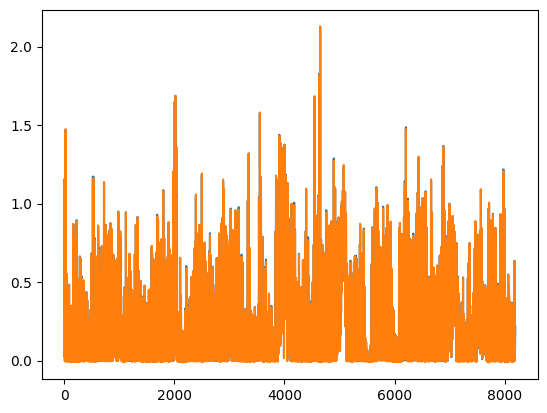

In [13]:
l2_he = np.array([  0.036,  0.031,  0.281,  0.174,  0.199,  0.549,  1.157,  0.401,  0.003,  0.002,  0.000, -0.001,  0.004,  0.005,  0.000, -0.005,  0.000,  0.376,  0.004,  0.000,  0.164,  0.505,  1.473,  1.259, -0.000,  0.004,  0.001,  0.282,  0.358,  0.134,  0.001,  0.000,  0.049,  0.296, -0.003,  0.000,  0.002,  0.425,  0.380,  0.548,  0.005, -0.001,  0.008,  0.554,  0.369,  0.260, -0.005,  0.009,  0.010,  0.006,  0.007,  0.002, -0.005,  0.005,  0.001, -0.002, -0.006,  0.004,  0.001,  0.218,  0.393,  0.204, -0.001, -0.002,  0.005, -0.004,  0.001, -0.002, -0.003,  0.152,  0.129,  0.138,  0.003, -0.002,  0.007,  0.222,  0.252, -0.002,  0.008, -0.002, -0.004, -0.005,  0.000,  0.005,  0.004,  0.251,  0.304,  0.482, -0.003,  0.001,  0.002,  0.000, -0.000,  0.006,  0.005,  0.003,  0.001, -0.002,  0.002, -0.003, -0.006, -0.004,  0.227,  0.004,  0.004,  0.004,  0.007, -0.001, -0.009,  0.008,  0.000, -0.001,  0.002, -0.005, -0.001,  0.004,  0.345,  0.003,  0.062,  0.218,  0.004,  0.000,  0.000, -0.001,  0.021,  0.003, -0.001, -0.001,  0.002,  0.009, -0.004,  0.003,  0.068, -0.008,  0.206,  0.351,  0.105, -0.007, -0.010, -0.003, -0.005, -0.001, -0.000,  0.001,  0.002,  0.002, -0.001, -0.007,  0.315,  0.068,  0.268,  0.004,  0.002,  0.003, -0.005, -0.005,  0.004,  0.007,  0.002,  0.003,  0.003,  0.007,  0.004,  0.104,  0.869,  0.152,  0.010, -0.006, -0.007,  0.003, -0.003,  0.004, -0.001,  0.001,  0.004, -0.003,  0.001, -0.002,  0.016,  0.340,  0.001,  0.001,  0.006, -0.004, -0.001, -0.001, -0.005,  0.003, -0.003, -0.001,  0.001,  0.003,  0.367,  0.007,  0.048, -0.008, -0.008,  0.002,  0.005,  0.001,  0.001, -0.005,  0.001, -0.000,  0.007, -0.001,  0.002, -0.000,  0.807,  0.566,  0.147,  0.001, -0.004,  0.000, -0.000,  0.005,  0.006,  0.001,  0.001,  0.002,  0.004, -0.001,  0.001,  0.000,  0.407,  0.888,  0.163, -0.005,  0.713,  0.613,  0.059,  0.005, -0.000, -0.001,  0.001, -0.006, -0.003,  0.002, -0.008, -0.002,  0.001,  0.120,  0.258, -0.006,  0.006,  0.191,  0.006, -0.007,  0.003,  0.002, -0.007, -0.001,  0.009, -0.004, -0.002, -0.004,  0.396,  0.157,  0.250,  0.320,  0.336,  0.518,  0.350,  0.002, -0.003, -0.002,  0.004,  0.368,  0.310,  0.083,  0.226,  0.210,  0.179, -0.003,  0.027, -0.007,  0.035,  0.312,  0.296, -0.000,  0.006, -0.001,  0.078,  0.606,  0.658,  0.303,  0.286,  0.338, -0.003,  0.002, -0.001, -0.005,  0.135,  0.191,  0.446,  0.000,  0.000,  0.055,  0.020,  0.554,  0.650,  0.346,  0.201,  0.217,  0.005, -0.004,  0.222,  0.262,  0.254,  0.003,  0.248,  0.097, -0.003, -0.002,  0.182,  0.527,  0.504,  0.289,  0.238,  0.152,  0.118, -0.003,  0.355,  0.220,  0.142,  0.001,  0.196,  0.212,  0.106,  0.014,  0.264,  0.327,  0.194,  0.244,  0.328,  0.133,  0.438,  0.181,  0.189,  0.037,  0.226,  0.208,  0.140,  0.017, -0.001, -0.005,  0.161,  0.154, -0.007,  0.169,  0.205,  0.099,  0.512,  0.233,  0.250,  0.151,  0.306,  0.153,  0.071,  0.115,  0.012, -0.004,  0.132,  0.131,  0.016,  0.145,  0.057,  0.145,  0.323,  0.054,  0.262,  0.282,  0.249,  0.037,  0.019,  0.000,  0.052,  0.005,  0.066,  0.357,  0.103,  0.036,  0.001,  0.180,  0.386,  0.049,  0.290,  0.279,  0.220,  0.063,  0.005,  0.004,  0.024, -0.001,  0.088,  0.193,  0.116,  0.083,  0.006,  0.051,  0.436,  0.305,  0.297,  0.183,  0.226,  0.279,  0.014,  0.001,  0.012,  0.017,  0.108,  0.020,  0.038,  0.048,  0.004,  0.001,  0.346,  0.381,  0.336,  0.241,  0.085,  0.196,  0.000,  0.002,  0.071,  0.014,  0.049,  0.008,  0.004,  0.001,  0.001,  0.003,  0.274,  0.202,  0.227,  0.084,  0.004,  0.039, -0.000,  0.013,  0.093,  0.075,  0.052,  0.011, -0.004,  0.008,  0.002,  0.002,  0.001, -0.004, -0.001, -0.003,  0.152,  0.008,  0.017,  0.044,  0.046,  0.078,  0.069,  0.022,  0.001,  0.029,  0.006, -0.008,  0.147, -0.007,  0.003,  0.001,  0.013,  0.028,  0.075,  0.065,  0.066,  0.092,  0.098,  0.052,  0.031,  0.065, -0.002, -0.001,  0.326,  0.003,  0.002, -0.000, -0.001,  0.003,  0.009,  0.110,  0.120,  0.117,  0.108,  0.089,  0.079,  0.134, -0.005,  0.023,  0.683,  0.340,  0.125,  0.169,  0.021,  0.001,  0.004, -0.000,  0.002, -0.004, -0.000,  0.005, -0.001,  0.000,  0.003, -0.003,  0.317,  0.151,  0.002, -0.006,  0.001, -0.006, -0.001,  0.650,  1.160,  1.010,  0.663,  0.442,  0.036,  0.115,  0.275,  0.401,  0.352, -0.002,  0.031, -0.002,  0.009, -0.002,  0.005,  0.384,  1.017,  1.160,  0.664,  0.140,  0.036,  0.013,  0.117,  0.392,  0.377,  0.265,  0.214,  0.020, -0.008, -0.004,  0.002, -0.001,  0.506,  0.770,  0.004, -0.002,  0.185,  0.249,  0.099,  0.248,  0.296,  0.258,  0.170,  0.059,  0.002,  0.002, -0.006,  0.006,  0.033,  0.000, -0.007, -0.001,  0.175,  0.214,  0.051,  0.207,  0.236,  0.141,  0.308,  0.357,  0.131, -0.003,  0.152,  0.427,  0.563,  0.319, -0.003, -0.001,  0.050,  0.386,  0.357,  0.264,  0.189,  0.294,  0.337,  0.196,  0.061, -0.006,  0.138,  0.606,  0.664,  0.660,  0.185,  0.004,  0.146,  0.578,  0.401,  0.199,  0.230,  0.377,  0.262,  0.305,  0.045,  0.000,  0.293,  0.861,  0.548,  0.642,  0.228,  0.144,  0.291,  0.580,  0.322,  0.147,  0.389,  0.377,  0.333,  0.292,  0.073, -0.000,  0.237,  0.702,  0.622,  0.694,  0.529,  0.283,  0.189,  0.456,  0.357,  0.254,  0.335,  0.363,  0.430,  0.234,  0.149,  0.004,  0.023,  0.480,  0.520,  0.569,  0.501,  0.298,  0.240,  0.459,  0.388,  0.253,  0.358,  0.364,  0.472,  0.215,  0.117, -0.001,  0.001,  0.311,  0.357,  0.496,  0.539,  0.411,  0.343,  0.433,  0.306,  0.180,  0.364,  0.410,  0.545,  0.191,  0.031, -0.002,  0.022,  0.407,  0.658,  0.729,  0.615,  0.468,  0.412,  0.437,  0.278,  0.145,  0.230,  0.260,  0.270, -0.003, -0.003,  0.036,  0.398,  0.515,  0.612,  0.637,  0.629,  0.565,  0.535,  0.536,  0.331,  0.154,  0.184,  0.206,  0.313,  0.002,  0.097,  0.235,  0.527,  0.579,  0.592,  0.612,  0.650,  0.672,  0.613,  0.580,  0.360,  0.154,  0.031,  0.262,  1.137,  0.769,  0.576,  0.557,  0.622,  0.672,  0.671,  0.721,  0.740,  0.705,  0.614,  0.570,  0.360,  0.136, -0.004,  0.128,  0.667,  0.465,  0.431,  0.386,  0.647,  0.810,  0.783,  0.768,  0.744,  0.681,  0.661,  0.604,  0.291,  0.021,  0.629,  0.683,  0.862,  0.504,  0.252,  0.160,  0.102,  0.429,  0.620,  0.683,  0.650,  0.623,  0.597,  0.580,  0.569,  0.230,  0.140,  0.136,  0.042,  0.179,  0.122,  0.088, -0.006,  0.399,  0.800,  0.742,  0.510,  0.453,  0.266,  0.349,  0.404,  0.417,  0.354,  0.142,  0.097,  0.530,  0.251,  0.282,  0.034,  0.023,  0.323,  0.442,  0.297,  0.466,  0.366,  0.163,  0.177,  0.363,  0.349,  0.015,  0.262,  0.402,  0.257,  0.207,  0.186,  0.145,  0.001,  0.004,  0.138,  0.261,  0.315,  0.078,  0.183,  0.461,  0.209,  0.003,  0.149,  0.554,  0.366,  0.163,  0.468,  0.830,  0.396,  0.041,  0.123,  0.359,  0.228,  0.004,  0.371,  0.610,  0.100, -0.006,  0.185,  0.281,  0.164,  0.032,  0.522,  0.873,  0.711,  0.591,  0.507,  0.442,  0.010, -0.000,  0.529,  0.535,  0.298,  0.190,  0.073,  0.288,  0.284,  0.303,  0.073,  0.376,  0.535,  0.841,  0.521,  0.425, -0.001,  0.178,  0.644,  0.472,  0.629,  0.082,  0.083,  0.365,  0.368,  0.406,  0.263,  0.305,  0.461,  0.310,  0.305,  0.617,  0.215,  0.279,  0.507,  0.479,  0.549, -0.001,  0.273,  0.406,  0.212,  0.313,  0.257,  0.504,  0.557,  0.416,  0.222,  0.676,  0.164,  0.018,  0.444,  0.573,  0.264,  0.049,  0.387,  0.306,  0.109,  0.213,  0.384,  0.321,  0.311,  0.320,  0.306,  0.548,  0.142,  0.073,  0.542,  0.493,  0.318,  0.169,  0.524,  0.256,  0.097,  0.522,  0.567,  0.043,  0.082,  0.192,  0.432,  0.536,  0.261,  0.266,  0.531,  0.435,  0.248,  0.177,  0.637,  0.154,  0.031,  0.551,  0.606,  0.363,  0.341,  0.479,  0.633,  0.563,  0.367,  0.403,  0.562,  0.459,  0.145,  0.158,  0.559,  0.000, -0.002,  0.386,  0.608,  0.492,  0.490,  0.565,  0.576,  0.492,  0.380,  0.442,  0.565,  0.463,  0.003,  0.052,  0.159,  0.002,  0.302,  0.652,  0.550,  0.485,  0.511,  0.479,  0.488,  0.552,  0.438,  0.459,  0.560,  0.438,  0.040, -0.001, -0.001,  0.202,  0.751,  0.948,  0.744,  0.549,  0.489,  0.484,  0.559,  0.581,  0.503,  0.534,  0.581,  0.409,  0.148,  0.298,  0.163,  0.135,  0.127,  0.495,  0.731,  0.666,  0.657,  0.620,  0.599,  0.636,  0.594,  0.628,  0.615,  0.398,  0.699,  0.608,  0.434,  0.322,  0.077,  0.033,  0.422,  0.800,  0.824,  0.771,  0.736,  0.787,  0.762,  0.768,  0.726,  0.589,  0.494,  0.243,  0.057,  0.436,  0.337,  0.019,  0.113,  0.196,  0.416,  0.191,  0.056,  0.217,  0.074,  0.035,  0.088,  0.032,  0.212,  0.139, -0.001,  0.099,  0.064, -0.001, -0.001, -0.005, -0.007,  0.001,  0.119,  0.222,  0.185,  0.021,  0.002,  0.104,  0.116,  0.113,  0.013,  0.090, -0.003,  0.001,  0.002, -0.000, -0.002,  0.035,  0.275,  0.252,  0.089,  0.003, -0.001,  0.014, -0.000,  0.104,  0.003, -0.000, -0.009,  0.002, -0.001, -0.003, -0.007,  0.204,  0.293,  0.105, -0.011,  0.006, -0.004,  0.001,  0.072,  0.463, -0.004, -0.001,  0.001,  0.007,  0.119,  0.062, -0.003, -0.005,  0.110,  0.071, -0.007, -0.005, -0.007,  0.072,  0.467,  0.334, -0.002,  0.042,  0.052,  0.019,  0.339,  0.198, -0.005,  0.000,  0.200,  0.055,  0.019,  0.113,  0.001,  0.170,  0.942,  0.203,  0.003,  0.155,  0.053,  0.055,  0.198,  0.202, -0.002,  0.043,  0.265,  0.127,  0.027,  0.208,  0.052,  0.240,  0.529, -0.003, -0.001,  0.210,  0.003, -0.003,  0.087,  0.241,  0.078,  0.205,  0.343,  0.262,  0.073,  0.156,  0.091,  0.238,  0.318, -0.001,  0.043,  0.194,  0.096, -0.004,  0.063,  0.255,  0.164,  0.141,  0.281,  0.126,  0.086,  0.134,  0.285,  0.337,  0.297,  0.069,  0.273,  0.335,  0.145,  0.004,  0.011,  0.006,  0.019,  0.171,  0.307,  0.118,  0.101,  0.137,  0.246,  0.381,  0.253,  0.205,  0.679,  0.475,  0.101,  0.004,  0.005,  0.005,  0.091,  0.152,  0.311,  0.155,  0.100,  0.149,  0.230,  0.432,  0.120,  0.079,  0.570,  0.270,  0.120,  0.045,  0.050,  0.005,  0.065,  0.110,  0.259,  0.150,  0.044,  0.127,  0.232,  0.451, -0.003,  0.013,  0.147,  0.020,  0.219,  0.340,  0.313,  0.252,  0.289,  0.294,  0.309,  0.216,  0.072,  0.164,  0.279,  0.450, -0.007, -0.003,  0.007, -0.006,  0.092,  0.339,  0.379,  0.299,  0.280,  0.283,  0.292,  0.235,  0.148,  0.181,  0.271,  0.416, -0.004, -0.003, -0.003,  0.007,  0.160,  0.221,  0.250,  0.348,  0.317,  0.279,  0.305,  0.261,  0.200,  0.228,  0.209,  0.416,  0.090,  0.127,  0.058,  0.073,  0.141,  0.153,  0.154,  0.126,  0.090,  0.075,  0.075,  0.084,  0.071,  0.060,  0.127,  0.265,  0.630,  0.564,  0.679,  0.436,  0.384,  0.324,  0.307, -0.009,  0.002,  0.225,  0.303,  0.393,  0.568,  0.417,  0.340,  0.374,  0.443,  0.006,  0.246,  0.331,  0.866,  0.249,  0.196, -0.000,  0.002,  0.110,  0.139,  0.255,  0.509,  0.414,  0.287,  0.284,  0.195, -0.004,  0.102,  0.452,  0.812,  0.219,  0.067, -0.002,  0.000,  0.006, -0.001,  0.113,  0.316,  0.252,  0.103,  0.270,  0.342,  0.179,  0.720,  0.911,  0.399,  0.014,  0.091,  0.058,  0.177,  0.166,  0.294,  0.332,  0.082,  0.113,  0.010,  0.401,  0.571,  0.269,  0.432,  0.554,  0.410,  0.390,  0.494,  0.420,  0.423,  0.492,  0.268,  0.089, -0.003,  0.000,  0.178,  0.459,  0.391,  0.168,  0.216,  0.284,  0.331,  0.238,  0.303,  0.366,  0.219,  0.282,  0.270,  0.003, -0.001, -0.001,  0.279,  0.506,  0.165,  0.067,  0.106,  0.223,  0.190,  0.042,  0.027,  0.165,  0.130,  0.174,  0.235,  0.004, -0.007,  0.003,  0.225,  0.508,  0.259,  0.237,  0.091,  0.223,  0.128,  0.038,  0.022,  0.058,  0.039, -0.002, -0.001,  0.005, -0.001, -0.001,  0.163,  0.402,  0.291,  0.043,  0.151,  0.255,  0.188,  0.092,  0.124,  0.162,  0.058,  0.000, -0.009,  0.000,  0.003, -0.003,  0.049,  0.339,  0.001,  0.001,  0.211,  0.134,  0.032,  0.115,  0.103,  0.196,  0.129,  0.007, -0.007,  0.005, -0.006, -0.002,  0.110,  0.326, -0.001,  0.079,  0.338,  0.073,  0.019,  0.142,  0.035,  0.171,  0.021, -0.003,  0.029,  0.004,  0.002, -0.004,  0.111,  0.294,  0.075,  0.093,  0.477,  0.145, -0.000,  0.053,  0.192,  0.219,  0.097,  0.084,  0.090,  0.019,  0.001,  0.002,  0.126,  0.328,  0.200,  0.006,  0.371, -0.002, -0.009,  0.049,  0.093,  0.016,  0.010,  0.040,  0.085,  0.012, -0.002,  0.002,  0.142,  0.360,  0.011, -0.000,  0.137,  0.002, -0.003,  0.006,  0.001, -0.003, -0.011, -0.004, -0.000, -0.001, -0.003, -0.005,  0.130,  0.322, -0.004, -0.001,  0.072,  0.006,  0.034, -0.005,  0.005,  0.005,  0.002,  0.004, -0.002,  0.002, -0.008, -0.005,  0.035,  0.083,  0.227,  0.015,  0.090,  0.259,  0.368,  0.173,  0.001,  0.026,  0.034,  0.016,  0.083,  0.098,  0.063,  0.156,  0.163,  0.236,  0.214,  0.451,  0.023, -0.001,  0.001, -0.005,  0.005, -0.006,  0.020, -0.006,  0.001, -0.006, -0.008, -0.004, -0.003,  0.011, -0.005,  0.387,  0.003, -0.000, -0.003, -0.001, -0.001, -0.003,  0.003, -0.006,  0.004,  0.006,  0.070,  0.003, -0.004,  0.046,  0.006,  0.024,  0.102, -0.003,  0.460,  0.003,  0.004,  0.003,  0.022,  0.002,  0.002,  0.077,  0.239,  0.000, -0.003, -0.003,  0.002,  0.009, -0.005,  0.063,  0.731, -0.002,  0.003,  0.001,  0.006, -0.001,  0.391,  0.677,  0.174, -0.003, -0.003,  0.248,  0.003, -0.008,  0.002, -0.001,  0.552,  0.080, -0.001, -0.004, -0.004,  0.010,  0.373,  0.603,  0.087, -0.005, -0.003,  0.535,  0.003,  0.012,  0.003, -0.002,  0.055,  0.003,  0.026,  0.002,  0.002,  0.005,  0.002,  0.126, -0.008,  0.007, -0.000,  0.643,  0.001,  0.382, -0.002, -0.001, -0.007, -0.002,  0.149,  0.066, -0.000, -0.007,  0.000,  0.116,  0.006,  0.002,  0.003,  0.638,  0.004,  0.049,  0.005,  0.003,  0.038,  0.001,  0.025,  0.005,  0.001,  0.001, -0.002, -0.009, -0.001,  0.011, -0.001,  0.556,  0.002, -0.004, -0.001,  0.002, -0.005, -0.001,  0.354,  0.284,  0.001,  0.005,  0.114,  0.099, -0.009,  0.039, -0.003,  0.693,  0.001,  0.003,  0.006,  0.139,  0.003, -0.006,  0.513,  0.918, -0.001,  0.000,  0.005,  0.270,  0.003,  0.131, -0.004,  0.776,  0.033,  0.054,  0.031,  0.071,  0.003,  0.002,  0.285,  0.894,  0.253,  0.005, -0.002,  0.331,  0.021,  0.068,  0.003,  0.739,  0.010,  0.001, -0.004, -0.004, -0.001, -0.002,  0.017,  0.391,  0.336,  0.138,  0.138,  0.281,  0.089,  0.045, -0.000,  0.734, -0.005,  0.004,  0.000, -0.002,  0.002, -0.001, -0.002,  0.143,  0.086,  0.076,  0.134,  0.197,  0.175,  0.023, -0.003,  0.751, -0.005,  0.001, -0.004, -0.001,  0.004, -0.001,  0.001, -0.004, -0.000, -0.004,  0.009,  0.073,  0.072, -0.001, -0.002,  0.772, -0.006,  0.002, -0.006,  0.079, -0.003, -0.007,  0.004,  0.002, -0.005,  0.001,  0.004, -0.004,  0.001, -0.001,  0.001,  0.705,  0.005,  0.105,  0.308,  0.162,  0.336,  0.000,  0.006,  0.003, -0.002, -0.002, -0.002, -0.008,  0.005, -0.002, -0.005,  0.284,  0.423, -0.001, -0.002,  0.294,  0.693,  0.605,  1.084,  0.975,  0.392,  0.424,  0.328,  0.404,  0.581,  0.512,  0.322,  0.404,  0.004, -0.006,  0.007,  0.317,  0.530,  0.392,  0.758,  0.780,  0.153, -0.004,  0.130,  0.183,  0.156,  0.009,  0.004,  0.003, -0.003,  0.004,  0.347,  0.379, -0.001, -0.002,  0.443,  0.538,  0.160, -0.000,  0.010,  0.104,  0.009,  0.003, -0.000,  0.196,  0.013,  0.267,  0.282,  0.052, -0.005,  0.007,  0.350,  0.377,  0.065,  0.148,  0.567,  0.427, -0.002,  0.060,  0.173,  0.333,  0.074,  0.185,  0.036, -0.003, -0.002,  0.017,  0.103,  0.644,  0.259,  0.307,  0.646,  0.375,  0.000,  0.074,  0.168,  0.415,  0.002,  0.006, -0.001, -0.004,  0.029,  0.013,  0.467,  0.648,  0.096,  0.179,  0.664,  0.521,  0.006,  0.056,  0.032,  0.333,  0.001, -0.002,  0.010,  0.005, -0.005, -0.001,  0.434,  0.883,  0.326, -0.006, -0.002,  0.180, -0.001,  0.005,  0.009,  0.306,  0.000, -0.006,  0.057, -0.007,  0.001,  0.007,  0.281,  0.712,  0.458,  0.105, -0.000,  0.010, -0.001,  0.004,  0.024,  0.439,  0.007, -0.002,  0.060, -0.001, -0.003,  0.074,  0.249,  0.510,  0.405,  0.172,  0.118,  0.176,  0.000,  0.012,  0.078,  0.612,  0.000,  0.005,  0.057,  0.006, -0.004,  0.142,  0.332,  0.237,  0.022,  0.000,  0.183,  0.399,  0.029,  0.005,  0.278,  0.664,  0.009,  0.003,  0.129,  0.061,  0.001,  0.094,  0.355,  0.435,  0.235,  0.020,  0.214,  0.478,  0.070,  0.027,  0.244,  0.664,  0.404,  0.065,  0.041, -0.002,  0.034,  0.064,  0.212,  0.350,  0.309,  0.235,  0.231,  0.445,  0.169,  0.021,  0.254,  0.686,  0.837,  1.207,  0.627,  0.003,  0.138,  0.074,  0.175,  0.273,  0.303,  0.287,  0.284,  0.410,  0.161,  0.008,  0.286,  0.682,  0.929,  1.527,  1.647,  0.742,  0.476,  0.311,  0.312,  0.348,  0.400,  0.380,  0.382,  0.455,  0.213,  0.043,  0.367,  0.661,  0.875,  1.229,  1.687,  1.116,  0.818,  0.568,  0.260,  0.177,  0.247,  0.265,  0.243,  0.319,  0.179,  0.098,  0.323,  0.682,  0.512,  1.064,  1.358,  0.867,  0.749,  0.635,  0.444,  0.477,  0.695,  0.742,  0.673,  0.715,  0.692,  0.608,  0.880,  1.055,  0.002,  0.069,  0.002,  0.004, -0.001,  0.003, -0.001,  0.083,  0.004,  0.001, -0.004, -0.003,  0.004, -0.001,  0.004, -0.003,  0.002,  0.004,  0.008,  0.061,  0.307,  0.001, -0.006,  0.006,  0.000,  0.003, -0.002, -0.009,  0.003,  0.020, -0.003, -0.002,  0.000,  0.003,  0.005,  0.094,  0.246,  0.002,  0.003,  0.036,  0.207,  0.082, -0.007,  0.005, -0.009,  0.008,  0.001,  0.002, -0.000,  0.001,  0.161,  0.298,  0.064,  0.002, -0.003,  0.324,  0.656,  0.492,  0.141, -0.001, -0.007, -0.001, -0.004,  0.117,  0.003,  0.008,  0.026,  0.020, -0.002, -0.000,  0.003,  0.237,  0.417,  0.302, -0.000, -0.003, -0.001, -0.002,  0.001,  0.029, -0.012,  0.008,  0.005, -0.001,  0.006,  0.000, -0.006,  0.075, -0.000, -0.003, -0.001,  0.002,  0.007,  0.003,  0.003,  0.002, -0.001,  0.002, -0.004,  0.001,  0.005,  0.003,  0.025,  0.191,  0.001, -0.003, -0.001,  0.003,  0.002, -0.001,  0.003, -0.011, -0.001, -0.000, -0.001, -0.007,  0.003, -0.007, -0.000,  0.072,  0.001,  0.111,  0.144, -0.004, -0.001, -0.001, -0.006, -0.002, -0.007, -0.000, -0.003, -0.002,  0.009,  0.001,  0.001,  0.004,  0.089,  0.117,  0.066,  0.002,  0.004, -0.008,  0.004,  0.001,  0.033,  0.007,  0.003, -0.003, -0.002,  0.001, -0.006,  0.073,  0.321,  0.230,  0.086, -0.004,  0.003,  0.001,  0.005, -0.004,  0.049, -0.007, -0.001,  0.002, -0.009, -0.001,  0.059,  0.449,  0.589,  0.347,  0.140, -0.003,  0.004,  0.003,  0.005, -0.002,  0.025,  0.004, -0.004,  0.002,  0.001,  0.006,  0.183,  0.339,  0.307,  0.149,  0.036,  0.005, -0.002,  0.001, -0.002, -0.005,  0.004,  0.004, -0.000, -0.004,  0.008,  0.291,  0.171,  0.127,  0.104,  0.079,  0.057,  0.079,  0.005, -0.002,  0.002,  0.007,  0.002, -0.003, -0.004,  0.007,  0.146,  0.333,  0.337,  0.284,  0.244,  0.224,  0.176,  0.180,  0.148,  0.054,  0.001,  0.002, -0.004,  0.001,  0.003,  0.006,  0.001,  0.032,  0.261,  0.393,  0.377,  0.322,  0.309,  0.320,  0.267,  0.172, -0.005,  0.003, -0.002, -0.003, -0.004,  0.004,  0.001,  0.293,  0.387,  0.405,  0.366,  0.332,  0.338,  0.347,  0.316,  0.250,  0.062, -0.003,  0.003,  0.299,  0.530,  0.404,  0.204,  0.064,  0.016,  0.036,  0.428,  0.008,  0.001,  0.001, -0.001, -0.003, -0.004, -0.001,  0.025,  0.205,  0.097,  0.156,  0.209,  0.126,  0.307,  0.085,  0.110,  0.158,  0.159,  0.005,  0.006,  0.351,  0.004,  0.001, -0.003, -0.001,  0.001, -0.001,  0.054,  0.392,  0.570,  0.435,  0.258,  0.076,  0.018,  0.212,  0.450,  0.427,  0.025,  0.046, -0.002, -0.004, -0.004,  0.011,  0.108,  0.277,  0.309,  0.091,  0.101,  0.092, -0.002,  0.077,  0.714,  0.375,  0.122, -0.002,  0.005, -0.006,  0.036,  0.008,  0.165,  0.181,  0.352,  0.406,  0.189,  0.168, -0.003,  0.007,  0.754,  0.494,  0.078, -0.001, -0.004,  0.091,  0.052,  0.005, -0.002,  0.003,  0.985,  1.059,  0.520,  0.189,  0.001,  0.006,  0.387,  0.283,  0.051,  0.006,  0.099,  0.206,  0.009,  0.070,  0.002, -0.004,  0.309,  0.812,  0.264,  0.181,  0.000, -0.001,  0.283,  0.088,  0.034, -0.000,  0.045,  0.051,  0.008,  0.045, -0.004, -0.004, -0.005,  0.175,  0.039,  0.235,  0.207,  0.165,  0.256,  0.022,  0.015, -0.001,  0.001,  0.084,  0.001,  0.006,  0.001, -0.002,  0.001,  0.318,  0.171,  0.006, -0.001,  0.037,  0.222,  0.135,  0.025,  0.003,  0.064,  0.214,  0.005, -0.001,  0.004,  0.137, -0.000,  0.864,  0.763, -0.001,  0.001, -0.004,  0.140,  0.094,  0.003,  0.000,  0.003,  0.256,  0.009,  0.099,  0.013,  0.100,  0.000,  0.299,  0.473,  0.070, -0.001, -0.000,  0.059,  0.055,  0.002,  0.002, -0.000,  0.021,  0.132,  0.805,  0.409,  0.071, -0.007, -0.003,  0.003, -0.002, -0.001,  0.003,  0.096,  0.086,  0.003,  0.003,  0.001, -0.000,  0.473,  1.193,  0.482,  0.216, -0.001,  0.004,  0.005,  0.004, -0.010,  0.012,  0.105,  0.091,  0.001,  0.002,  0.001,  0.048,  0.037,  0.140,  0.138,  0.087, -0.005, -0.003,  0.001,  0.001, -0.001,  0.003,  0.021,  0.054,  0.033,  0.009,  0.006,  0.004, -0.006,  0.007,  0.005,  0.000,  0.023,  0.095,  0.112,  0.139,  0.173,  0.207,  0.263,  0.278,  0.044,  0.004,  0.025, -0.001,  0.046,  0.176,  0.753,  0.265,  0.032, -0.004,  0.005,  0.002,  0.003,  0.004, -0.003, -0.000,  0.002,  0.001,  0.004, -0.000,  0.290,  0.367,  0.635,  0.324,  0.001, -0.003,  0.332,  0.335,  0.315,  0.419,  0.153,  0.132,  0.304,  0.361, -0.004,  0.147,  0.284,  0.399,  0.534,  0.382,  0.286,  0.001, -0.004,  0.253,  0.507,  0.558,  0.456,  0.159,  0.252,  0.112,  0.192,  0.298, -0.003, -0.004,  0.133,  0.320,  0.481,  0.003, -0.001, -0.001,  0.159,  0.293,  0.341,  0.349,  0.195,  0.017,  0.511,  0.384,  0.006, -0.000,  0.244,  0.310,  0.479,  0.232,  0.004,  0.008, -0.003,  0.005,  0.300,  0.308,  0.152,  0.029,  0.341,  0.195,  0.082,  0.072,  0.178,  0.275,  0.685,  0.431,  0.073,  0.104,  0.017,  0.000,  0.235,  0.121,  0.151,  0.045,  0.140,  0.079,  0.160,  0.035,  0.115,  0.096,  0.800,  0.797,  0.374,  0.422,  0.461,  0.247,  0.162,  0.137,  0.145,  0.005,  0.043,  0.009,  0.085,  0.153,  0.212,  0.073,  0.670,  0.649,  0.290,  0.387,  0.428,  0.234,  0.176,  0.095,  0.081,  0.017,  0.187, -0.003,  0.058,  0.277,  0.209,  0.077,  0.392,  0.392,  0.256,  0.284,  0.178,  0.266,  0.082,  0.047,  0.148,  0.069,  0.288,  0.037,  0.051,  0.308,  0.157,  0.060,  0.337,  0.597,  0.517,  0.206,  0.133,  0.227,  0.107,  0.086,  0.164,  0.070,  0.318,  0.007,  0.063,  0.243,  0.009,  0.032,  0.049,  0.336,  0.429,  0.183,  0.134,  0.170,  0.158,  0.056,  0.077,  0.028,  0.213,  0.054,  0.088,  0.233,  0.047,  0.069, -0.000,  0.005,  0.124,  0.081,  0.061,  0.162,  0.193,  0.061,  0.035,  0.028,  0.219,  0.114,  0.024,  0.353,  0.061,  0.029,  0.004,  0.001,  0.006,  0.064,  0.071,  0.207,  0.231,  0.102,  0.033,  0.029,  0.293,  0.484,  0.300,  0.373,  0.048,  0.004,  0.046,  0.126,  0.135,  0.124,  0.135,  0.209,  0.222,  0.121,  0.021,  0.015,  0.260,  0.544,  0.651,  0.222,  0.049,  0.007,  0.111,  0.166,  0.180,  0.177,  0.155,  0.164,  0.198,  0.119,  0.025, -0.000,  0.306,  0.368,  0.653,  0.372,  0.241,  0.002,  0.012,  0.134,  0.171,  0.177,  0.155,  0.169,  0.177,  0.106,  0.085,  0.021,  0.531,  0.400,  0.476,  0.458,  0.630,  0.303,  0.018, -0.001,  0.021,  0.051,  0.044,  0.047,  0.066,  0.022, -0.007,  0.029,  0.128, -0.004,  0.651,  0.812,  0.219,  0.259,  0.253,  0.247,  0.233,  0.119,  0.130,  0.063,  0.093,  0.116,  0.344,  0.135,  0.004,  0.007,  0.736,  0.403,  0.160,  0.052,  0.001,  0.006, -0.004,  0.002,  0.003,  0.005, -0.004,  0.003, -0.005, -0.000,  0.149, -0.008,  0.872,  0.150,  0.204,  0.222,  0.294,  0.210, -0.000,  0.005,  0.006, -0.002,  0.100,  0.265,  0.170,  0.237,  0.739,  0.413,  0.485,  0.093,  0.256,  0.572,  0.909,  0.416,  0.004,  0.006, -0.000,  0.022,  0.208,  0.882,  0.740,  0.521,  0.714,  0.112,  0.171,  0.190,  0.303,  1.154,  1.023,  0.590,  0.217,  0.022,  0.059,  0.006,  0.252,  0.947,  0.899,  0.369,  0.372, -0.004,  0.203,  0.182,  0.398,  1.093,  0.707,  0.454,  0.225,  0.420,  0.017,  0.006,  0.363,  0.690,  0.612,  0.132, -0.003, -0.005,  0.476,  0.311,  0.380,  0.855,  0.526,  0.368,  0.160,  0.350,  0.012,  0.000,  0.329,  0.441,  0.413,  0.184,  0.003,  0.023,  0.618,  0.377,  0.254,  0.856,  0.656,  0.407,  0.239,  0.004, -0.004,  0.094,  0.325,  0.359,  0.473,  0.316,  0.002,  0.043,  0.576,  0.341,  0.260,  0.797,  0.670,  0.312,  0.167,  0.001,  0.098,  0.277,  0.378,  0.442,  0.469,  0.189, -0.007,  0.034,  0.489,  0.221,  0.463,  0.742,  0.608,  0.394,  0.199,  0.166,  0.226,  0.287,  0.336,  0.482,  0.445,  0.146,  0.103,  0.149,  0.201, -0.002,  0.355,  0.690,  0.614,  0.277,  0.287,  0.188,  0.269,  0.267,  0.264,  0.461,  0.514,  0.150,  0.322,  0.293,  0.089,  0.045,  0.274,  0.671,  0.502,  0.361,  0.321,  0.236,  0.203,  0.274,  0.249,  0.440,  0.441,  0.135,  0.772,  0.387,  0.036,  0.166,  0.861,  0.764,  0.407,  0.323,  0.260,  0.143,  0.223,  0.241,  0.134,  0.351,  0.322,  0.069,  0.962,  0.305,  0.071,  0.240,  0.555,  0.404,  0.306,  0.230,  0.202,  0.187,  0.220,  0.225,  0.183,  0.367,  0.281,  0.035,  0.649,  0.000,  0.003,  0.003, -0.003, -0.003,  0.147,  0.141,  0.125,  0.118,  0.103,  0.111,  0.137,  0.174,  0.060,  0.001,  0.831,  0.208,  0.022, -0.003,  0.012,  0.006,  0.132,  0.377,  0.270,  0.215,  0.222,  0.251,  0.267,  0.311,  0.351,  0.032,  0.477,  0.800,  0.673, -0.001, -0.001,  0.279,  0.014,  0.287,  0.315,  0.026, -0.001,  0.000, -0.002, -0.001, -0.002,  0.091,  0.524,  0.662,  0.218,  0.057,  0.308,  0.337,  0.006,  0.132,  0.163,  0.115,  0.144,  0.072,  0.361,  0.029,  0.005,  0.000,  0.205,  0.238,  0.065,  0.282,  0.956,  0.935,  0.137,  0.023,  0.123,  0.106,  0.166,  0.397,  0.507,  0.147,  0.001,  0.007, -0.002, -0.002,  0.451,  0.255,  0.523,  0.438,  0.002,  0.166,  0.545,  0.570,  0.403,  0.647,  0.501,  0.008,  0.000,  0.125,  0.027,  0.012,  0.828,  0.219,  0.280,  0.012,  0.115, -0.001, -0.002,  0.127,  0.165,  0.289,  0.342,  0.001,  0.144,  0.101,  0.198,  0.751,  0.664,  0.018,  0.495,  0.141,  0.157, -0.002, -0.002,  0.004, -0.004,  0.004,  0.135,  0.005,  0.075,  0.062,  0.471,  0.961,  0.457,  0.003,  0.520,  0.267,  0.044,  0.004,  0.001, -0.002,  0.001,  0.393,  0.347, -0.005, -0.006,  0.188,  0.133,  0.635,  0.191,  0.092,  0.468,  0.137,  0.011, -0.001,  0.001, -0.000,  0.283,  0.651,  0.349, -0.001, -0.001,  0.199,  0.064,  0.470,  0.037,  0.118,  0.333,  0.072, -0.006, -0.005, -0.002, -0.002,  0.113,  0.483,  0.424,  0.045,  0.051,  0.131,  0.329,  0.384, -0.006,  0.190,  0.663,  0.558,  0.194,  0.018, -0.000,  0.003,  0.045,  0.303,  0.351,  0.211,  0.146,  0.181,  0.212,  0.156,  0.103,  0.236,  0.626,  0.453,  0.342,  0.298,  0.211,  0.101,  0.051,  0.186,  0.229,  0.102,  0.131,  0.262, -0.007,  0.010,  0.116,  0.293,  0.162,  0.025,  0.100,  0.139,  0.068,  0.036,  0.008,  0.179,  0.250,  0.086,  0.076,  0.243, -0.004,  0.010,  0.142,  0.200,  0.005,  0.004,  0.028,  0.016, -0.007,  0.002,  0.028,  0.239,  0.276,  0.106,  0.176,  0.266, -0.000,  0.021,  0.000,  0.032, -0.002, -0.004,  0.102,  0.039,  0.005,  0.006,  0.061,  0.149,  0.211,  0.080,  0.248,  0.330, -0.003,  0.007,  0.002, -0.004,  0.002,  0.003,  0.004, -0.006, -0.004,  0.003,  0.002,  0.000,  0.000,  0.004,  0.049,  0.148,  0.006,  0.002,  0.020,  0.028,  0.060, -0.002,  0.001, -0.002,  0.002,  0.001, -0.007,  0.004,  0.003, -0.004,  0.008, -0.003, -0.008,  0.003,  0.081,  0.248,  0.549,  0.398,  1.019,  0.478,  0.109,  0.326,  0.472,  0.512,  0.520,  0.573,  0.213,  0.334, -0.003, -0.003,  0.001, -0.002,  0.005,  0.112,  0.922,  1.319,  0.467,  0.015,  0.053,  0.009, -0.000,  0.216,  0.157,  0.034,  0.001,  0.078,  0.346,  0.316, -0.001,  0.002,  0.121,  0.716,  0.546,  0.102, -0.012,  0.001, -0.001,  0.011,  0.035,  0.141,  0.176,  0.114,  0.229,  0.324,  0.001, -0.008,  0.003,  0.184,  0.312,  0.257,  0.134,  0.003, -0.008,  0.021, -0.001,  0.166,  0.091,  0.130,  0.003,  0.030,  0.012,  0.007,  0.060,  0.095,  0.170,  0.301,  0.228,  0.005,  0.003,  0.038, -0.000, -0.000,  0.002,  0.002, -0.002,  0.033,  0.011, -0.001,  0.188,  0.201,  0.041,  0.088,  0.170,  0.074,  0.005,  0.074,  0.003, -0.003,  0.164,  0.042, -0.003,  0.003,  0.005,  0.002,  0.257,  0.184,  0.227, -0.006,  0.001,  0.007,  0.067,  0.070,  0.011, -0.002,  0.286,  0.082,  0.010,  0.003,  0.002, -0.008,  0.220,  0.185,  0.026,  0.052,  0.001, -0.005, -0.002,  0.027, -0.005,  0.004,  0.266,  0.068,  0.042, -0.002, -0.008,  0.047,  0.343,  0.310,  0.337,  0.049,  0.007, -0.000,  0.000,  0.039, -0.000,  0.004,  0.066,  0.007, -0.002,  0.003,  0.000,  0.006,  0.277,  0.210,  0.277,  0.102,  0.029,  0.021,  0.038,  0.045, -0.002,  0.009,  0.001,  0.016,  0.034,  0.019,  0.059,  0.022,  0.162,  0.136,  0.172,  0.154,  0.061,  0.025,  0.073,  0.044,  0.001,  0.020,  0.001,  0.005,  0.026, -0.001,  0.029,  0.169,  0.178,  0.149,  0.158,  0.097,  0.044,  0.034,  0.072,  0.047,  0.001,  0.018,  0.360,  0.054,  0.079,  0.009,  0.001,  0.223,  0.119,  0.088,  0.104,  0.092,  0.066,  0.074,  0.095,  0.062, -0.002,  0.031,  0.823,  1.034,  0.686,  0.148, -0.000,  0.011,  0.096,  0.127,  0.129,  0.110,  0.099,  0.102,  0.112,  0.098,  0.008,  0.058,  1.041,  1.581,  1.220,  1.194,  1.000,  0.464,  0.113,  0.188,  0.175,  0.179,  0.169,  0.172,  0.169,  0.129,  0.051,  0.065,  0.446,  0.887,  1.016,  0.712,  1.021,  1.167,  0.528,  0.170,  0.147,  0.135,  0.133,  0.126,  0.126,  0.098,  0.040,  0.065,  0.020,  0.004,  0.100,  0.721,  0.474,  0.003, -0.002,  0.071,  0.210,  0.154,  0.000,  0.017, -0.001,  0.002, -0.004,  0.005,  0.001, -0.000,  0.324,  0.790,  0.637,  0.002, -0.000,  0.006, -0.000,  0.164,  0.221, -0.002,  0.001, -0.003, -0.004, -0.009,  0.063,  0.176,  0.031,  0.000, -0.003,  0.175, -0.002,  0.000,  0.004,  0.124,  0.194,  0.013, -0.006,  0.105, -0.001,  0.001,  0.110,  0.439,  0.144, -0.008, -0.005,  0.161, -0.002,  0.005,  0.001,  0.001,  0.158,  0.130,  0.150,  0.124, -0.000,  0.004,  0.587,  0.475,  0.105,  0.003,  0.001,  0.255,  0.229, -0.003,  0.003,  0.001,  0.008,  0.125,  0.349,  0.100,  0.032,  0.040,  0.632,  0.464,  0.230,  0.132, -0.002,  0.140,  0.257,  0.169,  0.017,  0.051,  0.055,  0.035,  0.216,  0.002,  0.079,  0.072,  0.002,  0.135,  0.191,  0.004, -0.005,  0.003, -0.006,  0.200,  0.063,  0.012,  0.309,  0.138,  0.134, -0.001,  0.017,  0.026, -0.003,  0.069,  0.132, -0.006, -0.006, -0.002,  0.005,  0.069,  0.055,  0.001,  0.055,  0.099,  0.073,  0.004, -0.004,  0.016, -0.002,  0.079,  0.047,  0.001, -0.001, -0.000,  0.079,  0.427,  0.079,  0.002, -0.001,  0.103,  0.032,  0.005,  0.002,  0.008,  0.001,  0.009,  0.042,  0.004, -0.010, -0.000,  0.271,  0.294,  0.244,  0.001, -0.003,  0.042,  0.080, -0.005, -0.001,  0.013, -0.003,  0.130,  0.194,  0.015,  0.001,  0.025,  0.146,  0.113,  0.209,  0.001,  0.004,  0.031,  0.089,  0.011,  0.028,  0.022,  0.000,  0.293,  0.341,  0.001,  0.006, -0.001,  0.002,  0.002,  0.012,  0.008,  0.015,  0.062,  0.071,  0.000,  0.044,  0.047,  0.040,  0.221,  0.156,  0.138,  0.139, -0.001, -0.003,  0.008,  0.004,  0.009,  0.021,  0.070,  0.038, -0.005,  0.070,  0.058, -0.003,  0.085, -0.004,  0.123,  0.129,  0.085,  0.037,  0.004,  0.012,  0.020,  0.037,  0.067,  0.034,  0.003,  0.113,  0.056,  0.002, -0.006,  0.005,  0.119,  0.147,  0.066,  0.015,  0.001,  0.040,  0.040,  0.048,  0.081,  0.048, -0.005,  0.156,  0.038,  0.141,  0.005,  0.222,  0.203,  0.192, -0.004, -0.001,  0.002, -0.001, -0.006,  0.002,  0.006, -0.003, -0.003,  0.035,  0.023,  0.817,  0.798,  0.600,  0.135,  0.470,  0.746,  0.700,  1.180,  1.018,  0.923,  0.568,  0.398,  0.430,  0.893,  0.632,  0.523,  0.828,  0.526,  0.245, -0.004,  0.066,  0.946,  0.439,  0.461,  0.728,  0.650,  0.308,  0.286,  0.439,  0.918,  0.984,  0.755,  0.704,  0.180, -0.001,  0.191,  0.757,  1.079,  0.743,  0.038, -0.008,  0.003,  0.167,  0.644,  0.978,  1.150,  0.915,  0.860,  0.499,  0.089,  0.318,  1.098,  1.101,  0.878,  0.639,  0.610,  0.311,  0.043,  0.460,  0.979,  1.114,  1.032,  0.864,  0.960,  0.295,  0.338,  0.850,  1.431,  0.970,  0.738,  0.514,  0.771,  0.874,  0.608,  0.859,  0.935,  0.868,  0.828,  1.107,  1.073,  0.323,  0.648,  1.025,  1.361,  0.992,  0.964,  0.094,  0.333,  0.792,  0.653,  0.686,  0.665,  0.799,  1.015,  1.384,  0.993,  0.971,  0.932,  1.172,  1.295,  0.983,  0.986,  0.172,  0.385,  0.783,  0.399,  0.176,  0.877,  1.241,  1.359,  1.217,  0.830,  1.278,  0.824,  1.164,  1.342,  1.065,  1.007,  0.332,  0.500,  0.937,  0.770,  0.499,  0.992,  1.085,  1.134,  1.027,  0.933,  0.876,  0.732,  1.249,  1.250,  1.019,  1.036,  0.653,  0.288,  0.615,  0.891,  0.762,  0.892,  0.833,  0.869,  1.134,  0.941,  0.827,  0.725,  1.360,  1.122,  0.985,  1.149,  0.780,  0.015,  0.151,  0.862,  0.937,  0.900,  0.859,  0.901,  1.149,  0.905,  0.910,  0.881,  1.375,  1.080,  0.854,  1.000,  0.706,  0.261,  0.564,  1.061,  1.021,  0.927,  0.922,  1.016,  1.087,  0.896,  0.728,  0.770,  1.184,  0.919,  0.697,  0.824,  0.820,  0.612,  0.751,  0.966,  0.925,  0.872,  0.929,  1.048,  1.043,  0.880,  0.457,  0.357,  0.569,  0.448,  0.647,  1.038,  0.954,  0.756,  0.827,  0.915,  0.862,  0.915,  0.970,  1.026,  1.071,  0.875,  0.538,  0.047, -0.003,  0.027,  0.547,  1.130,  1.113,  0.940,  0.877,  0.910,  0.919,  0.933,  0.960,  0.985,  1.027,  0.833,  0.675,  0.103,  0.037,  0.108,  0.204,  0.602,  0.888,  0.909,  0.861,  0.838,  0.803,  0.785,  0.807,  0.830,  0.869,  0.776,  0.649,  0.505,  0.214,  0.668,  0.307,  0.124,  0.497,  0.788,  0.805,  0.777,  0.745,  0.789,  0.783,  0.783,  0.782,  0.767,  0.565,  0.429,  0.546,  0.704,  0.512,  0.454,  0.573,  0.835,  0.678,  0.357,  0.337,  0.375,  0.544,  0.433,  0.712,  0.345,  0.322, -0.004,  0.032,  0.267,  0.396,  0.554,  0.277,  0.284,  0.505,  0.147,  0.041,  0.057,  0.001,  0.092,  0.360,  0.008,  0.158, -0.002,  0.593,  1.001,  0.659,  0.382,  0.491,  0.305,  0.273,  0.161,  0.093, -0.005,  0.000,  0.028,  0.431,  0.005, -0.005,  0.004,  0.928,  0.737,  0.090,  0.087,  0.399,  0.627,  0.279,  0.184,  0.006,  0.001,  0.002,  0.369,  0.678, -0.003,  0.189,  0.251,  0.462,  0.168,  0.066,  0.305,  0.121,  0.291,  0.234,  0.029,  0.005,  0.004, -0.002,  0.642,  0.477,  0.006,  0.991,  0.498,  0.099,  0.118,  0.071,  0.263,  0.310,  0.056,  0.002, -0.001, -0.001,  0.004,  0.242,  0.628,  0.133,  0.003,  0.825,  0.004,  0.016,  0.091,  0.053,  0.151,  0.522,  0.530,  0.210,  0.073,  0.277,  0.045,  0.220,  0.373,  0.102, -0.007,  0.240, -0.002,  0.145,  0.062,  0.022,  0.110,  0.416,  0.249,  0.244,  0.254,  0.378,  0.000,  0.076,  0.342,  0.190,  0.005,  0.255,  0.007,  0.195,  0.024,  0.172,  0.216,  0.266,  0.003,  0.117,  0.261,  0.237,  0.001,  0.187,  0.416,  0.116, -0.002,  0.132, -0.007,  0.314,  0.014,  0.325,  0.236,  0.272,  0.286,  0.499,  0.238,  0.107,  0.003,  0.049,  0.197,  0.044,  0.006,  0.020,  0.019,  0.278, -0.008,  0.140,  0.002,  0.239,  0.672,  0.674,  0.154,  0.011,  0.004,  0.029,  0.152,  0.031,  0.005,  0.012,  0.098,  0.006, -0.001,  0.228,  0.017,  0.164,  0.359,  0.269, -0.001, -0.000, -0.003,  0.054,  0.130,  0.002, -0.001,  0.006,  0.018,  0.068,  0.196,  0.417,  0.107,  0.015, -0.003,  0.002, -0.001,  0.002,  0.006,  0.002,  0.053,  0.002, -0.005,  0.149, -0.010,  0.158,  0.367,  0.468,  0.155,  0.004,  0.006, -0.005, -0.002, -0.003,  0.000, -0.005,  0.000, -0.004, -0.006,  0.430,  0.005,  0.113,  0.123,  0.056,  0.133,  0.160,  0.120,  0.053, -0.008,  0.002,  0.001,  0.010,  0.011, -0.001,  0.003,  0.636,  0.081,  0.007,  0.009,  0.255,  0.119,  0.062,  0.000, -0.004, -0.002, -0.003, -0.002, -0.001, -0.003,  0.001,  0.000,  0.071,  0.151,  0.170,  0.001,  0.304,  0.643,  0.552,  0.001,  0.005,  0.116,  0.324,  0.275,  0.259,  0.015,  0.002,  0.003,  0.202,  0.274,  0.527,  0.291,  0.330,  0.003,  0.005, -0.006,  0.172,  0.614,  0.729,  0.654,  0.111, -0.006, -0.007,  0.079,  0.355,  0.604,  0.818,  0.094, -0.000,  0.026,  0.139,  0.579,  0.939,  1.096,  0.993,  0.271,  0.127, -0.002,  0.326,  0.093,  0.082,  0.244,  0.109,  0.001,  0.091,  0.275,  0.169,  0.016,  0.254,  0.519,  0.019,  0.019,  0.261,  0.478,  0.674,  0.000,  0.029, -0.007,  0.007,  0.072,  0.059,  0.078,  0.001, -0.007,  0.020, -0.005, -0.002,  0.080,  0.574,  0.766, -0.002,  0.007,  0.272, -0.007, -0.006,  0.002,  0.002, -0.002,  0.001, -0.002,  0.086, -0.002, -0.000,  0.396,  0.534,  0.076,  0.000,  0.174, -0.001, -0.002,  0.174,  0.005,  0.001, -0.005, -0.004,  0.094,  0.135, -0.004,  0.061,  0.004, -0.002, -0.004,  0.018,  0.190, -0.001,  0.076,  0.091, -0.004,  0.002, -0.001, -0.002,  0.000,  0.020,  0.051, -0.004, -0.001, -0.001,  0.030,  0.221,  0.144,  0.283,  0.367, -0.009,  0.034,  0.197, -0.003, -0.002, -0.002,  0.164,  0.106, -0.001,  0.002,  0.018,  0.091, -0.001,  0.104,  0.315,  0.279, -0.000,  0.048,  0.416,  0.002, -0.006,  0.195,  0.495,  0.269,  0.004, -0.000,  0.055,  0.024,  0.007,  0.164,  0.125,  0.040, -0.001,  0.134,  0.219,  0.002,  0.006,  0.351,  0.240,  0.030,  0.007,  0.045,  0.126,  0.025, -0.002,  0.204,  0.201,  0.136,  0.372,  0.621,  0.742, -0.003,  0.002,  0.110,  0.005,  0.003,  0.005,  0.149,  0.156,  0.037,  0.002,  0.239,  0.225,  0.373,  0.819,  1.685,  0.971,  0.004, -0.000,  0.111,  0.028,  0.015,  0.121,  0.134,  0.154,  0.058,  0.011,  0.235,  0.319,  0.248,  0.621,  0.925, -0.002, -0.002,  0.116,  0.175,  0.107,  0.083,  0.075,  0.134,  0.152,  0.056,  0.002,  0.216,  0.207,  0.003, -0.001, -0.004, -0.001,  0.003,  0.049,  0.164,  0.119,  0.086,  0.066,  0.073,  0.076,  0.001,  0.017,  0.260,  0.127,  0.157,  0.156,  0.032,  0.255,  0.338,  0.212,  0.053,  0.080,  0.080,  0.067,  0.040,  0.024,  0.001,  0.076,  0.142, -0.008, -0.001,  0.266,  0.460,  0.075,  0.583,  1.045,  0.348,  0.206,  0.073,  0.413,  0.460, -0.004, -0.002,  0.001, -0.002, -0.000, -0.003,  0.057,  0.111,  0.000,  0.005,  1.337,  1.819,  0.758,  0.064, -0.000, -0.001, -0.001, -0.003, -0.001, -0.006,  0.001,  0.004,  0.111,  0.002, -0.004,  0.005,  0.436,  1.868,  2.127,  0.979,  0.007, -0.001, -0.001, -0.011, -0.003,  0.017,  0.022, -0.001, -0.002,  0.001,  0.001,  0.105, -0.005,  0.021,  0.643,  0.761,  0.268,  0.170,  0.023, -0.007,  0.007,  0.104,  0.256, -0.000,  0.002,  0.001,  0.103,  0.113, -0.001, -0.005, -0.003, -0.001,  0.060,  0.377,  0.550,  0.002, -0.005,  0.017,  0.228, -0.005, -0.000,  0.002,  0.108,  0.704,  0.738, -0.000, -0.003, -0.000, -0.001,  0.222,  0.383,  0.012,  0.001, -0.005,  0.001,  0.000,  0.005,  0.005, -0.004,  0.408,  0.693,  0.172,  0.303,  0.396,  0.000, -0.003,  0.187,  0.006, -0.003, -0.001,  0.000, -0.005, -0.001, -0.000, -0.003,  0.124,  0.381,  0.266,  0.031,  0.021, -0.003,  0.054,  0.580,  0.029, -0.002,  0.001, -0.001, -0.005,  0.006,  0.006,  0.002,  0.289,  0.485,  0.493,  0.042, -0.004,  0.000,  0.141,  0.463,  0.077, -0.004,  0.007,  0.194,  0.003, -0.002,  0.003, -0.003,  0.012,  0.660,  0.943,  0.057,  0.006,  0.005,  0.048,  0.110,  0.001,  0.003, -0.003,  0.037,  0.005, -0.003,  0.089,  0.081,  0.001,  0.038,  0.475,  0.166,  0.013,  0.006,  0.002,  0.037, -0.003, -0.001,  0.000,  0.215, -0.000,  0.001, -0.007,  0.003,  0.009, -0.005,  0.055, -0.001, -0.003,  0.001, -0.003,  0.174,  0.005,  0.005,  0.005,  0.489,  0.757,  0.608, -0.001,  0.003, -0.000,  0.005, -0.006,  0.003,  0.002, -0.004, -0.002,  0.129,  0.006, -0.000, -0.002,  0.667,  0.378,  0.781,  0.862,  0.224, -0.002,  0.003,  0.001, -0.001,  0.002, -0.001,  0.001, -0.008,  0.005, -0.002,  0.009,  0.555,  0.681,  0.299,  0.583,  0.840,  0.530,  0.010,  0.004, -0.002, -0.002,  0.003, -0.002,  0.002, -0.005,  0.002,  0.007, -0.004,  0.053,  0.219,  0.177,  0.436,  0.886,  0.471,  0.007, -0.000, -0.001,  0.003, -0.001, -0.006, -0.002, -0.002,  0.005,  0.614,  0.250,  0.207,  0.536,  0.263,  0.081,  0.239,  0.680,  0.718,  0.785,  0.712,  0.566,  0.392,  0.467,  0.546,  0.499,  0.863,  0.519,  0.375,  0.456, -0.001, -0.001,  0.350,  0.190,  0.574,  0.744,  0.459,  0.152,  0.152,  0.030,  0.320,  0.398,  1.274,  0.793,  0.630,  0.505,  0.009,  0.089,  0.925,  0.931,  0.810,  0.701,  0.509,  0.078, -0.004,  0.180,  0.362,  0.520,  1.098,  0.643,  0.579,  0.421,  0.025,  0.039,  0.782,  1.052,  1.099,  0.906,  0.563,  0.177, -0.002,  0.319,  0.500,  0.751,  0.551,  0.123,  0.325,  0.291,  0.035,  0.320,  0.471,  0.543,  0.645,  0.680,  0.525,  0.018, -0.003,  0.313,  0.696,  0.760,  0.314,  0.117,  0.149,  0.242,  0.043,  0.243,  0.161,  0.184,  0.292,  0.534,  0.411,  0.069,  0.032,  0.594,  0.873,  0.765,  0.391,  0.280,  0.072,  0.247,  0.103,  0.544,  0.651,  0.524,  0.583,  0.415,  0.422,  0.056,  0.206,  0.820,  0.767,  0.736,  0.514,  0.212,  0.194,  0.374,  0.144,  0.427,  0.716,  0.727,  0.913,  0.646,  0.300,  0.220,  0.129,  0.680,  0.717,  0.744,  0.433,  0.147,  0.290,  0.228,  0.214,  0.469,  0.699,  0.635,  0.652,  0.775,  0.562,  0.376,  0.462,  0.848,  0.808,  0.771,  0.531,  0.062,  0.435,  0.244,  0.240,  0.830,  0.778,  0.430,  0.566,  0.729,  0.702,  0.495,  0.449,  0.785,  0.749,  0.852,  0.527,  0.167,  0.690,  0.419,  0.310,  0.802,  0.972,  0.891,  0.951,  0.899,  0.765,  0.518,  0.430,  0.753,  0.741,  0.851,  0.709,  0.601,  1.015,  0.504,  0.439,  0.735,  0.766,  0.819,  0.902,  0.798,  0.644,  0.546,  0.503,  0.774,  0.752,  0.831,  0.783,  0.738,  0.892,  0.679,  1.087,  1.082,  0.806,  0.672,  0.681,  0.670,  0.633,  0.680,  0.589,  0.819,  0.793,  0.840,  0.637,  0.711,  0.692,  0.868,  1.246,  1.223,  1.035,  0.830,  0.737,  0.758,  0.793,  0.781,  0.701,  0.864,  0.801,  0.782,  0.895,  0.874,  0.745,  0.996,  0.741,  0.858,  0.973,  1.033,  1.026,  0.996,  0.972,  0.981,  0.925,  1.075,  0.975,  0.908,  0.626,  0.664,  0.399,  0.428,  0.214,  0.431,  0.587,  0.791,  0.888,  0.862,  0.884,  0.873,  0.876,  0.941,  0.869,  0.864,  0.385,  0.140,  0.005,  0.016, -0.001,  0.009,  0.054,  0.033,  0.148,  0.097,  0.002,  0.004, -0.001,  0.014,  0.014,  0.076,  0.616,  0.194,  0.112,  0.078,  0.074,  0.224,  0.214,  0.240,  0.149,  0.261,  0.018, -0.001, -0.005,  0.064,  0.016,  0.041,  0.536,  0.103,  0.000,  0.206,  0.321,  0.251,  0.111,  0.154,  0.115,  0.033,  0.002,  0.001, -0.004, -0.001,  0.000,  0.219,  0.356,  0.049,  0.068,  0.362,  0.341,  0.056,  0.037,  0.172,  0.287,  0.274,  0.111,  0.002, -0.001, -0.001,  0.002,  0.542,  0.136,  0.008,  0.330,  0.361,  0.029,  0.005,  0.014,  0.110,  0.377,  0.273,  0.083,  0.011, -0.006,  0.006,  0.446,  0.628,  0.052,  0.001,  0.299,  0.415,  0.198,  0.001,  0.001, -0.002, -0.007,  0.114,  0.001, -0.002, -0.002,  0.139,  0.556,  0.503,  0.349, -0.003,  0.163,  0.397,  0.255,  0.106,  0.005, -0.001,  0.006,  0.002, -0.004,  0.010,  0.043,  0.231,  0.335,  0.399,  0.347,  0.002,  0.232,  0.370,  0.239,  0.091,  0.022, -0.010, -0.002,  0.006,  0.002,  0.362,  0.050,  0.072,  0.282,  0.499,  0.004,  0.005,  0.249,  0.324,  0.080,  0.104,  0.008,  0.000, -0.004,  0.042,  0.090,  0.348,  0.110,  0.048,  0.461,  0.624,  0.001,  0.008,  0.395,  0.366,  0.152,  0.417,  0.032, -0.000, -0.002, -0.001,  0.153,  0.366,  0.223,  0.264,  0.526,  0.664,  0.193,  0.045,  0.476,  0.136,  0.015,  0.429,  0.194,  0.002,  0.002,  0.203,  0.262,  0.307,  0.231,  0.321,  0.545,  0.658,  0.216,  0.091,  0.415, -0.001,  0.002,  0.322,  0.334,  0.147,  0.232,  0.249,  0.205,  0.266,  0.182,  0.302,  0.532,  0.646,  0.005,  0.055, -0.007,  0.054,  0.254,  0.513,  0.264,  0.093,  0.153,  0.193,  0.194,  0.353,  0.241,  0.266,  0.542,  0.586,  0.004,  0.007,  0.000,  0.001,  0.341,  0.488,  0.403,  0.215,  0.208,  0.193,  0.267,  0.402,  0.303,  0.284,  0.538,  0.509,  0.007,  0.115,  0.172,  0.049,  0.040,  0.016,  0.434,  0.401,  0.306,  0.212,  0.196,  0.344,  0.321,  0.296,  0.529,  0.581,  0.007,  0.044,  0.131,  0.125,  0.065,  0.002,  0.171,  0.632,  0.735,  0.690,  0.632,  0.726,  0.743,  0.726,  0.872,  0.796,  0.002, -0.002, -0.001,  0.498,  0.272,  0.444,  0.129, -0.002,  0.004,  0.003,  0.198,  0.293,  0.656,  0.002,  0.005,  0.008,  0.003, -0.004, -0.001,  0.287,  0.379,  0.022,  0.007,  0.002,  0.002,  0.001,  0.008,  0.201,  0.575,  0.007,  0.003, -0.003, -0.003,  0.002,  0.533,  0.684,  0.482, -0.004, -0.005,  0.001,  0.005,  0.002,  0.001,  0.350,  0.152,  0.002, -0.001,  0.001, -0.001,  0.097,  0.657,  0.427,  0.008,  0.001,  0.293,  0.371,  0.002, -0.004,  0.290,  0.193,  0.006,  0.001,  0.181,  0.003,  0.136,  0.835,  0.413,  0.062, -0.003,  0.001,  0.275,  0.295,  0.002,  0.196,  0.476,  0.039,  0.005,  0.023,  0.159,  0.001,  0.146,  0.411, -0.004, -0.002,  0.004,  0.003,  0.005,  0.149, -0.005,  0.001,  0.144,  0.060,  0.004,  0.001,  0.007,  0.004,  0.002, -0.004,  0.000,  0.002, -0.002,  0.001, -0.005, -0.001, -0.003, -0.002,  0.110,  0.121,  0.001, -0.004, -0.003,  0.009,  0.001, -0.000,  0.006,  0.012,  0.005,  0.002,  0.001,  0.002, -0.001,  0.003, -0.002,  0.077,  0.000,  0.003,  0.003, -0.002,  0.004,  0.002,  0.003, -0.003,  0.003, -0.003,  0.007,  0.003, -0.006,  0.001, -0.000,  0.002, -0.005,  0.003,  0.002,  0.000, -0.003,  0.003,  0.001, -0.001,  0.003,  0.037, -0.004, -0.000, -0.006, -0.001,  0.005,  0.006,  0.003,  0.002,  0.033, -0.004,  0.003, -0.004,  0.006, -0.002, -0.006, -0.001,  0.001,  0.006, -0.003,  0.004, -0.000,  0.004,  0.008,  0.003,  0.070,  0.001,  0.000,  0.001, -0.002,  0.003,  0.005, -0.000,  0.004, -0.009,  0.004,  0.002, -0.002,  0.002,  0.004, -0.004,  0.101, -0.003,  0.010,  0.005,  0.003, -0.001,  0.017,  0.014, -0.004, -0.008, -0.004,  0.001,  0.002,  0.003, -0.004,  0.023,  0.105,  0.000,  0.613,  0.017,  0.090,  0.211,  0.030,  0.001, -0.004, -0.003,  0.004,  0.003,  0.002, -0.001,  0.006,  0.001,  0.072, -0.005,  0.843,  0.584,  0.248,  0.253,  0.114,  0.004,  0.003, -0.001,  0.001,  0.003,  0.003,  0.003,  0.006,  0.083,  0.002, -0.001,  0.228,  0.098,  0.001, -0.008, -0.002, -0.001,  0.005,  0.009,  0.002,  0.001, -0.003,  0.000,  0.000, -0.001, -0.003,  0.002,  0.699,  0.414,  0.359,  0.267,  0.348,  0.472,  0.012,  0.268,  0.971,  0.960,  0.475,  0.141,  0.010,  0.231,  0.253,  0.346,  0.682,  0.312,  0.325,  0.164,  0.172,  0.739,  0.255,  0.003,  0.108,  0.590,  0.224,  0.128,  0.294,  0.139,  0.176,  0.122,  0.789,  0.278,  0.326,  0.767,  0.881,  1.099,  0.745,  0.003, -0.001, -0.004,  0.223,  0.813,  0.987,  0.717,  0.250,  0.241,  0.640,  0.165,  0.350,  0.784,  0.811,  0.758,  0.846,  0.616,  0.080, -0.003,  0.571,  0.970,  1.001,  0.512,  0.237,  0.461,  0.371,  0.233,  0.652,  0.733,  0.359,  0.358,  0.545,  0.828,  0.637,  0.587,  0.718,  0.718,  0.560,  0.423,  0.580,  0.640,  0.215,  0.254,  0.646,  0.559,  0.415,  0.392,  0.184,  0.312,  0.214,  0.480,  0.290,  0.124,  0.278,  0.560,  0.679,  0.456,  0.308,  0.325,  0.585,  0.507,  0.467,  0.538,  0.440,  0.420,  0.298,  0.066,  0.002,  0.296,  0.446,  0.725,  0.537,  0.403,  0.384,  0.272,  0.472,  0.678,  0.446,  0.486,  0.378,  0.479,  0.600,  0.504,  0.473,  0.504,  0.366,  0.399,  0.464,  0.539,  0.231,  0.301,  0.560,  0.658,  0.415,  0.400,  0.344,  0.236,  0.172,  0.373,  0.567,  0.561,  0.328,  0.343,  0.501,  0.511,  0.715,  0.538,  0.683,  0.489,  0.502,  0.585,  0.281,  0.000, -0.001,  0.176,  0.437,  0.448,  0.334,  0.381,  0.464,  0.405,  0.970,  0.763,  0.779,  0.332,  0.309,  0.537,  0.389,  0.272,  0.348,  0.379,  0.442,  0.472,  0.385,  0.422,  0.469,  0.403,  0.787,  0.627,  0.739,  0.198,  0.074,  0.338,  0.525,  0.450,  0.445,  0.429,  0.388,  0.420,  0.365,  0.402,  0.469,  0.392,  0.553,  0.005,  0.125,  0.072,  0.303,  0.435,  0.432,  0.310,  0.351,  0.366,  0.401,  0.454,  0.346,  0.377,  0.463,  0.364,  0.443, -0.006, -0.005, -0.001,  0.165,  0.372,  0.502,  0.360,  0.283,  0.288,  0.341,  0.347,  0.289,  0.329,  0.414,  0.353,  0.848,  0.132,  0.115,  0.194, -0.003,  0.002,  0.336,  0.469,  0.320,  0.285,  0.275,  0.300,  0.265,  0.324,  0.520,  0.449,  0.991,  0.574,  0.367,  0.447,  0.006, -0.005,  0.051,  0.341,  0.387,  0.386,  0.383,  0.417,  0.416,  0.428,  0.580,  0.542,  0.064,  0.191,  0.083,  0.134, -0.005,  0.141,  0.125,  0.001,  0.002,  0.055,  0.154,  0.192,  0.028, -0.002,  0.056,  0.003,  0.000,  0.084,  0.465,  0.444,  0.008, -0.001,  0.035,  0.444,  0.540,  0.366,  0.136,  0.046, -0.003,  0.001,  0.007, -0.001,  0.252,  0.669,  0.448,  0.477,  0.240,  0.046,  0.132,  0.646,  0.886,  0.823,  0.464,  0.171,  0.022,  0.000, -0.005,  0.001,  0.368,  0.422,  0.217,  0.111, -0.001, -0.003,  0.059,  0.160,  0.390,  0.588,  0.284,  0.110,  0.030,  0.000, -0.002, -0.004,  0.371,  0.170,  0.073,  0.005,  0.003, -0.005, -0.000,  0.002,  0.225,  0.341,  0.298,  0.224,  0.044, -0.004,  0.000,  0.001,  0.182,  0.185,  0.012,  0.001, -0.001,  0.000, -0.009, -0.001,  0.003,  0.004,  0.018,  0.320,  0.182, -0.002,  0.005,  0.000,  0.000,  0.008, -0.000, -0.001, -0.000,  0.000,  0.004,  0.001, -0.008,  0.010,  0.002,  0.176,  0.001,  0.011,  0.007, -0.003, -0.004, -0.003,  0.002,  0.010, -0.004,  0.003, -0.007,  0.002,  0.003,  0.028,  0.007,  0.001, -0.006, -0.001, -0.001, -0.000,  0.157,  0.008,  0.002, -0.000, -0.002, -0.004, -0.001,  0.034,  0.005, -0.008,  0.001,  0.002,  0.004,  0.050, -0.008, -0.007,  0.062, -0.000, -0.003,  0.008,  0.001,  0.028,  0.038,  0.077,  0.002,  0.005, -0.001, -0.005,  0.008, -0.007,  0.003,  0.008, -0.008,  0.002,  0.001, -0.009,  0.063,  0.058,  0.047, -0.001,  0.001,  0.003, -0.001,  0.008, -0.006,  0.001,  0.010,  0.011, -0.002, -0.006,  0.005,  0.044,  0.102,  0.147,  0.086, -0.000, -0.000, -0.004,  0.005,  0.001,  0.002, -0.003,  0.004,  0.007,  0.070,  0.573,  0.844,  0.416,  0.075,  0.008,  0.010,  0.000, -0.003,  0.004,  0.001,  0.003,  0.001, -0.000,  0.006,  0.007,  0.025,  0.253,  0.877,  0.778,  0.261,  0.004, -0.006, -0.001, -0.010,  0.000,  0.005, -0.008, -0.000,  0.004, -0.007,  0.012,  0.310,  0.490,  0.153,  0.138,  0.241,  0.428,  0.189, -0.005, -0.003, -0.004, -0.001,  0.005, -0.007, -0.002,  0.001,  0.106,  0.311,  0.577,  0.342,  0.136,  0.125,  0.259,  0.593,  0.687,  0.635,  0.628,  0.608,  0.632,  0.696,  0.777,  0.806,  0.685,  0.119,  0.000,  0.001,  0.004,  0.166,  0.205,  0.380,  0.487,  0.166, -0.003, -0.002,  0.051,  0.263,  0.121,  0.266,  0.329,  0.142,  0.261,  0.383,  0.382,  0.213,  0.007,  0.246,  0.560,  0.510,  0.196,  0.424,  0.920,  0.255,  0.039,  0.190,  0.452,  0.416,  0.852,  0.854,  0.584,  0.333,  0.021,  0.048,  0.458,  0.637,  0.529,  1.127,  0.931,  0.972,  0.631,  0.720,  0.583,  0.172,  0.716,  0.370,  0.220,  0.329,  0.484,  0.315,  0.123,  0.198,  0.306,  0.403,  0.485,  1.043,  1.179,  1.474,  0.551,  0.539,  0.438,  0.307,  0.394,  0.697,  0.425,  0.043,  0.003,  0.007,  0.141,  0.163,  0.163,  0.323,  0.968,  0.906,  0.262,  0.510,  0.576,  0.713,  0.589,  0.434, -0.003,  0.002, -0.000,  0.325,  0.118,  0.086,  0.223,  0.087,  0.372,  0.527,  0.372, -0.001,  0.637,  1.019,  0.396,  0.111,  0.004,  0.001, -0.004,  0.234,  0.045,  0.331,  0.242,  0.225,  0.179,  0.649,  0.562,  0.268,  0.824,  0.946,  0.327,  0.002, -0.006, -0.002, -0.000,  0.130,  0.046,  0.098,  0.160,  0.107,  0.155,  0.692,  0.280,  0.690,  0.761,  0.588,  0.302,  0.382,  0.044,  0.006,  0.007, -0.001,  0.115,  0.220,  0.111,  0.093,  0.225,  0.295,  0.091,  0.772,  0.720,  0.494,  0.225,  0.212,  0.005,  0.116,  0.114,  0.004,  0.275,  0.321,  0.129,  0.068,  0.039,  0.158,  0.135,  0.578,  0.618,  0.234,  0.001,  0.002, -0.007,  0.045,  0.081,  0.170,  0.388,  0.339,  0.202,  0.093,  0.005,  0.127,  0.103,  0.515,  0.342,  0.334,  0.238,  0.110,  0.156,  0.105,  0.277,  0.325,  0.326,  0.416,  0.247,  0.080,  0.007,  0.153,  0.103,  0.239,  0.384,  0.634,  0.768,  0.796,  0.408,  0.173,  0.215,  0.225,  0.218,  0.328,  0.159,  0.110,  0.030,  0.185,  0.176,  0.151,  0.439,  0.346,  0.270,  0.612,  0.569,  0.220,  0.203,  0.168,  0.269,  0.231,  0.189,  0.148,  0.095,  0.199,  0.190, -0.001,  0.262,  0.509,  0.574,  0.640,  0.736,  0.546,  0.284,  0.214,  0.207,  0.215,  0.235,  0.199,  0.121,  0.148,  0.077,  0.035,  0.246,  0.307,  0.335,  0.331,  0.389,  0.444,  0.477,  0.411,  0.391,  0.444,  0.454,  0.420,  0.356,  0.444,  0.236,  0.348,  0.940,  0.585,  0.349,  0.646,  0.800,  0.340,  0.264, -0.001, -0.001,  0.251,  0.271,  0.259,  0.123,  0.004,  0.231,  0.174,  0.426,  0.344,  0.277,  0.658,  1.074,  0.383,  0.295,  0.086,  0.001,  0.111,  0.349,  0.378,  0.186,  0.045,  0.392,  0.014,  0.269,  0.082,  0.054,  0.515,  1.299,  0.122, -0.006,  0.001, -0.002, -0.001,  0.312,  0.715,  0.299,  0.443,  0.528,  0.073,  0.100,  0.110,  0.002,  0.480,  0.980,  0.298, -0.003,  0.007, -0.004,  0.004,  0.554,  0.778,  0.229,  0.619,  0.420, -0.002,  0.012,  0.550,  0.263,  0.761,  0.869,  0.143, -0.001,  0.003,  0.094,  0.208,  0.747,  0.804,  0.389,  0.381,  0.224,  0.001,  0.194,  0.823,  0.346,  0.940,  0.755,  0.112,  0.006,  0.152, -0.006,  0.207,  0.650,  0.761,  0.546,  0.269,  0.242,  0.029,  0.809,  0.840,  0.366,  1.030,  0.718,  0.444,  0.036, -0.001, -0.005,  0.088,  0.645,  0.602,  0.345,  0.258,  0.388,  0.069,  0.976,  0.692,  0.383,  0.957,  0.920,  0.415,  0.132,  0.007,  0.014,  0.107,  0.553,  0.593,  0.313,  0.276,  0.360,  0.021,  0.742,  0.379,  0.535,  0.902,  0.810,  0.347,  0.107,  0.058,  0.054,  0.225,  0.517,  0.515,  0.307,  0.233,  0.367,  0.243,  0.621,  0.190,  0.717,  1.035,  0.559,  0.075, -0.000,  0.002, -0.010,  0.022,  0.396,  0.544,  0.358,  0.197,  0.327,  0.448,  0.524, -0.005,  0.702,  1.074,  0.592,  0.002,  0.117, -0.002,  0.021,  0.010,  0.339,  0.525,  0.367,  0.188,  0.343,  0.478,  0.287,  0.006,  0.238,  0.849,  0.590,  0.072, -0.002,  0.005,  0.007,  0.001,  0.340,  0.485,  0.291,  0.148,  0.333,  0.440,  0.121,  0.000, -0.003,  0.104,  0.148,  0.079,  0.065,  0.007, -0.003,  0.055,  0.244,  0.451,  0.232,  0.063,  0.330,  0.526,  0.263,  0.054, -0.003,  0.001, -0.003, -0.001,  0.029, -0.008,  0.020,  0.032,  0.119,  0.299,  0.205,  0.097,  0.390,  0.485,  0.530,  0.294,  0.199,  0.008,  0.005,  0.006,  0.001, -0.004,  0.081,  0.079,  0.066,  0.195,  0.168,  0.102,  0.428,  0.267,  0.282,  0.236,  0.226, -0.001,  0.105,  0.223,  0.164,  0.012,  0.028,  0.007,  0.001,  0.022,  0.048, -0.002,  0.110,  0.162,  0.003,  0.004,  0.010, -0.001,  0.141,  0.589,  1.155,  1.090,  0.410,  0.014,  0.118,  0.226,  0.367,  0.151,  0.061,  0.065, -0.002, -0.002,  0.041,  0.016,  0.040,  0.320,  0.804,  0.944,  0.438,  0.004,  0.019,  0.008,  0.052,  0.009,  0.003,  0.320,  0.023,  0.275,  0.396,  0.055,  0.081,  0.155,  0.298,  0.486,  0.290,  0.012,  0.098,  0.007,  0.003,  0.002,  0.055,  0.235,  0.118,  0.361,  0.383,  0.004,  0.167,  0.441,  0.593,  0.487,  0.046,  0.061,  0.071,  0.004, -0.003,  0.031,  0.085,  0.128,  0.105,  0.287,  0.132, -0.006,  0.034,  0.302,  0.546,  0.265,  0.000, -0.009,  0.007, -0.005,  0.304,  0.338,  0.115,  0.094,  0.006,  0.124,  0.185,  0.136,  0.224,  0.052,  0.348,  0.276,  0.106, -0.000,  0.007,  0.222,  0.349,  0.309,  0.007,  0.002, -0.006,  0.041,  0.120,  0.055,  0.495,  0.384,  0.249,  0.135,  0.088, -0.002,  0.007,  0.464,  0.379,  0.151,  0.001, -0.001, -0.002,  0.196,  0.055, -0.001,  0.451,  0.533,  0.606,  0.549,  0.251,  0.002, -0.004,  0.351,  0.396,  0.221,  0.004, -0.000,  0.002,  0.323,  0.007,  0.006,  0.443,  0.513,  0.314,  0.347,  0.214,  0.079, -0.001,  0.333,  0.450,  0.389, -0.006,  0.007,  0.006,  0.273,  0.001,  0.337,  0.487,  0.500,  0.110,  0.008,  0.141,  0.175, -0.002,  0.256,  0.515,  0.494,  0.002,  0.203,  0.180,  0.247,  0.003,  0.430,  0.630,  0.668,  0.279,  0.103,  0.218,  0.315,  0.010,  0.151,  0.403,  0.457,  0.001,  0.292,  0.243,  0.160,  0.002,  0.015,  0.580,  0.533,  0.371,  0.330,  0.297,  0.241,  0.066,  0.187,  0.372,  0.365,  0.002,  0.407,  0.356,  0.373,  0.081,  0.404,  0.728,  0.358,  0.149,  0.268,  0.278,  0.258,  0.192,  0.221,  0.373,  0.307, -0.000,  0.319,  0.474,  0.413,  0.690,  1.123,  1.240,  0.764,  0.232,  0.173,  0.244,  0.295,  0.229,  0.197,  0.314,  0.246,  0.005,  0.413,  0.512,  0.284,  0.488,  0.662,  1.271,  1.362,  0.818,  0.354,  0.204,  0.266,  0.177,  0.127,  0.201,  0.124, -0.001,  0.370,  0.416,  0.144,  0.004, -0.001,  0.424,  0.952,  0.917,  0.606,  0.407,  0.418,  0.412,  0.373,  0.414,  0.524, -0.006,  0.317,  0.239,  0.476,  0.386,  0.159,  0.233,  0.006,  0.024,  0.179,  0.176,  0.036,  0.007,  0.003,  0.003,  0.005, -0.010,  0.693,  0.697,  0.582,  0.316,  0.228,  0.205, -0.001, -0.004,  0.109,  0.383,  0.039,  0.002, -0.000,  0.003,  0.002,  0.129,  0.709,  0.782,  0.483,  0.153,  0.290,  0.247,  0.209, -0.000, -0.001,  0.147,  0.081,  0.022,  0.146,  0.168,  0.175,  0.336,  0.575,  0.461,  0.340,  0.271,  0.346,  0.397,  0.498,  0.217,  0.013,  0.063,  0.005,  0.213,  0.485,  0.563,  0.358,  0.413,  0.577,  0.262,  0.301,  0.371,  0.549,  0.886,  0.692,  0.270,  0.231,  0.079,  0.186,  0.493,  0.582,  0.786,  0.622,  0.475,  0.472,  0.353,  0.260,  0.416,  0.772,  0.997,  0.308,  0.154,  0.285,  0.447,  0.441,  0.657,  0.514,  0.759,  0.648,  0.544,  0.270,  0.365,  0.289,  0.521,  0.803,  0.771,  0.193,  0.055,  0.380,  0.383,  0.368,  0.850,  0.648,  0.861,  0.715,  0.593,  0.424,  0.465,  0.433,  0.652,  0.719,  0.601,  0.031,  0.028,  0.247,  0.233,  0.539,  0.847,  0.700,  0.699,  0.684,  0.593,  0.453,  0.592,  0.556,  0.641,  0.919,  0.566,  0.458,  0.221,  0.135,  0.344,  0.666,  0.755,  0.607,  0.666,  0.690,  0.533,  0.696,  0.603,  0.707,  0.731,  0.921,  0.739,  0.610,  0.268,  0.234,  0.301,  0.656,  0.664,  0.585,  0.687,  0.580,  0.476,  0.799,  0.591,  0.755,  0.728,  0.864,  0.720,  0.512,  0.255,  0.358,  0.446,  0.635,  0.663,  0.623,  0.714,  0.536,  0.485,  0.534,  0.607,  0.790,  0.681,  0.822,  0.731,  0.486,  0.286,  0.342,  0.405,  0.579,  0.632,  0.644,  0.734,  0.547,  0.457,  0.217,  0.327,  0.554,  0.595,  0.755,  0.701,  0.456,  0.306,  0.330,  0.419,  0.561,  0.699,  0.651,  0.730,  0.554,  0.450,  0.002, -0.005, -0.003,  0.162,  0.387,  0.565,  0.595,  0.479,  0.379,  0.436,  0.588,  0.715,  0.670,  0.739,  0.557,  0.485,  0.006, -0.005,  0.008,  0.005, -0.003, -0.002,  0.268,  0.371,  0.288,  0.284,  0.333,  0.452,  0.443,  0.526,  0.386,  0.401, -0.005, -0.003, -0.006, -0.007, -0.002, -0.003, -0.002,  0.290,  0.307,  0.256,  0.287,  0.342,  0.374,  0.428,  0.346,  0.389, -0.005,  0.316,  0.133,  0.192,  0.181,  0.061, -0.001,  0.052, -0.001,  0.123,  0.279,  0.118,  0.075, -0.003, -0.007, -0.001,  0.013,  0.210, -0.001, -0.001,  0.150,  0.142,  0.165, -0.002,  0.007,  0.009,  0.003,  0.001, -0.002, -0.005,  0.002,  0.006,  0.143,  0.083,  0.005,  0.030,  0.130,  0.121,  0.208,  0.002,  0.001,  0.163,  0.026, -0.002,  0.003,  0.004, -0.005,  0.005,  0.026,  0.001, -0.002, -0.002,  0.372,  0.064,  0.155,  0.070,  0.005,  0.076,  0.249,  0.156,  0.240,  0.195,  0.002, -0.004, -0.001,  0.002, -0.001,  0.003,  0.337,  0.004, -0.006, -0.000, -0.003,  0.011,  0.290,  0.341,  0.525,  0.152,  0.023, -0.000,  0.129,  0.003,  0.004,  0.003,  0.299,  0.001,  0.004,  0.003, -0.005, -0.002,  0.000,  0.153, -0.001, -0.003, -0.002,  0.008,  0.089,  0.049,  0.006, -0.002,  0.220,  0.004,  0.001, -0.003,  0.003, -0.001,  0.001,  0.070, -0.004,  0.004,  0.005, -0.005,  0.082,  0.057,  0.002, -0.003,  0.230,  0.004, -0.002,  0.000,  0.000,  0.000,  0.001,  0.057,  0.079,  0.110, -0.004,  0.000,  0.238, -0.002, -0.000, -0.004,  0.159,  0.005,  0.006,  0.000, -0.001,  0.002, -0.002,  0.028,  0.004, -0.002,  0.019,  0.009,  0.003, -0.001, -0.001,  0.264,  0.104,  0.026,  0.002,  0.008, -0.001,  0.001, -0.000, -0.001,  0.001, -0.007,  0.052,  0.023,  0.015,  0.125,  0.007,  0.523,  0.190, -0.001, -0.008,  0.001,  0.007,  0.002,  0.001, -0.000, -0.007, -0.004,  0.078,  0.074,  0.022,  0.287,  0.098,  0.620,  0.098,  0.002, -0.004, -0.002, -0.001,  0.004, -0.004,  0.003,  0.005,  0.001,  0.087,  0.091,  0.005,  0.070,  0.220,  0.750,  0.006, -0.000, -0.002, -0.001, -0.003,  0.003, -0.001,  0.002,  0.005,  0.004,  0.115,  0.083, -0.000,  0.005,  0.220,  0.181,  0.002,  0.002,  0.000,  0.000,  0.002,  0.008,  0.003,  0.006,  0.007, -0.005,  0.066,  0.144,  0.020,  0.103,  0.101,  0.118,  0.256,  0.076, -0.004, -0.000,  0.005,  0.000,  0.004, -0.005, -0.005, -0.001,  0.126,  0.290,  0.091,  0.135,  0.130,  0.116,  0.081,  0.126,  0.064, -0.003,  0.033,  0.052,  0.058,  0.096,  0.077,  0.094,  0.142,  0.352,  0.313,  0.189,  0.153,  0.143,  0.102,  0.311,  0.238,  0.298,  0.427,  0.297,  0.257,  0.149,  0.167,  0.283,  0.422,  0.263,  0.328,  0.355,  0.396,  0.284,  0.266,  0.418,  0.155,  0.001,  0.129,  0.117,  0.124,  0.225,  0.668,  0.633,  0.422,  0.148,  0.526,  0.715,  0.388,  0.160,  0.206,  0.622,  0.386, -0.002, -0.000,  0.096,  0.333,  0.487,  0.858,  0.888,  0.575,  0.191,  0.345,  0.275,  0.056,  0.097,  0.382,  0.687,  0.548,  0.005, -0.008,  0.021,  0.218,  0.718,  0.769,  0.467,  0.578,  0.258,  0.438,  0.183,  0.336,  0.341,  0.361,  0.399,  0.347, -0.003, -0.006,  0.173,  0.301,  0.624,  0.551,  0.442,  0.574,  0.344,  0.356,  0.297,  0.637,  0.446,  0.323,  0.547,  0.620,  0.118,  0.080,  0.369,  0.358,  0.271,  0.440,  0.466,  0.486,  0.301,  0.563,  0.687,  0.802,  0.447,  0.498,  0.659,  0.706,  0.309,  0.201,  0.496,  0.450,  0.279,  0.435,  0.430,  0.437,  0.280,  0.695,  0.595,  0.520,  0.378,  0.510,  0.697,  0.655,  0.318,  0.249,  0.255,  0.237,  0.275,  0.331,  0.339,  0.403,  0.293,  0.828,  0.628,  0.460,  0.366,  0.467,  0.548,  0.364,  0.162,  0.042,  0.214,  0.291,  0.228,  0.311,  0.340,  0.466,  0.295,  1.089,  1.007,  0.581,  0.357,  0.419,  0.503,  0.088,  0.142,  0.126,  0.278,  0.402,  0.229,  0.210,  0.311,  0.481,  0.233,  0.845,  0.525,  0.409,  0.322,  0.469,  0.505,  0.153,  0.015,  0.146,  0.299,  0.380,  0.197,  0.196,  0.293,  0.432,  0.223,  0.501,  0.021,  0.160,  0.217,  0.376,  0.463,  0.305,  0.141,  0.137,  0.251,  0.280,  0.194,  0.198,  0.282,  0.394,  0.238,  0.298,  0.117,  0.401,  0.400,  0.411,  0.442,  0.280,  0.220,  0.208,  0.232,  0.272,  0.232,  0.210,  0.272,  0.418,  0.240,  0.385,  0.317,  0.322,  0.379,  0.400,  0.332,  0.259,  0.218,  0.230,  0.245,  0.279,  0.255,  0.216,  0.302,  0.479,  0.256,  0.401,  0.125,  0.069,  0.034,  0.131,  0.205,  0.189,  0.082,  0.107,  0.122,  0.125,  0.122,  0.089,  0.190,  0.405,  0.256,  0.452,  0.227,  0.099,  0.076,  0.001,  0.033,  0.046,  0.061,  0.081,  0.067,  0.062,  0.075,  0.030,  0.088,  0.380,  0.353, -0.004,  0.100, -0.005, -0.001,  0.210, -0.005,  0.003,  0.127,  0.124,  0.034, -0.003, -0.002,  0.034,  0.103,  0.010,  0.132,  0.168,  0.253, -0.012,  0.179,  0.962,  0.713,  0.214,  0.002,  0.151,  0.248,  0.449,  0.541,  0.207,  0.297,  0.160,  0.029,  0.001,  0.088, -0.002,  0.167,  1.006,  0.693,  0.171, -0.004,  0.097,  0.502,  0.773,  0.684,  0.143,  0.121,  0.439, -0.011,  0.002,  0.108,  0.372,  0.521,  0.297,  0.165,  0.056,  0.135,  0.177,  0.272,  0.347,  0.251,  0.055,  0.002,  0.402, -0.001, -0.000,  0.417,  0.894,  0.473,  0.125,  0.030,  0.010,  0.028,  0.002, -0.003, -0.001,  0.004,  0.081,  0.024, -0.002,  0.004,  0.344,  0.868,  0.767,  0.256,  0.119,  0.118,  0.131,  0.433,  0.064, -0.001, -0.004,  0.093,  0.243,  0.024, -0.005,  0.002,  0.517,  0.572,  0.338,  0.104,  0.055,  0.140,  0.351,  0.408, -0.001,  0.032,  0.467,  0.931,  0.238, -0.003, -0.002,  0.000,  0.346,  0.222,  0.266, -0.005, -0.004,  0.056,  0.080,  0.164,  0.004,  0.178,  0.628,  0.469,  0.094,  0.006,  0.083,  0.005,  0.280,  0.469,  0.394, -0.002,  0.119,  0.029,  0.002,  0.210,  0.389,  0.366,  0.294,  0.100,  0.059,  0.002,  0.005, -0.006,  0.177,  0.309,  0.205,  0.004,  0.162,  0.036, -0.006,  0.286,  0.845,  0.798,  0.271,  0.164,  0.137,  0.002,  0.003, -0.001,  0.042,  0.322,  0.005,  0.026,  0.251,  0.002,  0.003,  0.337,  0.475,  0.244,  0.099,  0.126,  0.117,  0.002,  0.002, -0.000,  0.016,  0.325, -0.000,  0.091,  0.455,  0.072, -0.003,  0.101,  0.004,  0.002,  0.016,  0.133,  0.103,  0.004, -0.001,  0.006, -0.005,  0.006,  0.037,  0.089,  0.482,  0.000,  0.001,  0.006,  0.004,  0.001,  0.050,  0.130,  0.025,  0.007,  0.002, -0.002, -0.001,  0.005, -0.001,  0.205,  0.001, -0.000,  0.004, -0.001,  0.002, -0.003,  0.002, -0.003,  0.004,  0.006, -0.005, -0.004,  0.002, -0.004,  0.052,  0.038,  0.001, -0.002,  0.078, -0.003,  0.001, -0.001, -0.003,  0.003,  0.000, -0.002, -0.006, -0.001,  0.001,  0.276,  0.655,  0.687,  0.302,  0.821,  0.934,  0.267, -0.003,  0.000,  0.007, -0.011,  0.008,  0.005,  0.006,  0.000,  0.422,  0.013,  0.070,  0.367,  0.001, -0.001,  0.006,  0.824,  0.770,  0.654,  0.301,  0.305,  0.008,  0.001,  0.082,  0.004,  0.301, -0.000,  0.006,  0.005,  0.004, -0.002, -0.001,  0.318,  0.847,  0.565,  0.180,  0.079,  0.004, -0.004,  0.002, -0.000,  0.271,  0.001,  0.006,  0.350,  0.237,  0.148,  0.001,  0.177,  1.207,  1.209,  0.508,  0.106,  0.067, -0.000,  0.005,  0.002,  0.165,  0.004, -0.004,  0.093,  0.004,  0.044, -0.003,  0.018,  0.934,  0.951,  0.449,  0.177,  0.077,  0.001,  0.004, -0.001,  0.298,  0.036, -0.011,  0.001,  0.003,  0.015,  0.003,  0.005,  0.047,  0.188, -0.005, -0.002,  0.057,  0.000, -0.005,  0.005,  0.383, -0.000,  0.005,  0.007,  0.003,  0.001,  0.003,  0.096,  0.065,  0.115, -0.010, -0.005,  0.018, -0.001,  0.002, -0.003,  0.343, -0.000, -0.005,  0.003,  0.005,  0.016,  0.190,  0.353,  0.122,  0.208,  0.067,  0.001,  0.031, -0.006, -0.000,  0.002,  0.401,  0.001, -0.003,  0.001, -0.010, -0.004,  0.001,  0.313,  0.218,  0.311,  0.097,  0.000,  0.014, -0.001,  0.008,  0.001,  0.546,  0.002, -0.000,  0.004,  0.017,  0.010, -0.003,  0.489,  0.248, -0.007, -0.007, -0.001,  0.003,  0.082, -0.004,  0.004,  0.407, -0.000,  0.003,  0.007,  0.009,  0.008,  0.004,  0.099,  0.001, -0.004,  0.004,  0.001,  0.005,  0.001,  0.009,  0.002,  0.105, -0.000,  0.000,  0.162,  0.083, -0.000,  0.017,  0.346,  0.242,  0.140,  0.000, -0.001,  0.006, -0.003, -0.002,  0.001,  0.005,  0.111,  0.263,  0.370,  0.062,  0.001, -0.002,  0.001, -0.003,  0.004, -0.001,  0.001,  0.002, -0.004, -0.001, -0.008, -0.002, -0.002,  0.215,  0.154,  0.007, -0.001,  0.002, -0.003,  0.005,  0.001, -0.003, -0.000,  0.002,  0.011, -0.008, -0.003, -0.001, -0.002,  0.031,  0.001, -0.004, -0.004,  0.012, -0.005,  0.000,  0.012, -0.004,  0.004, -0.002,  0.031, -0.001,  0.002,  0.005,  0.122,  0.366,  0.284, -0.005, -0.001,  0.157,  0.002,  0.002, -0.004,  0.000,  0.001, -0.003,  0.003,  0.045, -0.001, -0.002,  0.373,  0.632,  0.266,  0.002,  0.423,  0.490,  0.212,  0.120,  0.124,  0.136,  0.102,  0.086,  0.190,  0.204,  0.215 ])
l2 = model.layer2(model.layer1(in_tensor)).reshape(-1).detach()

plt.plot(l2)
plt.plot(l2_he)

precision(l2, l2_he)

## Layer 3

tensor(0.9731, dtype=torch.float64)

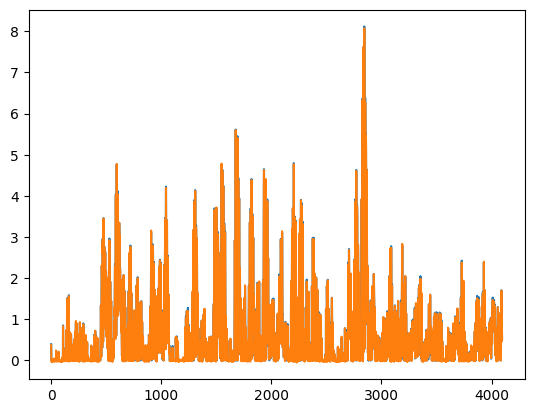

In [12]:
l3_he = np.array([  0.371,  0.148,  0.019,  0.010,  0.008, -0.036,  0.015,  0.004, -0.039,  0.017,  0.034,  0.010,  0.038,  0.002, -0.010,  0.009, -0.008, -0.019, -0.001, -0.005,  0.008,  0.006, -0.028, -0.003,  0.016, -0.001, -0.005, -0.002, -0.000,  0.044, -0.018, -0.021, -0.012, -0.029,  0.007, -0.005, -0.002, -0.009, -0.002, -0.017,  0.014,  0.013, -0.017, -0.010,  0.018,  0.240,  0.001,  0.026,  0.003,  0.011,  0.005, -0.010, -0.018,  0.007, -0.016,  0.008, -0.019, -0.033, -0.020,  0.001, -0.005,  0.019, -0.005,  0.134,  0.008,  0.002, -0.019,  0.016, -0.005,  0.209,  0.018,  0.017, -0.019, -0.003,  0.009, -0.007, -0.004, -0.000, -0.004,  0.011, -0.010, -0.013, -0.022, -0.001, -0.032, -0.005,  0.004, -0.016, -0.019,  0.009, -0.000, -0.031, -0.007, -0.009,  0.003, -0.003, -0.003, -0.010,  0.013,  0.006,  0.073, -0.036,  0.005,  0.002, -0.019, -0.009,  0.031, -0.002,  0.832,  0.523, -0.006, -0.019, -0.008, -0.005, -0.014,  0.035,  0.009, -0.004,  0.011, -0.017,  0.041,  0.038,  0.002,  0.027,  0.005,  0.005,  0.025, -0.020,  0.193,  0.271,  0.002,  0.002, -0.011, -0.006,  0.009, -0.001,  0.358,  0.731, -0.005,  0.004, -0.017,  0.162,  0.403,  0.274,  0.819,  1.495,  0.146,  0.009, -0.019,  0.013,  0.317,  0.183,  0.362,  1.221, -0.017,  0.119, -0.012, -0.017,  0.008,  0.064,  0.617,  1.564,  0.275,  0.048, -0.026, -0.014, -0.020, -0.021,  0.012,  0.679,  0.003,  0.204,  0.005,  0.021, -0.011, -0.014,  0.138,  0.400,  0.224,  0.522,  0.645,  0.627,  0.336,  0.206,  0.023,  0.002,  0.041,  0.186,  0.360,  0.389,  0.186,  0.155,  0.254,  0.186, -0.015, -0.006,  0.013, -0.001,  0.010,  0.018,  0.051,  0.120,  0.012, -0.004,  0.002, -0.003, -0.003, -0.020,  0.220,  0.499,  0.275,  0.377,  0.009, -0.016, -0.007,  0.004,  0.272,  0.700,  0.181,  0.626,  0.090,  0.081, -0.004,  0.060,  0.360,  0.957,  0.228,  0.299,  0.002,  0.009,  0.025, -0.011,  0.056,  0.897,  0.006,  0.066,  0.007,  0.068, -0.006,  0.000,  0.103,  0.649,  0.031, -0.002,  0.034, -0.007,  0.005, -0.011,  0.005,  0.150,  0.361,  0.017,  0.012,  0.023,  0.013,  0.080, -0.037,  0.206,  0.271,  0.345,  0.809,  0.930,  0.696,  0.221,  0.080,  0.055,  0.029,  0.002,  0.011,  0.023,  0.266,  0.350,  0.027,  0.242,  0.007,  0.152,  0.666,  0.784,  0.345,  0.386,  0.741,  0.450,  0.511,  0.113,  0.304,  0.664,  0.089,  0.220,  0.437, -0.034,  0.370,  0.410,  0.879,  0.820,  0.245,  0.082,  0.698,  0.313,  0.488,  0.121,  0.268,  0.135,  0.018,  0.064,  0.330,  0.015, -0.029, -0.006, -0.001,  0.007,  0.032,  0.131,  0.620,  0.438,  0.055,  0.011,  0.008,  0.046,  0.065,  0.138, -0.006,  0.028,  0.001, -0.016,  0.011,  0.157,  0.276,  0.448, -0.013, -0.012,  0.006, -0.008,  0.001,  0.015,  0.023,  0.120,  0.014,  0.007,  0.015, -0.006,  0.002,  0.036, -0.012, -0.002, -0.001, -0.004, -0.018, -0.004,  0.023, -0.001,  0.010,  0.003,  0.015, -0.002, -0.017,  0.004,  0.004, -0.008,  0.002, -0.009,  0.008,  0.006, -0.029, -0.002,  0.362,  0.003, -0.019,  0.011, -0.010, -0.013,  0.002, -0.010, -0.014, -0.007, -0.009, -0.023, -0.002,  0.003, -0.001, -0.007,  0.006,  0.001,  0.018, -0.023,  0.301,  0.136,  0.162,  0.011,  0.107,  0.091,  0.078,  0.075,  0.602,  0.060,  0.016,  0.025, -0.013,  0.003,  0.028, -0.002,  0.716,  0.438,  0.009,  0.010,  0.013,  0.051, -0.006,  0.022,  0.575,  0.202, -0.031,  0.002,  0.056,  0.174, -0.016, -0.012,  0.264, -0.006, -0.007, -0.020,  0.123,  0.545,  0.011,  0.011,  0.002,  0.001,  0.016,  0.008,  0.034, -0.041, -0.012, -0.007, -0.011, -0.015,  0.003, -0.009, -0.004,  0.002, -0.013, -0.009,  0.029, -0.002,  0.018,  0.001, -0.003, -0.004,  0.003,  0.012,  0.166,  0.411,  0.579,  0.768,  1.336,  0.970,  0.529,  0.079,  0.496,  1.278,  1.666,  2.125,  2.306,  2.095,  1.991,  0.859,  0.313,  1.403,  2.072,  2.624,  2.937,  2.587,  2.812,  1.937,  0.451,  1.584,  2.260,  3.185,  3.446,  2.570,  2.390,  1.973,  0.901,  1.854,  2.191,  2.752,  2.331,  2.119,  2.042,  1.731,  0.955,  2.142,  2.117,  2.599,  2.040,  1.575,  1.273,  1.080,  0.749,  1.969,  2.097,  2.176,  1.258,  0.651,  0.577,  0.762,  0.811,  1.112,  1.052,  0.900,  0.605,  0.321,  0.309,  0.492,  1.007,  1.092,  0.854,  0.645,  0.018,  0.006,  0.079,  0.265,  2.018,  1.980,  1.395,  1.052,  0.026, -0.006, -0.016,  0.044,  2.669,  2.924,  2.399,  1.242,  0.160, -0.011,  0.004,  0.150,  1.921,  1.887,  1.155,  0.420,  0.004, -0.020,  0.008,  0.328,  1.338,  1.447,  0.634,  0.018, -0.017,  0.004, -0.011,  0.484,  0.339,  0.389, -0.008,  0.017, -0.037,  0.034,  0.011,  0.491,  0.373,  0.491,  0.206,  0.301,  0.217,  0.034,  0.386,  0.519,  0.104,  0.117,  0.361,  0.866,  0.960,  0.648,  0.678,  0.599,  1.290,  1.097,  1.854,  2.082,  2.285,  1.563,  1.165,  0.516,  1.971,  2.074,  3.202,  3.895,  4.008,  2.466,  1.692,  0.591,  1.306,  1.799,  3.803,  4.721,  4.773,  3.307,  2.478,  1.166,  1.460,  2.143,  3.874,  3.712,  4.042,  3.459,  3.331,  1.713,  1.084,  1.528,  2.849,  2.673,  2.898,  3.047,  3.095,  2.197,  1.310,  2.162,  3.347,  2.924,  2.923,  2.815,  3.043,  1.950,  1.301,  2.097,  2.179,  1.905,  1.291,  1.221,  1.551,  1.227,  1.196,  1.866,  1.954,  1.695,  1.055,  0.775,  1.076,  0.988,  0.677,  0.742,  0.376,  0.102,  0.135,  0.034, -0.009,  0.018,  1.401,  1.303,  1.626,  0.842,  0.316, -0.024,  0.004,  0.081,  1.502,  1.882,  2.068,  1.677,  1.149,  0.184,  0.417,  0.635,  1.291,  1.690,  1.196,  0.888,  0.634, -0.024,  0.329,  0.641,  0.970,  1.291,  0.827,  0.490, -0.006, -0.003,  0.172,  0.617,  0.407,  0.754,  0.455,  0.484, -0.017,  0.017,  0.313,  0.532,  0.246,  0.508,  0.409,  0.488,  0.218,  0.109,  0.382,  0.457,  0.426,  0.554,  0.647,  0.741,  0.890,  0.605,  0.650,  0.564,  1.658,  1.069,  0.871,  0.095, -0.012,  0.020, -0.008,  0.082,  2.619,  1.777,  1.489,  0.245,  0.011, -0.009,  0.013, -0.000,  2.763,  2.259,  1.075,  0.097, -0.011,  0.009, -0.010,  0.003,  1.645,  1.407,  0.225, -0.013, -0.016, -0.014,  0.003,  0.133,  0.968,  0.712, -0.016,  0.029,  0.004,  0.025, -0.014,  0.469,  0.266,  0.342,  0.021,  0.011, -0.015,  0.012,  0.006,  0.389,  0.259,  0.423,  0.773,  1.101,  1.218,  1.120,  1.107,  0.649,  0.047,  0.020,  0.645,  0.854,  1.008,  0.610,  0.432,  0.188,  1.114,  0.795,  0.544,  0.567,  0.402,  0.108,  0.038,  0.136,  1.821,  1.519,  1.615,  0.940,  0.585,  0.015, -0.021,  0.363,  1.818,  1.576,  1.999,  0.919,  0.932,  0.482,  0.335,  0.672,  1.215,  0.995,  1.169,  0.433,  0.417, -0.012,  0.377,  0.815,  0.770,  0.713,  0.428,  0.253,  0.114,  0.321,  1.076,  1.396,  0.644,  1.019,  0.826,  0.381,  0.026,  0.078,  0.892,  0.922,  0.741,  1.379,  1.430,  1.172,  0.738,  0.671,  0.897,  0.614,  0.287,  0.579,  0.951,  0.856,  0.660,  0.478,  0.550,  0.345,  0.121,  0.201,  0.597,  0.168,  0.044,  0.014, -0.003,  0.019, -0.002,  0.016,  0.001,  0.005,  0.017, -0.008,  0.028, -0.005,  0.021, -0.036, -0.011, -0.008,  0.031,  0.003,  0.017, -0.000,  0.370,  0.019, -0.013,  0.013, -0.010,  0.004,  0.008, -0.002,  0.036, -0.009, -0.007, -0.032, -0.014,  0.007,  0.008,  0.118,  0.041,  0.021,  0.002,  0.001,  0.027,  0.019,  0.061,  0.374,  0.003, -0.009,  0.012,  0.022, -0.036, -0.016,  0.140,  0.372,  0.615,  0.539,  0.458,  0.524,  0.493,  0.442,  0.568,  0.535, -0.000,  0.127,  0.630,  1.001,  1.296,  1.157,  0.849,  0.343,  0.101,  0.606,  1.208,  1.978,  3.155,  2.388,  1.566,  0.704,  0.020,  0.622,  1.639,  2.327,  2.424,  2.273,  1.551,  0.666,  0.134,  0.726,  1.975,  2.495,  2.788,  2.637,  1.759,  0.666,  0.035,  0.593,  1.555,  2.088,  2.364,  2.004,  1.259,  0.390,  0.368,  0.609,  1.117,  1.419,  1.713,  1.174,  0.648,  0.160,  0.206,  0.297,  0.197,  0.234,  0.154,  0.082,  0.019,  0.019,  0.317,  0.276,  0.009, -0.022,  0.005,  0.004, -0.019, -0.025,  0.236,  0.084,  0.580,  1.070,  1.564,  0.745,  0.503,  0.191,  0.336,  0.376,  0.810,  1.309,  1.736,  0.970,  0.672,  0.348,  0.184,  0.380,  0.936,  1.802,  2.269,  1.462,  0.737,  0.550,  0.428,  0.475,  1.212,  1.822,  2.431,  1.733,  0.705,  0.311,  0.209,  0.188,  0.834,  1.653,  2.353,  1.711,  0.784,  0.376,  0.667,  0.728,  0.592,  0.955,  1.182,  0.793,  0.417,  0.245,  0.460,  0.392,  0.273,  0.061,  0.058,  0.096,  0.052,  0.119,  0.414,  0.430,  0.172,  0.083,  0.061, -0.004,  0.018,  0.060,  1.057,  1.092,  1.529,  2.027,  2.307,  1.026,  0.767,  0.296,  1.369,  1.423,  2.618,  3.151,  3.435,  1.778,  1.239,  0.271,  1.212,  1.552,  3.868,  4.191,  3.505,  1.918,  1.174,  0.409,  1.162,  1.126,  3.377,  3.363,  3.394,  2.410,  1.807,  0.537,  0.628,  1.198,  2.467,  2.511,  2.338,  1.816,  1.100,  0.433,  0.684,  0.858,  1.581,  1.329,  1.478,  0.812,  0.542,  0.154,  0.286,  0.323,  0.332,  0.219,  0.076,  0.003, -0.020,  0.025,  0.141,  0.024, -0.003, -0.002,  0.007, -0.004,  0.007,  0.090, -0.007,  0.020,  0.032,  0.006,  0.005,  0.004,  0.010,  0.138, -0.020, -0.003, -0.000,  0.005,  0.010,  0.030,  0.266,  0.308, -0.012,  0.005,  0.006,  0.004, -0.000, -0.002, -0.001, -0.003, -0.004,  0.008,  0.023, -0.001, -0.001,  0.001,  0.007, -0.007,  0.023,  0.007, -0.000, -0.005, -0.009, -0.019, -0.001, -0.020, -0.003,  0.015, -0.004,  0.052,  0.573,  0.241,  0.017, -0.028, -0.020,  0.019,  0.001,  0.018,  0.557,  0.479,  0.128,  0.043,  0.268,  0.370,  0.294,  0.273,  0.398,  0.474,  0.245,  0.270,  0.143,  0.014,  0.012, -0.022,  0.017, -0.012, -0.011, -0.032, -0.014,  0.025, -0.010, -0.028,  0.004,  0.002, -0.002,  0.000, -0.007,  0.006,  0.006,  0.014,  0.010, -0.012, -0.004,  0.004,  0.007, -0.010, -0.000,  0.001, -0.004, -0.004,  0.005,  0.005,  0.005,  0.005,  0.014, -0.006, -0.013, -0.015,  0.018, -0.014, -0.014,  0.011, -0.005, -0.012,  0.015,  0.070,  0.013, -0.021,  0.065,  0.003,  0.007, -0.008,  0.013, -0.007, -0.026, -0.010,  0.029, -0.007, -0.026, -0.013,  0.004, -0.002,  0.004,  0.014,  0.243,  0.116,  0.252,  0.395,  0.805,  0.582,  0.358,  0.133,  1.022,  0.569,  0.416, -0.017,  0.004,  0.022,  0.293,  0.245,  1.196,  0.812,  0.373, -0.006,  0.084,  0.308,  0.085,  0.429,  0.893,  0.927,  1.201,  0.143,  0.110,  0.059, -0.020,  0.190,  0.580,  0.795,  0.828,  0.187,  0.423,  0.477,  0.134,  0.154,  0.588,  0.105,  0.172, -0.001,  0.011,  0.012, -0.009, -0.006,  0.671,  0.070, -0.011,  0.000, -0.001,  0.019,  0.012,  0.063,  0.611,  0.203,  0.013, -0.010,  0.013,  0.050, -0.020,  0.079,  0.018,  0.247,  0.634,  1.255,  1.673,  1.611,  1.127,  0.452,  0.020,  0.888,  1.526,  2.432,  3.162,  2.918,  2.308,  1.177,  0.017,  0.679,  2.014,  3.160,  3.862,  3.627,  3.011,  1.783,  0.086,  1.124,  2.695,  3.738,  4.118,  3.845,  3.123,  1.713,  0.088,  1.070,  2.401,  3.116,  3.214,  3.122,  2.659,  1.335,  0.745,  1.731,  2.756,  2.948,  2.771,  2.162,  1.579,  0.658,  0.819,  1.619,  1.630,  1.426,  0.843,  0.478,  0.344,  0.141,  0.525,  0.787,  0.521,  0.245, -0.009,  0.017,  0.027,  0.093,  0.020,  0.016, -0.022, -0.007,  0.016,  0.448,  0.079,  0.164,  0.002, -0.020,  0.009,  0.002, -0.005,  0.031,  0.163,  0.487, -0.011,  0.006, -0.003,  0.013,  0.009,  0.423,  0.594,  0.965,  0.013, -0.020, -0.020,  0.011,  0.113, -0.032,  0.340,  0.727,  0.108,  0.160,  0.567,  0.596,  1.000,  0.996,  1.070,  1.002,  0.376,  0.814,  1.127,  0.863,  0.859,  0.771,  0.384,  0.398,  0.592,  1.255,  1.244,  0.952,  0.806,  0.510,  0.198,  0.069,  0.256,  0.527,  0.192,  0.219,  0.123,  0.165,  0.086,  0.045,  0.050, -0.012,  0.007,  0.030,  0.188, -0.016,  0.035,  0.040,  0.011, -0.027,  0.005,  0.014, -0.006,  0.015, -0.010,  0.009,  0.009,  0.003,  0.004,  0.008,  0.162,  0.450,  0.130,  0.021, -0.008,  0.016,  0.010,  0.025,  0.114,  0.564,  0.215,  0.126,  0.000, -0.006,  0.002, -0.020,  0.047,  0.280,  0.122,  0.057,  0.019,  0.057,  0.076,  0.239,  0.288,  0.576,  0.264,  0.206, -0.033,  0.002,  0.016, -0.003, -0.011,  0.006,  0.017,  0.159,  0.060,  0.301,  0.166,  0.011, -0.011,  0.043,  0.110,  0.239,  0.015,  0.564,  0.948,  1.202,  1.267,  1.355,  0.953,  0.402, -0.005,  1.214,  2.134,  3.287,  3.662,  3.580,  2.742,  1.319,  0.008,  1.040,  1.923,  3.030,  3.152,  3.278,  2.937,  1.399, -0.033,  0.999,  1.904,  3.158,  3.594,  3.717,  3.127,  1.425,  0.013,  1.005,  1.748,  2.679,  2.904,  2.384,  2.225,  0.996,  0.550,  1.527,  2.298,  3.073,  2.728,  1.936,  1.765,  1.074,  0.763,  1.517,  1.916,  2.155,  1.672,  1.221,  1.040,  0.875,  0.713,  1.140,  1.133,  0.853,  0.396,  0.121,  0.071,  0.224,  0.145,  0.543,  1.595,  2.349,  2.624,  1.858,  1.244,  0.363, -0.009,  1.109,  3.061,  4.223,  4.783,  3.908,  3.414,  1.061, -0.019,  1.026,  3.520,  4.609,  4.308,  3.427,  3.047,  1.136,  0.002,  1.462,  3.629,  4.042,  4.213,  3.741,  2.794,  1.019, -0.003,  0.932,  2.882,  3.280,  3.287,  2.630,  1.888,  0.661,  0.728,  1.313,  2.775,  2.893,  3.088,  2.309,  1.472,  0.691,  0.447,  1.002,  1.061,  1.082,  0.576,  0.149, -0.003,  0.058,  0.633,  0.768,  0.532,  0.237, -0.005,  0.004,  0.000, -0.001,  0.482,  0.224,  0.024,  0.009,  0.017, -0.010, -0.005,  0.031,  0.027, -0.016, -0.006, -0.022,  0.010,  0.021, -0.029, -0.000,  0.003,  0.034, -0.004,  0.015,  0.016, -0.002,  0.011,  0.002,  0.005,  0.008,  0.022,  0.319,  0.528,  0.067,  0.001, -0.007,  0.296,  0.025,  0.009, -0.007,  0.022, -0.028,  0.006,  0.018, -0.005, -0.026,  0.001, -0.005,  0.022,  0.242, -0.006,  0.010, -0.004,  0.011, -0.006, -0.035, -0.008,  0.014,  0.015, -0.009, -0.001,  0.018, -0.002, -0.019,  0.001,  0.043,  0.014,  0.116,  0.002,  0.443,  1.624,  2.493,  2.910,  2.577,  1.713,  0.542,  0.026,  1.326,  2.821,  4.574,  5.597,  4.582,  3.356,  1.340,  0.018,  0.768,  2.976,  4.839,  5.203,  4.794,  3.962,  1.904,  0.005,  1.043,  3.345,  4.913,  5.409,  4.923,  3.966,  1.863,  0.003,  0.812,  2.842,  4.075,  4.379,  3.851,  3.069,  1.402,  0.479,  1.834,  3.295,  3.882,  3.922,  3.075,  2.072,  0.905,  0.837,  2.098,  2.234,  1.992,  1.135,  0.474,  0.155,  0.232,  0.796,  1.515,  1.201,  0.606,  0.005,  0.001, -0.019,  0.080,  0.377,  0.503,  0.382,  0.011,  0.002,  0.015, -0.022,  0.010,  0.403,  0.576,  0.510,  0.388,  0.404,  0.216,  0.346,  0.010,  0.695,  1.228,  1.055,  0.536,  0.174, -0.021,  0.433,  0.053,  0.433,  1.517,  0.928,  1.051,  0.593,  0.355,  0.210,  0.070,  0.562,  1.823,  0.777,  0.781, -0.012, -0.009, -0.011, -0.023,  0.059,  0.805,  0.027,  0.489,  0.036,  0.258, -0.007,  0.018,  0.116,  0.476,  0.078,  0.099,  0.019,  0.019,  0.003, -0.022, -0.031, -0.004, -0.002,  0.009, -0.004, -0.021,  0.023,  0.031,  0.005,  0.313,  0.809,  1.352,  1.804,  1.747,  1.244,  0.557, -0.001,  0.859,  1.866,  2.766,  3.213,  3.351,  2.602,  1.242, -0.031,  0.807,  2.347,  3.478,  3.643,  3.602,  3.230,  1.610,  0.056,  1.120,  3.263,  4.141,  4.383,  4.302,  3.357,  1.758,  0.043,  1.290,  2.972,  3.521,  3.490,  3.495,  2.645,  1.201,  1.055,  2.056,  2.689,  2.961,  2.938,  2.253,  1.645,  0.688,  1.009,  1.594,  1.393,  1.242,  0.730,  0.452,  0.280,  0.137,  0.439,  0.455,  0.111,  0.003,  0.004,  0.008,  0.021,  0.077,  0.345,  0.555,  0.179, -0.015,  0.006,  0.023, -0.018, -0.015,  0.877,  1.210,  0.915,  0.570,  0.137,  0.122,  0.429,  0.187,  1.334,  1.863,  1.478,  0.495, -0.011,  0.009,  0.246,  0.378,  0.446,  1.359,  1.153,  0.537, -0.010,  0.001, -0.007,  0.121,  0.588,  1.920,  1.038,  0.268,  0.004,  0.009,  0.004, -0.003,  0.019,  0.620, -0.022,  0.095,  0.003,  0.013, -0.003, -0.025,  0.255,  0.591,  0.339,  0.564,  0.426,  0.054, -0.003,  0.007,  0.046, -0.021,  0.034,  0.244,  0.364,  0.180,  0.038,  0.043,  0.053,  0.429,  1.319,  1.887,  1.788,  1.934,  1.401,  0.535, -0.000,  1.373,  2.986,  4.062,  4.207,  4.624,  4.070,  1.599, -0.002,  1.246,  2.419,  3.923,  4.025,  3.956,  3.623,  1.705, -0.006,  1.087,  2.552,  3.898,  4.228,  4.407,  3.615,  1.644,  0.044,  1.089,  2.219,  3.623,  3.703,  3.432,  2.544,  0.955,  0.657,  1.713,  2.909,  3.868,  3.659,  2.789,  2.074,  0.928,  1.035,  1.828,  2.226,  2.479,  1.843,  1.140,  0.719,  0.374,  0.894,  1.324,  1.349,  0.891,  0.340,  0.027,  0.023,  0.119,  0.058,  0.160,  0.125,  0.365,  0.766,  1.312,  1.013,  0.679,  0.060,  0.065,  0.067,  0.259,  0.521,  1.357,  1.036,  0.988,  0.158,  0.101,  0.647,  0.658,  0.358,  0.598,  0.427,  0.540,  0.144,  0.281,  1.364,  1.470,  1.026,  1.171,  0.724,  0.411,  0.354,  0.930,  1.456,  1.260,  0.903,  0.731,  0.334, -0.012,  0.565,  0.393,  0.325,  0.343,  0.683,  0.384,  0.166, -0.018,  0.164, -0.018,  0.007, -0.016, -0.007,  0.011,  0.017, -0.031,  0.117,  0.009, -0.002, -0.016, -0.006, -0.007,  0.013,  0.007,  0.198,  0.350,  0.013,  0.030,  0.126,  0.592,  0.168,  0.353,  0.800,  1.138,  0.444,  0.004,  0.229,  0.511,  0.463,  0.943,  0.768,  0.948,  0.342,  0.042,  0.672,  1.425,  1.829,  2.039,  0.611,  0.683,  0.487,  0.451,  1.170,  0.889,  1.671,  1.997,  0.767,  1.132,  0.725,  0.834,  1.105,  2.005,  2.936,  2.538,  1.134,  2.542,  2.248,  1.433,  0.394,  0.711,  1.247,  1.233,  1.578,  3.137,  3.013,  2.285,  1.485,  1.107,  1.052,  0.679,  0.308,  0.832,  0.914,  0.791,  0.609,  0.549,  0.571,  0.318,  0.215,  0.085,  0.514,  0.527,  0.797,  0.627,  0.514,  0.175,  0.805,  0.309,  0.283, -0.016, -0.003,  0.442,  0.349,  0.296,  0.916,  0.481,  0.333,  0.045,  0.449,  0.479,  0.084,  0.140,  0.703,  0.203,  0.602,  0.105,  0.625,  0.344,  0.041,  0.023,  0.375,  0.104,  0.317,  0.239,  0.842,  0.829,  0.122,  0.032,  0.326, -0.014, -0.014, -0.010,  0.008,  0.004, -0.001, -0.037,  0.201,  0.029, -0.012,  0.004, -0.007, -0.005, -0.016,  0.045,  0.264,  0.060,  0.030, -0.003, -0.001,  0.017,  0.021,  0.056, -0.009,  0.090,  1.281,  1.919,  1.708,  1.439,  0.963,  0.231, -0.013,  0.027,  1.523,  2.873,  3.196,  2.812,  2.211,  0.590, -0.005,  0.007,  1.900,  3.701,  3.581,  2.298,  1.603,  0.161, -0.023, -0.040,  2.327,  4.123,  4.768,  3.400,  1.899,  0.083,  0.003,  0.004,  1.965,  2.724,  3.476,  2.288,  0.791, -0.007, -0.013, -0.027,  1.413,  2.287,  3.370,  2.408,  0.736, -0.004, -0.012, -0.022, -0.012,  0.246,  0.261, -0.005, -0.051, -0.002,  0.277,  0.437,  0.032,  0.017, -0.032, -0.013,  0.004, -0.029,  0.023,  0.013,  0.597,  1.146,  1.537,  1.386,  1.027,  0.359, -0.013,  0.299,  0.894,  1.903,  3.077,  2.484,  1.761,  0.580, -0.003, -0.008,  1.259,  2.629,  3.425,  3.266,  2.385,  0.868,  0.007,  0.780,  2.082,  2.890,  3.812,  3.895,  2.538,  0.910,  0.005,  0.116,  1.750,  2.731,  3.766,  2.881,  1.903,  0.484,  0.429,  0.644,  1.918,  2.888,  3.317,  2.148,  1.101,  0.373,  0.061,  0.215,  0.516,  0.412,  0.335,  0.138,  0.002, -0.004,  0.376,  0.761,  0.523,  0.142,  0.015,  0.008, -0.032,  0.075,  0.449,  0.523,  0.443,  0.207,  0.217,  0.057,  0.135,  0.038,  1.258,  1.171,  1.097,  0.197,  0.078,  0.049,  0.505,  0.203,  1.657,  1.917,  1.559,  0.519,  0.123,  0.016,  0.420,  0.138,  1.052,  1.642,  1.448,  0.779,  0.157,  0.306,  0.160, -0.020,  0.919,  1.668,  0.850,  0.640,  0.044, -0.013, -0.011,  0.003,  0.278,  0.430, -0.017,  0.016, -0.021, -0.001,  0.000,  0.023,  0.254,  0.285, -0.001,  0.001,  0.021,  0.020,  0.011,  0.014,  0.173, -0.006,  0.025,  0.003,  0.001, -0.010,  0.001,  0.009,  1.791,  1.470,  0.859,  0.659,  0.587,  0.071, -0.008,  0.111,  2.952,  2.316,  1.833,  0.716,  1.144, -0.006,  0.026,  0.007,  2.942,  2.276,  2.315,  1.284,  1.361,  0.783,  0.061,  0.790,  2.114,  1.386,  1.690,  0.499,  0.293, -0.004,  0.204,  1.275,  1.113,  1.063,  0.502,  0.160, -0.005,  0.277,  1.469,  2.006,  0.685,  1.308,  0.744, -0.020,  0.006, -0.014,  0.421,  0.928,  0.639,  1.683,  1.717,  1.391,  0.735,  0.508,  0.648,  0.587, -0.006,  0.255,  0.805,  0.840,  0.639,  0.256,  0.244,  0.107,  1.127,  0.794,  1.092,  0.747,  0.569, -0.033, -0.020,  0.075,  1.097,  0.002,  0.481, -0.013, -0.020,  0.011, -0.008,  0.020,  0.988,  0.322,  1.098,  0.021, -0.016, -0.010, -0.011, -0.004,  0.523, -0.021,  0.379,  0.004,  0.017,  0.010, -0.022,  0.018, -0.007, -0.009,  0.002,  0.006, -0.009, -0.014, -0.026,  0.016,  0.011, -0.028, -0.013,  0.017,  0.008, -0.031, -0.006, -0.009, -0.029,  0.009, -0.006,  0.007, -0.001,  0.006, -0.015,  0.011,  0.006,  0.002, -0.013,  0.042,  0.119, -0.014, -0.019,  0.049,  1.258,  0.791,  0.546,  0.067, -0.002, -0.043,  0.120,  0.249,  1.817,  1.607,  1.310,  0.054, -0.020, -0.022,  0.002,  0.184,  1.947,  1.544,  1.250,  0.203,  0.179,  0.456,  0.214,  0.295,  1.252,  0.961,  0.575,  0.015,  0.001, -0.008, -0.017,  0.412,  0.863,  0.825,  0.130,  0.005, -0.034,  0.026,  0.322,  0.583,  0.685,  0.780,  0.327, -0.007,  0.011,  0.009,  0.751,  0.800,  0.674,  0.805,  0.933,  1.012,  1.017,  1.210,  1.518,  0.926,  0.407,  0.324,  0.749,  0.780,  0.916,  0.851,  0.893,  0.540, -0.016, -0.005, -0.016, -0.004,  0.022,  0.015,  0.105,  0.239, -0.013,  0.014,  0.016, -0.024, -0.013, -0.003,  0.005,  0.153, -0.005,  0.015, -0.012, -0.004,  0.001, -0.027,  0.041,  0.016, -0.006,  0.047,  0.027,  0.022,  0.001,  0.021,  0.023, -0.018, -0.045,  0.009,  0.012,  0.006, -0.026, -0.004, -0.004,  0.030, -0.005,  0.011,  0.002,  0.019,  0.331, -0.001,  0.016, -0.002,  0.002, -0.017,  0.001,  0.026,  0.022, -0.041,  0.005,  0.016,  0.018,  0.012, -0.005, -0.021, -0.011,  0.275,  0.154,  0.099,  0.013, -0.007, -0.006,  0.073, -0.025,  0.103,  0.056,  0.151, -0.002,  0.003, -0.000, -0.018,  0.035,  0.275,  0.576,  0.458,  0.022,  0.007, -0.011,  0.009, -0.002, -0.016, -0.006,  0.003, -0.017, -0.011,  0.021, -0.020,  0.016, -0.004,  0.014,  0.007,  0.007,  0.005, -0.003,  0.047,  0.180, -0.014,  0.000,  0.035, -0.011,  0.003,  0.002,  0.529,  0.784,  0.497, -0.010, -0.034, -0.012,  0.039,  0.024,  0.173,  0.635,  0.503,  0.065, -0.017,  0.240,  0.453,  0.327,  0.156,  0.176,  0.198,  0.046,  0.054,  0.295,  0.688,  0.626,  0.105,  0.054, -0.005,  0.078,  0.195,  0.881,  2.331,  1.680,  1.649,  1.927,  1.718,  1.152,  0.609,  1.915,  2.682,  2.422,  1.937,  1.481,  0.878,  1.298,  0.677,  0.650,  1.813,  1.814,  1.965,  1.463,  1.189,  1.017,  0.505,  0.843,  2.111,  1.634,  1.145,  0.051, -0.016,  0.001,  0.145,  0.340,  1.197,  0.408,  0.677,  0.074, -0.014, -0.021,  0.136,  0.592,  0.878,  0.504,  0.528,  0.203, -0.032,  0.011,  0.061,  0.250,  0.354,  0.095,  0.338,  0.302,  0.064,  0.001,  0.121,  1.308,  1.428,  2.325,  2.437,  2.255,  1.332,  0.877,  0.400,  1.650,  1.811,  3.441,  3.871,  3.763,  1.953,  1.508,  0.018,  1.110,  1.706,  4.246,  4.606,  3.773,  2.088,  1.459,  0.002,  0.661,  1.223,  3.733,  3.508,  3.451,  2.078,  1.660,  0.022,  0.052,  0.651,  2.578,  2.807,  2.617,  1.726,  0.904,  0.154,  0.432,  0.819,  1.714,  1.661,  2.136,  1.229,  0.599, -0.015,  0.028,  0.188,  0.512,  0.827,  0.440,  0.036,  0.007, -0.003,  0.305,  0.210,  0.340,  0.253, -0.001,  0.015,  0.021,  0.006,  0.427,  0.756,  1.586,  2.981,  3.921,  3.213,  1.778,  0.637,  0.324,  2.146,  3.577,  5.205,  6.334,  5.695,  4.754,  1.896, -0.024,  1.383,  3.657,  6.002,  7.619,  7.124,  5.990,  3.298,  0.207,  1.886,  4.547,  6.350,  8.072,  6.778,  5.854,  3.317,  0.295,  1.912,  3.941,  5.464,  6.278,  6.191,  5.551,  3.405,  1.621,  3.784,  5.272,  5.462,  5.073,  4.272,  3.378,  2.000,  1.988,  4.245,  4.624,  4.086,  2.751,  1.650,  1.230,  0.900,  1.092,  2.286,  2.157,  1.636,  0.607,  0.178,  0.363,  0.380,  0.036,  0.070,  0.152,  0.156,  0.001,  0.129,  0.162,  0.377,  0.422,  0.993,  0.323,  0.161,  0.336,  0.737,  0.645,  1.001,  0.531,  1.137,  0.007,  0.021,  0.605,  1.190,  1.437,  1.276,  0.463,  0.878,  0.009,  0.044,  0.648,  0.657,  1.092,  1.181,  0.671,  1.006,  0.033,  0.425,  0.918,  1.267,  1.809,  1.226,  0.701,  1.575,  1.203,  1.036,  0.296,  0.513,  0.911,  0.880,  1.220,  1.912,  2.088,  2.100,  1.727,  1.539,  1.411,  0.873,  0.482,  0.829,  1.277,  1.063,  0.884,  0.716,  0.679,  0.390,  0.015, -0.019,  0.012,  0.082,  0.434,  0.697,  0.640,  0.358, -0.017, -0.009, -0.011, -0.005, -0.010,  0.208,  0.359,  0.465, -0.013,  0.012,  0.022, -0.002,  0.170,  0.608,  0.394,  0.415,  0.424,  0.450,  0.513,  0.326,  0.365,  0.547,  0.192,  0.229,  0.335,  0.231,  0.500,  0.363,  0.525,  0.444,  0.081,  0.004,  0.322,  0.148,  0.236,  0.116,  0.255,  0.317,  0.072, -0.024,  0.144,  0.004,  0.008, -0.005,  0.014,  0.008,  0.017,  0.028,  0.148,  0.012,  0.009, -0.004, -0.018,  0.016,  0.013,  0.059,  0.675,  0.659,  0.553,  0.347,  0.308,  0.307,  0.015,  0.090,  1.054,  0.866,  0.226,  0.007, -0.022, -0.011, -0.005,  0.034,  1.013,  0.150,  0.304,  0.261,  0.148,  0.018,  0.008, -0.008,  0.996,  0.467,  0.678, -0.006, -0.015,  0.013, -0.012,  0.317,  0.527, -0.013,  0.427,  0.024,  0.014,  0.016,  0.622,  0.914,  0.822,  0.464,  1.025,  0.344,  0.146,  0.423,  1.169,  0.980,  0.675,  0.650,  0.752,  0.323,  0.080,  0.401,  0.938,  0.702,  0.537,  0.876,  0.910,  0.692,  0.557,  0.476,  0.727,  0.696,  2.031,  1.282,  1.016,  0.569,  0.600, -0.016,  0.006,  0.126,  2.726,  1.301,  1.201,  0.356,  0.024,  0.010, -0.031,  0.003,  2.733,  1.500,  1.623,  0.859,  0.266, -0.029, -0.017,  0.003,  1.804,  0.792,  0.929,  0.007,  0.014,  0.020,  0.020,  0.013,  0.952,  0.020,  0.016,  0.003, -0.008, -0.016,  0.041,  1.017,  0.783,  0.608,  0.041, -0.035, -0.022,  0.037,  0.944,  1.188,  0.653,  0.633,  1.323,  0.602,  0.436,  0.571,  1.191,  0.943,  0.492,  0.623,  1.075,  1.092,  0.953,  0.655,  0.890,  0.664, -0.002,  0.264, -0.004,  0.005,  0.017,  0.075,  0.740,  0.791,  0.004,  0.938,  0.019,  0.009, -0.014,  1.223,  1.332,  1.447,  0.505,  1.019, -0.025,  0.008, -0.015,  0.468,  0.868,  0.941,  0.059,  0.455,  0.023,  0.006, -0.012, -0.003,  0.602,  0.973,  0.437,  0.781, -0.020, -0.009,  0.015, -0.004,  0.763,  0.476,  0.628,  1.396,  0.560,  0.670,  0.151,  0.070,  0.970,  1.041,  0.925,  1.451,  1.810,  2.358,  2.772,  2.831,  2.545,  1.694,  0.828,  1.131,  1.486,  1.533,  1.850,  1.747,  1.563,  1.016,  1.233,  0.781,  0.865,  0.197,  0.013,  0.014,  0.030,  0.490,  1.663,  1.048,  0.956,  0.047, -0.008,  0.023,  0.013,  0.008,  2.050,  1.360,  1.080,  0.013,  0.011,  0.034,  0.015,  0.003,  1.143,  0.680,  0.127,  0.027,  0.005, -0.012, -0.004, -0.021,  0.635,  0.357,  0.019, -0.040, -0.010,  0.007, -0.015, -0.000,  0.151,  0.042, -0.009, -0.003,  0.017, -0.013,  0.013,  0.006,  0.087, -0.010,  0.131,  0.404,  0.669,  0.658,  0.548,  0.249,  0.054,  0.035,  0.210,  0.413,  0.584,  0.346,  0.152,  0.024,  0.085,  0.358,  0.130,  0.278,  0.576,  0.749,  0.313,  0.161,  0.742,  0.685,  0.445, -0.010,  0.122,  0.605,  0.314,  0.405,  0.917,  0.935,  0.554,  0.228,  0.659,  0.959,  0.825,  0.848,  0.715,  0.691,  0.634,  0.390,  0.817,  0.627,  0.605,  0.767,  0.678,  0.735,  0.557,  0.601,  0.893,  1.198,  1.238,  1.124,  0.666,  0.930,  0.768,  0.431,  0.058,  0.268,  0.304,  0.549,  0.690,  1.392,  1.133,  0.747,  0.407,  0.255,  0.261,  0.268,  0.207,  0.397,  0.325,  0.277,  0.186,  0.142,  0.086,  0.090,  0.637,  0.645,  0.845,  0.793,  1.488,  1.101,  0.436,  0.121,  0.914,  1.080,  1.408,  1.006,  1.756,  1.428,  0.997,  0.473,  0.976,  1.560,  1.815,  1.573,  1.174,  1.189,  0.893,  0.424,  0.694,  1.338,  1.985,  1.859,  1.765,  1.157,  0.431,  0.079,  0.596,  1.237,  1.537,  1.635,  1.436,  0.807,  0.007, -0.024,  0.213,  0.411,  0.145,  0.334,  0.436,  0.117, -0.003, -0.004,  0.292,  0.207, -0.037, -0.013,  0.005, -0.011, -0.003, -0.010,  0.266,  0.036,  0.013,  0.002,  0.008,  0.025,  0.013,  0.015,  0.232,  0.279,  0.080,  0.219,  0.223,  0.297,  0.315,  0.505,  0.188,  0.079,  0.017,  0.007,  0.052,  0.294,  0.339,  0.712,  0.347,  0.183,  0.015, -0.012,  0.344,  0.493,  0.571,  0.748,  0.329,  0.201,  0.057,  0.082,  0.477,  0.088,  0.384,  0.560,  0.163,  0.077,  0.127,  0.322,  0.681,  0.784,  1.141,  1.369,  0.407,  0.680,  0.776,  0.701,  0.313,  0.368,  0.425,  0.802,  0.819,  1.275,  1.598,  1.270,  0.912,  0.638,  0.485,  0.645,  0.172,  0.534,  0.522,  0.815,  0.566,  0.465,  0.456,  0.437,  0.016, -0.004,  0.033,  0.222,  0.176,  0.315,  0.294,  0.127, -0.006,  0.014,  0.001,  0.259,  0.254,  0.726,  0.684,  0.358, -0.002,  0.011,  0.013,  0.276,  0.576,  1.051,  0.714,  0.337,  0.019,  0.074,  0.314,  0.707,  1.115,  1.148,  0.760,  0.298, -0.002, -0.002,  0.358,  0.525,  0.918,  0.812,  0.439,  0.012,  0.264,  0.009,  0.534,  0.874,  1.133,  0.849,  0.395,  0.087, -0.015,  0.022,  0.067,  0.175,  0.275,  0.303,  0.235,  0.119,  0.498,  0.953,  0.332,  0.234,  0.134,  0.050,  0.069,  0.066,  0.766,  0.364,  0.254, -0.011,  0.473,  0.180,  0.135,  0.132,  1.141, -0.014,  0.009,  0.008, -0.020,  0.000,  0.019,  0.012,  1.126,  0.362,  0.003, -0.002, -0.000,  0.006, -0.025, -0.022,  0.927,  0.105, -0.026, -0.001,  0.294,  0.196,  0.010, -0.008,  0.471, -0.009,  0.013, -0.003,  0.181,  0.337,  0.021, -0.006, -0.003, -0.009, -0.011,  0.008,  0.000, -0.002, -0.008, -0.014, -0.018,  0.013,  0.007, -0.000,  0.009,  0.009, -0.011,  0.012,  0.029,  0.022,  0.007, -0.001,  0.015,  0.042, -0.029,  0.005, -0.002, -0.006, -0.032,  0.350, -0.027,  0.058,  0.114,  0.097,  0.014, -0.016,  0.029, -0.003,  0.009,  0.007,  0.020,  0.075, -0.021,  0.004,  0.024, -0.014,  0.408,  0.792,  0.528,  0.410,  0.016,  0.419,  0.011,  0.034,  0.298,  0.657,  0.400,  0.404,  0.055,  0.082,  0.118,  0.214,  0.392,  0.392,  0.189,  0.109,  0.036,  0.193,  0.466,  0.637,  0.519,  0.609,  0.235,  0.133,  0.002, -0.003, -0.013,  0.003,  0.013,  0.089,  0.089,  0.106,  0.100,  0.379,  0.194,  0.043, -0.010,  0.119,  0.217,  0.180, -0.003,  0.003, -0.005, -0.006,  0.500,  0.899,  0.368,  0.317,  0.040,  0.229, -0.018, -0.008,  0.156,  0.840,  0.575,  0.673,  0.093,  0.256,  0.039,  0.092,  0.464,  1.048,  0.915,  0.812,  0.264,  0.581,  0.557,  0.762,  0.725,  0.988,  0.771,  0.724,  0.339,  0.688,  0.670,  0.775,  0.634,  0.892,  0.824,  0.405,  0.480,  1.034,  1.262,  1.057,  0.506,  0.452,  0.418,  0.156,  0.546,  0.716,  0.616,  0.249,  0.217,  0.408,  0.382,  0.121,  0.164,  0.044, -0.029,  0.008, -0.000,  0.115,  0.197,  0.084,  0.557,  0.868,  0.301,  0.015, -0.002, -0.014, -0.004,  0.016,  1.152,  1.511,  1.158,  0.456, -0.006,  0.007,  0.376,  0.127,  1.876,  2.382,  1.817,  0.662,  0.026, -0.025,  0.136,  0.187,  0.879,  1.526,  1.253,  0.725,  0.016, -0.007,  0.022,  0.034,  0.993,  1.936,  0.875,  0.403,  0.007, -0.026, -0.006,  0.009,  0.133,  0.710, -0.015,  0.030,  0.007,  0.015, -0.015,  0.015,  0.259,  0.456,  0.086,  0.457,  0.115,  0.003,  0.001,  0.005,  0.126, -0.010,  0.004,  0.167,  0.384,  0.174,  0.018,  0.027, -0.005, -0.024,  0.008, -0.008, -0.023,  0.069,  0.010,  0.021,  0.026,  0.000,  0.005, -0.005,  0.017, -0.019, -0.024,  0.083, -0.021,  0.003, -0.022,  0.005,  0.031,  0.141,  0.039,  0.180, -0.008, -0.003, -0.014, -0.014,  0.008, -0.013, -0.004,  0.179,  0.049,  0.007,  0.020,  0.043,  0.255,  0.240,  0.287,  0.364,  0.052,  0.107,  0.171,  0.117,  0.186,  0.211,  0.080,  0.115,  0.051,  0.253,  0.323,  0.222,  0.228,  0.145,  0.051,  0.068,  0.000,  0.061,  0.030,  0.110,  0.068,  0.081,  0.211,  0.005, -0.012, -0.009,  0.011,  0.457,  0.321,  0.237,  0.641,  0.717, -0.020,  0.120,  0.002,  0.391,  0.222,  0.624,  0.667,  0.913,  0.012,  0.422,  0.187,  1.139,  1.252,  1.386,  1.426,  1.133,  0.307,  1.330,  0.686,  1.474,  1.056,  1.511,  1.361,  0.948,  0.374,  0.853,  0.876,  1.321,  1.020,  0.680,  0.685,  0.595,  0.236,  0.642,  0.885,  1.471,  1.278,  0.822,  0.462,  0.471, -0.005,  0.019,  0.065,  0.082, -0.014, -0.015,  0.076,  0.373,  0.908,  1.019,  0.614,  0.458,  0.265,  0.329,  0.416,  0.472,  0.827,  0.764,  0.606,  0.437,  0.430,  0.656,  0.446,  0.623,  1.311,  0.974,  0.716,  0.206,  0.011,  0.225,  0.764,  0.937,  1.586,  1.072,  1.645,  0.658,  0.132,  0.074,  0.103,  0.392,  1.042,  0.797,  2.397,  1.124,  0.230,  0.116,  0.393,  0.585,  0.800,  1.038,  1.695,  0.509,  0.117,  0.134,  0.487,  0.337,  0.780,  0.754,  0.511,  0.042,  0.023, -0.006,  0.373,  0.087,  0.566,  0.452, -0.013,  0.011,  0.002,  0.172,  0.341,  0.040,  0.173,  0.005,  0.009,  0.001, -0.025,  0.138,  0.124,  0.063,  0.689,  0.369,  0.350,  0.313,  0.403,  0.202,  0.371,  0.299,  0.706,  0.899,  0.625,  0.537,  0.235,  0.165,  0.179,  0.269,  0.682,  0.936,  0.581,  0.704,  0.818,  0.921,  0.882,  0.649,  0.837,  1.020,  0.668,  0.257,  0.053,  0.295,  0.918,  0.779,  0.605,  0.678,  0.577,  0.712,  0.390,  0.516,  1.234,  1.229,  1.047,  1.462,  1.470,  1.221,  0.804,  0.828,  1.440,  1.396,  0.765,  1.235,  1.426,  1.169,  1.007,  1.132,  1.430,  1.163,  0.816,  1.205,  1.334,  1.086,  0.817,  0.671,  0.854,  1.026,  0.650,  0.409,  0.115,  0.804,  0.512,  0.212,  0.278,  0.534,  0.596,  0.428,  0.019,  0.028, -0.004, -0.024,  0.038,  0.053,  0.612,  0.636,  0.246,  0.499,  0.629,  0.702,  0.568,  0.541,  1.268,  1.287,  0.650,  0.191, -0.004,  0.298,  0.367,  0.719,  1.146,  0.542,  0.430,  0.187,  0.159,  0.428,  0.679,  0.745,  0.888,  0.701,  0.770,  0.518,  0.107,  0.195,  0.636,  0.584,  0.624,  0.731,  0.430,  0.111, -0.006,  0.206,  0.718,  0.597,  0.611,  1.694,  1.297,  0.737,  0.528,  0.462,  0.711,  0.524 ])
l3 = model.layer3(model.layer2(model.layer1(in_tensor))).reshape(-1).detach()

plt.plot(l3)
plt.plot(l3_he)

precision(l3, l3_he)

## Fully Connected Layer

tensor(0.9833, dtype=torch.float64)

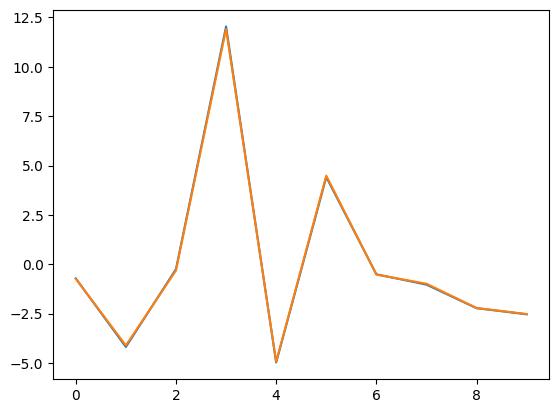

In [14]:
fc_he = np.array([ -0.738, -4.117, -0.319,  11.916, -4.941,  4.486, -0.528, -0.989, -2.219, -2.525 ])
fc = model(img).reshape(-1).detach()

plt.plot(fc)
plt.plot(fc_he)

precision(fc[:4], fc_he[:4])